In [2]:
# library(ggplot2)        # plotting & data
library(dplyr)          # data manipulation
library(tidyr)          # data re-shaping
library(magrittr)       # pipe operator
library(gridExtra)      # provides side-by-side plotting
library(dplyr)          # dplyr for pipe operations
library(moments)        # bonett.test for normality
library(ggQC)           # to create xMR and iMR charts
library(repr)           # change plot size
library(nortest)        # anderson darling test
library(climtrends)     # FindOutliersTietjenMooreTest
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘magrittr’


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [9]:
install.packages("r-pkgs/climtrends_1.0.6.tar.gz",  repos = NULL, type="source")

In [3]:
# Change plot size to 12 x 6
parentdir <- "rscript_data/"
options(repr.plot.width=22, repr.plot.height=12)

### Comparison of 8 old vs 8 new (cell count and MFI)

In [381]:
dfcnt_new8 <- list()
dfcnt_old8 <- list()
rows <- list(c("A", "E"), c("B", "F"), c("C", "G"), c("D", "H"))


cnt <- 1
dfn_ls <- list()
dfo_ls <- list()
dfn_sub_ls <- list()
dfo_sub_ls <- list()

for (i in seq(4)) {
    dir = paste0(parentdir, "8v8_redo_plate", i)
    fi = list.files(dir)
    select_fi = fi[grepl("NEW8_CELLCNT", fi)]
    dfn_ls[[i]] <- read.csv(file.path(dir, select_fi))
    select_fi = fi[grepl("OLD8_CELLCNT", fi)]
    dfo_ls[[i]] <- read.csv(file.path(dir, select_fi))
    for (j in seq(4)) {
          dfn_sub_ls[[cnt]] <- dfn_ls[[i]] %>%
              na.omit() %>% 
              filter(X < 9 & X > 1) %>%
              filter(grepl(paste0("[", rows[[j]][1], "|", rows[[j]][2], "]"), Y)) %>%
              mutate(row.group = paste0(rows[[j]][1], "-", rows[[j]][2]),
                     method = 'NEW',
                     plate = paste('PLATE', i))
          dfo_sub_ls[[cnt]] <- dfo_ls[[i]] %>%
              na.omit() %>% 
              filter(X < 9 & X > 1) %>%
              filter(grepl(paste0("[", rows[[j]][1], "|", rows[[j]][2], "]"), Y)) %>%
              mutate(row.group = paste0(rows[[j]][1], "-", rows[[j]][2]),
                     method = 'OLD',
                     plate = paste('PLATE', i))
    cnt <- cnt + 1
    }
}

In [382]:
dfn_sub_ls

[[1]]
   X Y    Z row.group method   plate
1  2 A 1692       A-E    NEW PLATE 1
2  3 A 1720       A-E    NEW PLATE 1
3  4 A 2017       A-E    NEW PLATE 1
4  5 A 1635       A-E    NEW PLATE 1
5  6 A 1935       A-E    NEW PLATE 1
6  7 A 2039       A-E    NEW PLATE 1
7  8 A 2301       A-E    NEW PLATE 1
8  2 E 1702       A-E    NEW PLATE 1
9  3 E 1478       A-E    NEW PLATE 1
10 4 E 1313       A-E    NEW PLATE 1
11 5 E 1407       A-E    NEW PLATE 1
12 6 E 1447       A-E    NEW PLATE 1
13 7 E 1558       A-E    NEW PLATE 1
14 8 E 1873       A-E    NEW PLATE 1

[[2]]
   X Y    Z row.group method   plate
1  2 B 1734       B-F    NEW PLATE 1
2  3 B 1691       B-F    NEW PLATE 1
3  4 B 1617       B-F    NEW PLATE 1
4  5 B 1448       B-F    NEW PLATE 1
5  6 B 1138       B-F    NEW PLATE 1
6  7 B 1420       B-F    NEW PLATE 1
7  8 B 1694       B-F    NEW PLATE 1
8  2 F 1691       B-F    NEW PLATE 1
9  3 F 1662       B-F    NEW PLATE 1
10 4 F 1406       B-F    NEW PLATE 1
11 5 F 1343       B-F    NEW PLATE 1
12 6 F 1316       B-F    NEW PLATE 1
13 7 F 1327       B-F    NEW PLATE 1
14 8 F 1493       B-F    NEW PLATE 1

[[3]]
   X Y    Z row.group method   plate
1  2 C 2069       C-G    NEW PLATE 1
2  3 C 1842       C-G    NEW PLATE 1
3  4 C 1784       C-G    NEW PLATE 1
4  5 C 1753       C-G    NEW PLATE 1
5  6 C 1868       C-G    NEW PLATE 1
6  7 C 1823       C-G    NEW PLATE 1
7  8 C 2216       C-G    NEW PLATE 1
8  2 G 1868       C-G    NEW PLATE 1
9  3 G 1806       C-G    NEW PLATE 1
10 4 G 1817       C-G    NEW PLATE 1
11 5 G 1845       C-G    NEW PLATE 1
12 6 G 1746       C-G    NEW PLATE 1
13 7 G 1813       C-G    NEW PLATE 1
14 8 G 2049       C-G    NEW PLATE 1

[[4]]
   X Y    Z row.group method   plate
1  2 D 1975       D-H    NEW PLATE 1
2  3 D 1697       D-H    NEW PLATE 1
3  4 D 1832       D-H    NEW PLATE 1
4  5 D 1651       D-H    NEW PLATE 1
5  6 D 1721       D-H    NEW PLATE 1
6  7 D 1658       D-H    NEW PLATE 1
7  8 D 1924       D-H    NEW PLATE 1
8  2 H 1886       D-H    NEW PLATE 1
9  3 H 1930       D-H    NEW PLATE 1
10 4 H 1902       D-H    NEW PLATE 1
11 5 H 1910       D-H    NEW PLATE 1
12 6 H 2069       D-H    NEW PLATE 1
13 7 H 1858       D-H    NEW PLATE 1
14 8 H 1746       D-H    NEW PLATE 1

[[5]]
   X Y    Z row.group method   plate
1  2 A 2391       A-E    NEW PLATE 2
2  3 A 2429       A-E    NEW PLATE 2
3  4 A 2472       A-E    NEW PLATE 2
4  5 A 2438       A-E    NEW PLATE 2
5  6 A 2478       A-E    NEW PLATE 2
6  7 A 2392       A-E    NEW PLATE 2
7  8 A 2629       A-E    NEW PLATE 2
8  2 E 2310       A-E    NEW PLATE 2
9  3 E 2293       A-E    NEW PLATE 2
10 4 E 2218       A-E    NEW PLATE 2
11 5 E 2206       A-E    NEW PLATE 2
12 6 E 2288       A-E    NEW PLATE 2
13 7 E 2408       A-E    NEW PLATE 2
14 8 E 2394       A-E    NEW PLATE 2

[[6]]
   X Y    Z row.group method   plate
1  2 B 2389       B-F    NEW PLATE 2
2  3 B 2407       B-F    NEW PLATE 2
3  4 B 2479       B-F    NEW PLATE 2
4  5 B 2313       B-F    NEW PLATE 2
5  6 B 2082       B-F    NEW PLATE 2
6  7 B 2060       B-F    NEW PLATE 2
7  8 B 2203       B-F    NEW PLATE 2
8  2 F 1936       B-F    NEW PLATE 2
9  3 F 1803       B-F    NEW PLATE 2
10 4 F 1981       B-F    NEW PLATE 2
11 5 F 1995       B-F    NEW PLATE 2
12 6 F 1723       B-F    NEW PLATE 2
13 7 F 1993       B-F    NEW PLATE 2
14 8 F 1688       B-F    NEW PLATE 2

[[7]]
   X Y    Z row.group method   plate
1  2 C 2516       C-G    NEW PLATE 2
2  3 C 2527       C-G    NEW PLATE 2
3  4 C 2517       C-G    NEW PLATE 2
4  5 C 2403       C-G    NEW PLATE 2
5  6 C 2480       C-G    NEW PLATE 2
6  7 C 2292       C-G    NEW PLATE 2
7  8 C 2443       C-G    NEW PLATE 2
8  2 G 2200       C-G    NEW PLATE 2
9  3 G 2370       C-G    NEW PLATE 2
10 4 G 2363       C-G    NEW PLATE 2
11 5 G 2353       C-G    NEW PLATE 2
12 6 G 2263       C-G    NEW PLATE 2
13 7 G 2315       C-G    NEW PLATE 2
14 8 G 2480       C-G    NEW PLATE 2

[[8]]
   X Y    Z row.group method   plate
1  2 D 2631       D-H  

In [383]:
df <- do.call(rbind, dfn_sub_ls) %>% rbind(do.call(rbind,dfo_sub_ls))

In [384]:
head(df)

X Y Z    row.group method plate  
1 2 A 1692 A-E       NEW    PLATE 1
2 3 A 1720 A-E       NEW    PLATE 1
3 4 A 2017 A-E       NEW    PLATE 1
4 5 A 1635 A-E       NEW    PLATE 1
5 6 A 1935 A-E       NEW    PLATE 1
6 7 A 2039 A-E       NEW    PLATE 1

#### compare two groups at a time for the variance using F test
- The p values are higher than 0.05, meaning the variances do not change from plate 1 to 3
- Run F-test when you want to perform a two samples t-test to check the equality of the variances of the two samples

#### Shapiro test
- the shapiro.test, the null hypothesis assumes that the data is drawn from a normal distribution. Since the p-value > 0.05, we fail to reject the null hypothesis, meaning that it is likely that the data is drawn from a normal distribution

#### Anderson-Darling test for normality
- a given sample of data is drawn from a given probability distribution
- has to be greater than 7 points so cannot run this test

In [473]:
# 8 chl New vs Old

df_stats <- data.frame()
row_idx = 1

for (r in rows) {
    for (i in seq(2,8)) {
        row_group = paste0(r[1], i," - ", r[2], i )
        print(row_group)
        
        df.tmp <- df %>% filter(row.group == paste0(r[1], "-", r[2]),
                                X == i)

        stat <- var.test(Z ~ method, df.tmp)
        print(stat)
        df_stats[row_idx, "ROW_GROUP"] = row_group
        df_stats[row_idx, "F_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
        df_stats[row_idx, "GT_A_FT"] = stat$p.value > 0.05
        stat <- wilcox.test(Z~method, 
                            df.tmp,
                            alternative= "two.sided",
                            paired=FALSE, 
                            var.equal=TRUE, 
                            conf.level=0.95)
        print(stat)
        df_stats[row_idx, "WILCOXON_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
        df_stats[row_idx, "GT_A_WX"] = stat$p.value > 0.05
        stat <- t.test(Z~method, 
                            df.tmp,
                            alternative= "two.sided",
                            paired=FALSE, 
                            var.equal=TRUE, 
                            conf.level=0.95)
        print(stat)
        df_stats[row_idx, "T_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
        df_stats[row_idx, "GT_A_TT"] = stat$p.value > 0.05
        
        row_idx = row_idx + 1
    }
}
write.csv(df_stats, paste0("8v8_pairtest_stats_cmbplts_count.csv"), row.names = FALSE)

[1] "A2 - E2"

	F test to compare two variances

data:  Z by method
F = 0.65585, num df = 7, denom df = 7, p-value = 0.5915
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1313029 3.2758907
sample estimates:
ratio of variances 
         0.6558459 


	Wilcoxon rank sum exact test

data:  Z by method
W = 47, p-value = 0.1304
alternative hypothesis: true location shift is not equal to 0


	Two Sample t-test

data:  Z by method
t = 1.7194, df = 14, p-value = 0.1076
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -79.9439 726.1939
sample estimates:
mean in group NEW mean in group OLD 
         2183.500          1860.375 

[1] "A3 - E3"

	F test to compare two variances

data:  Z by method
F = 0.60409, num df = 7, denom df = 7, p-value = 0.522
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1209419 3.0173936
sample estimates:
ratio of v

Warning message in wilcox.test.default(x = c(1842L, 1806L, 2527L, 2370L, 2286L, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  Z by method
W = 50.5, p-value = 0.05852
alternative hypothesis: true location shift is not equal to 0


	Two Sample t-test

data:  Z by method
t = 2.2764, df = 14, p-value = 0.03906
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  26.03957 874.96043
sample estimates:
mean in group NEW mean in group OLD 
         2290.375          1839.875 

[1] "C4 - G4"

	F test to compare two variances

data:  Z by method
F = 1.1615, num df = 7, denom df = 7, p-value = 0.8485
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.2325454 5.8018030
sample estimates:
ratio of variances 
          1.161543 


	Wilcoxon rank sum exact test

data:  Z by method
W = 48, p-value = 0.1049
alternative hypothesis: true location shift is not equal to 0


	Two Sample t-test

data:  Z by method
t = 1.9755, df = 14, p-value = 0.06827
alternative hypothesis: tr

Warning message in wilcox.test.default(x = c(1868L, 1746L, 2480L, 2263L, 2217L, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  Z by method
W = 45.5, p-value = 0.1719
alternative hypothesis: true location shift is not equal to 0


	Two Sample t-test

data:  Z by method
t = 1.5654, df = 14, p-value = 0.1398
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -120.4394  771.1894
sample estimates:
mean in group NEW mean in group OLD 
         2199.875          1874.500 

[1] "C7 - G7"

	F test to compare two variances

data:  Z by method
F = 0.96489, num df = 7, denom df = 7, p-value = 0.9636
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1931757 4.8195622
sample estimates:
ratio of variances 
         0.9648949 


	Wilcoxon rank sum exact test

data:  Z by method
W = 50, p-value = 0.06496
alternative hypothesis: true location shift is not equal to 0


	Two Sample t-test

data:  Z by method
t = 1.9593, df = 14, p-value = 0.0703
alternative hypothesis: tru

Warning message in wilcox.test.default(x = c(1658L, 1858L, 2523L, 1907L, 2075L, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  Z by method
W = 52.5, p-value = 0.03556
alternative hypothesis: true location shift is not equal to 0


	Two Sample t-test

data:  Z by method
t = 2.2673, df = 14, p-value = 0.03974
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  24.95584 898.79416
sample estimates:
mean in group NEW mean in group OLD 
         2170.750          1708.875 

[1] "D8 - H8"

	F test to compare two variances

data:  Z by method
F = 0.86845, num df = 7, denom df = 7, p-value = 0.8572
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1738663 4.3378119
sample estimates:
ratio of variances 
         0.8684466 


	Wilcoxon rank sum exact test

data:  Z by method
W = 48, p-value = 0.1049
alternative hypothesis: true location shift is not equal to 0


	Two Sample t-test

data:  Z by method
t = 1.9843, df = 14, p-value = 0.06718
alternative hypothesis: t

In [389]:
df_stats

ROW_GROUP F_TEST   GT_A_FT WILCOXON_TEST GT_A_WX T_TEST   GT_A_TT
1  A2 - E2   5.92e-01 TRUE    1.30e-01       TRUE   1.08e-01  TRUE  
2  A3 - E3   5.22e-01 TRUE    1.61e-01       TRUE   1.73e-01  TRUE  
3  A4 - E4   6.62e-01 TRUE    4.99e-02      FALSE   4.92e-02 FALSE  
4  A5 - E5   8.89e-01 TRUE    2.79e-01       TRUE   1.99e-01  TRUE  
5  A6 - E6   8.70e-01 TRUE    8.30e-02       TRUE   9.94e-02  TRUE  
6  A7 - E7   8.43e-01 TRUE    1.30e-01       TRUE   1.27e-01  TRUE  
7  A8 - E8   8.70e-01 TRUE    2.81e-02      FALSE   5.19e-02  TRUE  
8  B2 - F2   5.85e-01 TRUE    3.28e-01       TRUE   3.21e-01  TRUE  
9  B3 - F3   6.82e-01 TRUE    3.82e-01       TRUE   1.32e-01  TRUE  
10 B4 - F4   4.71e-01 TRUE    2.79e-01       TRUE   1.25e-01  TRUE  
11 B5 - F5   4.25e-01 TRUE    2.34e-01       TRUE   1.15e-01  TRUE  
12 B6 - F6   1.30e-01 TRUE    1.30e-01       TRUE   1.49e-01  TRUE  
13 B7 - F7   1.84e-01 TRUE    1.30e-01       TRUE   6.64e-02  TRUE  
14 B8 - F8   3.85e-01 TRUE    1.30e-01       TRUE   9.56e-02  TRUE  
15 C2 - G2   8.99e-01 TRUE    2.81e-02      FALSE   2.80e-02 FALSE  
16 C3 - G3   9.36e-01 TRUE    5.85e-02       TRUE   3.91e-02 FALSE  
17 C4 - G4   8.48e-01 TRUE    1.05e-01       TRUE   6.83e-02  TRUE  
18 C5 - G5   7.94e-01 TRUE    6.50e-02       TRUE   5.89e-02  TRUE  
19 C6 - G6   7.74e-01 TRUE    1.72e-01       TRUE   1.40e-01  TRUE  
20 C7 - G7   9.64e-01 TRUE    6.50e-02       TRUE   7.03e-02  TRUE  
21 C8 - G8   6.60e-01 TRUE    8.30e-02       TRUE   5.63e-02  TRUE  
22 D2 - H2   5.91e-01 TRUE    4.99e-02      FALSE   2.44e-02 FALSE  
23 D3 - H3   8.42e-01 TRUE    8.30e-02       TRUE   5.74e-02  TRUE  
24 D4 - H4   7.44e-01 TRUE    3.79e-02      FALSE   2.34e-02 FALSE  
25 D5 - H5   3.59e-01 TRUE    4.99e-02      FALSE   5.81e-02  TRUE  
26 D6 - H6   9.52e-01 TRUE    4.99e-02      FALSE   2.74e-02 FALSE  
27 D7 - H7   7.39e-01 TRUE    3.56e-02      FALSE   3.97e-02 FALSE  
28 D8 - H8   8.57e-01 TRUE    1.05e-01       TRUE   6.72e-02  TRUE

In [484]:
# generate stats table 
df_stats <- data.frame()
row_idx = 1

for (r in rows) {
    for (i in seq(2,8)) {
        row_group = paste0(r[1], i," - ", r[2], i )
        print(row_group)
        
        #NEW

        df_stats[row_idx, "ROW_GROUP"] = row_group
        df.tmp <- df %>% filter(method == "OLD",
                                row.group == paste0(r[1], "-", r[2]),
                                X == i)
        stat <- ad.test(df.tmp$Z)
        df_stats[row_idx, "AD_TEST_OLD"] = formatC(stat$p.value, format = "e", digits = 2)
        df_stats[row_idx, "GT_A_AD_OLD"] = stat$p.value > 0.05
        stat <- shapiro.test(df.tmp$Z)
        df_stats[row_idx, "SHAPIRO_TEST_OLD"] = formatC(stat$p.value, format = "e", digits = 2)
        df_stats[row_idx, "GT_A_SHAP_OLD"] = stat$p.value > 0.05
        print(stat)
        stat <- bonett.test(df.tmp$Z)
        df_stats[row_idx, "BONETT_TEST_OLD"] = formatC(stat$p.value, format = "e", digits = 2)
        df_stats[row_idx, "GT_A_BONN_OLD"] = stat$p.value > 0.05
        print(stat)
        stat <- geary(df.tmp$Z)
        df_stats[row_idx, "GEARY_OLD"] = formatC(stat, format = "e", digits = 2)
        df_stats[row_idx, "GT_A_GEAR_OLD"] = stat > 0.05
        print(stat)
        df.tmp <- df %>% filter(method == "NEW",
                                row.group == paste0(r[1], "-", r[2]),
                                X == i)
        stat <- ad.test(df.tmp$Z)
        df_stats[row_idx, "AD_TEST_NEW"] = formatC(stat$p.value, format = "e", digits = 2)
        df_stats[row_idx, "GT_A_AD_NEW"] = stat$p.value > 0.05
        stat <- shapiro.test(df.tmp$Z)
        df_stats[row_idx, "SHAPIRO_TEST_NEW"] = formatC(stat$p.value, format = "e", digits = 2)
        df_stats[row_idx, "GT_A_SHAP_NEW"] = stat$p.value > 0.05
        print(stat)
        stat <- bonett.test(df.tmp$Z)
        df_stats[row_idx, "BONETT_TEST_NEW"] = formatC(stat$p.value, format = "e", digits = 2)
        df_stats[row_idx, "GT_A_BONN_NEW"] = stat$p.value > 0.05
        print(stat)
        stat <- geary(df.tmp$Z)
        df_stats[row_idx, "GEARY_NEW"] = formatC(stat, format = "e", digits = 2)
        df_stats[row_idx, "GT_A_GEAR_NEW"] = stat > 0.05
        print(stat)
        row_idx = row_idx + 1
        print(paste0(rep("-", 25),collapse=""))
    }
}
write.csv(df_stats, paste0("8v8_stats_param_cmbplts_count.csv"), row.names = FALSE)

[1] "A2 - E2"

	Shapiro-Wilk normality test

data:  df.tmp$Z
W = 0.87507, p-value = 0.1689


	Bonett-Seier test for Geary kurtosis

data:  df.tmp$Z
tau = 304.06250, z = 0.16501, p-value = 0.8689
alternative hypothesis: kurtosis is not equal to sqrt(2/pi)

[1] 0.7869164

	Shapiro-Wilk normality test

data:  df.tmp$Z
W = 0.82806, p-value = 0.05668


	Bonett-Seier test for Geary kurtosis

data:  df.tmp$Z
tau = 284.3750, z = -1.5443, p-value = 0.1225
alternative hypothesis: kurtosis is not equal to sqrt(2/pi)

[1] 0.9087748
[1] "-------------------------"
[1] "A3 - E3"

	Shapiro-Wilk normality test

data:  df.tmp$Z
W = 0.92227, p-value = 0.4485


	Bonett-Seier test for Geary kurtosis

data:  df.tmp$Z
tau = 333.7500, z = 1.5871, p-value = 0.1125
alternative hypothesis: kurtosis is not equal to sqrt(2/pi)

[1] 0.6980821

	Shapiro-Wilk normality test

data:  df.tmp$Z
W = 0.9455, p-value = 0.6659


	Bonett-Seier test for Geary kurtosis

data:  df.tmp$Z
tau = 306.5000, z = -0.3936, p-value = 0.

### qq-plot
- Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that's roughly straight

### Histogram with density line plot
- We also see similar skewness within the sample distributions.

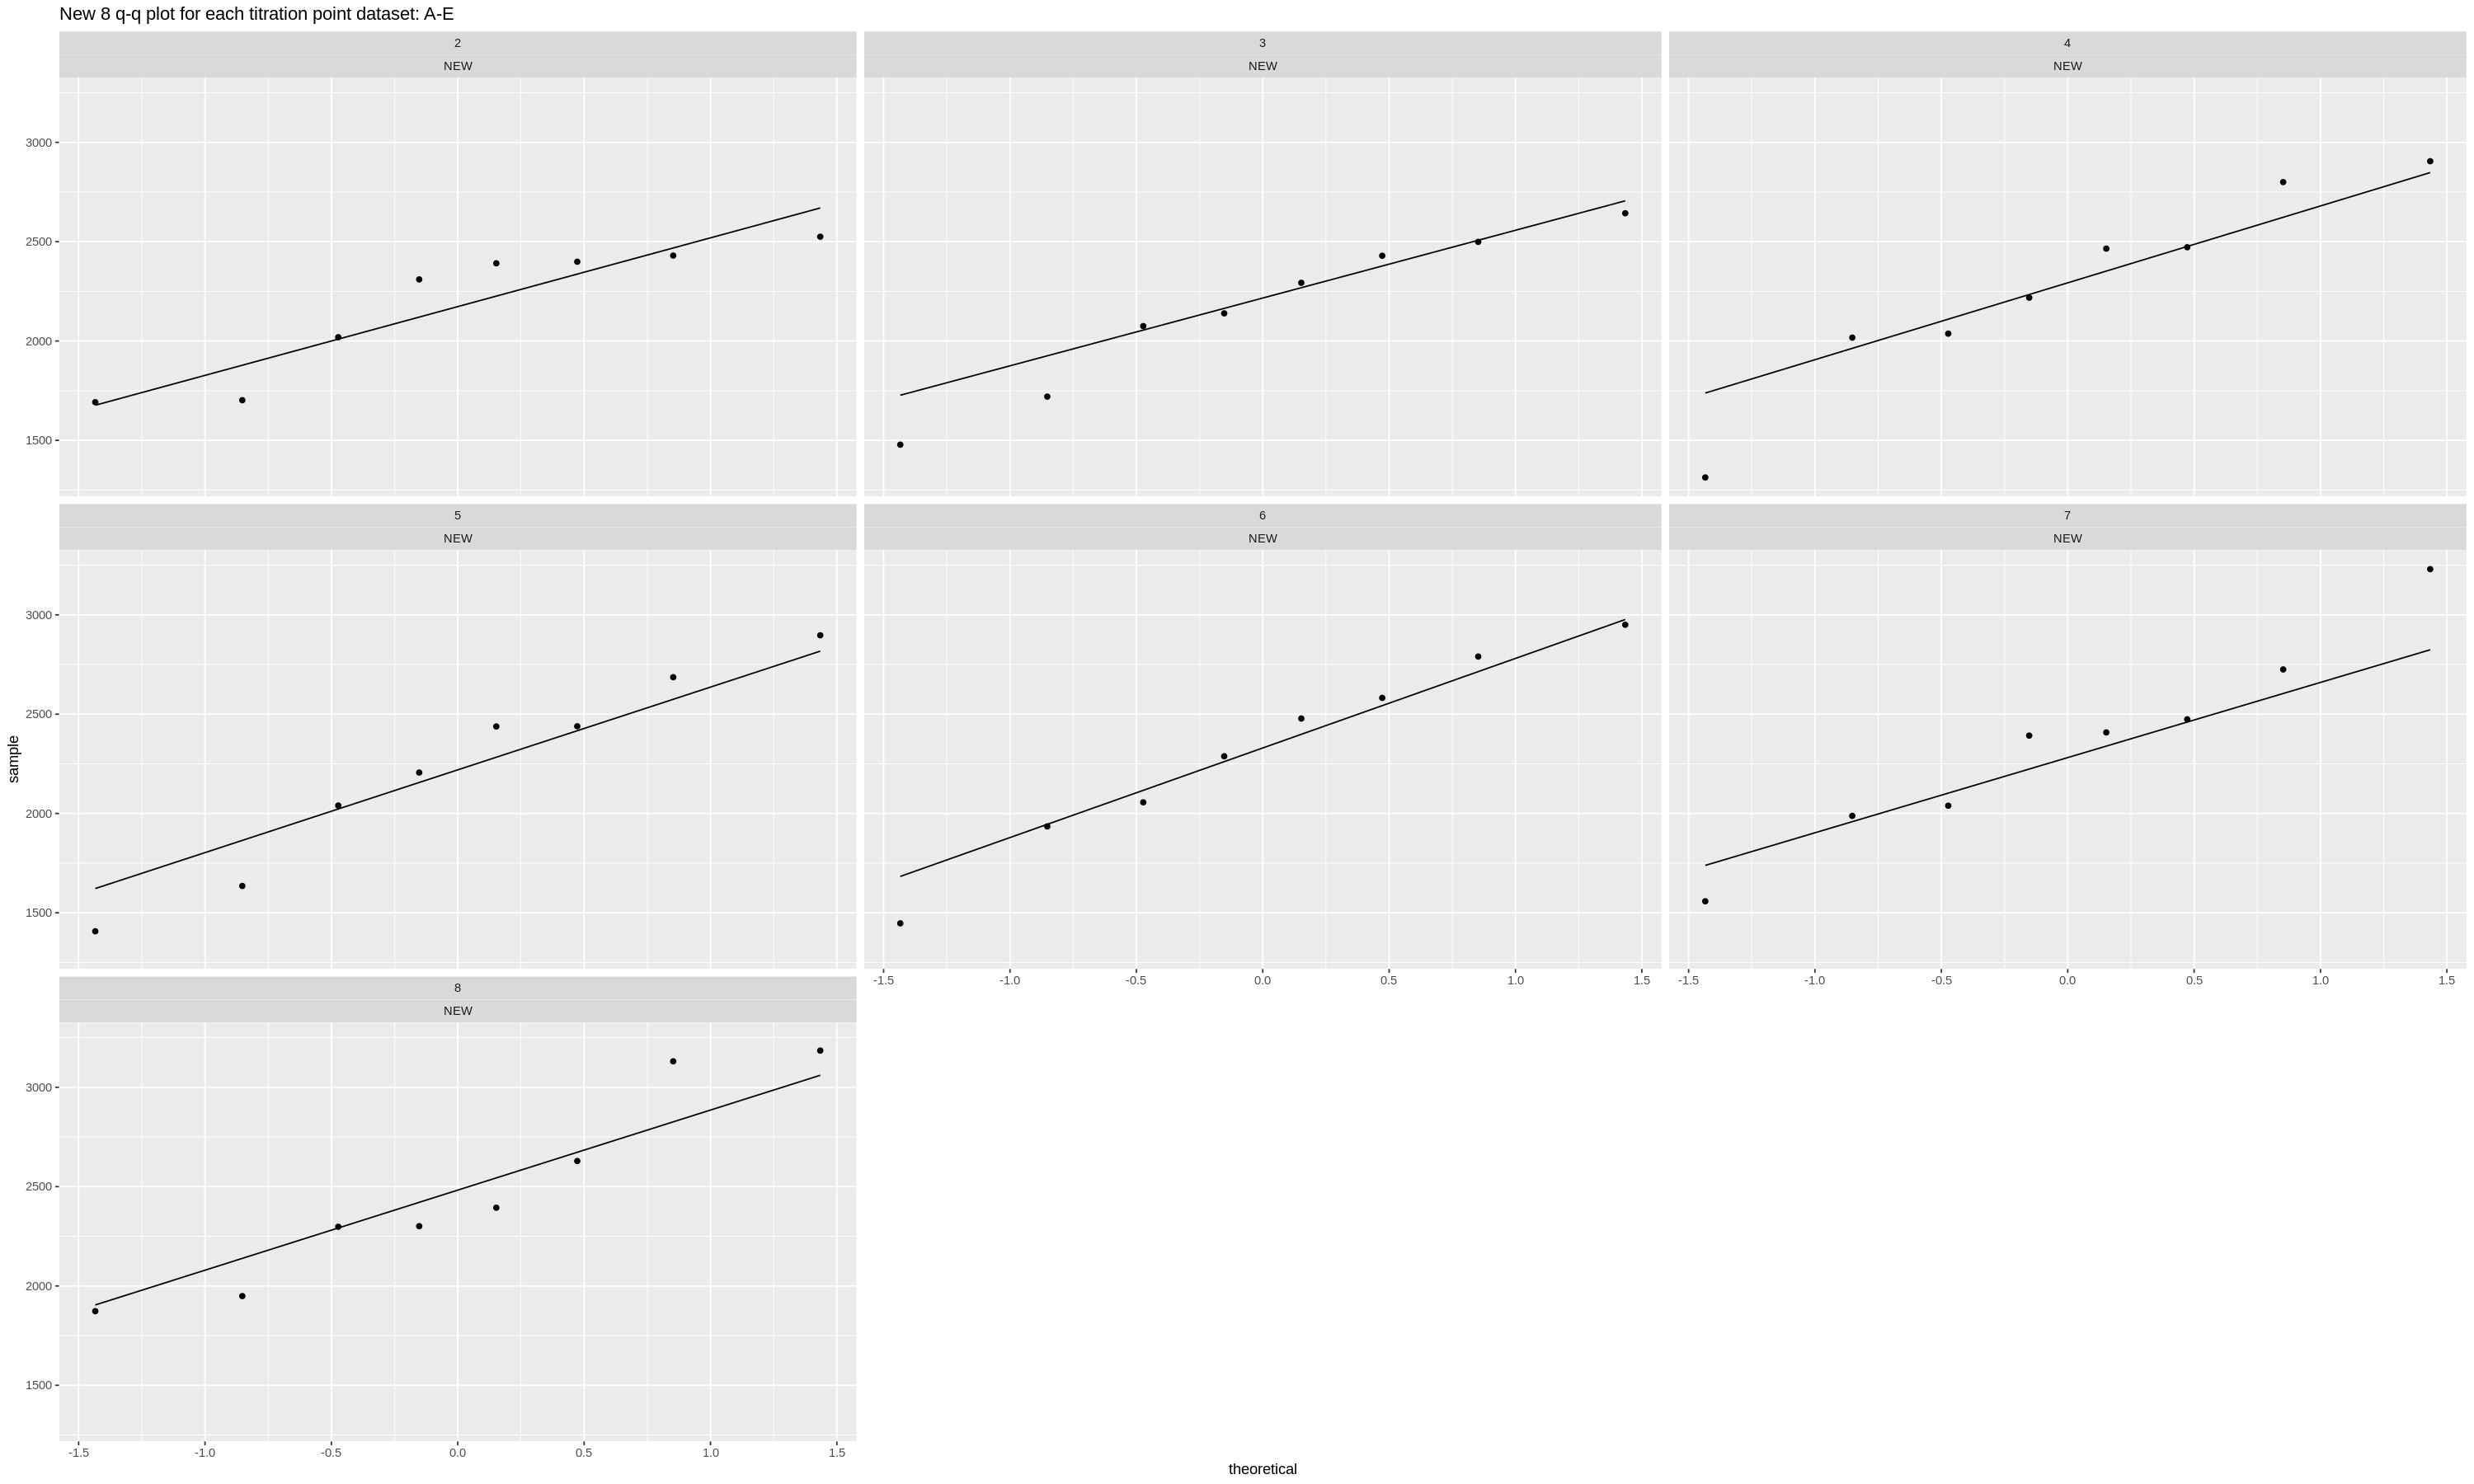

In [399]:
j = 1
mtd = "NEW"
row_group = paste0(rows[[j]][1], "-", rows[[j]][2])
df.tmp <- df %>% filter(row.group == row_group, 
                            method == mtd)
ggplot(df.tmp, aes(sample = Z)) + 
            stat_qq() + 
            stat_qq_line() + 
            facet_wrap(X~ method) +
            ggtitle(paste("New 8 q-q plot for each titration point dataset:", row_group))

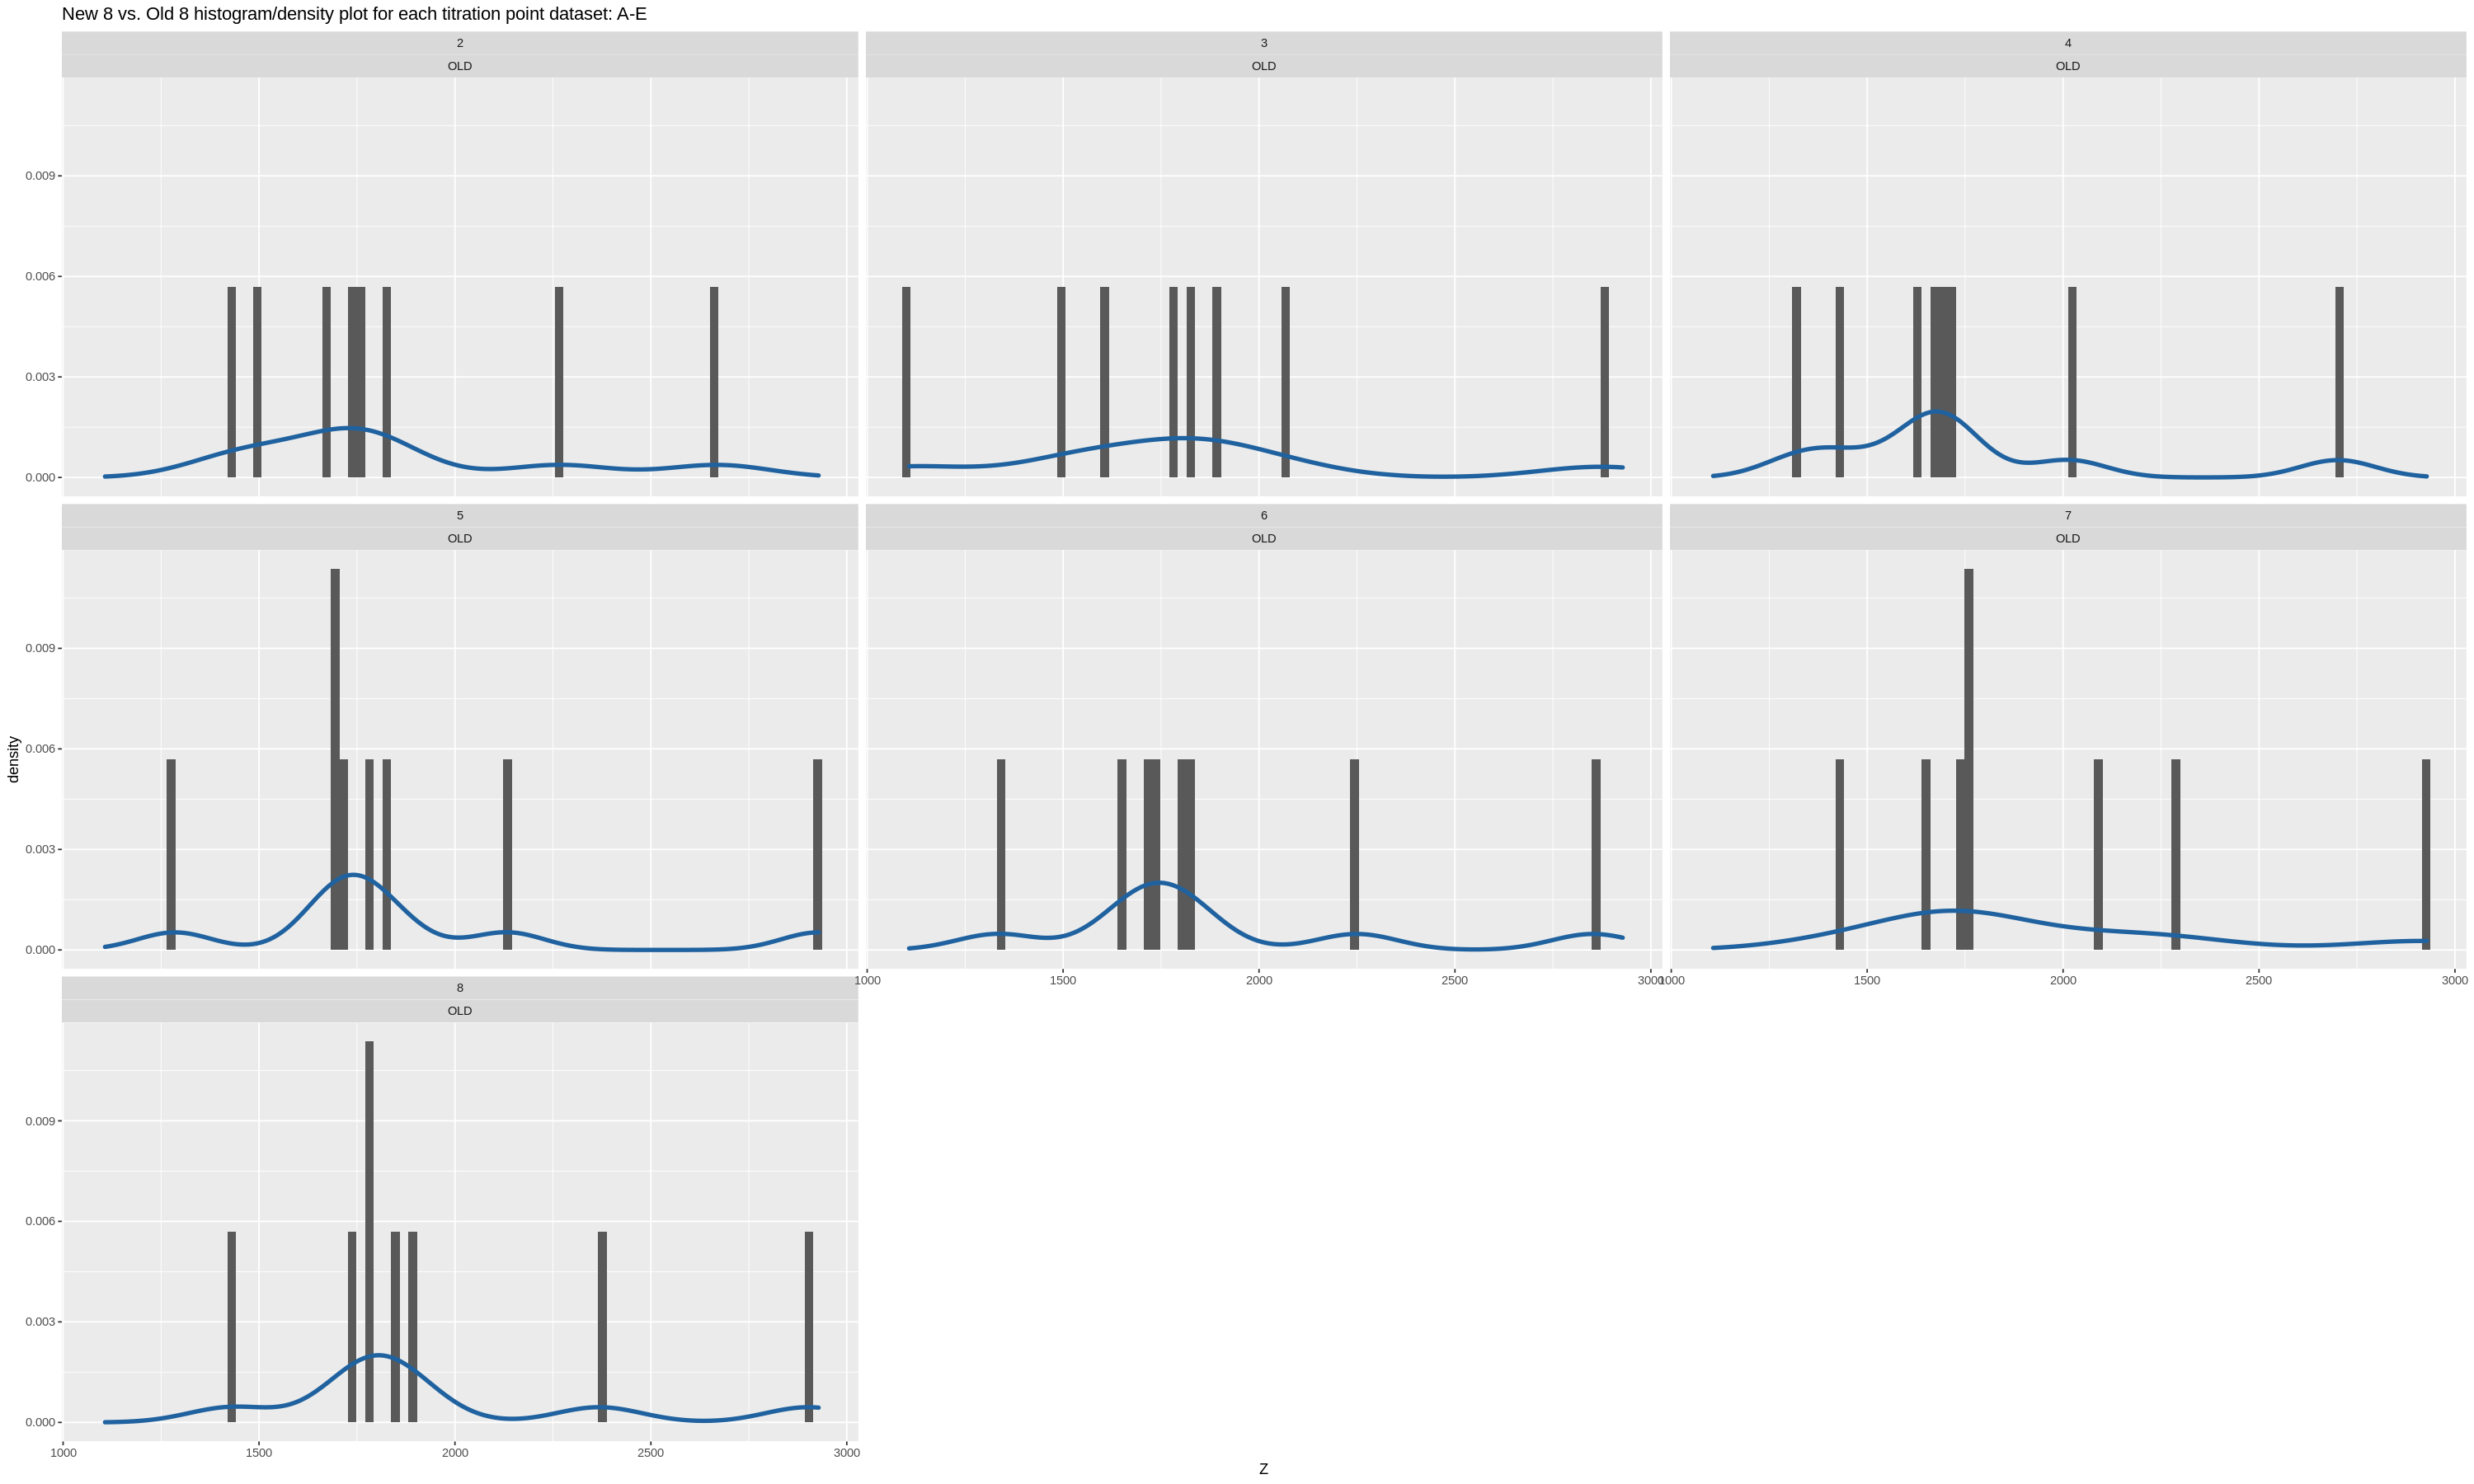

In [398]:
j = 1
mtd = "OLD"
row_group = paste0(rows[[j]][1], "-", rows[[j]][2])
df.tmp <- df %>% filter(row.group == row_group, 
                            method == mtd)

ggplot(data = df.tmp, aes(x = Z)) +
    geom_histogram(aes(y = ..density..), binwidth = 22, position = "identity") + 
    geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) +
    facet_wrap(X~ method) +
    ggtitle(paste("Old 8 histogram/density plot for each titration point dataset:",row_group))

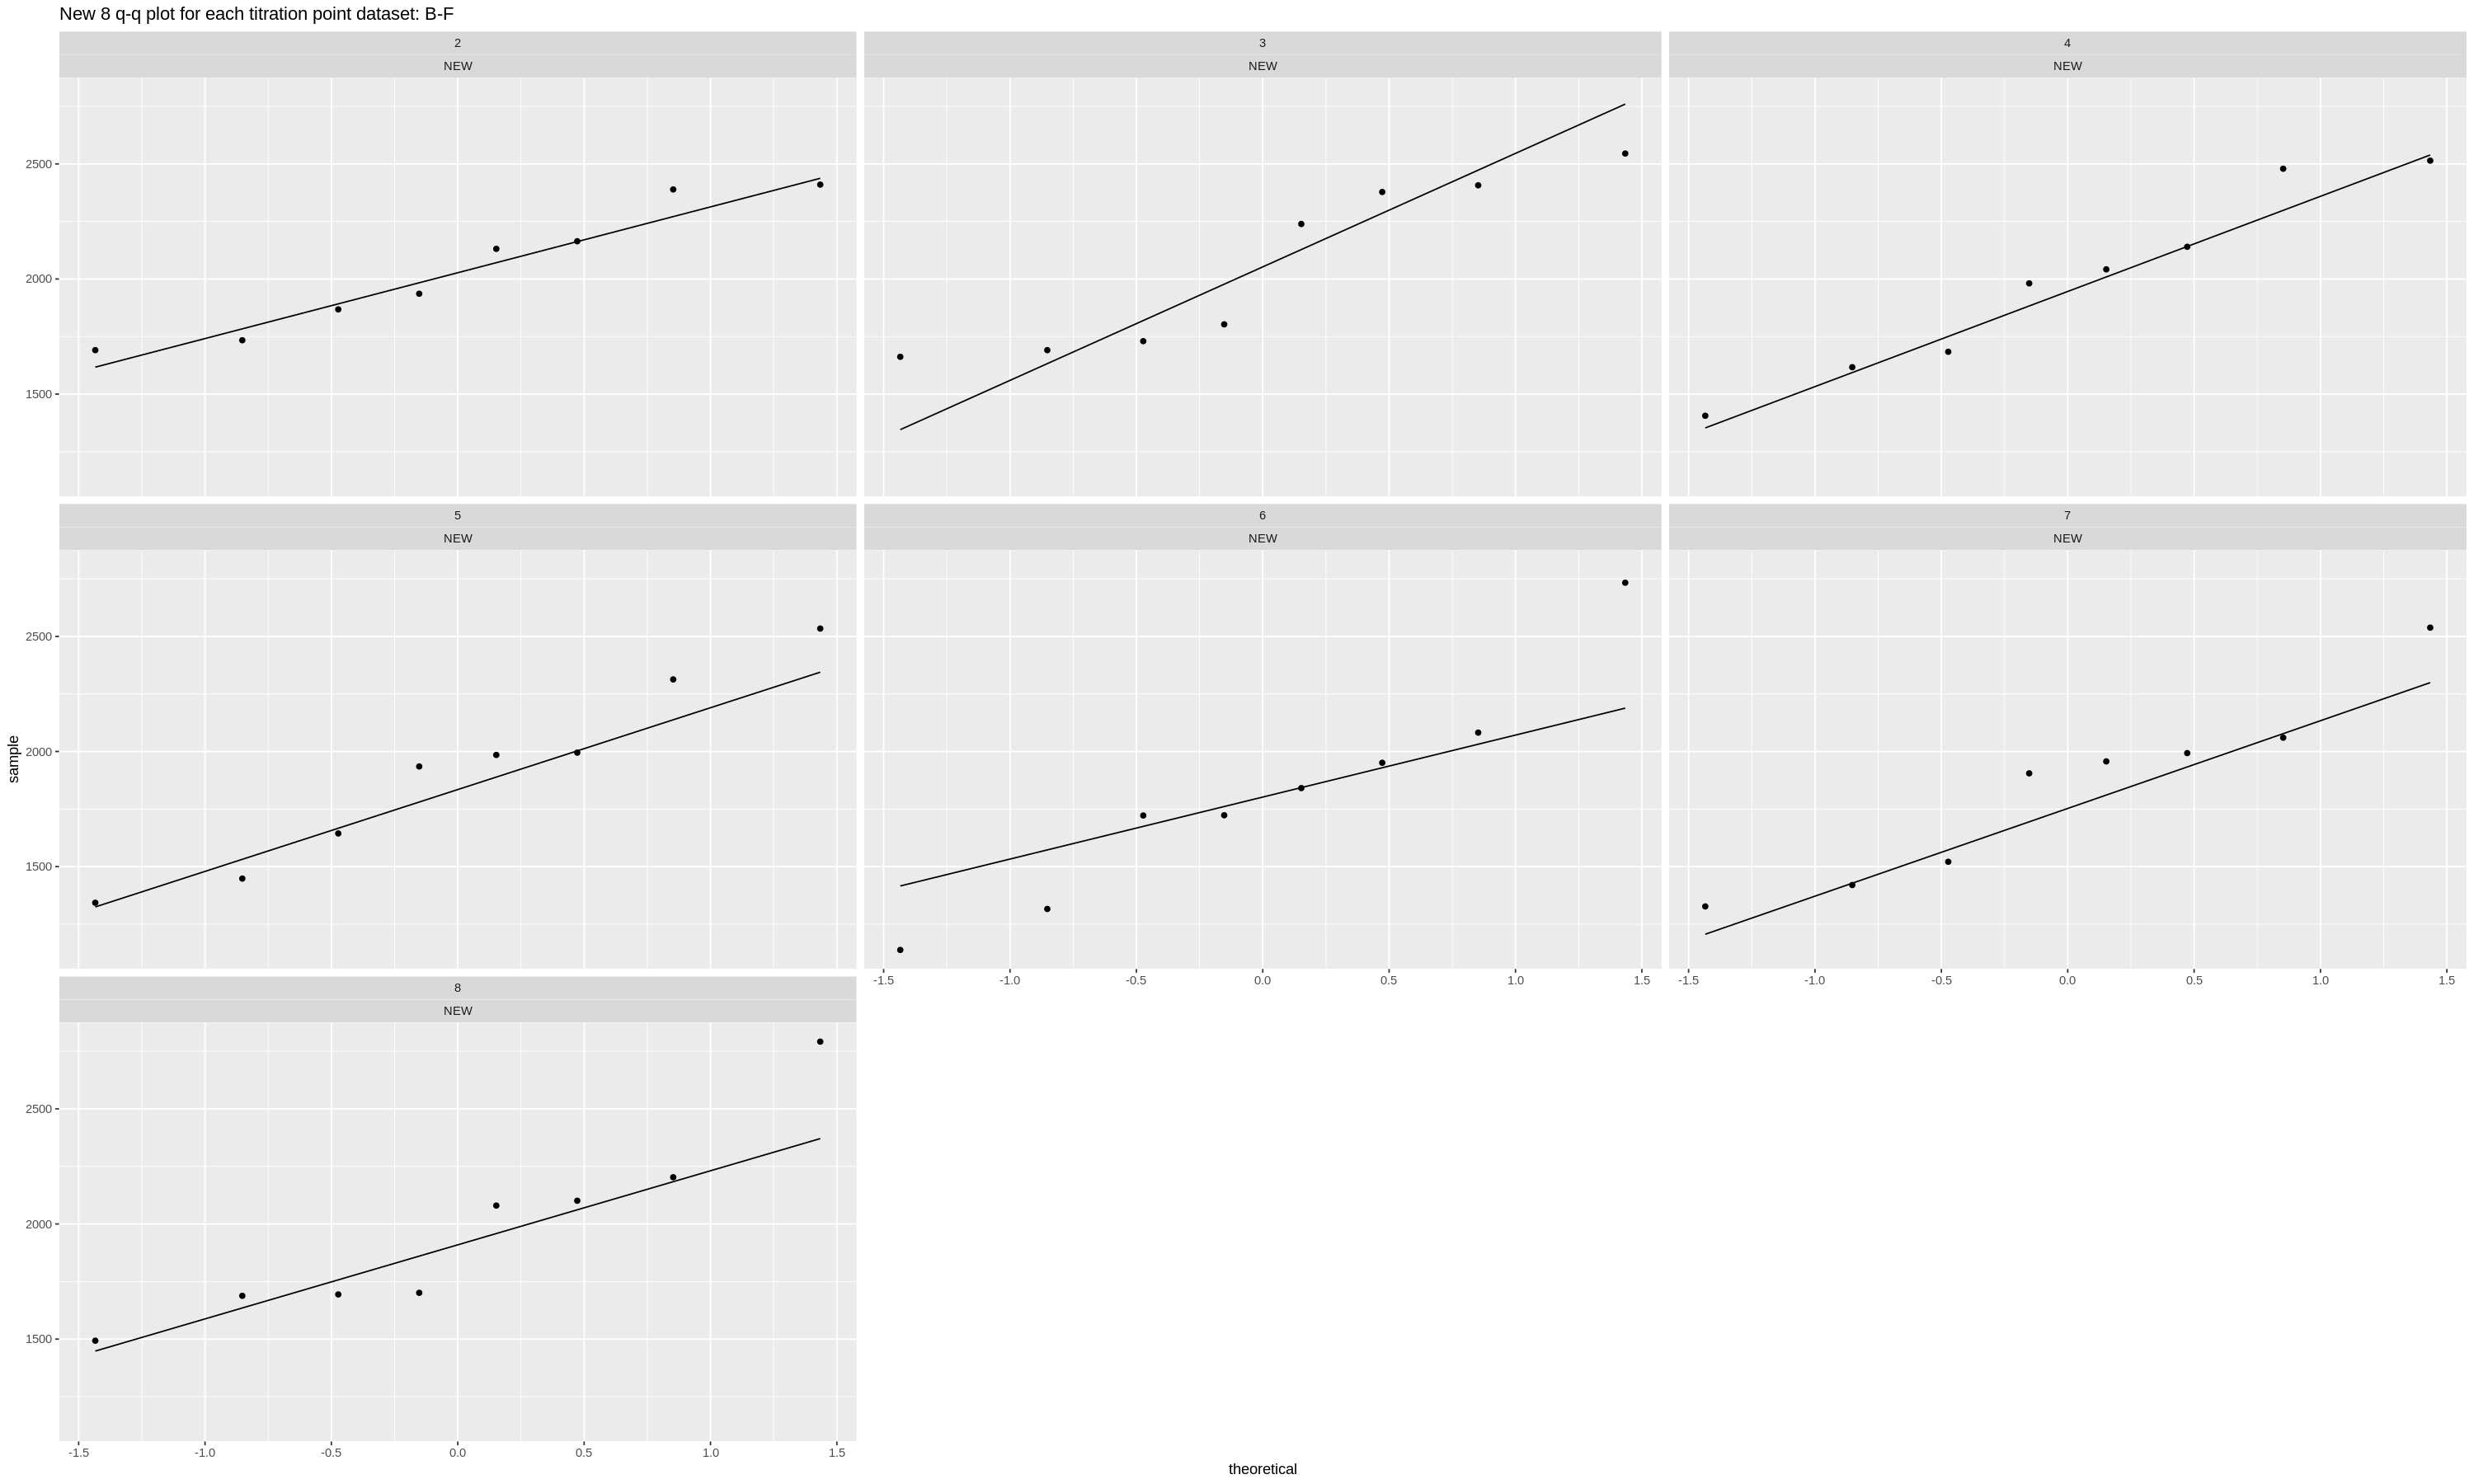

In [400]:
j = 2
mtd = "NEW"
row_group = paste0(rows[[j]][1], "-", rows[[j]][2])
df.tmp <- df %>% filter(row.group == row_group, 
                            method == mtd)
ggplot(df.tmp, aes(sample = Z)) + 
            stat_qq() + 
            stat_qq_line() + 
            facet_wrap(X~ method) +
            ggtitle(paste("New 8 q-q plot for each titration point dataset:", row_group))

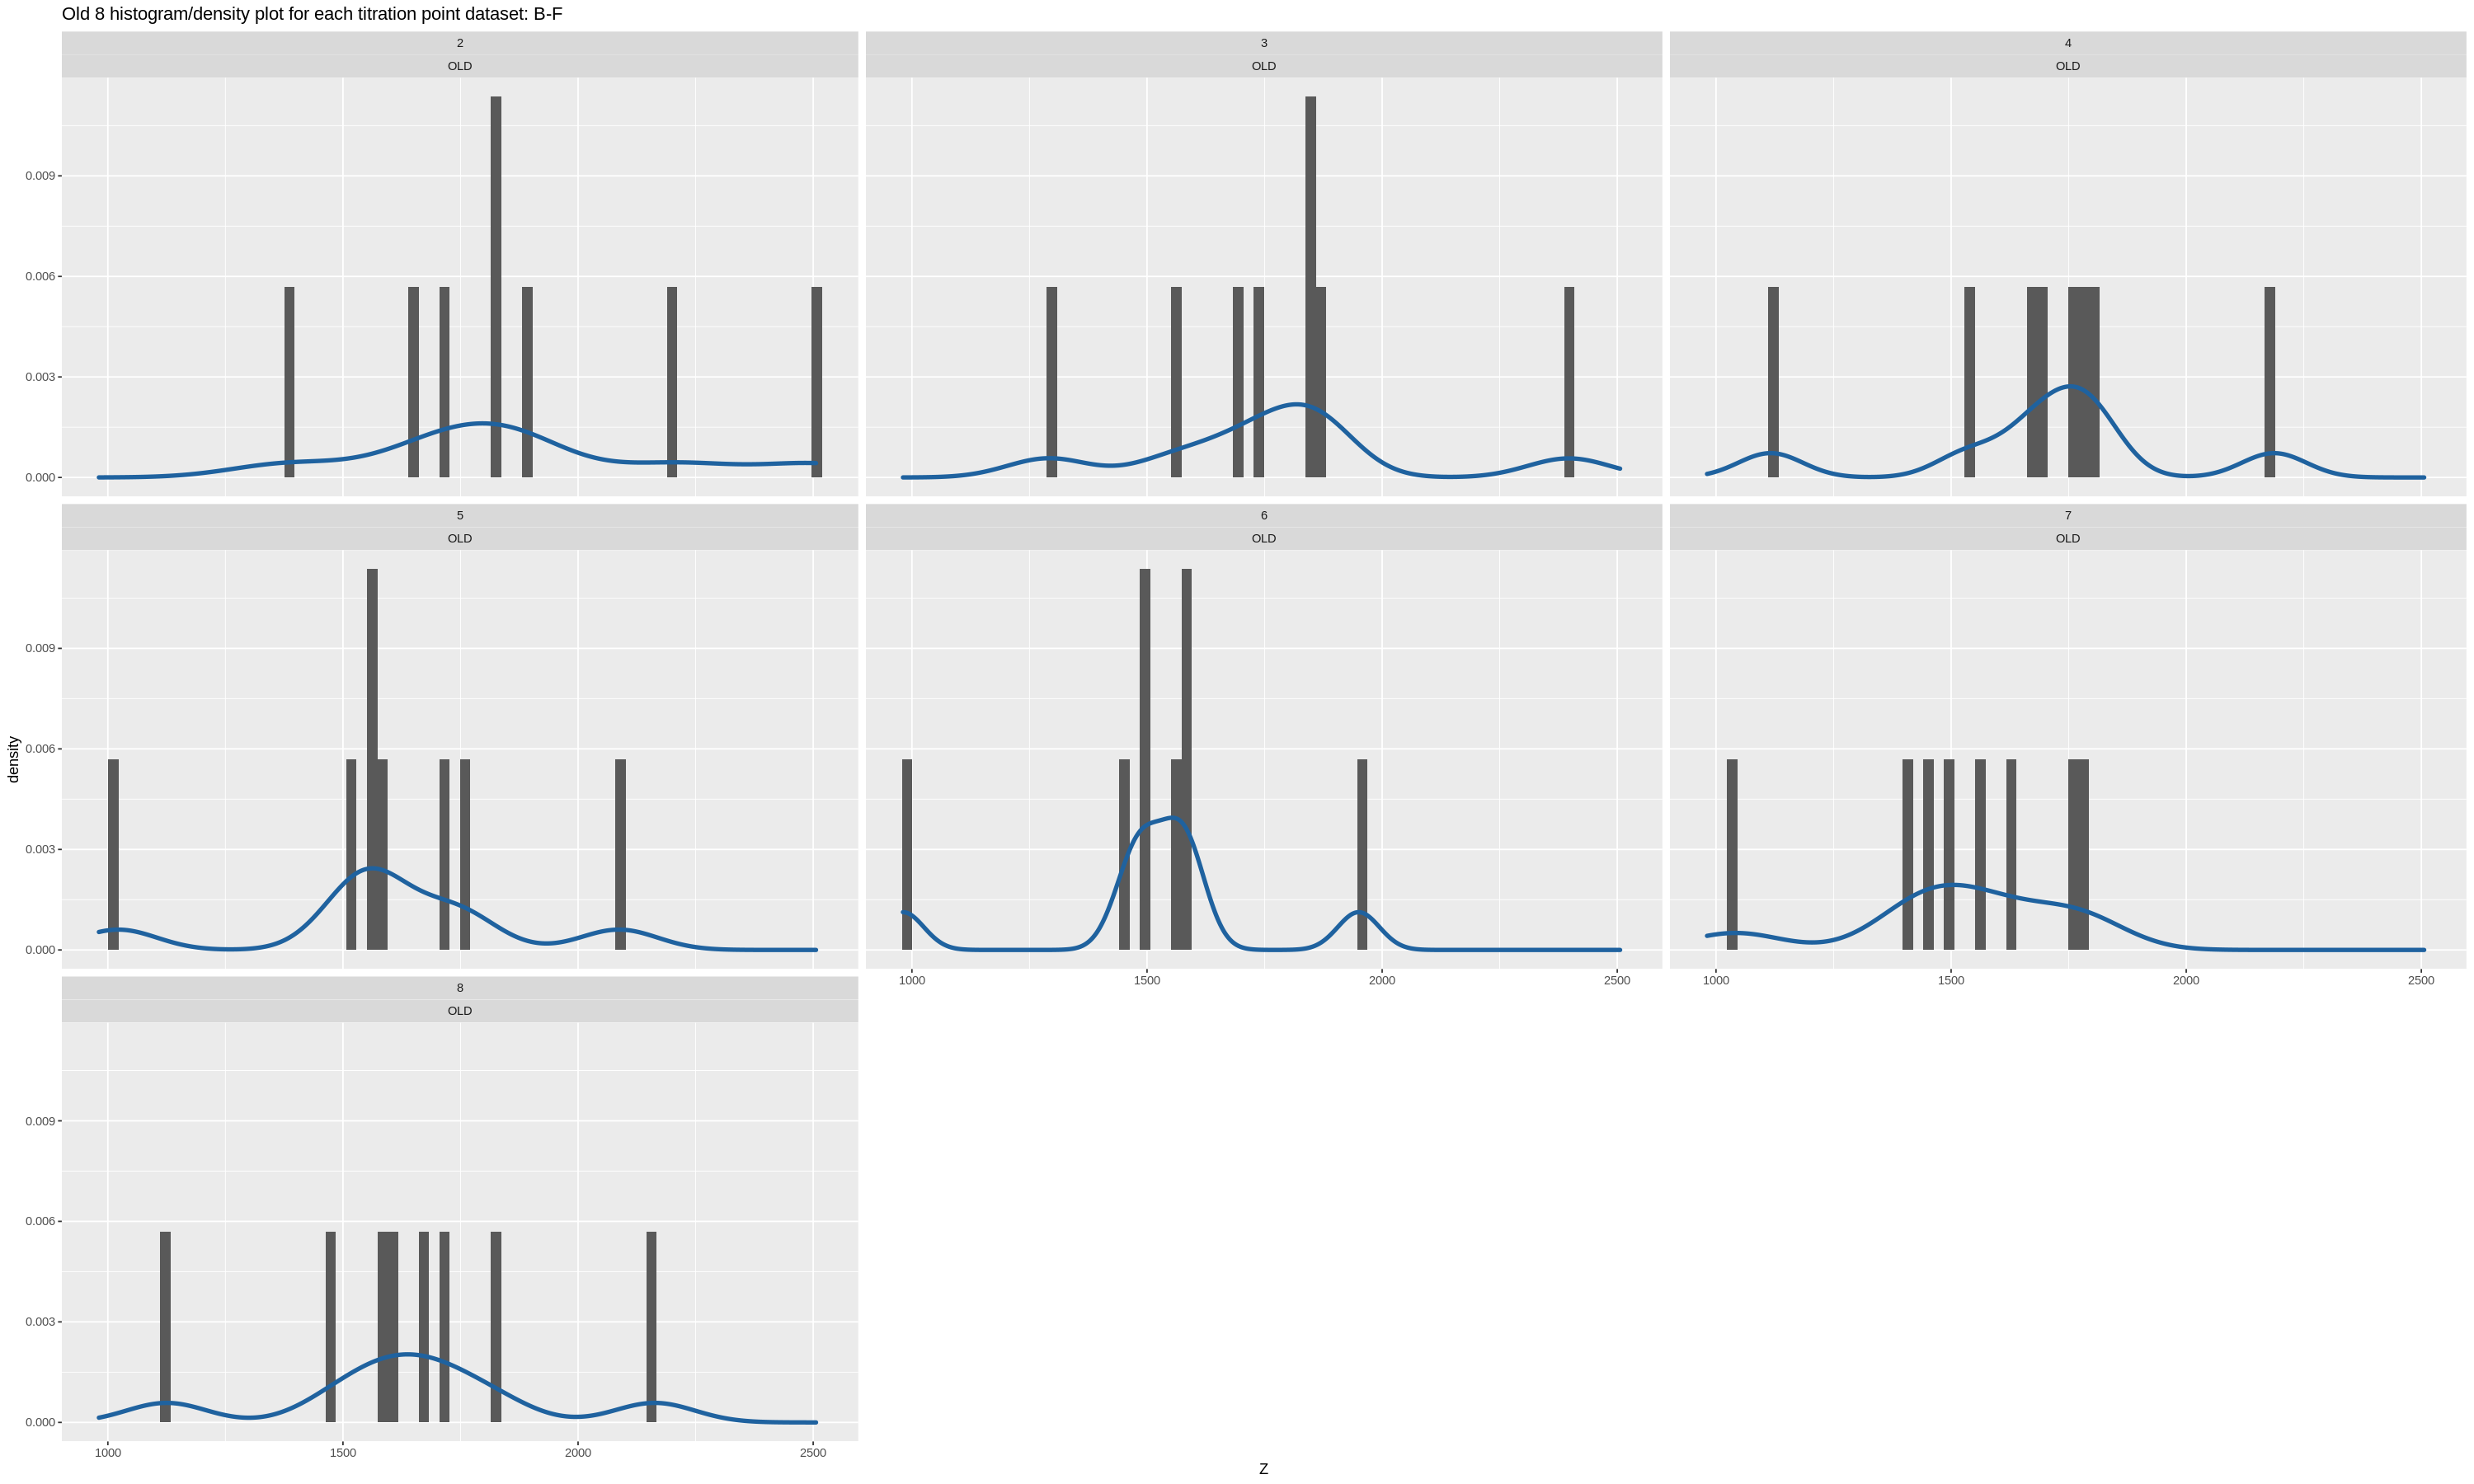

In [401]:
j = 2
mtd = "OLD"
row_group = paste0(rows[[j]][1], "-", rows[[j]][2])
df.tmp <- df %>% filter(row.group == row_group, 
                            method == mtd)

ggplot(data = df.tmp, aes(x = Z)) +
    geom_histogram(aes(y = ..density..), binwidth = 22, position = "identity") + 
    geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) +
    facet_wrap(X~ method) +
    ggtitle(paste("Old 8 histogram/density plot for each titration point dataset:",row_group))

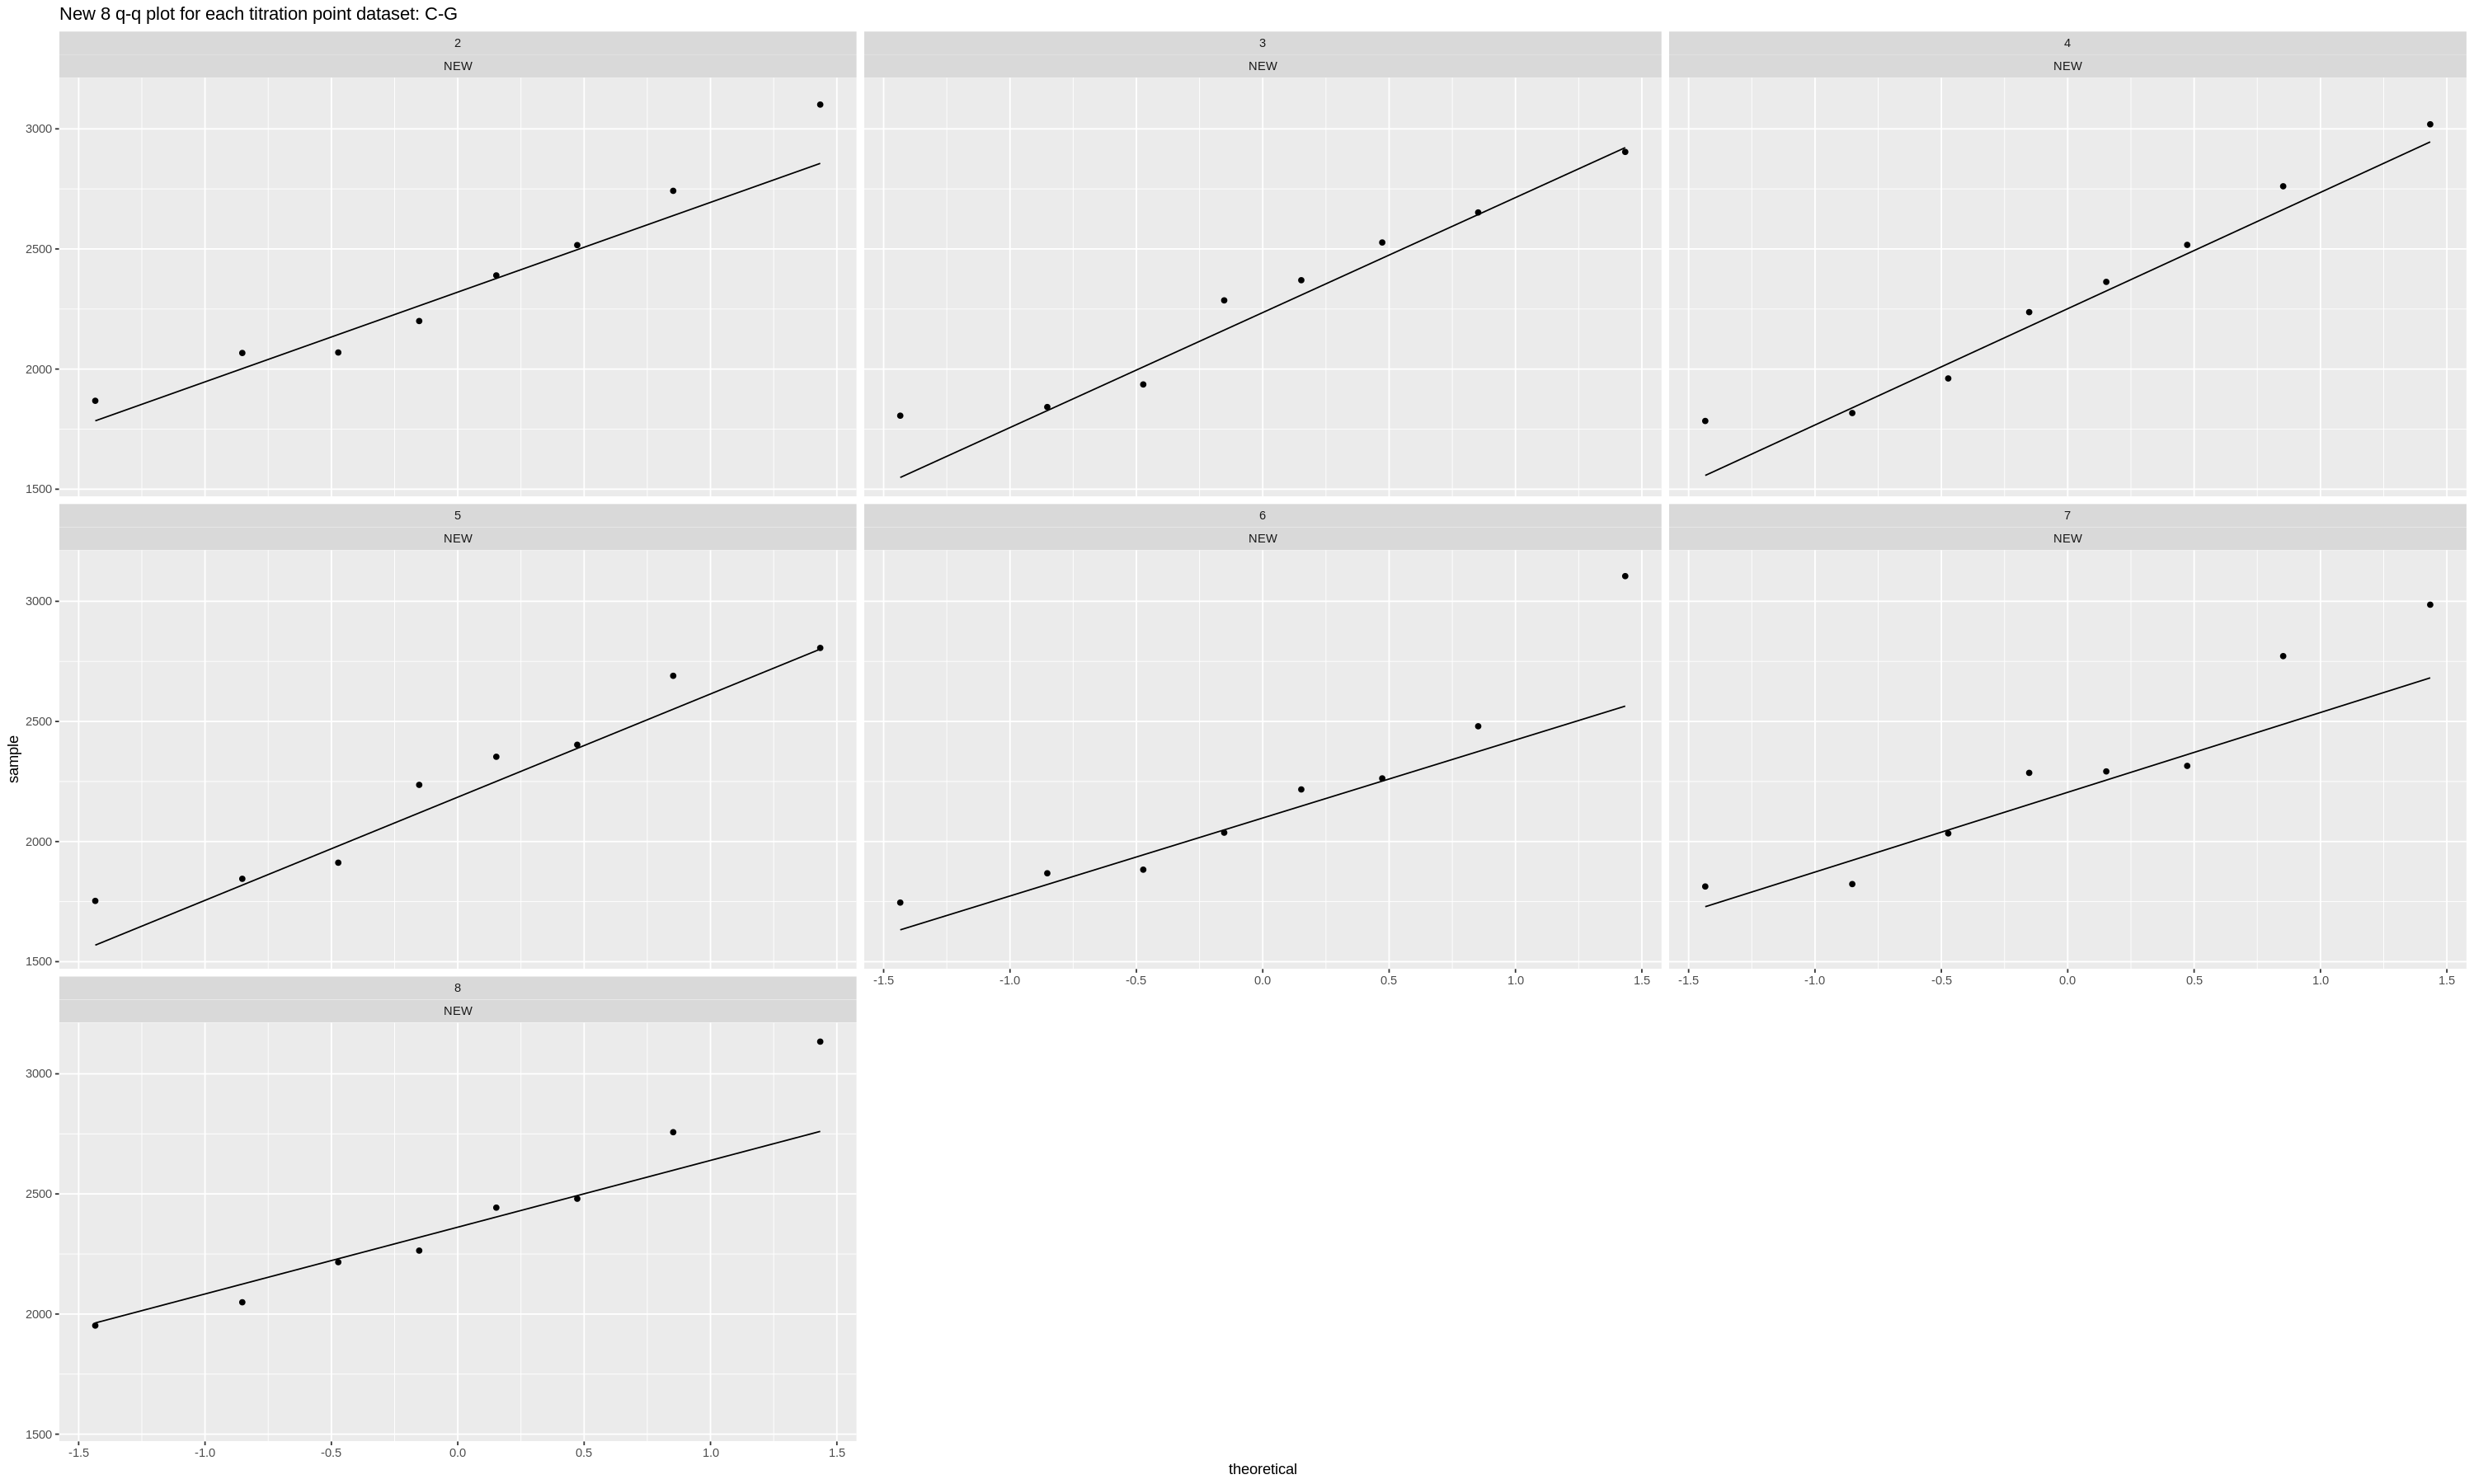

In [402]:
j = 3
mtd = "NEW"
row_group = paste0(rows[[j]][1], "-", rows[[j]][2])
df.tmp <- df %>% filter(row.group == row_group, 
                            method == mtd)
ggplot(df.tmp, aes(sample = Z)) + 
            stat_qq() + 
            stat_qq_line() + 
            facet_wrap(X~ method) +
            ggtitle(paste("New 8 q-q plot for each titration point dataset:", row_group))

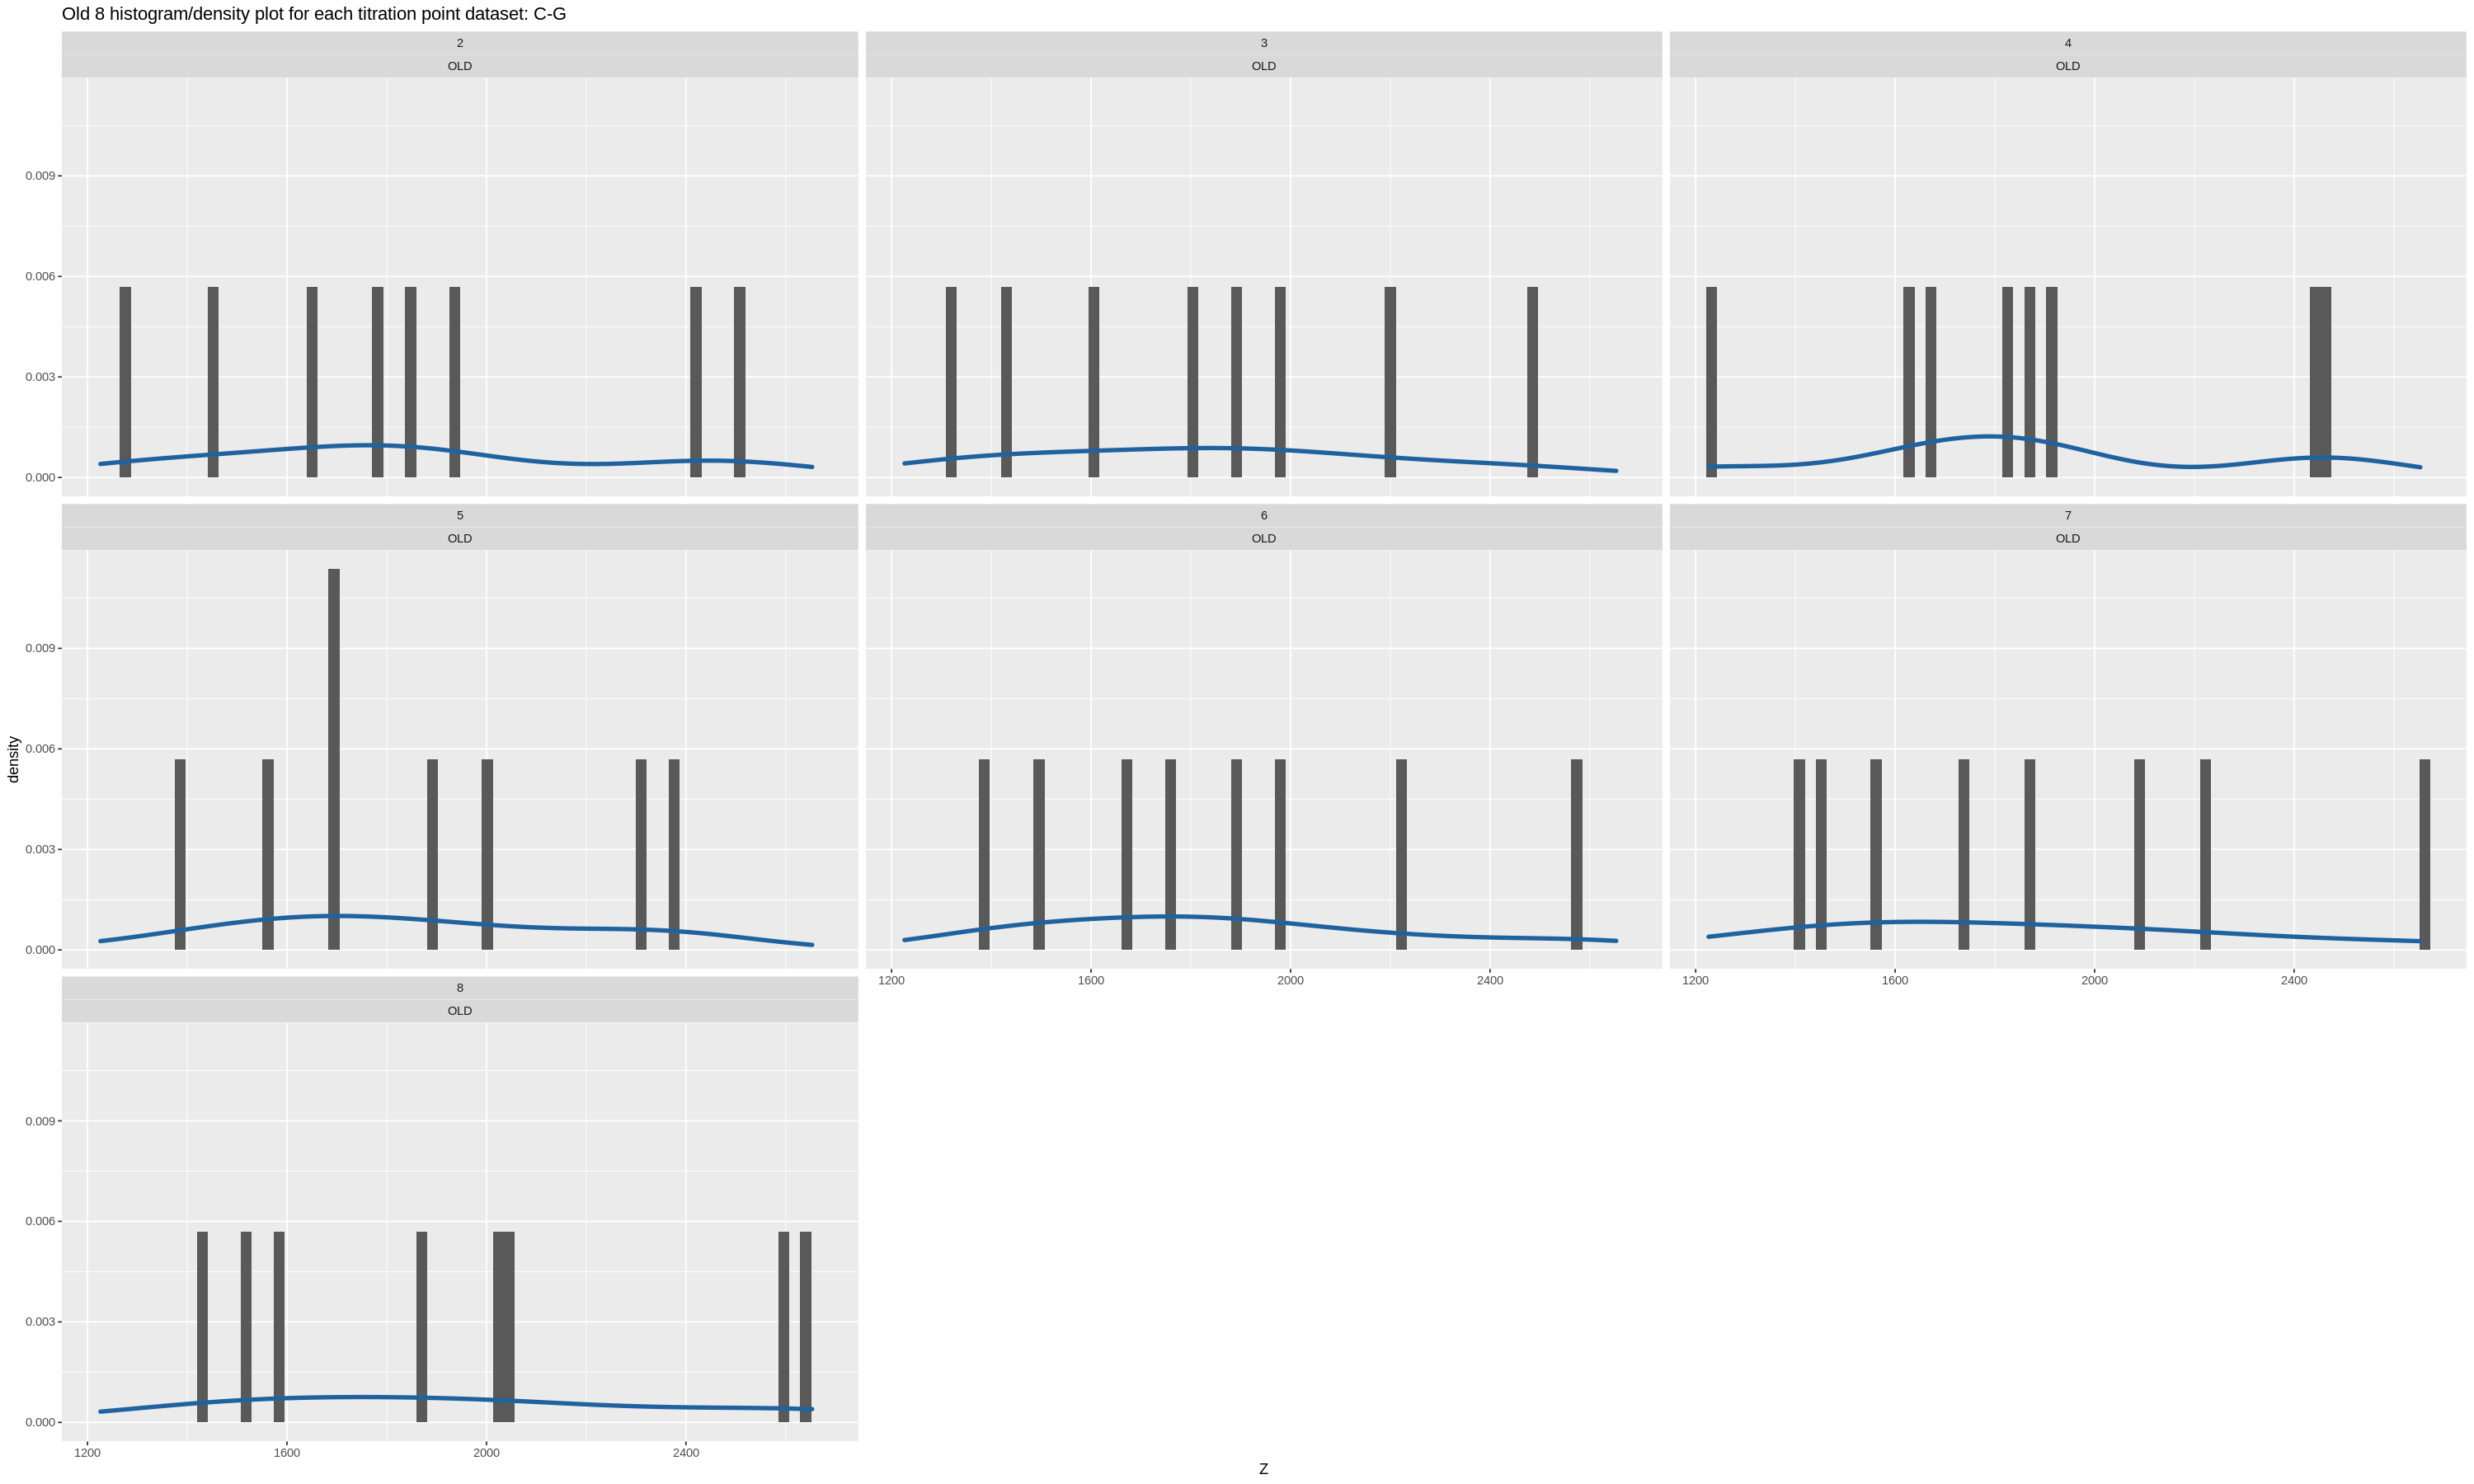

In [403]:

j = 3
mtd = "OLD"
row_group = paste0(rows[[j]][1], "-", rows[[j]][2])
df.tmp <- df %>% filter(row.group == row_group, 
                            method == mtd)

ggplot(data = df.tmp, aes(x = Z)) +
    geom_histogram(aes(y = ..density..), binwidth = 22, position = "identity") + 
    geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) +
    facet_wrap(X~ method) +
    ggtitle(paste("Old 8 histogram/density plot for each titration point dataset:",row_group))

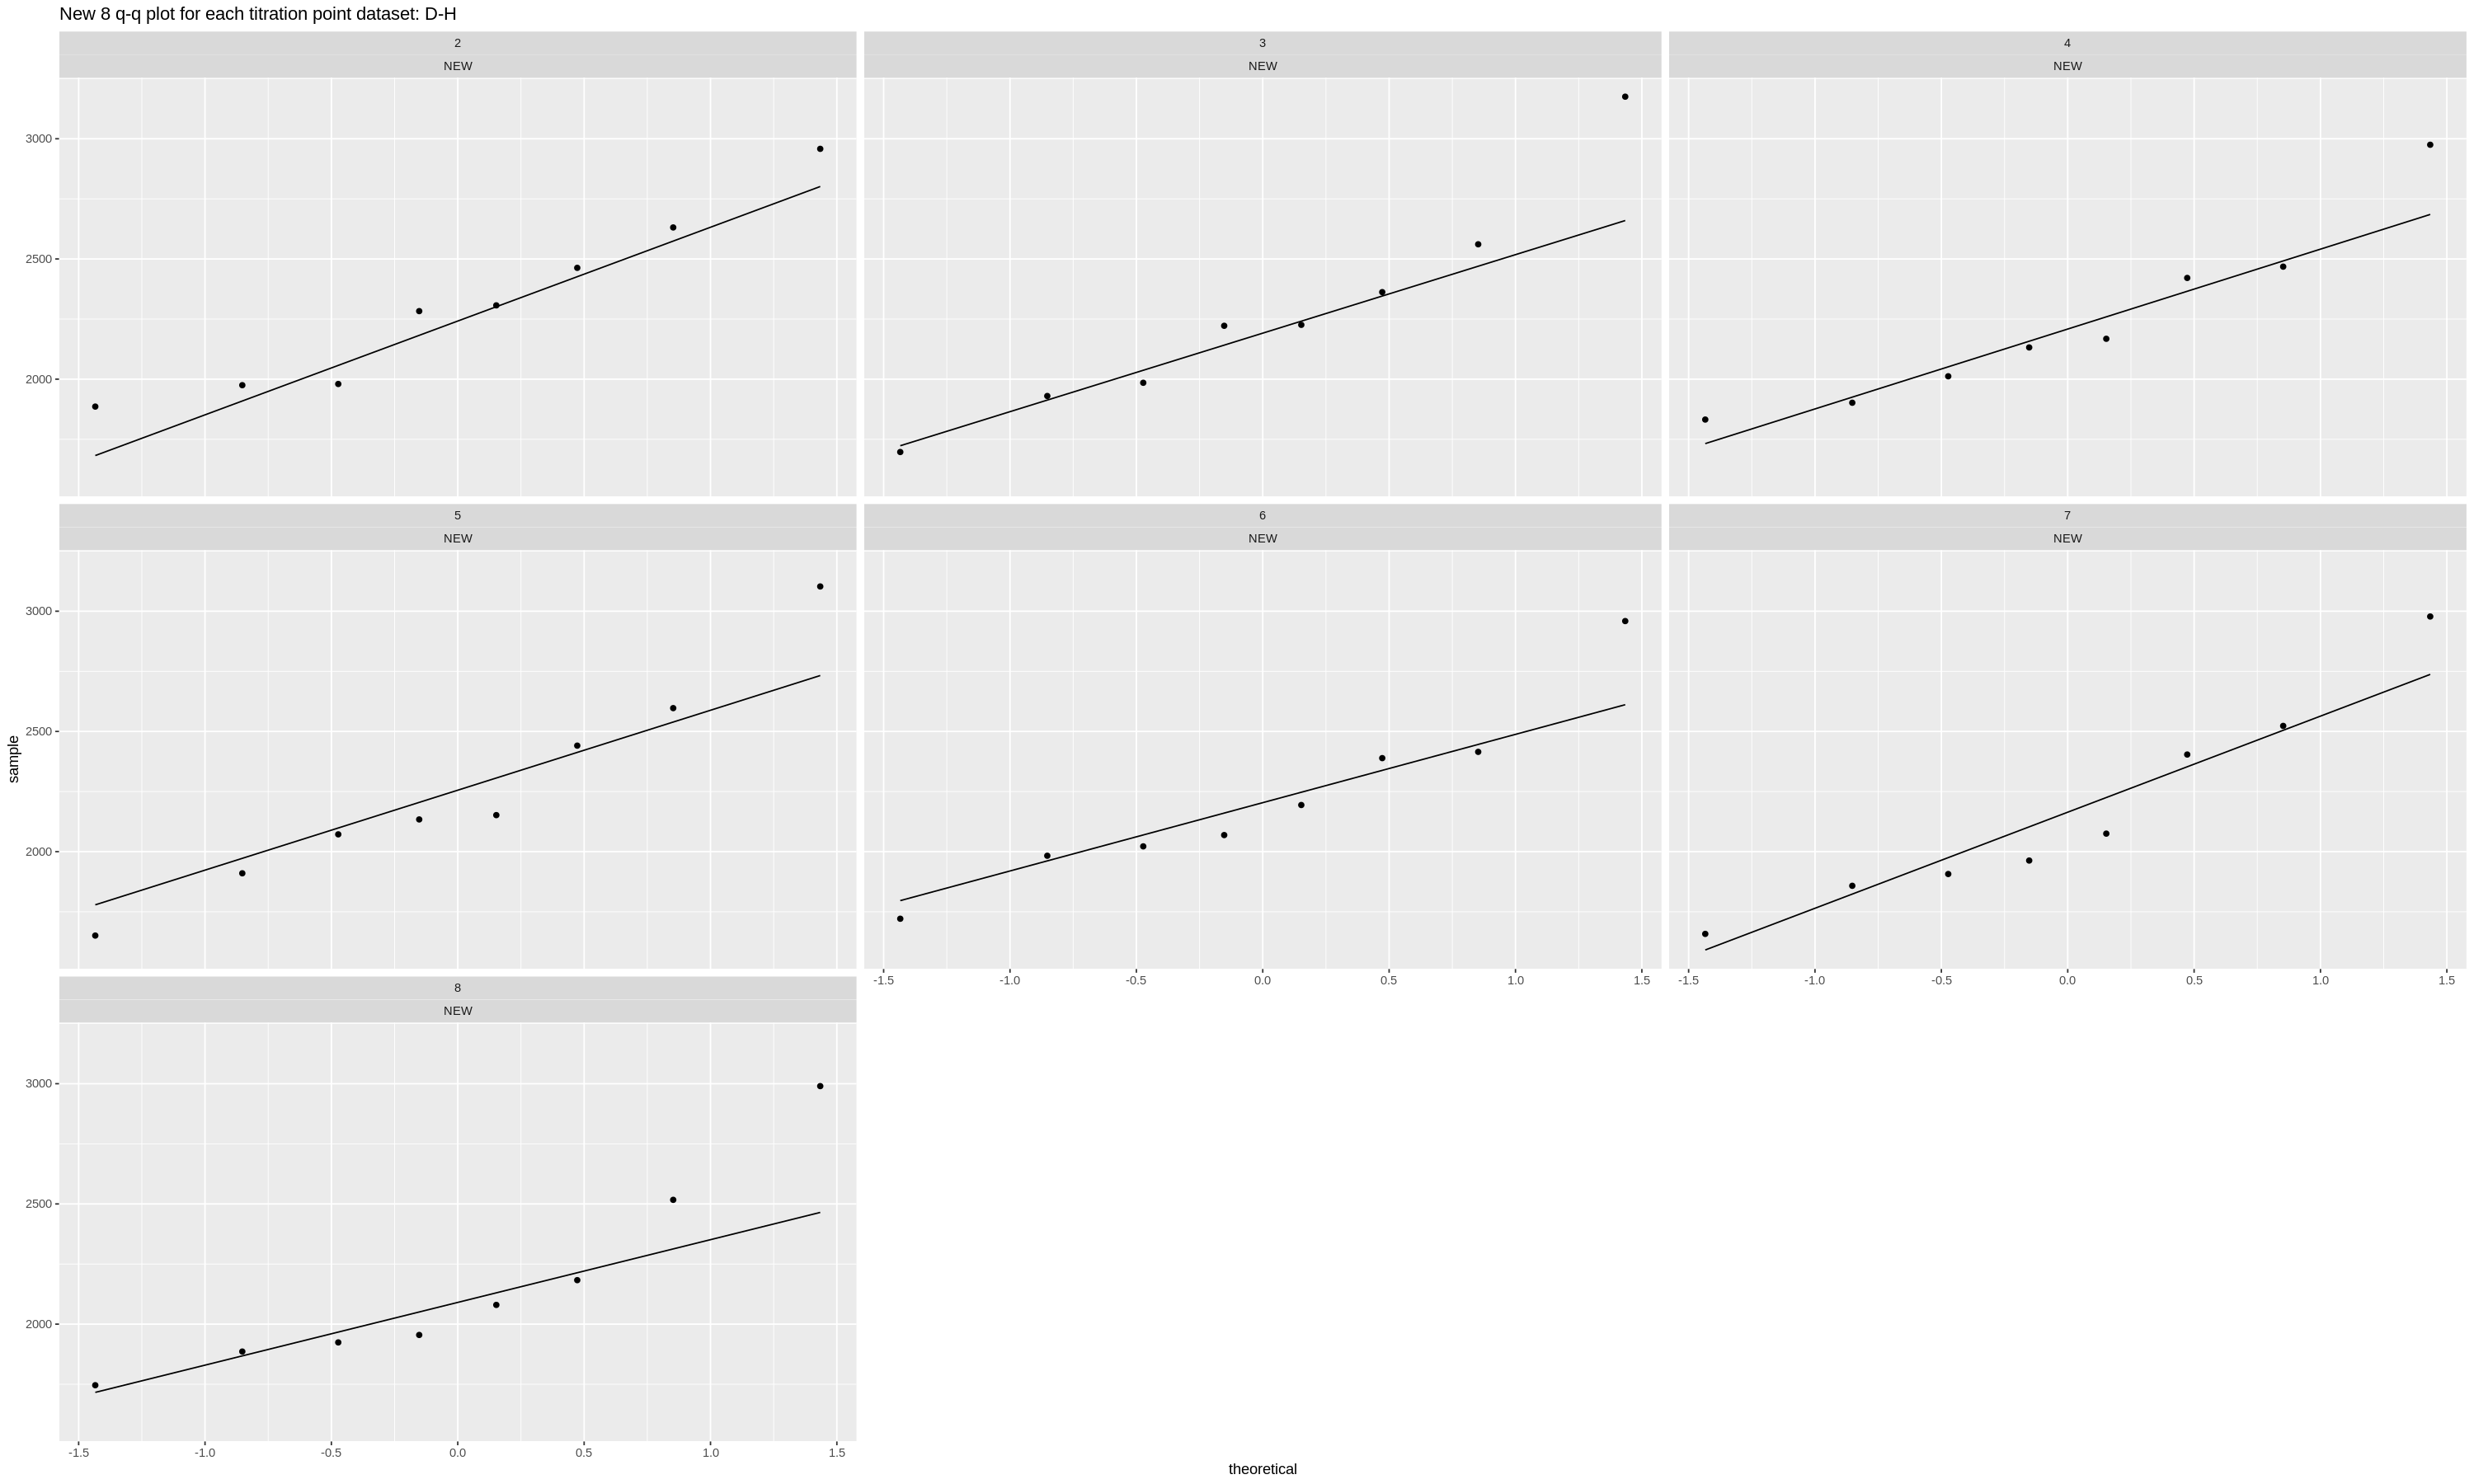

In [404]:

j = 4
mtd = "NEW"
row_group = paste0(rows[[j]][1], "-", rows[[j]][2])
df.tmp <- df %>% filter(row.group == row_group, 
                            method == mtd)
ggplot(df.tmp, aes(sample = Z)) + 
            stat_qq() + 
            stat_qq_line() + 
            facet_wrap(X~ method) +
            ggtitle(paste("New 8 q-q plot for each titration point dataset:", row_group))

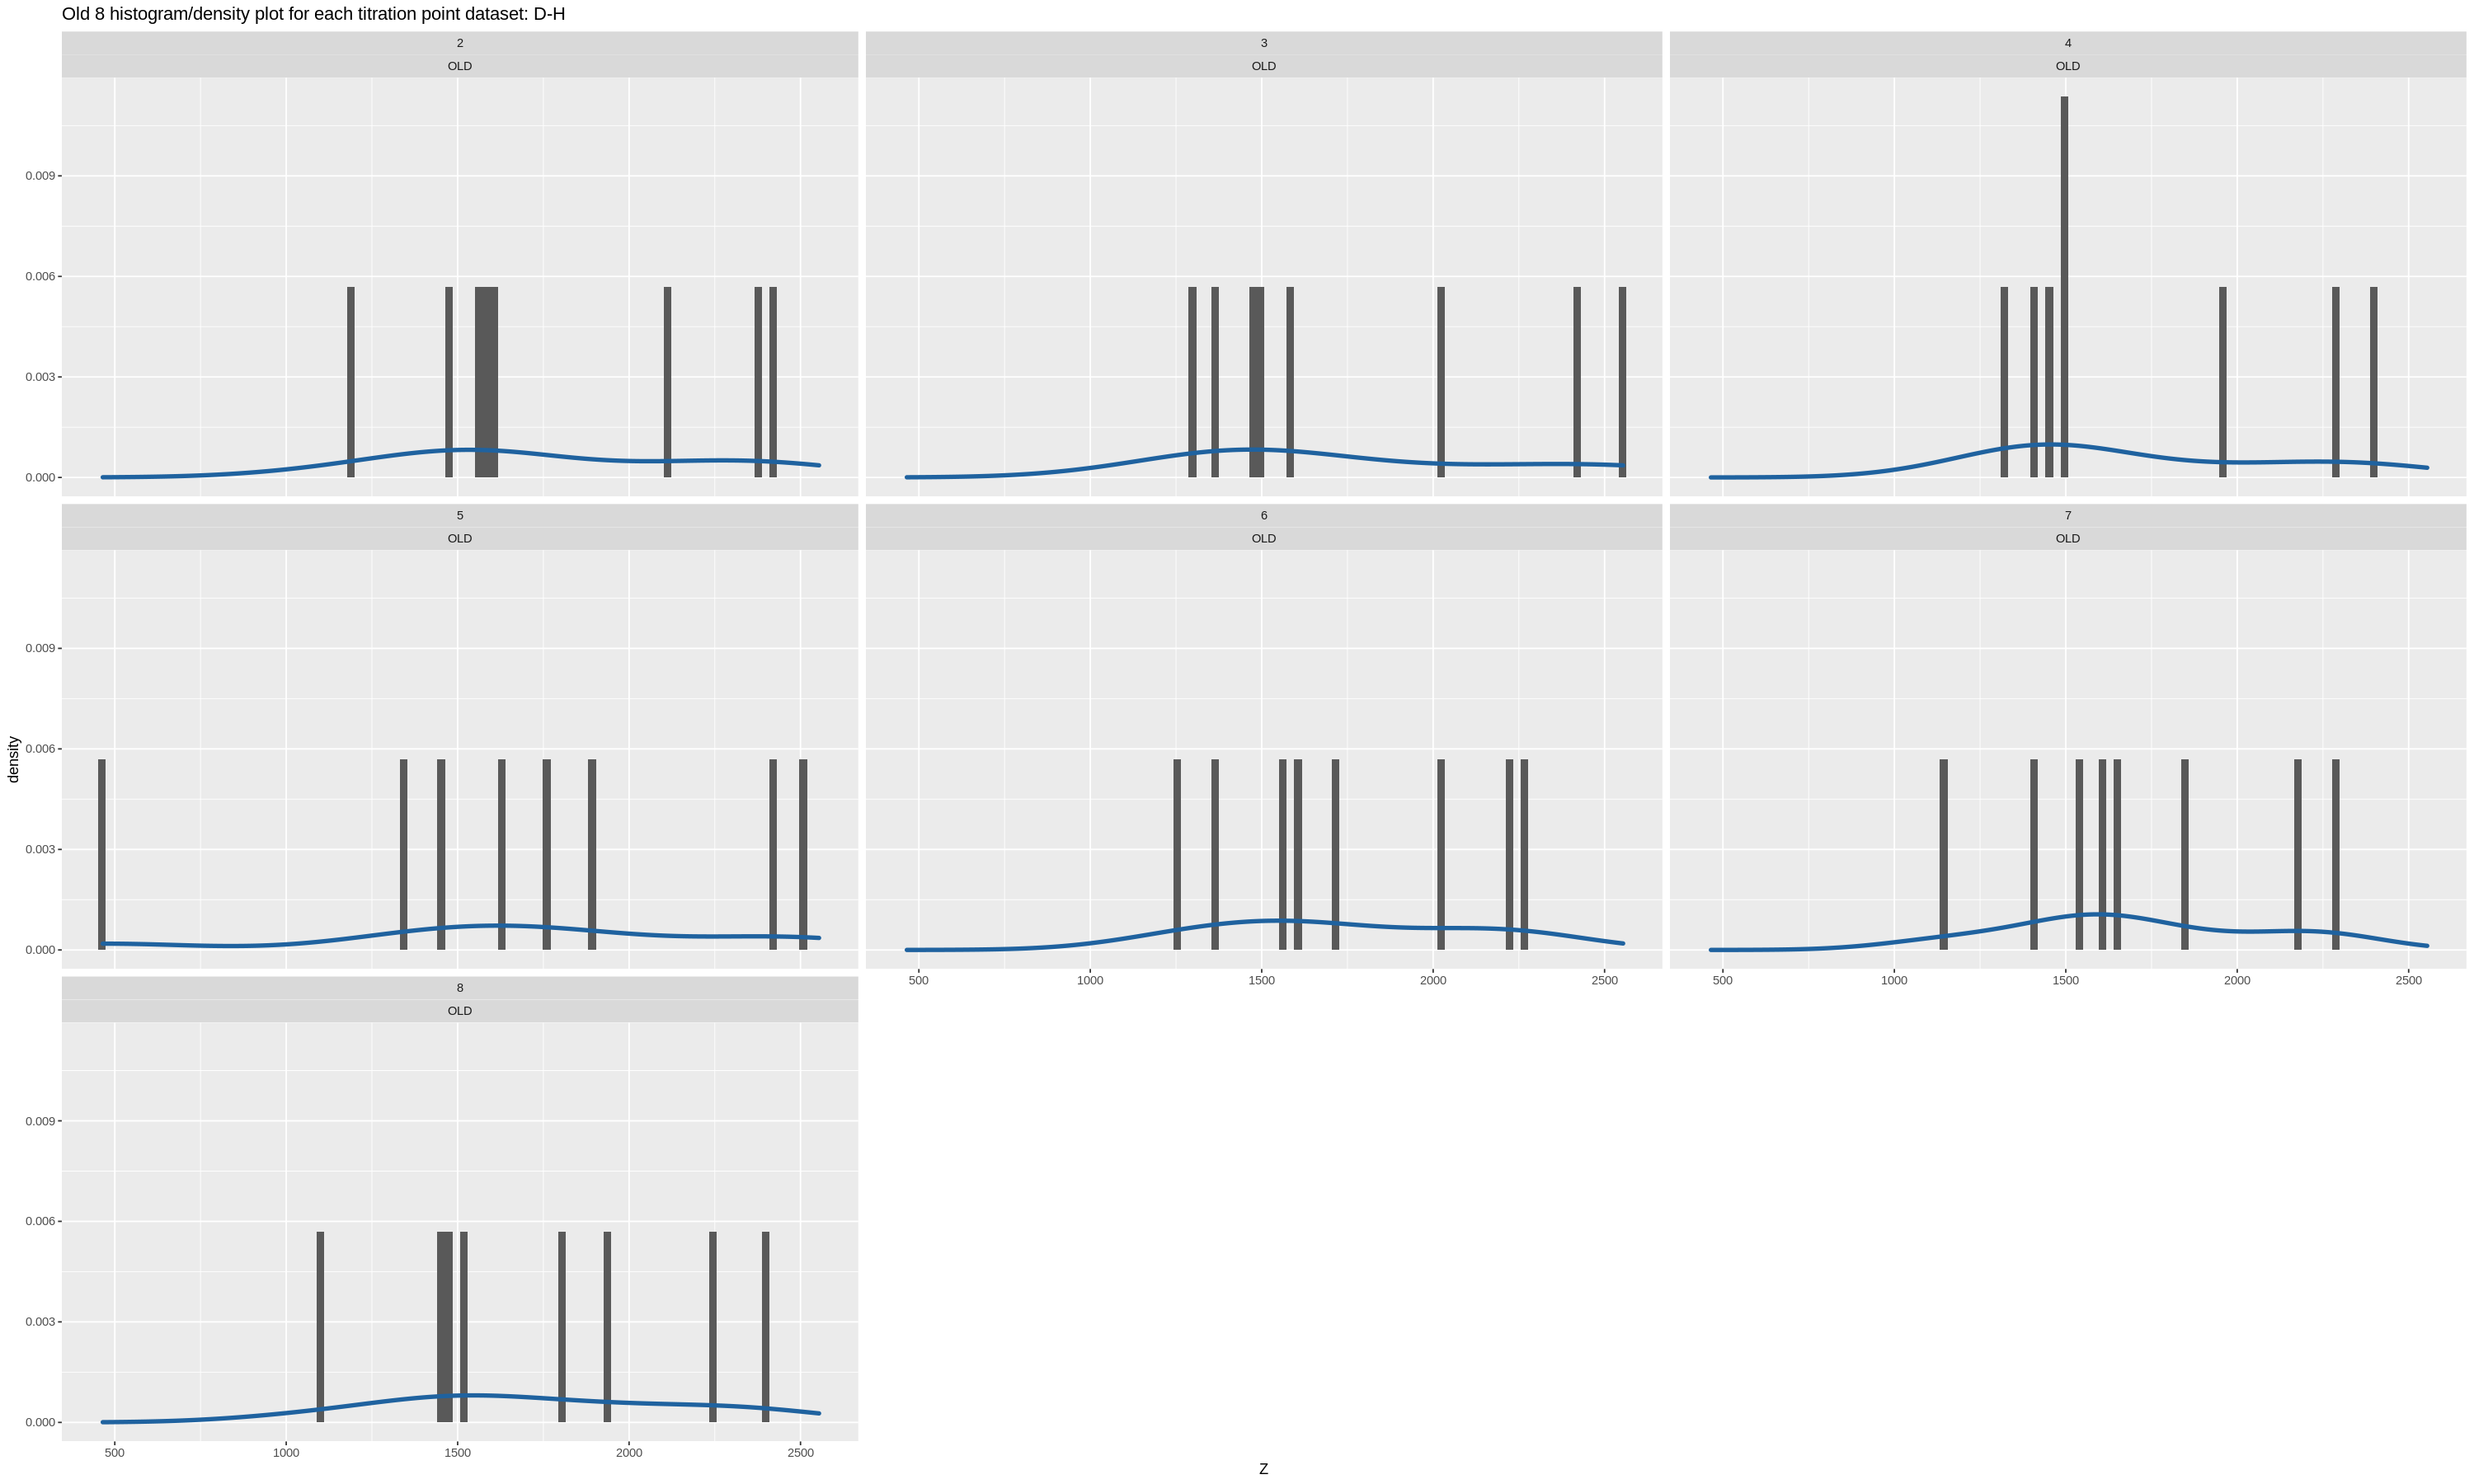

In [405]:

j = 4
mtd = "OLD"
row_group = paste0(rows[[j]][1], "-", rows[[j]][2])
df.tmp <- df %>% filter(row.group == row_group, 
                            method == mtd)

ggplot(data = df.tmp, aes(x = Z)) +
    geom_histogram(aes(y = ..density..), binwidth = 22, position = "identity") + 
    geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) +
    facet_wrap(X~ method) +
    ggtitle(paste("Old 8 histogram/density plot for each titration point dataset:",row_group))

### Wilcoxon rank test

- check that the median of pairwise differences is different 
- non-parametric statistical test to compare 2 related samples, matched samples or repeated measurements on single sample to assess whether their population mean ranks differ 
- an alternative to t-test; this is when we can't assume the two populatios are normally distributed; determine wheterh two dependent samples were selected from populations have the same distribution
- analysis below shows using both wilcox and t-test the sample mean for intra-plate is very different
- assume not normal distribution

#### t test for new vs old plate sets
- check mean sample difference between two datasets
- requires normal and linear data

###### info
- the data will output 8 wilcoxon and t-test results for each titration point across 3 plates totalling to 6 per group since there are 2 data points per plate 

### combine all data to make general boxplot

In [406]:
dff <- df %>% mutate(subgroup = case_when(
           Y == "A" & X == 2 ~ "A2-E2",
           Y == "A" & X == 3 ~ "A3-E3",
           Y == "A" & X == 4 ~ "A4-E4",
           Y == "A" & X == 5 ~ "A5-E5",
           Y == "A" & X == 6 ~ "A6-E6",
           Y == "A" & X == 7 ~ "A7-E7",
           Y == "A" & X == 8 ~ "A8-E8",
           Y == "B" & X == 2 ~ "B2-F2",
           Y == "B" & X == 3 ~ "B3-F3",
           Y == "B" & X == 4 ~ "B4-F4",
           Y == "B" & X == 5 ~ "B5-F5",
           Y == "B" & X == 6 ~ "B6-F6",
           Y == "B" & X == 7 ~ "B7-F7",
           Y == "B" & X == 8 ~ "B8-F8",
           Y == "C" & X == 2 ~ "C2-G2",
           Y == "C" & X == 3 ~ "C3-G3",
           Y == "C" & X == 4 ~ "C4-G4",
           Y == "C" & X == 5 ~ "C5-G5",
           Y == "C" & X == 6 ~ "C6-G6",
           Y == "C" & X == 7 ~ "C7-G7",
           Y == "C" & X == 8 ~ "C8-G8",
           Y == "D" & X == 2 ~ "D2-H2",
           Y == "D" & X == 3 ~ "D3-H3",
           Y == "D" & X == 4 ~ "D4-H4",
           Y == "D" & X == 5 ~ "D5-H5",
           Y == "D" & X == 6 ~ "D6-H6",
           Y == "D" & X == 7 ~ "D7-H7",
           Y == "D" & X == 8 ~ "D8-H8",
           Y == "E" & X == 2 ~ "A2-E2",
           Y == "E" & X == 3 ~ "A3-E3",
           Y == "E" & X == 4 ~ "A4-E4",
           Y == "E" & X == 5 ~ "A5-E5",
           Y == "E" & X == 6 ~ "A6-E6",
           Y == "E" & X == 7 ~ "A7-E7",
           Y == "E" & X == 8 ~ "A8-E8",
           Y == "F" & X == 2 ~ "B2-F2",
           Y == "F" & X == 3 ~ "B3-F3",
           Y == "F" & X == 4 ~ "B4-F4",
           Y == "F" & X == 5 ~ "B5-F5",
           Y == "F" & X == 6 ~ "B6-F6",
           Y == "F" & X == 7 ~ "B7-F7",
           Y == "F" & X == 8 ~ "B8-F8",
           Y == "G" & X == 2 ~ "C2-G2",
           Y == "G" & X == 3 ~ "C3-G3",
           Y == "G" & X == 4 ~ "C4-G4",
           Y == "G" & X == 5 ~ "C5-G5",
           Y == "G" & X == 6 ~ "C6-G6",
           Y == "G" & X == 7 ~ "C7-G7",
           Y == "G" & X == 8 ~ "C8-G8",
           Y == "H" & X == 2 ~ "D2-H2",
           Y == "H" & X == 3 ~ "D3-H3",
           Y == "H" & X == 4 ~ "D4-H4",
           Y == "H" & X == 5 ~ "D5-H5",
           Y == "H" & X == 6 ~ "D6-H6",
           Y == "H" & X == 7 ~ "D7-H7",
           Y == "H" & X == 8 ~ "D8-H8"
           )
          ) %>%
    mutate(wellid = paste0(Y, X))

### ANOVA cell count

In [487]:
dfm.t <- dff %>% mutate(anova = paste0(subgroup, "-", plate, "-", method))
df_stats = data.frame()
ls_tukey = list()
ls_pair = list()
row_idx = 1

for (r in rows) {
    for (i in seq(2,8)) {
        sg = paste0(r[1],i,"-",r[2],i)
        df_stats[row_idx, "ROW.GROUP"] = sg 
        df.t <- dfm.t %>% filter(subgroup == sg)

        res.aov <- aov(Z ~ anova, data = df.t)
        stat <- summary(res.aov)
        df_stats[row_idx, "ANOVA"] = formatC(stat[[1]]$`Pr(>F)`[1], format = "e", digits = 2)
        print(stat)
        stat <- TukeyHSD(res.aov)
        ls_tukey[[row_idx]] <- data.frame(stat$anova)
        
        stat <- pairwise.t.test(df.t$Z, df.t$anova,
                     p.adjust.method = "BH")
        ls_pair[[row_idx]] <- data.frame(stat$p.value)
        ls_pair[[row_idx]] <- rbind(names(ls_pair[[row_idx]]), ls_pair[[row_idx]])
        colnames(ls_pair[[row_idx]]) <- paste0("COL", seq(7))
        rownames(ls_pair[[row_idx]])[1] <- row_idx
        row_idx = row_idx + 1
    }
}
df_tukey <- do.call(rbind, ls_tukey)
# logic to get colnames of each df and put at top and rename colnames for universal dataframe
df_pair <- do.call(rbind, ls_pair)
write.csv(df_pair, paste0("8v8_pair_count_cmbplts.csv"))
write.csv(df_tukey, paste0("8v8_tukey_count_cmbplts.csv"))
write.csv(df_stats, paste0("8v8_anova_count_cmbplts.csv"), row.names = FALSE)

            Df  Sum Sq Mean Sq F value  Pr(>F)   
anova        7 2163763  309109   10.68 0.00168 **
Residuals    8  231658   28957                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
            Df  Sum Sq Mean Sq F value Pr(>F)  
anova        7 2759106  394158     5.2 0.0168 *
Residuals    8  606452   75806                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
            Df  Sum Sq Mean Sq F value Pr(>F)  
anova        7 3373669  481953   5.351 0.0154 *
Residuals    8  720487   90061                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
            Df  Sum Sq Mean Sq F value  Pr(>F)   
anova        7 3304502  472072   6.674 0.00787 **
Residuals    8  565900   70738                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
            Df  Sum Sq Mean Sq F value  Pr(>F)   
anova        7 3289868  469981   6.277 0.00952 **
Residuals    8  598961   74870              

In [407]:
head(dff)

X Y Z    row.group method plate   subgroup wellid
1 2 A 1692 A-E       NEW    PLATE 1 A2-E2    A2    
2 3 A 1720 A-E       NEW    PLATE 1 A3-E3    A3    
3 4 A 2017 A-E       NEW    PLATE 1 A4-E4    A4    
4 5 A 1635 A-E       NEW    PLATE 1 A5-E5    A5    
5 6 A 1935 A-E       NEW    PLATE 1 A6-E6    A6    
6 7 A 2039 A-E       NEW    PLATE 1 A7-E7    A7

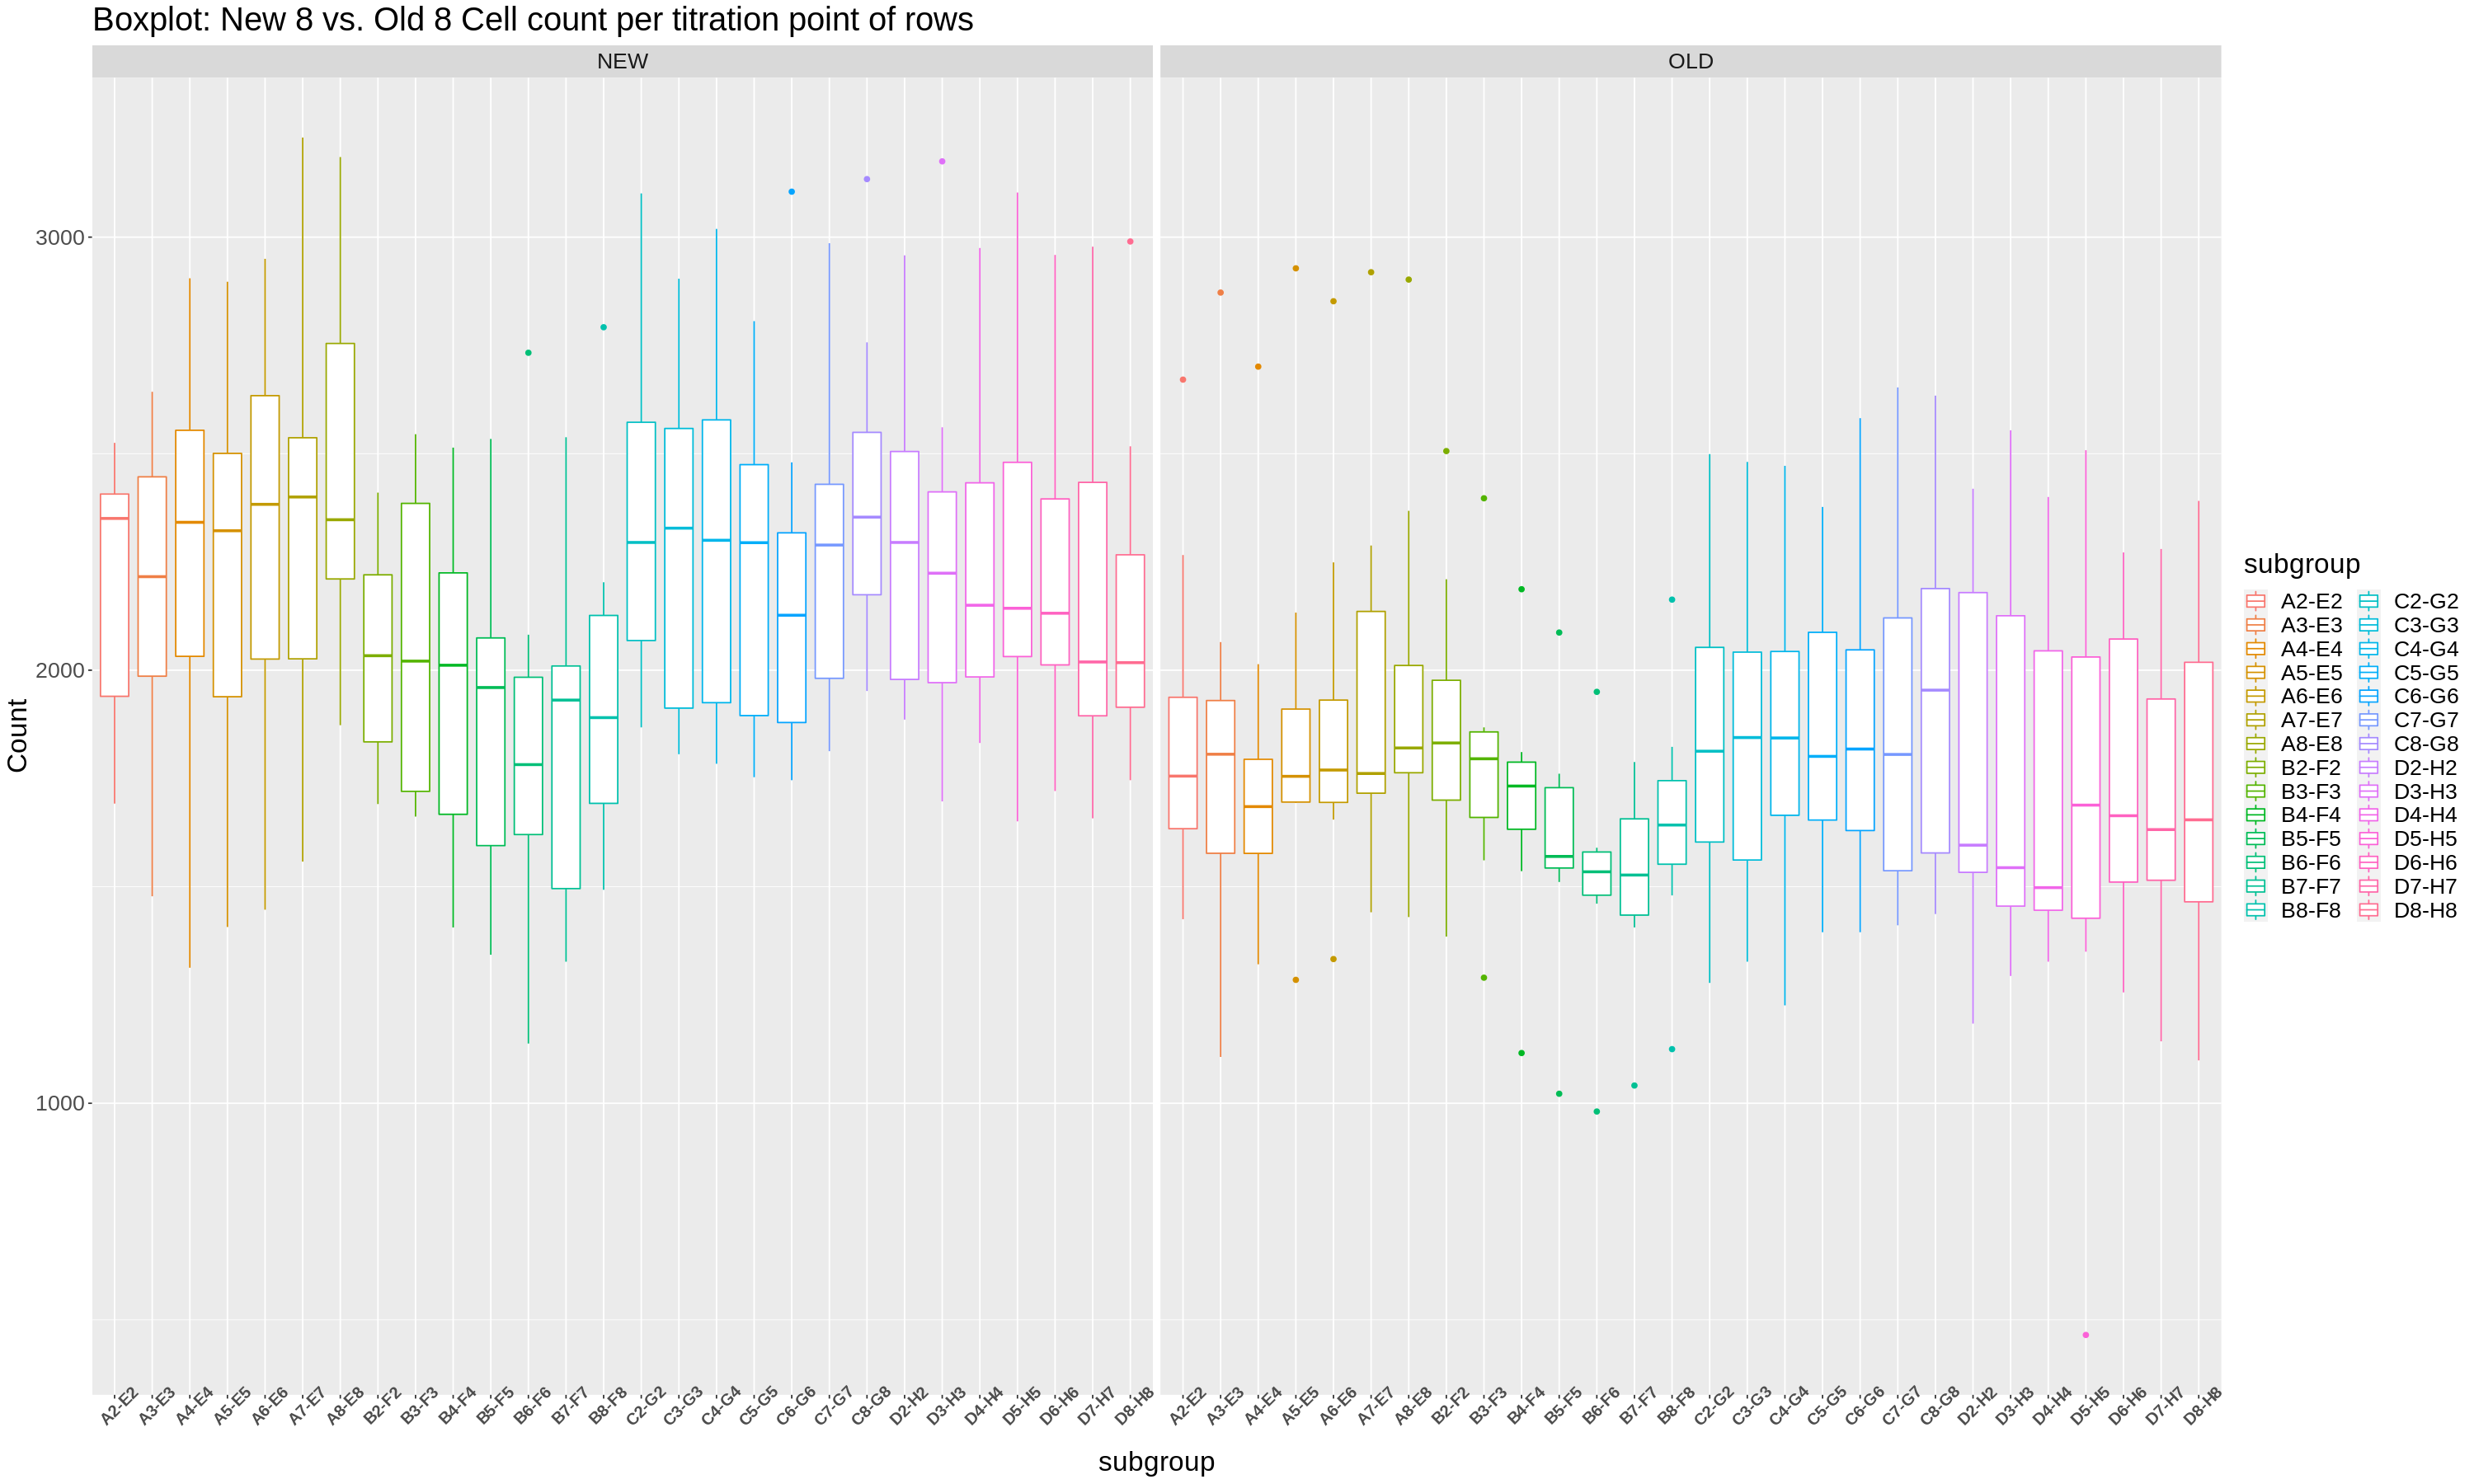

In [479]:
ggplot(dff, aes(x=subgroup,y=Z)) +
  geom_boxplot(aes(colour = subgroup)) +
  labs(title="Boxplot: New 8 vs. Old 8 Cell count per titration point of rows") +
  ylab("Count") +
  facet_wrap(~method) + 
  theme(text = element_text(size=20),
        axis.text.x = element_text(face = "bold", 
                           size = 12, angle = 45)) 

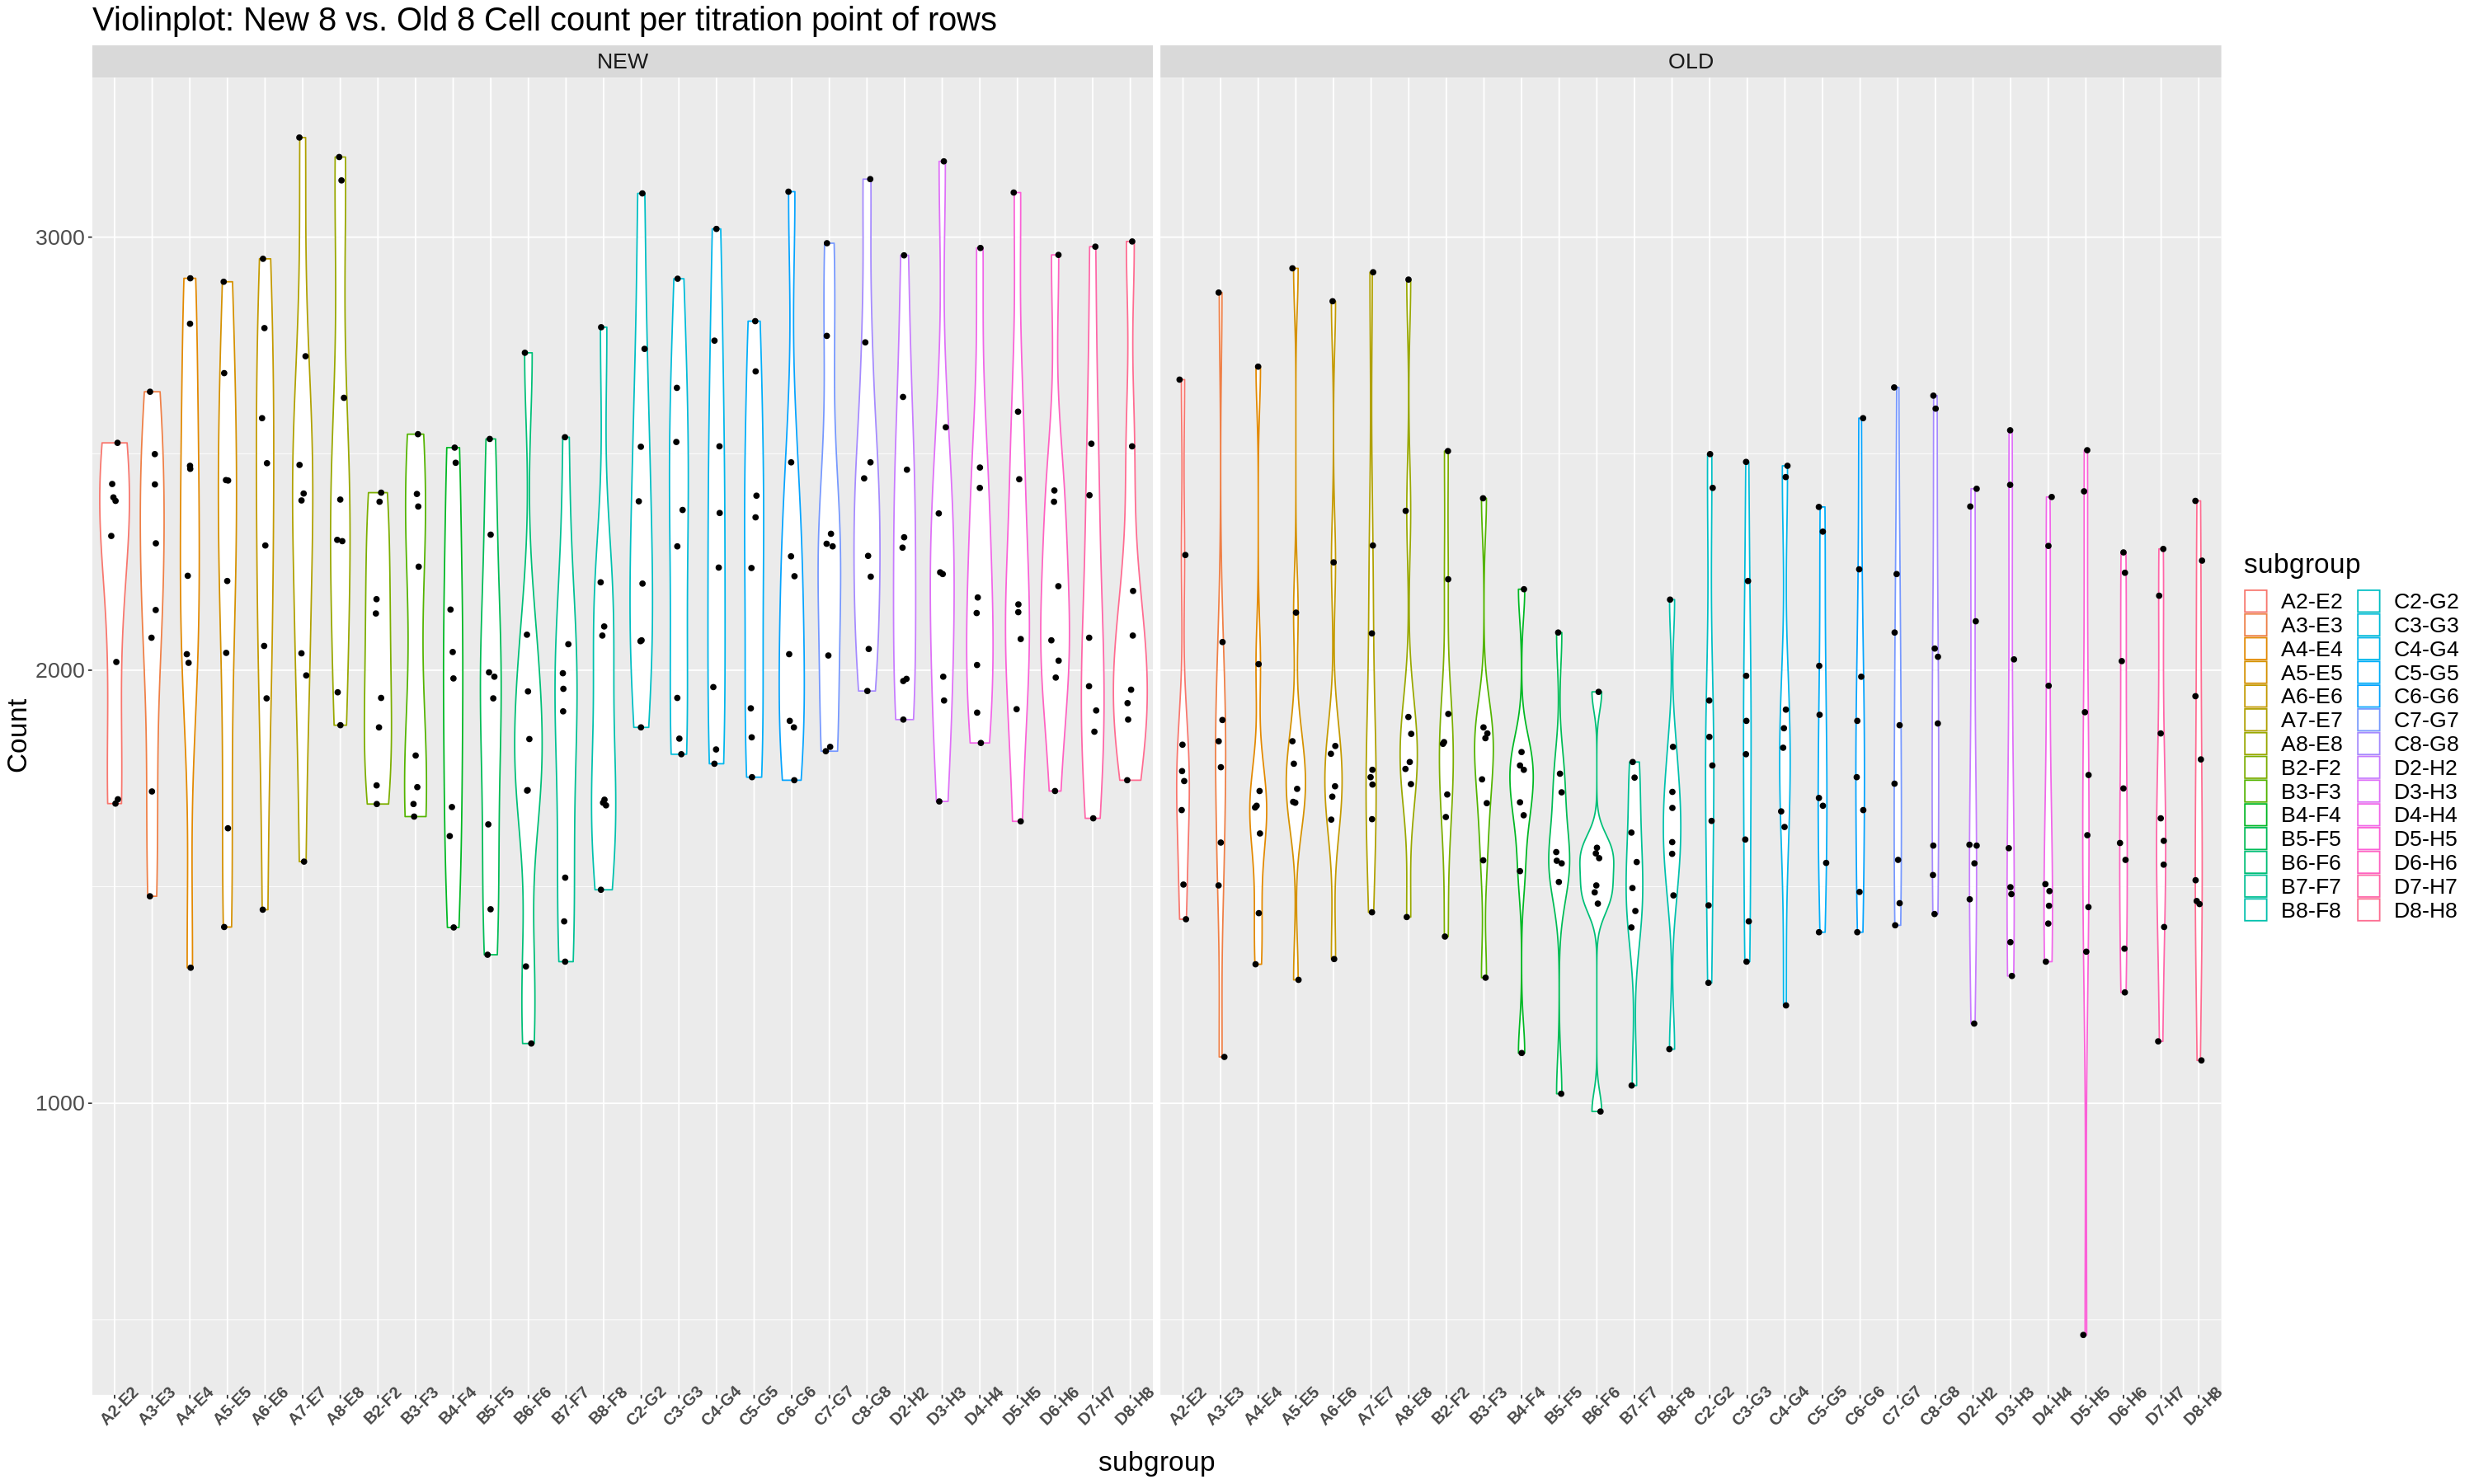

In [481]:
ggplot(dff, aes(subgroup, Z)) + 
    geom_violin(aes(colour = subgroup)) + 
    geom_jitter(height = 0, width = 0.1) +
    ggtitle("Violinplot: New 8 vs. Old 8 Cell count per titration point of rows") +
    ylab("Count") +
    facet_wrap(~ method) +
    theme(text = element_text(size=20),
        axis.text.x = element_text(face = "bold", 
                           size = 12, angle = 45)) 

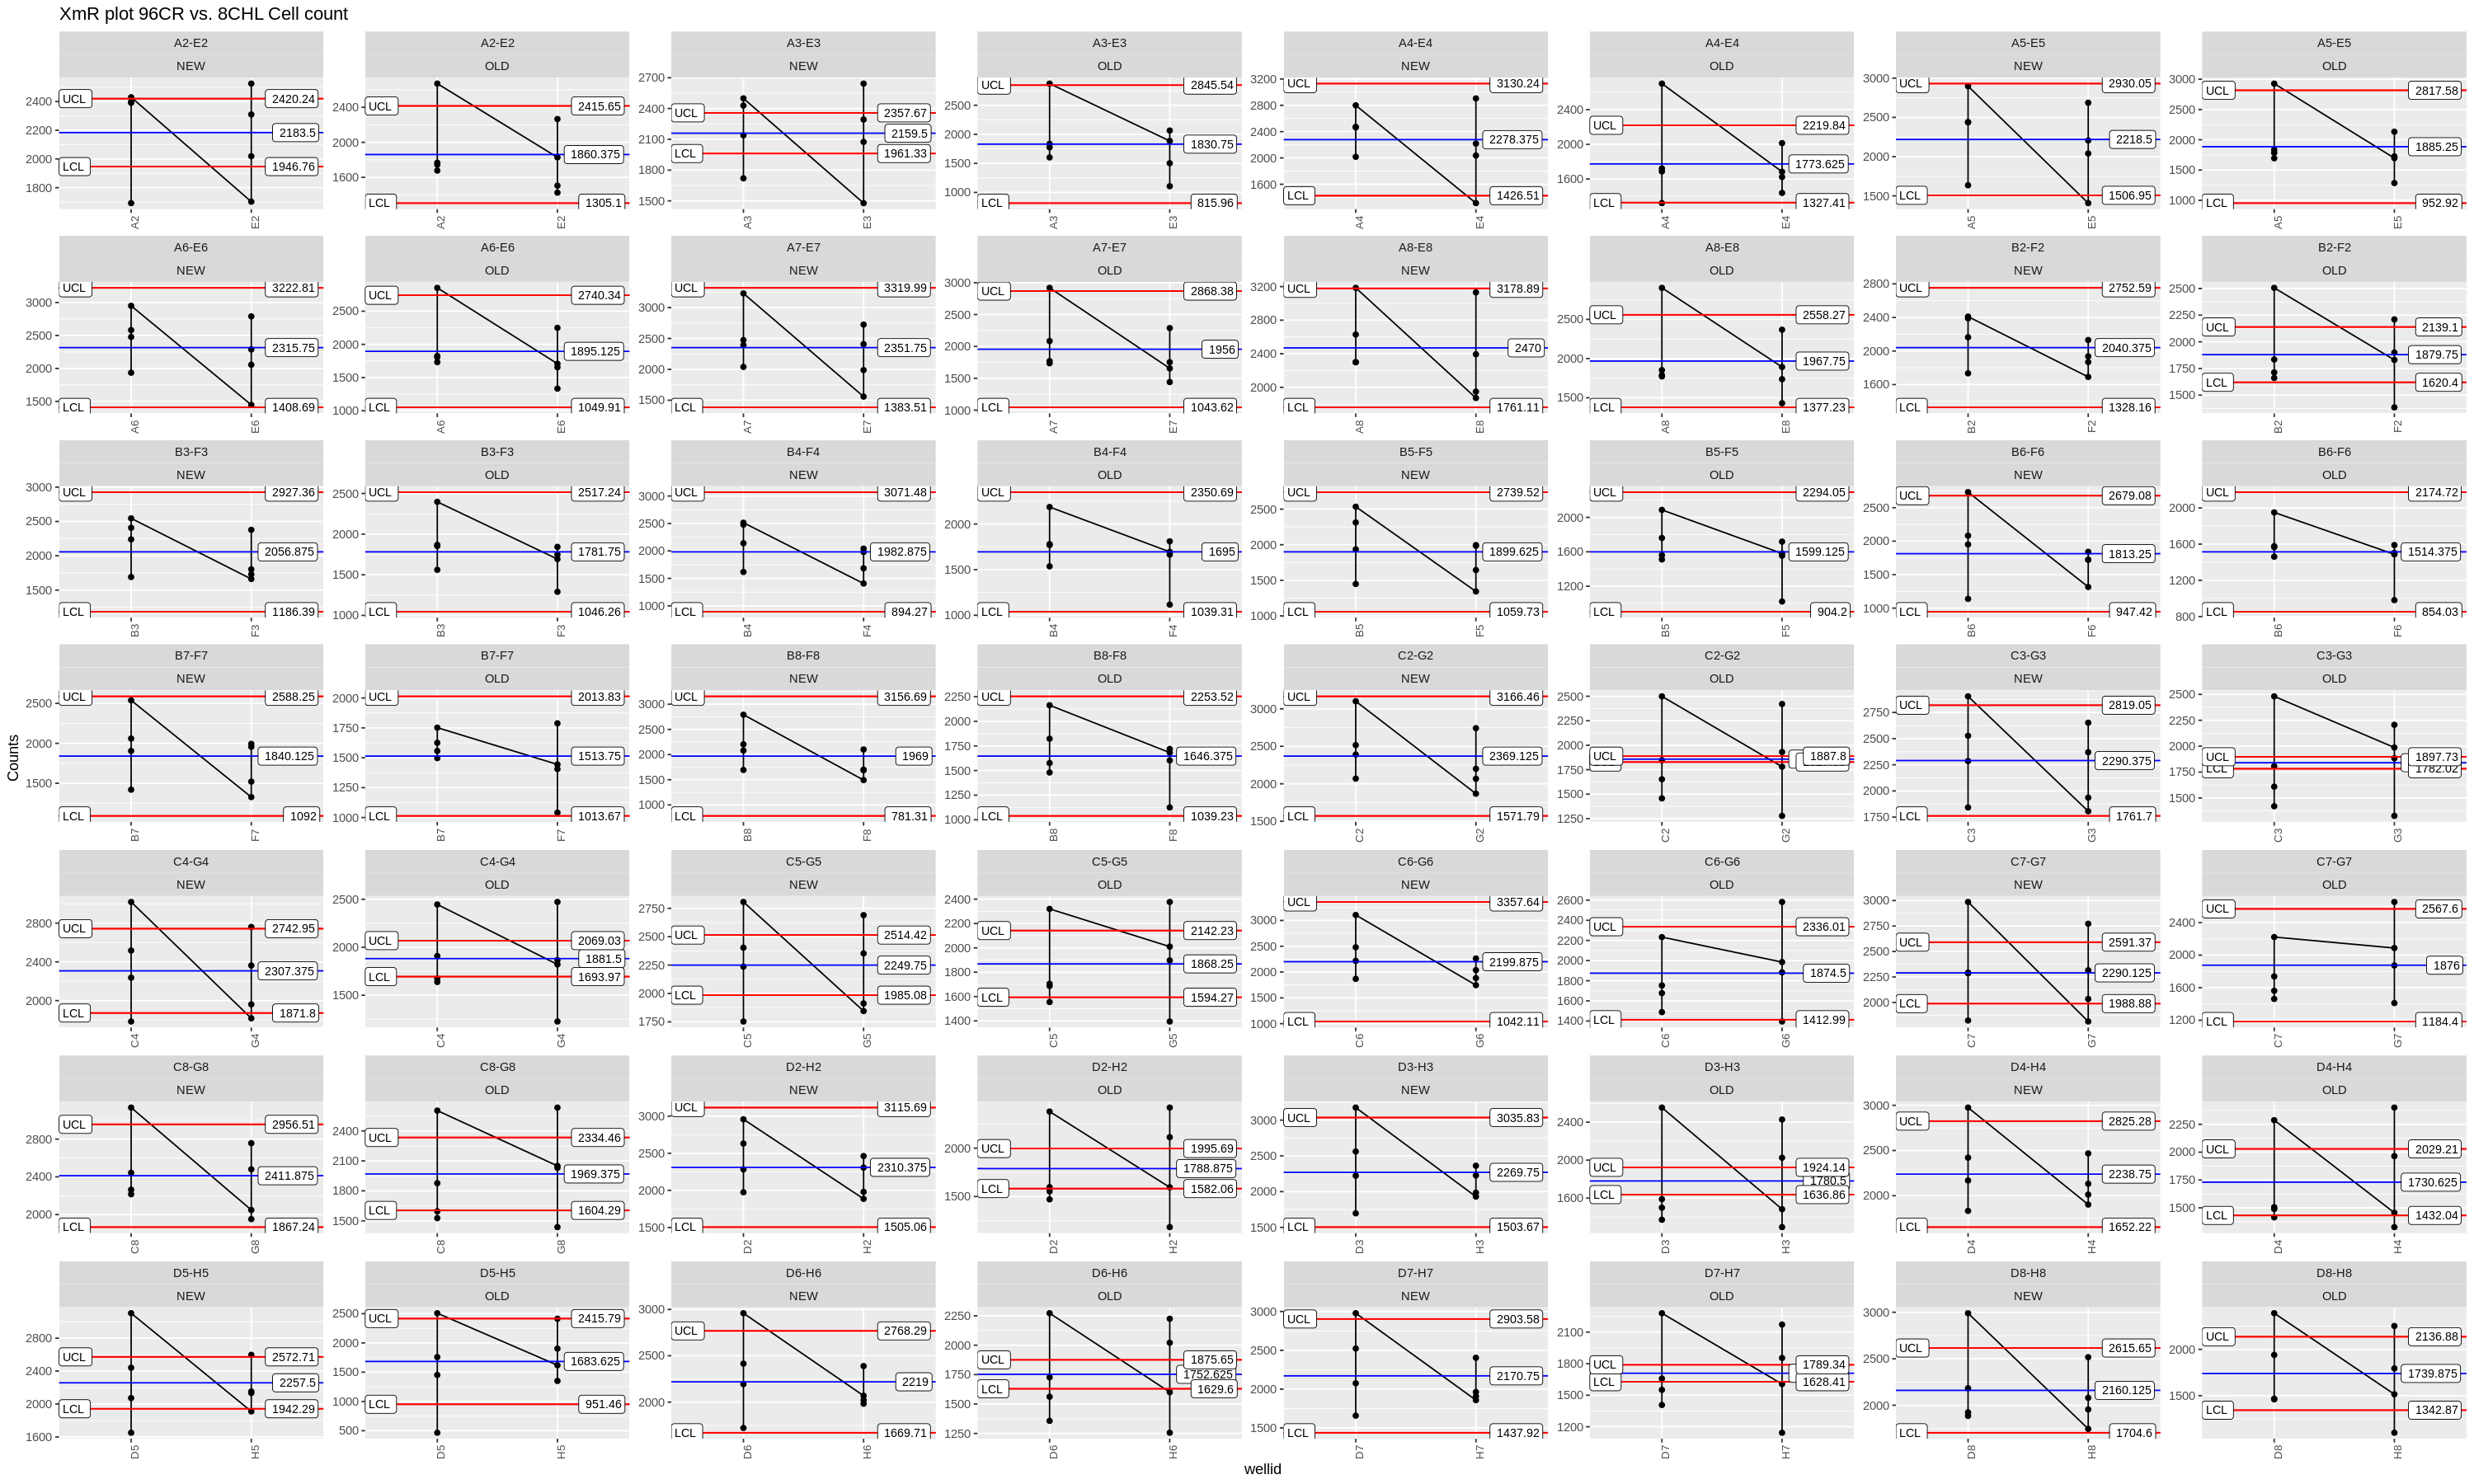

In [409]:
ggplot(dff, aes(x=wellid, y=Z, group=subgroup)) +
  geom_point() + geom_line() +
  stat_QC(method="XmR", auto.label = T, label.digits = 4) + 
  ylab("Counts") +
  facet_wrap(subgroup~method, scales = "free") +
  ggtitle("XmR plot 96CR vs. 8CHL Cell count") + 
  theme(axis.text.x = element_text(size = 8, angle = 90))

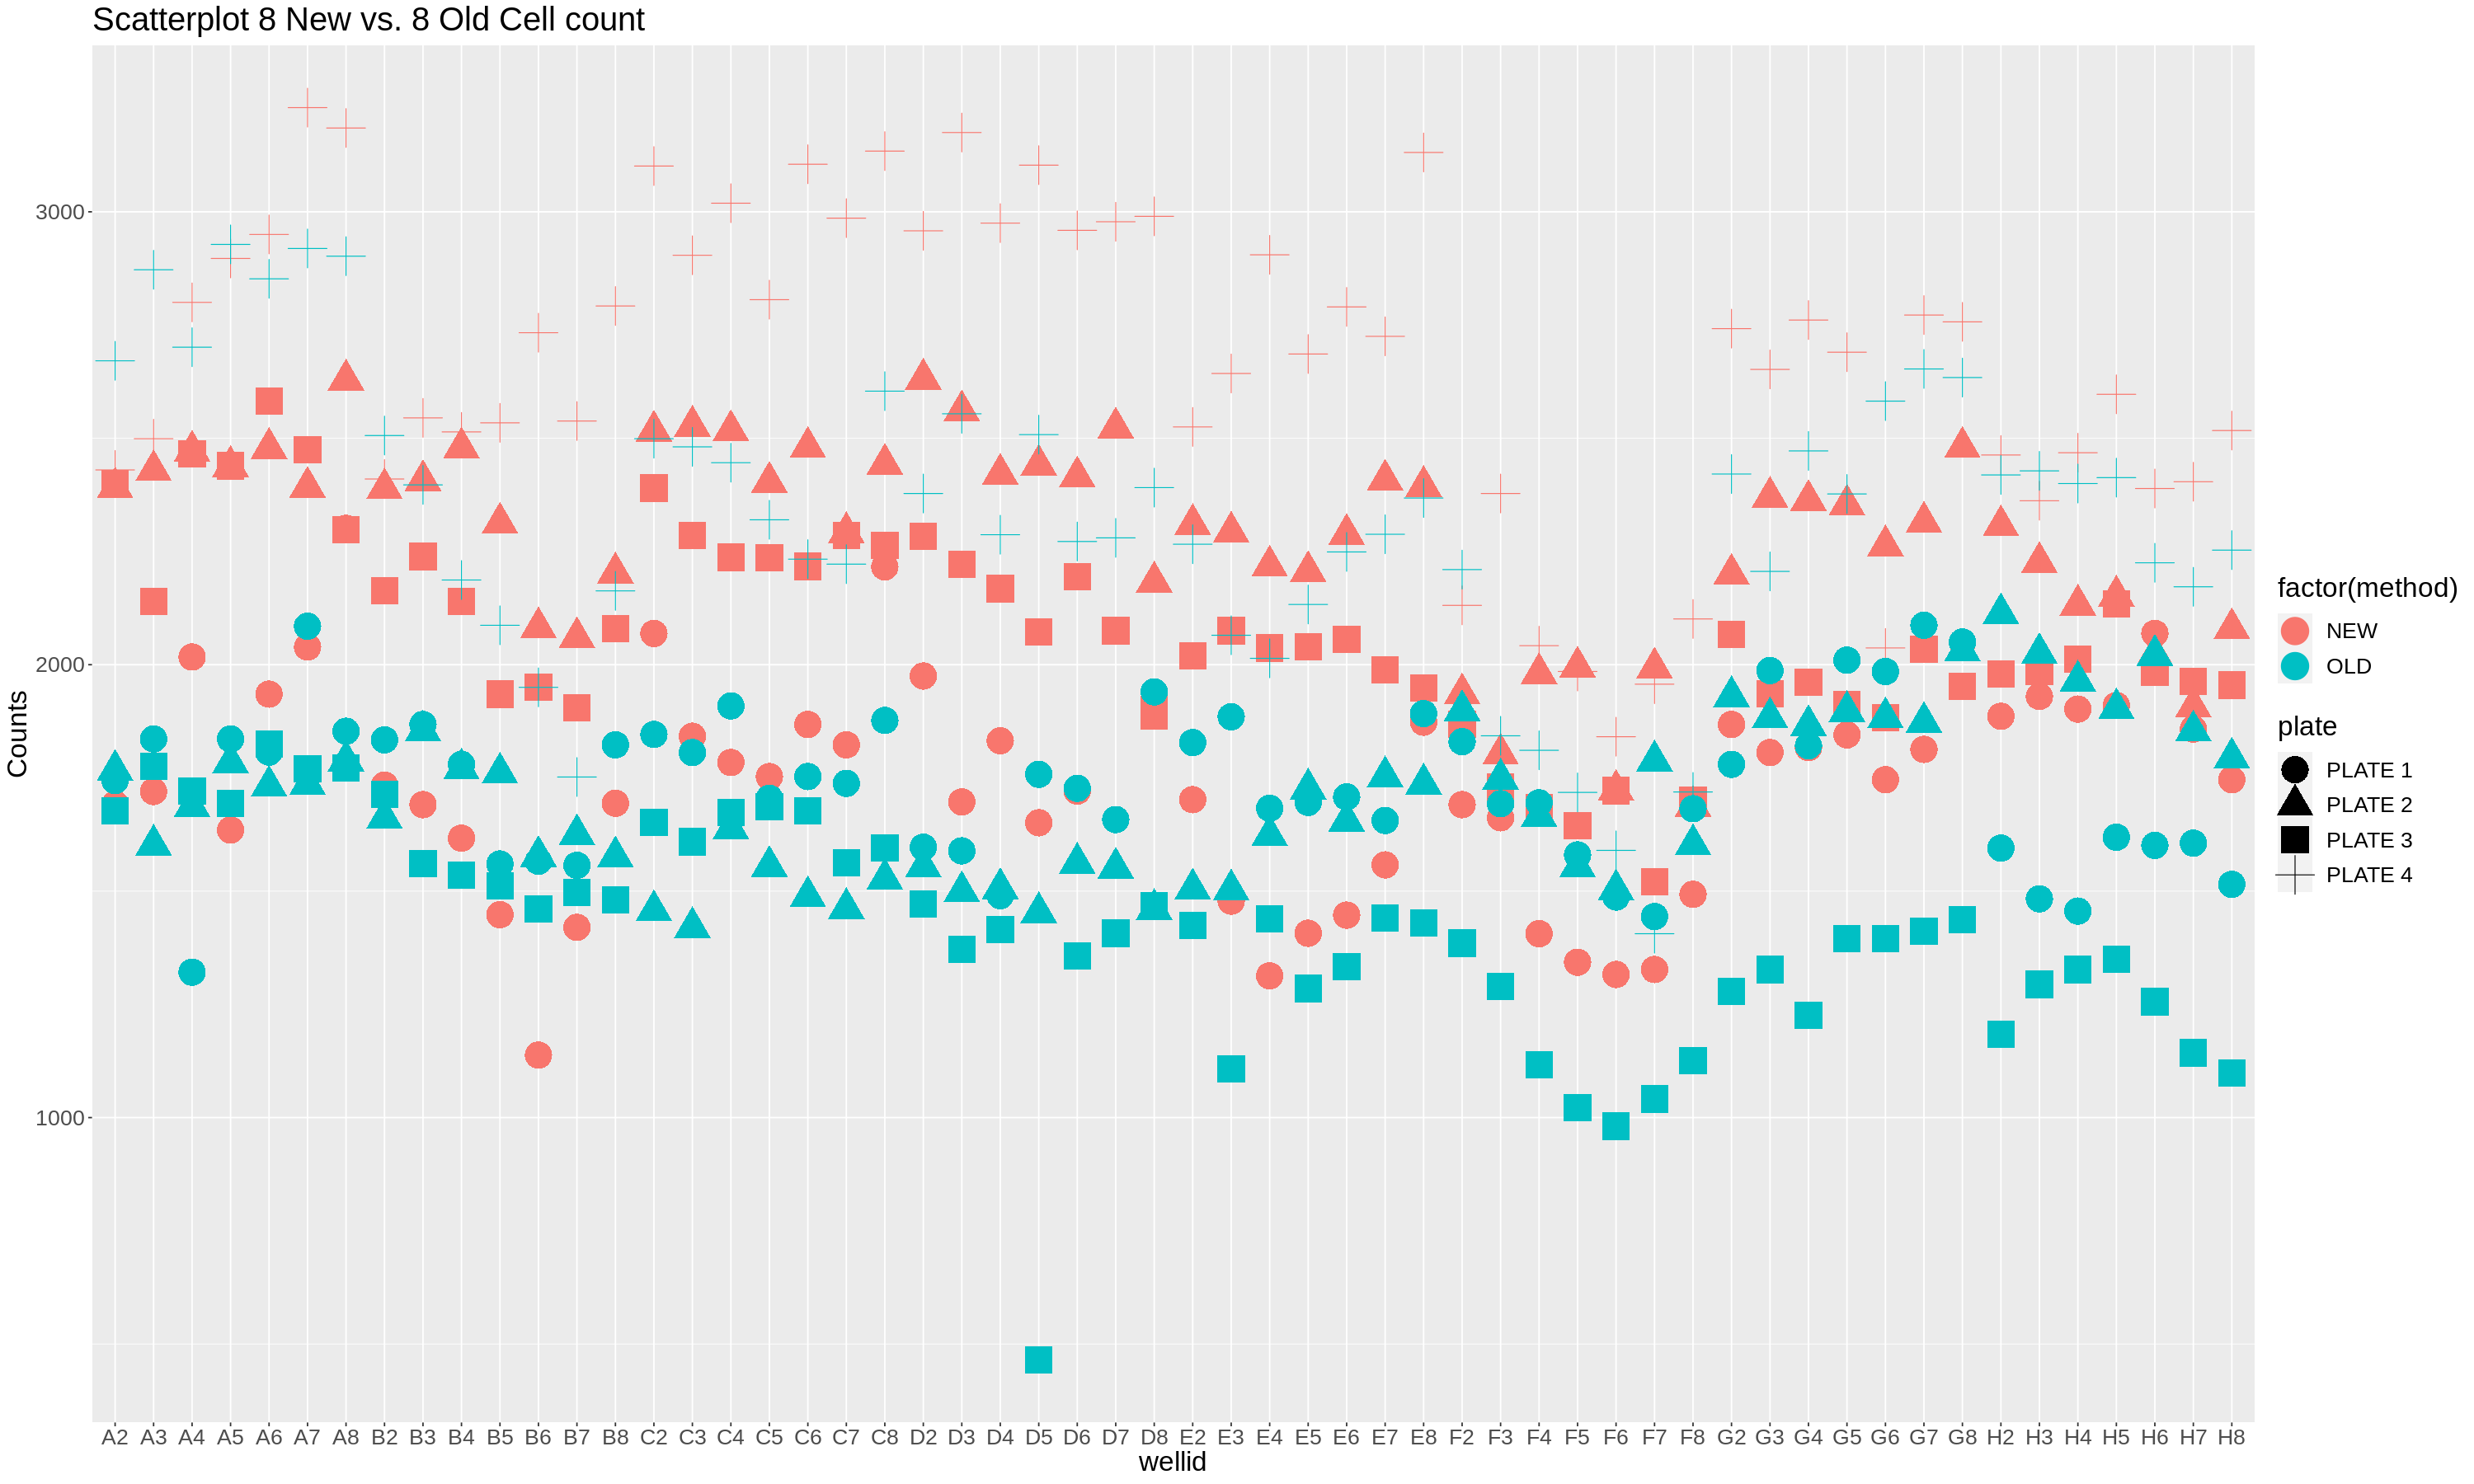

In [410]:
ggplot(dff, aes(x=wellid, y=Z) ) +
  geom_point(size = 9, aes(colour = factor(method), shape = plate)) + 
  ylab("Counts") +
  ggtitle("Scatterplot 8 New vs. 8 Old Cell count") +
  theme(text = element_text(size=20))

#### Summary statistics for new 8 

#### USE MFI AS SAMPLE DATA

In [4]:
rows <- list(c("A", "E"), c("B", "F"), c("C", "G"), c("D", "H"))

dfn_si_ls <- list()
dfo_si_ls <- list()

for (i in seq(4)) {
    dir = paste0(parentdir, "8v8_redo_plate", i)
    fi = list.files(dir)
    
    mtd = "NEW"
    select_fi = fi[grepl(paste0(mtd,"8_DF"), fi)]
    dfn_si_ls[[i]] <- read.csv(file.path(dir, select_fi))
    df.tmp <- dfn_si_ls[[i]] %>%
        na.omit() %>% select(SAMPLE_NAME, 
            MFI.,
            MFI..1,
            SI,
            SN) %>%
        filter(grepl("[A-H]0[2-9]|1[0-1]", SAMPLE_NAME)) %>%
        mutate_at(vars(MFI., MFI..1, SI, SN), funs(as.numeric)) %>%
        mutate(group = case_when(
           as.numeric(substr(SAMPLE_NAME,15,15)) == 2 ~ "COL2",
           as.numeric(substr(SAMPLE_NAME,15,15)) == 3 ~ "COL3",
           as.numeric(substr(SAMPLE_NAME,15,15)) == 4 ~ "COL4",
           as.numeric(substr(SAMPLE_NAME,15,15)) == 5 ~ "COL5",
           as.numeric(substr(SAMPLE_NAME,15,15)) == 6 ~ "COL6",
           as.numeric(substr(SAMPLE_NAME,15,15)) == 7 ~ "COL7",
           as.numeric(substr(SAMPLE_NAME,15,15)) == 8 ~ "COL8"
            ),
               row = case_when(
           substr(SAMPLE_NAME, 14,14) == "A" ~ "A-E",
           substr(SAMPLE_NAME, 14,14) == "B" ~ "B-F",
           substr(SAMPLE_NAME, 14,14) == "C" ~ "C-G",
           substr(SAMPLE_NAME, 14,14) == "D" ~ "D-H",
           substr(SAMPLE_NAME, 14,14) == "E" ~ "A-E",
           substr(SAMPLE_NAME, 14,14) == "F" ~ "B-F",
           substr(SAMPLE_NAME, 14,14) == "G" ~ "C-G",
           substr(SAMPLE_NAME, 14,14) == "H" ~ "D-H"
           ),
               subgroup = case_when(
           row == "A-E" & group == "COL2" ~ "A2-E2",
           row == "A-E" & group == "COL3" ~ "A3-E3",
           row == "A-E" & group == "COL4" ~ "A4-E4",
           row == "A-E" & group == "COL5" ~ "A5-E5",
           row == "A-E" & group == "COL6" ~ "A6-E6",
           row == "A-E" & group == "COL7" ~ "A7-E7",
           row == "A-E" & group == "COL8" ~ "A8-E8",
           row == "B-F" & group == "COL2" ~ "B2-F2",
           row == "B-F" & group == "COL3" ~ "B3-F3",
           row == "B-F" & group == "COL4" ~ "B4-F4",
           row == "B-F" & group == "COL5" ~ "B5-F5",
           row == "B-F" & group == "COL6" ~ "B6-F6",
           row == "B-F" & group == "COL7" ~ "B7-F7",
           row == "B-F" & group == "COL8" ~ "B8-F8",
           row == "C-G" & group == "COL2" ~ "C2-G2",
           row == "C-G" & group == "COL3" ~ "C3-G3",
           row == "C-G" & group == "COL4" ~ "C4-G4",
           row == "C-G" & group == "COL5" ~ "C5-G5",
           row == "C-G" & group == "COL6" ~ "C6-G6",
           row == "C-G" & group == "COL7" ~ "C7-G7",
           row == "C-G" & group == "COL8" ~ "C8-G8",
           row == "D-H" & group == "COL2" ~ "D2-H2",
           row == "D-H" & group == "COL3" ~ "D3-H3",
           row == "D-H" & group == "COL4" ~ "D4-H4",
           row == "D-H" & group == "COL5" ~ "D5-H5",
           row == "D-H" & group == "COL6" ~ "D6-H6",
           row == "D-H" & group == "COL7" ~ "D7-H7",
           row == "D-H" & group == "COL8" ~ "D8-H8"
           ),
           method = mtd,
           plate = paste('PLATE', i))
    
        mtd = "OLD"
        select_fi = fi[grepl(paste0(mtd,"8_DF"), fi)]
        dfo_si_ls[[i]] <- read.csv(file.path(dir, select_fi))
        dfo_si_ls[[i]] <- rbind(df.tmp, dfo_si_ls[[i]] %>% 
            na.omit() %>% select(SAMPLE_NAME, 
                MFI.,
                MFI..1,
                SI,
                SN) %>%
            filter(grepl("[A-H]0[2-9]|1[0-1]", SAMPLE_NAME)) %>%
            mutate_at(vars(MFI., MFI..1, SI, SN), funs(as.numeric)) %>%
            mutate(group = case_when(
               as.numeric(substr(SAMPLE_NAME,15,15)) == 2 ~ "COL2",
               as.numeric(substr(SAMPLE_NAME,15,15)) == 3 ~ "COL3",
               as.numeric(substr(SAMPLE_NAME,15,15)) == 4 ~ "COL4",
               as.numeric(substr(SAMPLE_NAME,15,15)) == 5 ~ "COL5",
               as.numeric(substr(SAMPLE_NAME,15,15)) == 6 ~ "COL6",
               as.numeric(substr(SAMPLE_NAME,15,15)) == 7 ~ "COL7",
               as.numeric(substr(SAMPLE_NAME,15,15)) == 8 ~ "COL8"
                ),
                   row = case_when(
               substr(SAMPLE_NAME, 14,14) == "A" ~ "A-E",
               substr(SAMPLE_NAME, 14,14) == "B" ~ "B-F",
               substr(SAMPLE_NAME, 14,14) == "C" ~ "C-G",
               substr(SAMPLE_NAME, 14,14) == "D" ~ "D-H",
               substr(SAMPLE_NAME, 14,14) == "E" ~ "A-E",
               substr(SAMPLE_NAME, 14,14) == "F" ~ "B-F",
               substr(SAMPLE_NAME, 14,14) == "G" ~ "C-G",
               substr(SAMPLE_NAME, 14,14) == "H" ~ "D-H"
               ),
                   subgroup = case_when(
               row == "A-E" & group == "COL2" ~ "A2-E2",
               row == "A-E" & group == "COL3" ~ "A3-E3",
               row == "A-E" & group == "COL4" ~ "A4-E4",
               row == "A-E" & group == "COL5" ~ "A5-E5",
               row == "A-E" & group == "COL6" ~ "A6-E6",
               row == "A-E" & group == "COL7" ~ "A7-E7",
               row == "A-E" & group == "COL8" ~ "A8-E8",
               row == "B-F" & group == "COL2" ~ "B2-F2",
               row == "B-F" & group == "COL3" ~ "B3-F3",
               row == "B-F" & group == "COL4" ~ "B4-F4",
               row == "B-F" & group == "COL5" ~ "B5-F5",
               row == "B-F" & group == "COL6" ~ "B6-F6",
               row == "B-F" & group == "COL7" ~ "B7-F7",
               row == "B-F" & group == "COL8" ~ "B8-F8",
               row == "C-G" & group == "COL2" ~ "C2-G2",
               row == "C-G" & group == "COL3" ~ "C3-G3",
               row == "C-G" & group == "COL4" ~ "C4-G4",
               row == "C-G" & group == "COL5" ~ "C5-G5",
               row == "C-G" & group == "COL6" ~ "C6-G6",
               row == "C-G" & group == "COL7" ~ "C7-G7",
               row == "C-G" & group == "COL8" ~ "C8-G8",
               row == "D-H" & group == "COL2" ~ "D2-H2",
               row == "D-H" & group == "COL3" ~ "D3-H3",
               row == "D-H" & group == "COL4" ~ "D4-H4",
               row == "D-H" & group == "COL5" ~ "D5-H5",
               row == "D-H" & group == "COL6" ~ "D6-H6",
               row == "D-H" & group == "COL7" ~ "D7-H7",
               row == "D-H" & group == "COL8" ~ "D8-H8"
               ),
               method = mtd,
               plate = paste('PLATE', i))
            ) # rbind
}

Warning message:
“`funs()` is deprecated as of dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


In [5]:
dfm <- do.call(rbind,dfo_si_ls)
head(dfm)

SAMPLE_NAME                 MFI.     MFI..1 SI       SN       group row
1 Specimen_001_A2_A02_003.fcs 33111.86  69.30 308.8967 477.8045 COL2  A-E
2 Specimen_001_A3_A03_004.fcs 34747.65  69.30 309.2416 501.4090 COL3  A-E
3 Specimen_001_A4_A04_005.fcs 34915.23  77.49 260.8396 450.5773 COL4  A-E
4 Specimen_001_A5_A05_006.fcs 36190.35  79.38 243.8216 455.9127 COL5  A-E
5 Specimen_001_A6_A06_007.fcs 36213.66  76.86 185.6048 471.1639 COL6  A-E
6 Specimen_001_A7_A07_008.fcs 36407.07 102.06 139.5327 356.7222 COL7  A-E
  subgroup method plate  
1 A2-E2    NEW    PLATE 1
2 A3-E3    NEW    PLATE 1
3 A4-E4    NEW    PLATE 1
4 A5-E5    NEW    PLATE 1
5 A6-E6    NEW    PLATE 1
6 A7-E7    NEW    PLATE 1

#### F test for normality
- The p values are big, meaning the variances do not change more from plate 1 to 3

#### Anderson-Darling test
- goodness of fit test that measures how well your data fit a specified distribution.
- H_0: The data follow a specified distribution

#### Shapiro test, bonett test, qq plot to show normality
- shapiro-wilk test - tell if a random sample comes from a normal distribution
- bonett test - measure of kurtosis for normally distributed data
- under the hypothesis of normality, data should have Geary's kurtosis equal to sqrt(2/pi) (0.7979)
- the kurtosis is near .7979, with p-value barely above 0.05, indicating it is slightly normal

In [111]:
head(dfm)

SAMPLE_NAME                 MFI.     MFI..1 SI       SN       group row
1 Specimen_001_A2_A02_003.fcs 33111.86  69.30 308.8967 477.8045 COL2  A-E
2 Specimen_001_A3_A03_004.fcs 34747.65  69.30 309.2416 501.4090 COL3  A-E
3 Specimen_001_A4_A04_005.fcs 34915.23  77.49 260.8396 450.5773 COL4  A-E
4 Specimen_001_A5_A05_006.fcs 36190.35  79.38 243.8216 455.9127 COL5  A-E
5 Specimen_001_A6_A06_007.fcs 36213.66  76.86 185.6048 471.1639 COL6  A-E
6 Specimen_001_A7_A07_008.fcs 36407.07 102.06 139.5327 356.7222 COL7  A-E
  subgroup method plate  
1 A2-E2    NEW    PLATE 1
2 A3-E3    NEW    PLATE 1
3 A4-E4    NEW    PLATE 1
4 A5-E5    NEW    PLATE 1
5 A6-E6    NEW    PLATE 1
6 A7-E7    NEW    PLATE 1

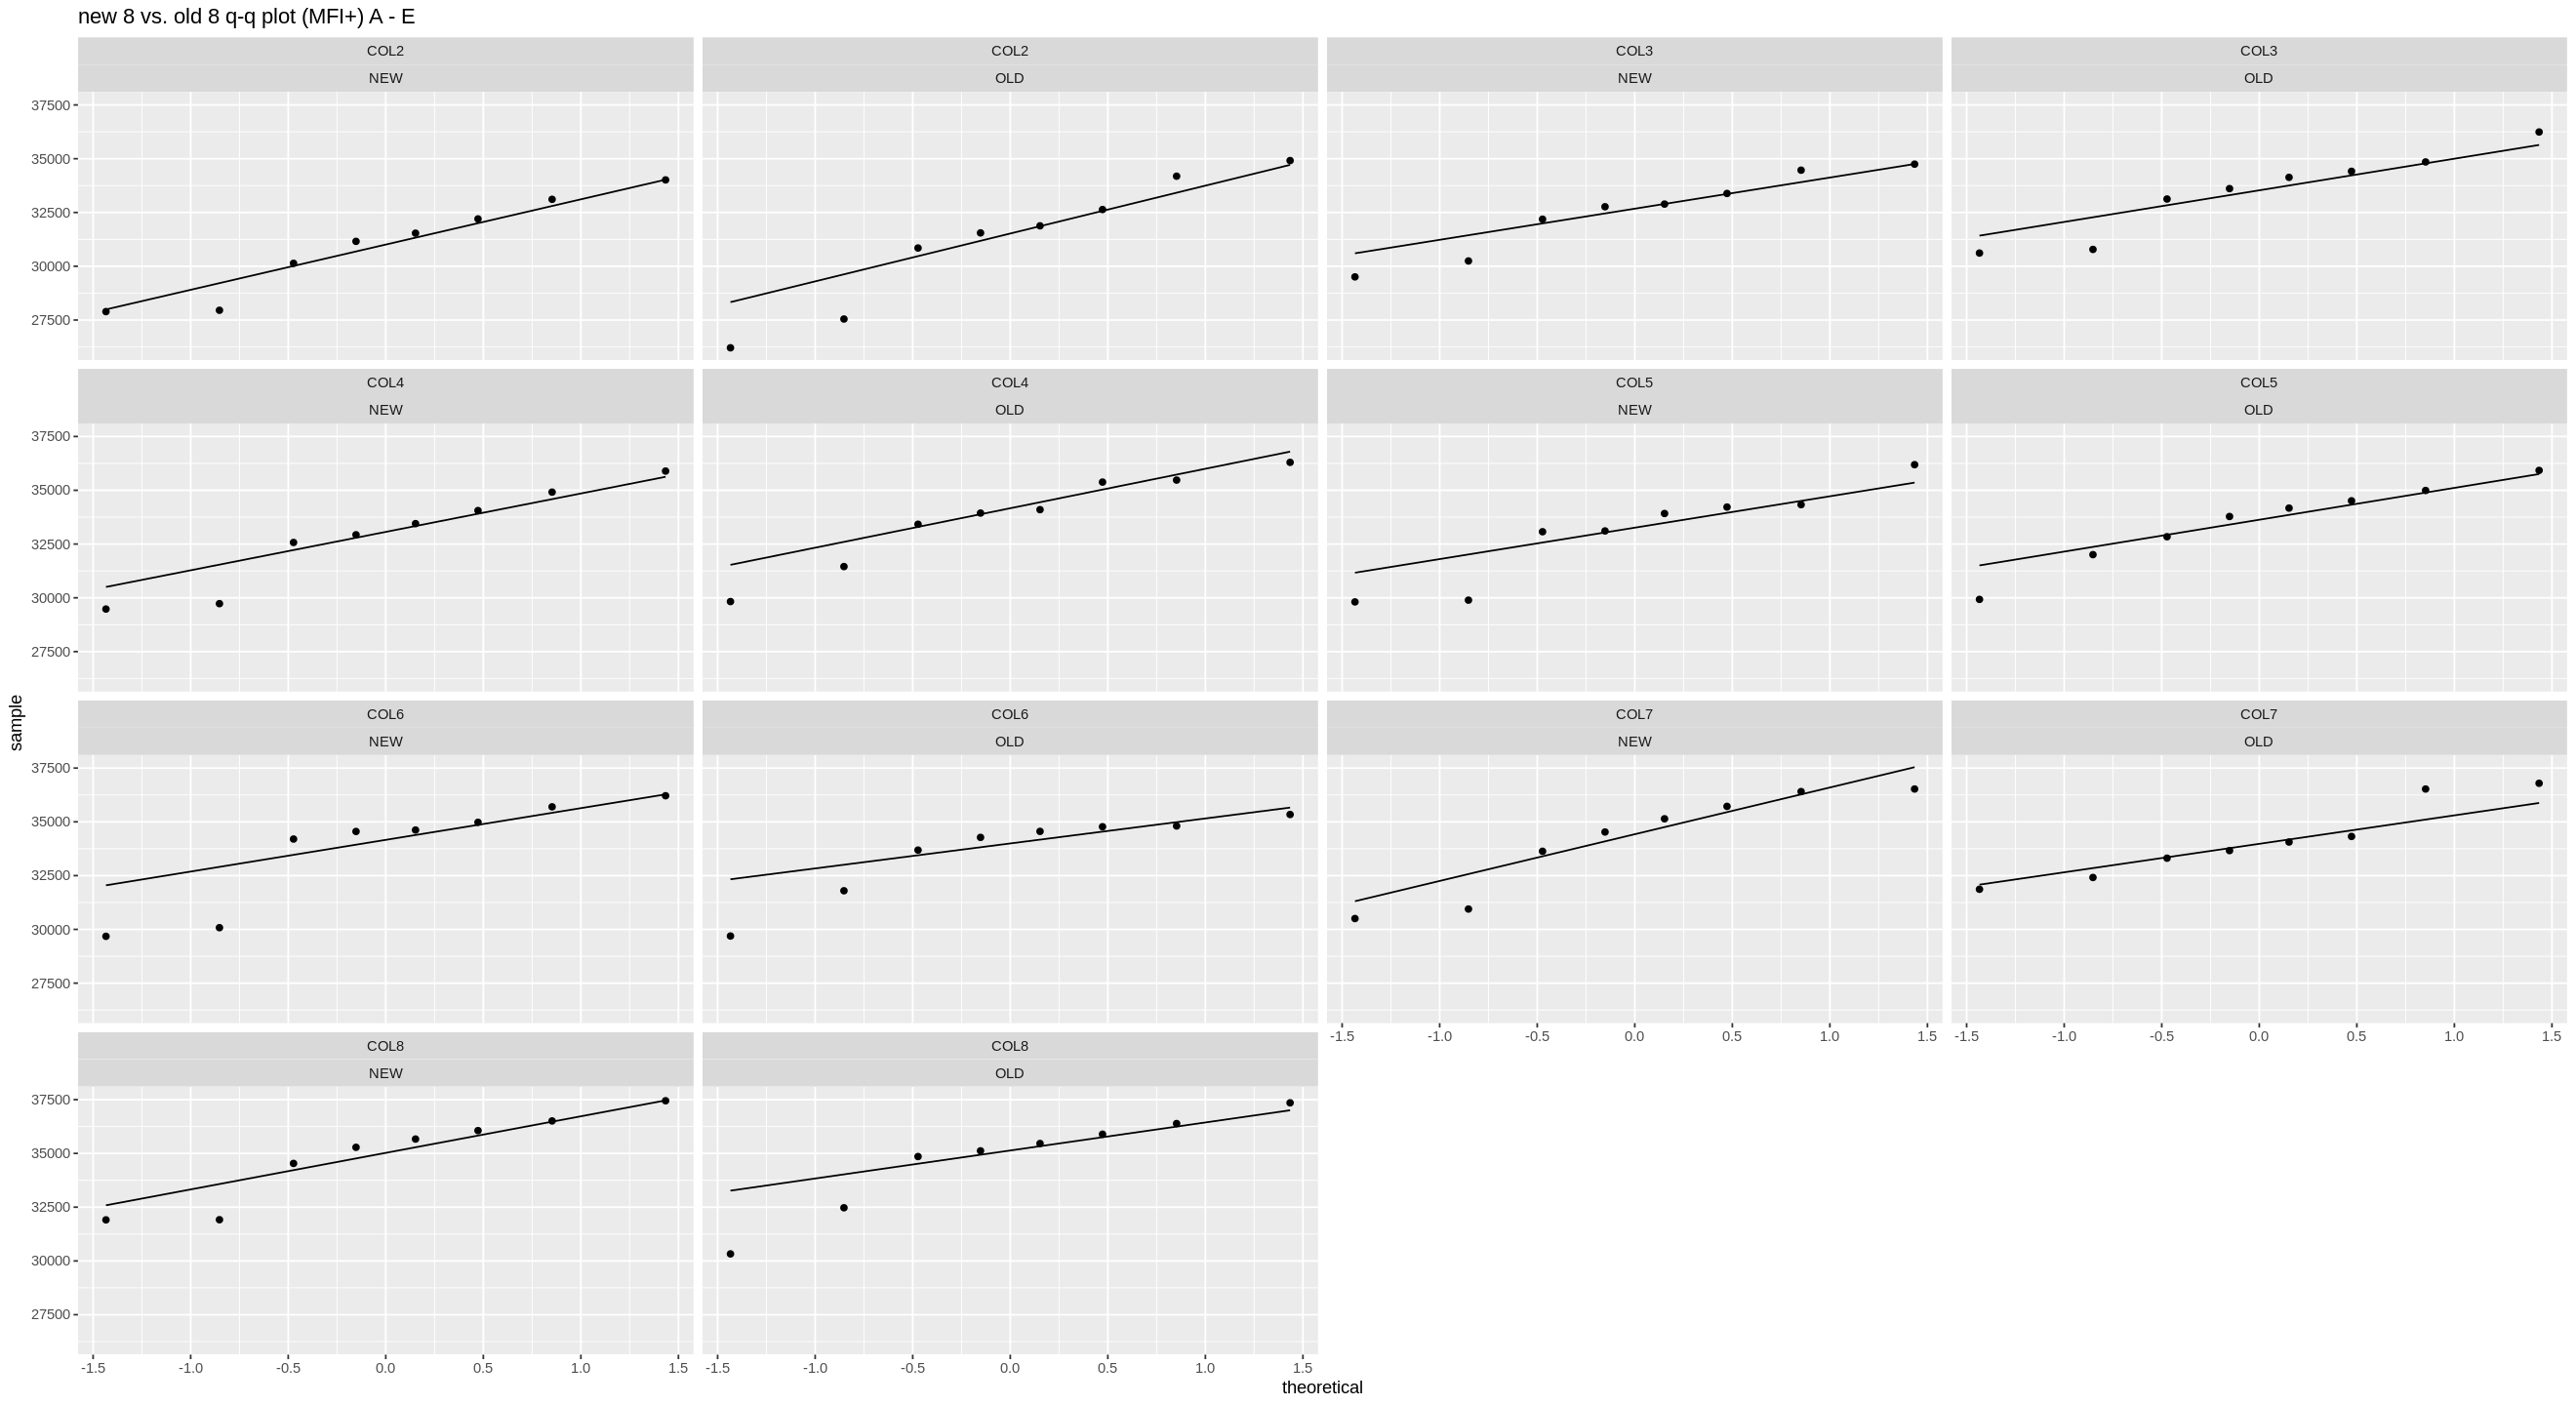

In [18]:
j = 1
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]
df.t <- dfm %>% filter(row == paste0(pat1, "-", pat2))
ggplot(df.t, aes(sample = MFI., group = group)) + 
                stat_qq() + stat_qq_line() +
                facet_wrap(group~ method) +
                ggtitle(paste("new 8 vs. old 8 q-q plot (MFI+)", pat1, "-", pat2))

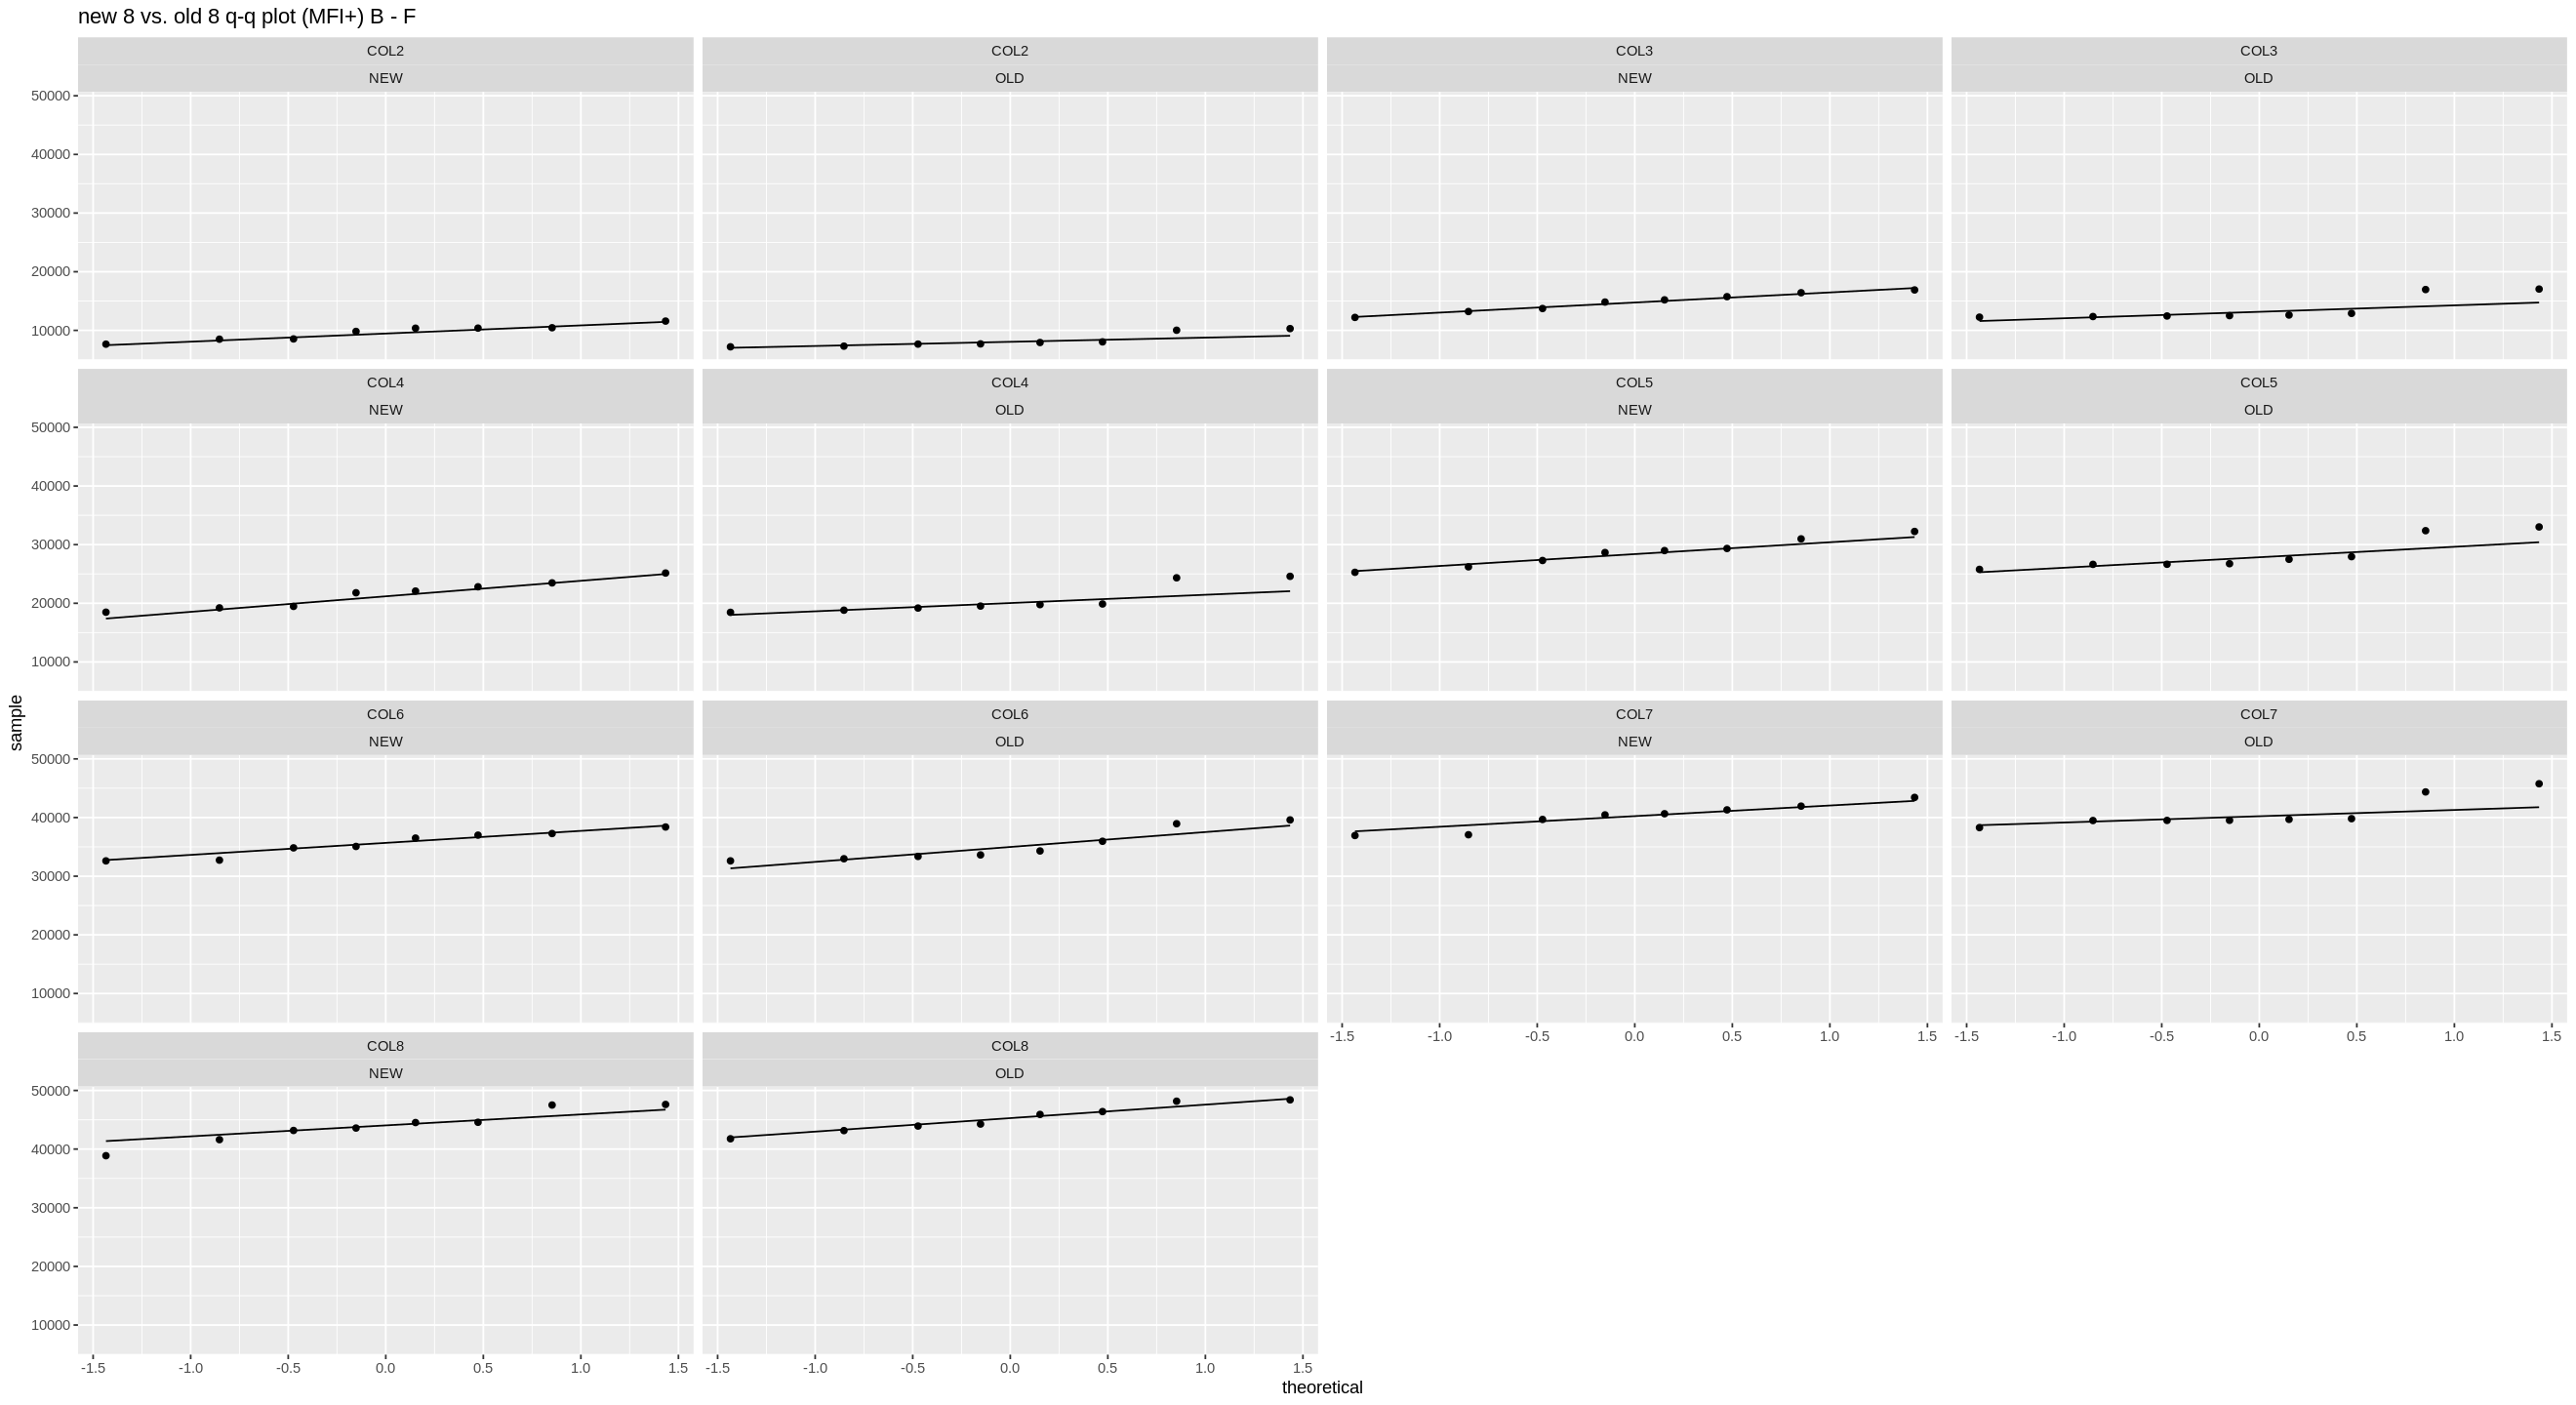

In [19]:
j = 2
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]
df.t <- dfm %>% filter(row == paste0(pat1, "-", pat2))
ggplot(df.t, aes(sample = MFI., group = group)) + 
                stat_qq() + stat_qq_line() +
                facet_wrap(group~ method) +
                ggtitle(paste("new 8 vs. old 8 q-q plot (MFI+)", pat1, "-", pat2))

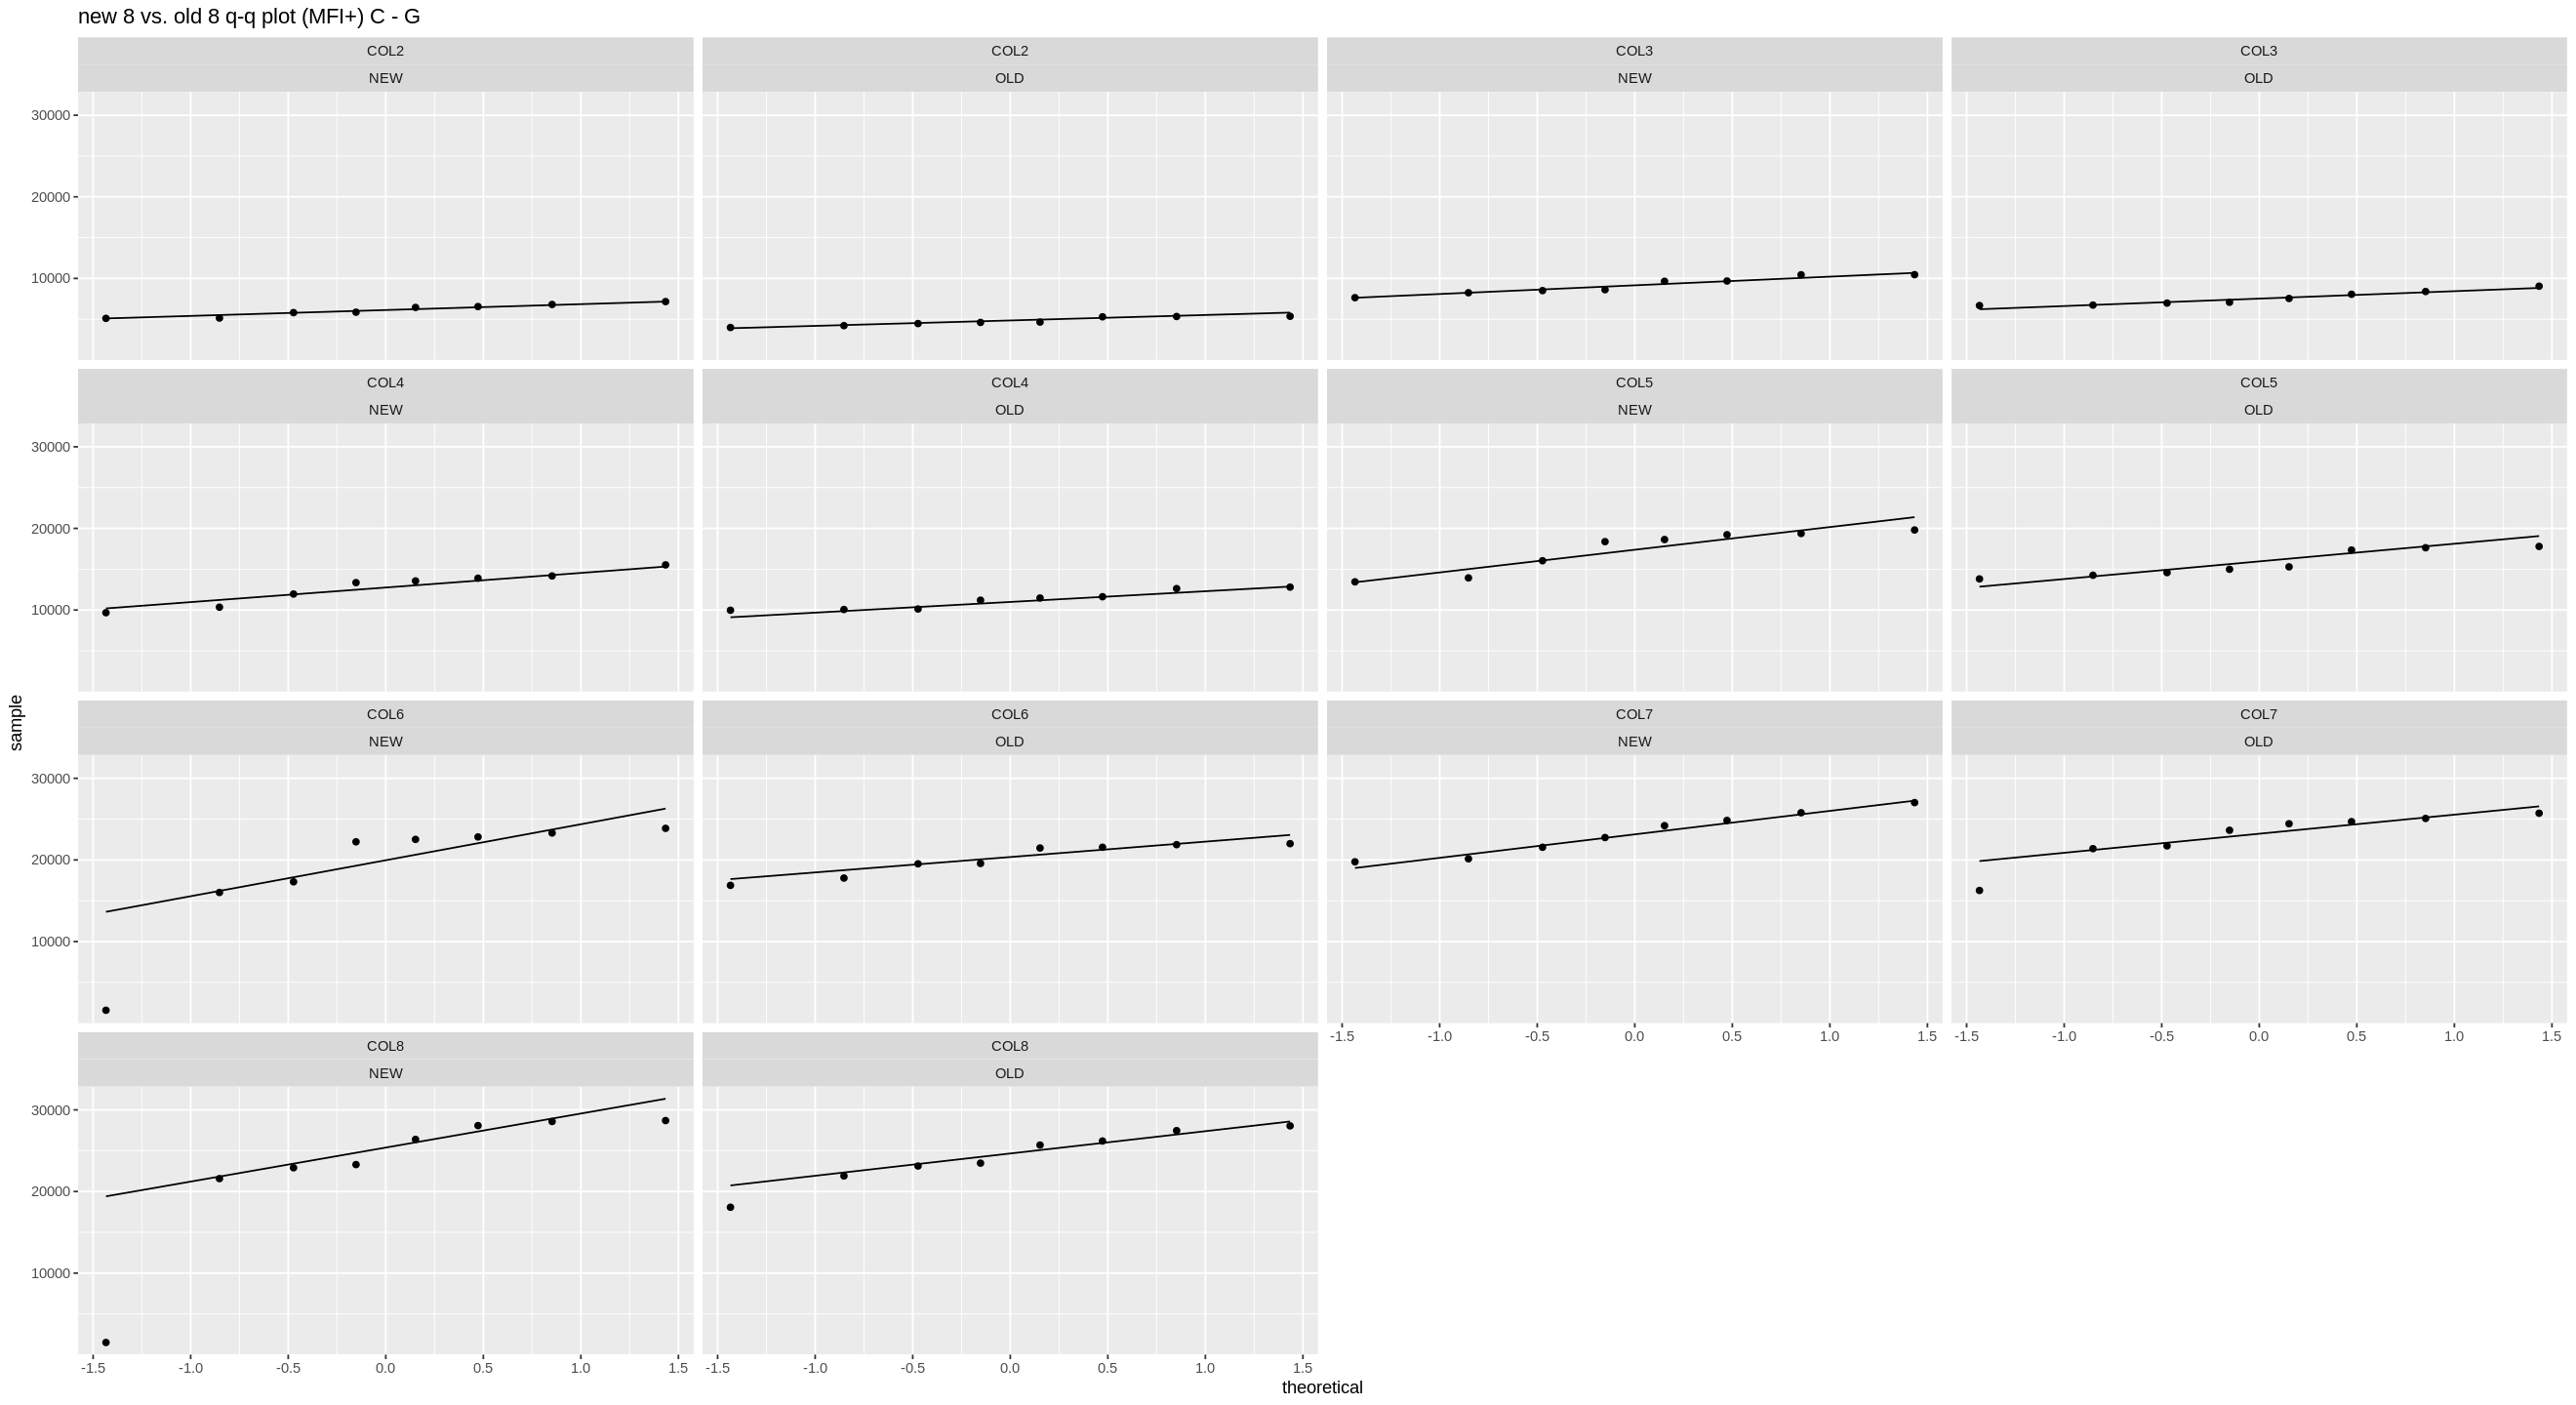

In [20]:
j = 3
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]
df.t <- dfm %>% filter(row == paste0(pat1, "-", pat2))
ggplot(df.t, aes(sample = MFI., group = group)) + 
                stat_qq() + stat_qq_line() +
                facet_wrap(group~ method) +
                ggtitle(paste("new 8 vs. old 8 q-q plot (MFI+)", pat1, "-", pat2))

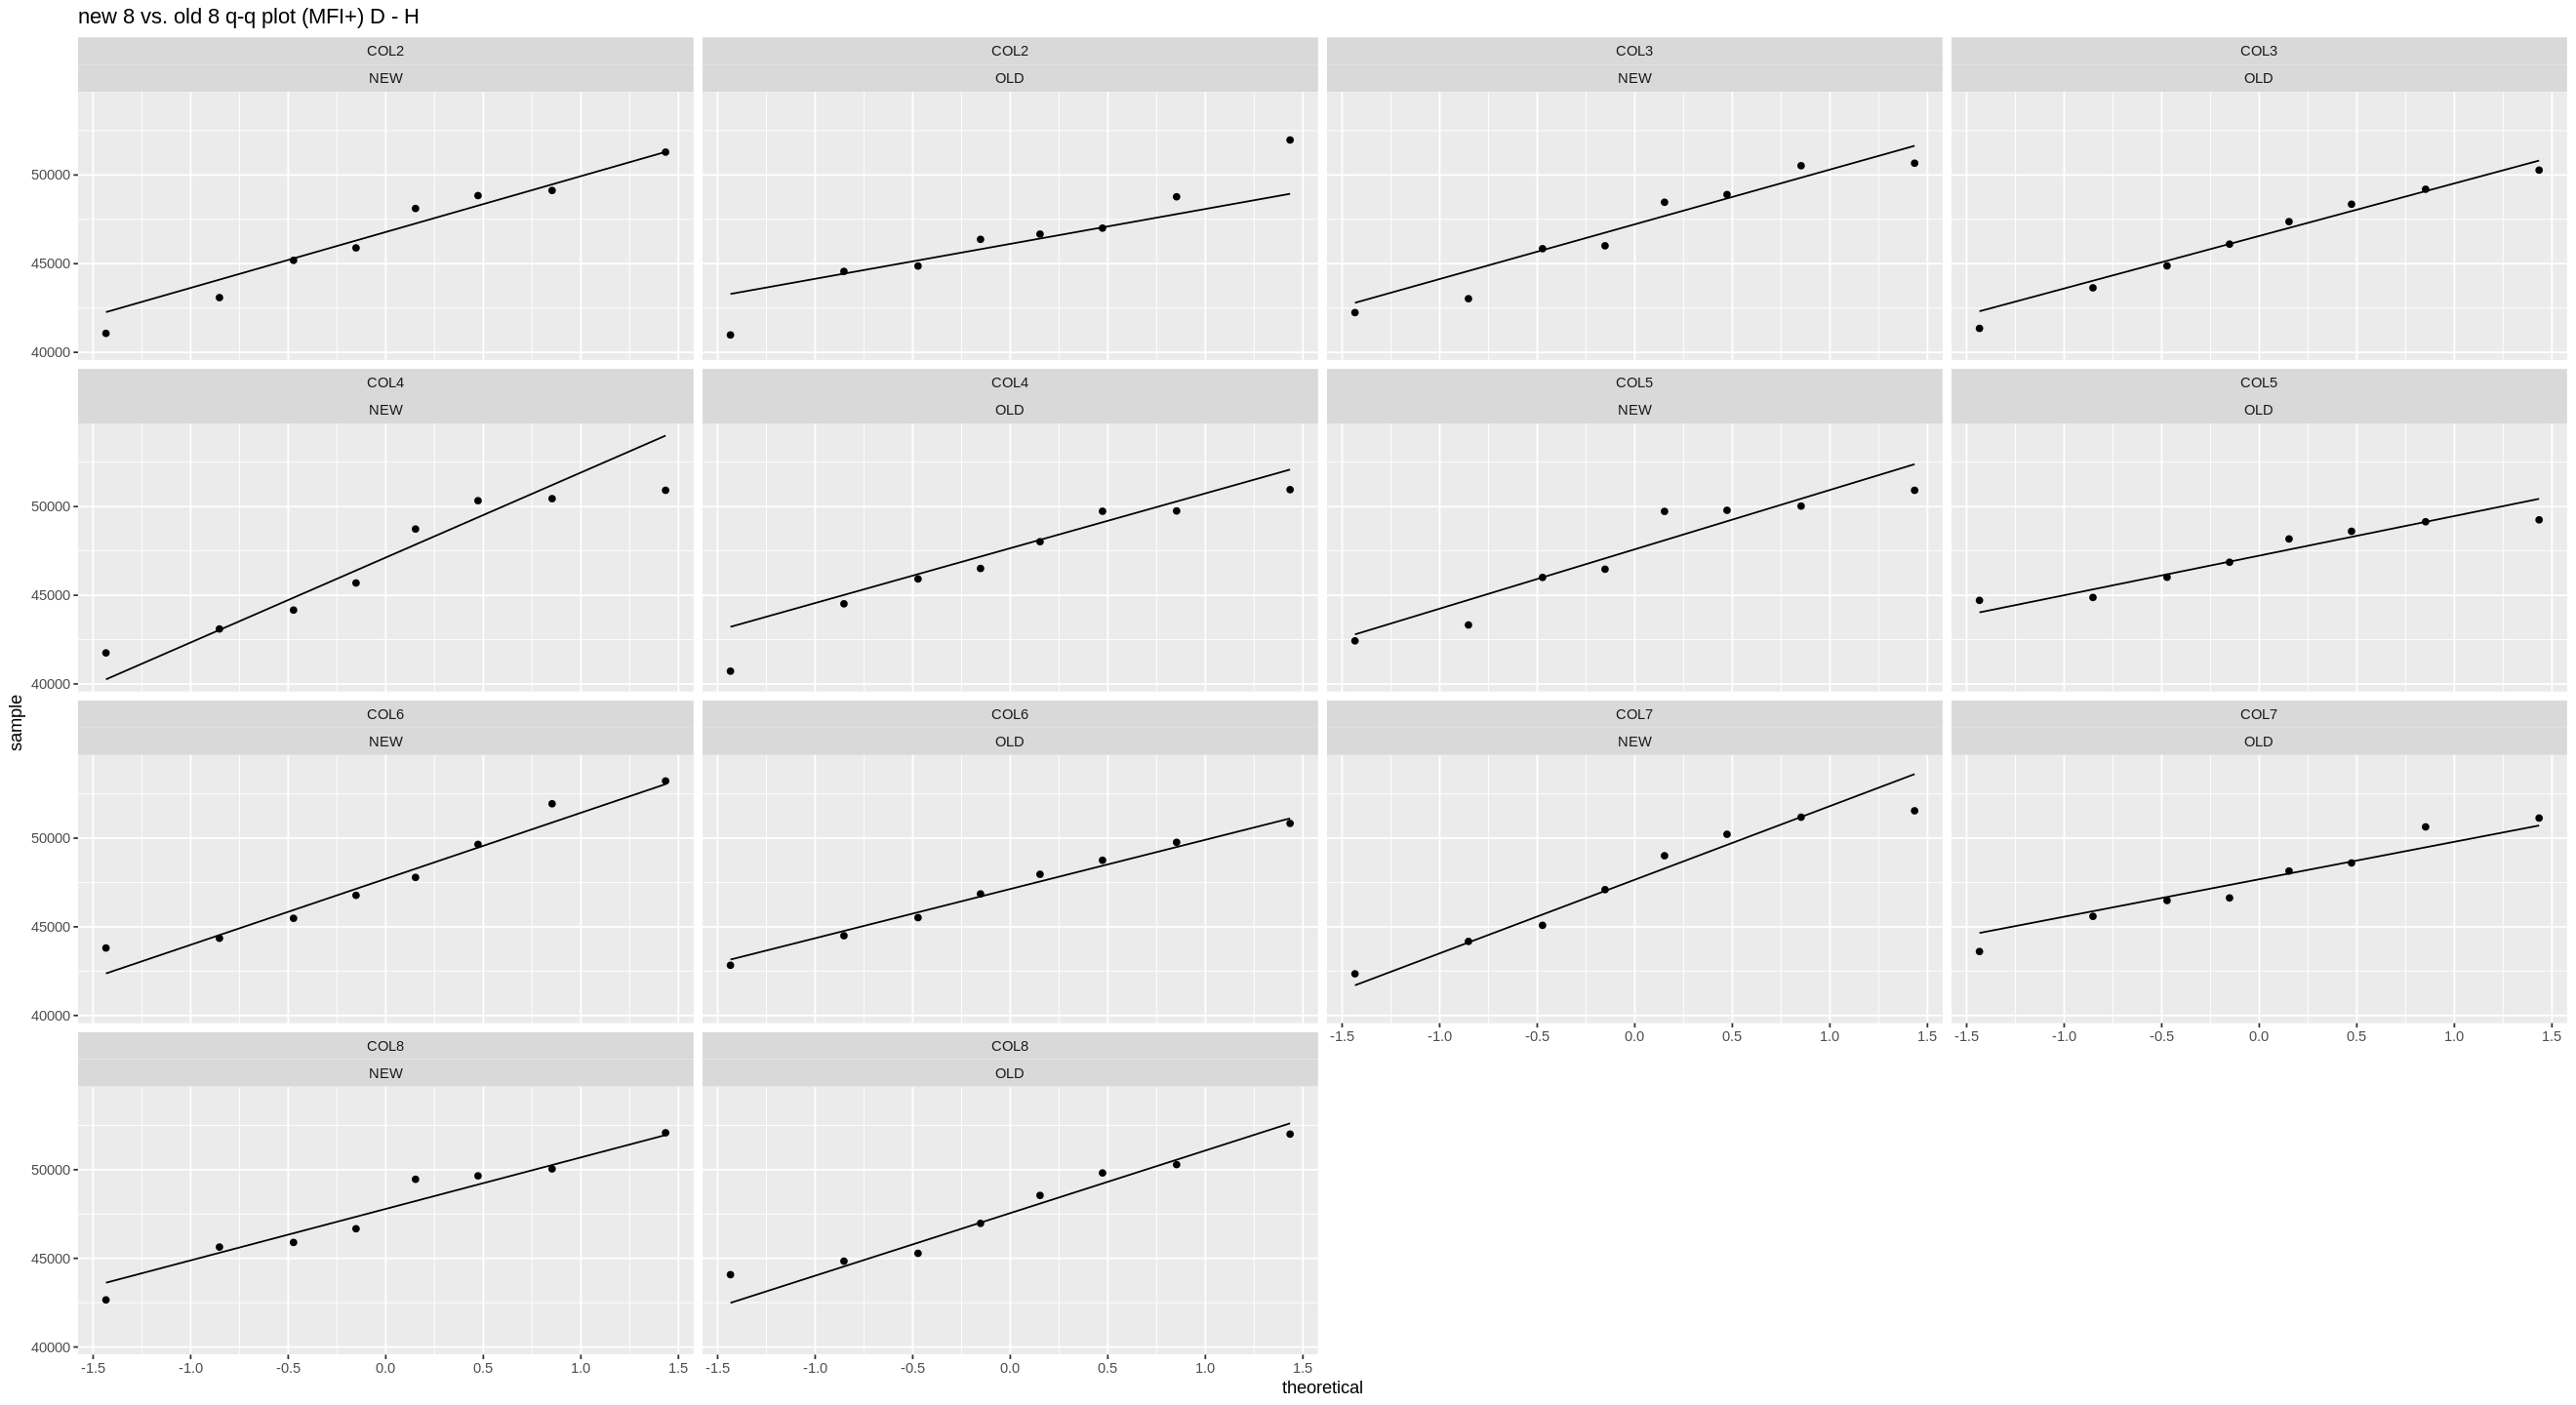

In [21]:
j = 4
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]
df.t <- dfm %>% filter(row == paste0(pat1, "-", pat2))
ggplot(df.t, aes(sample = MFI., group = group)) + 
                stat_qq() + stat_qq_line() +
                facet_wrap(group~ method) +
                ggtitle(paste("new 8 vs. old 8 q-q plot (MFI+)", pat1, "-", pat2))

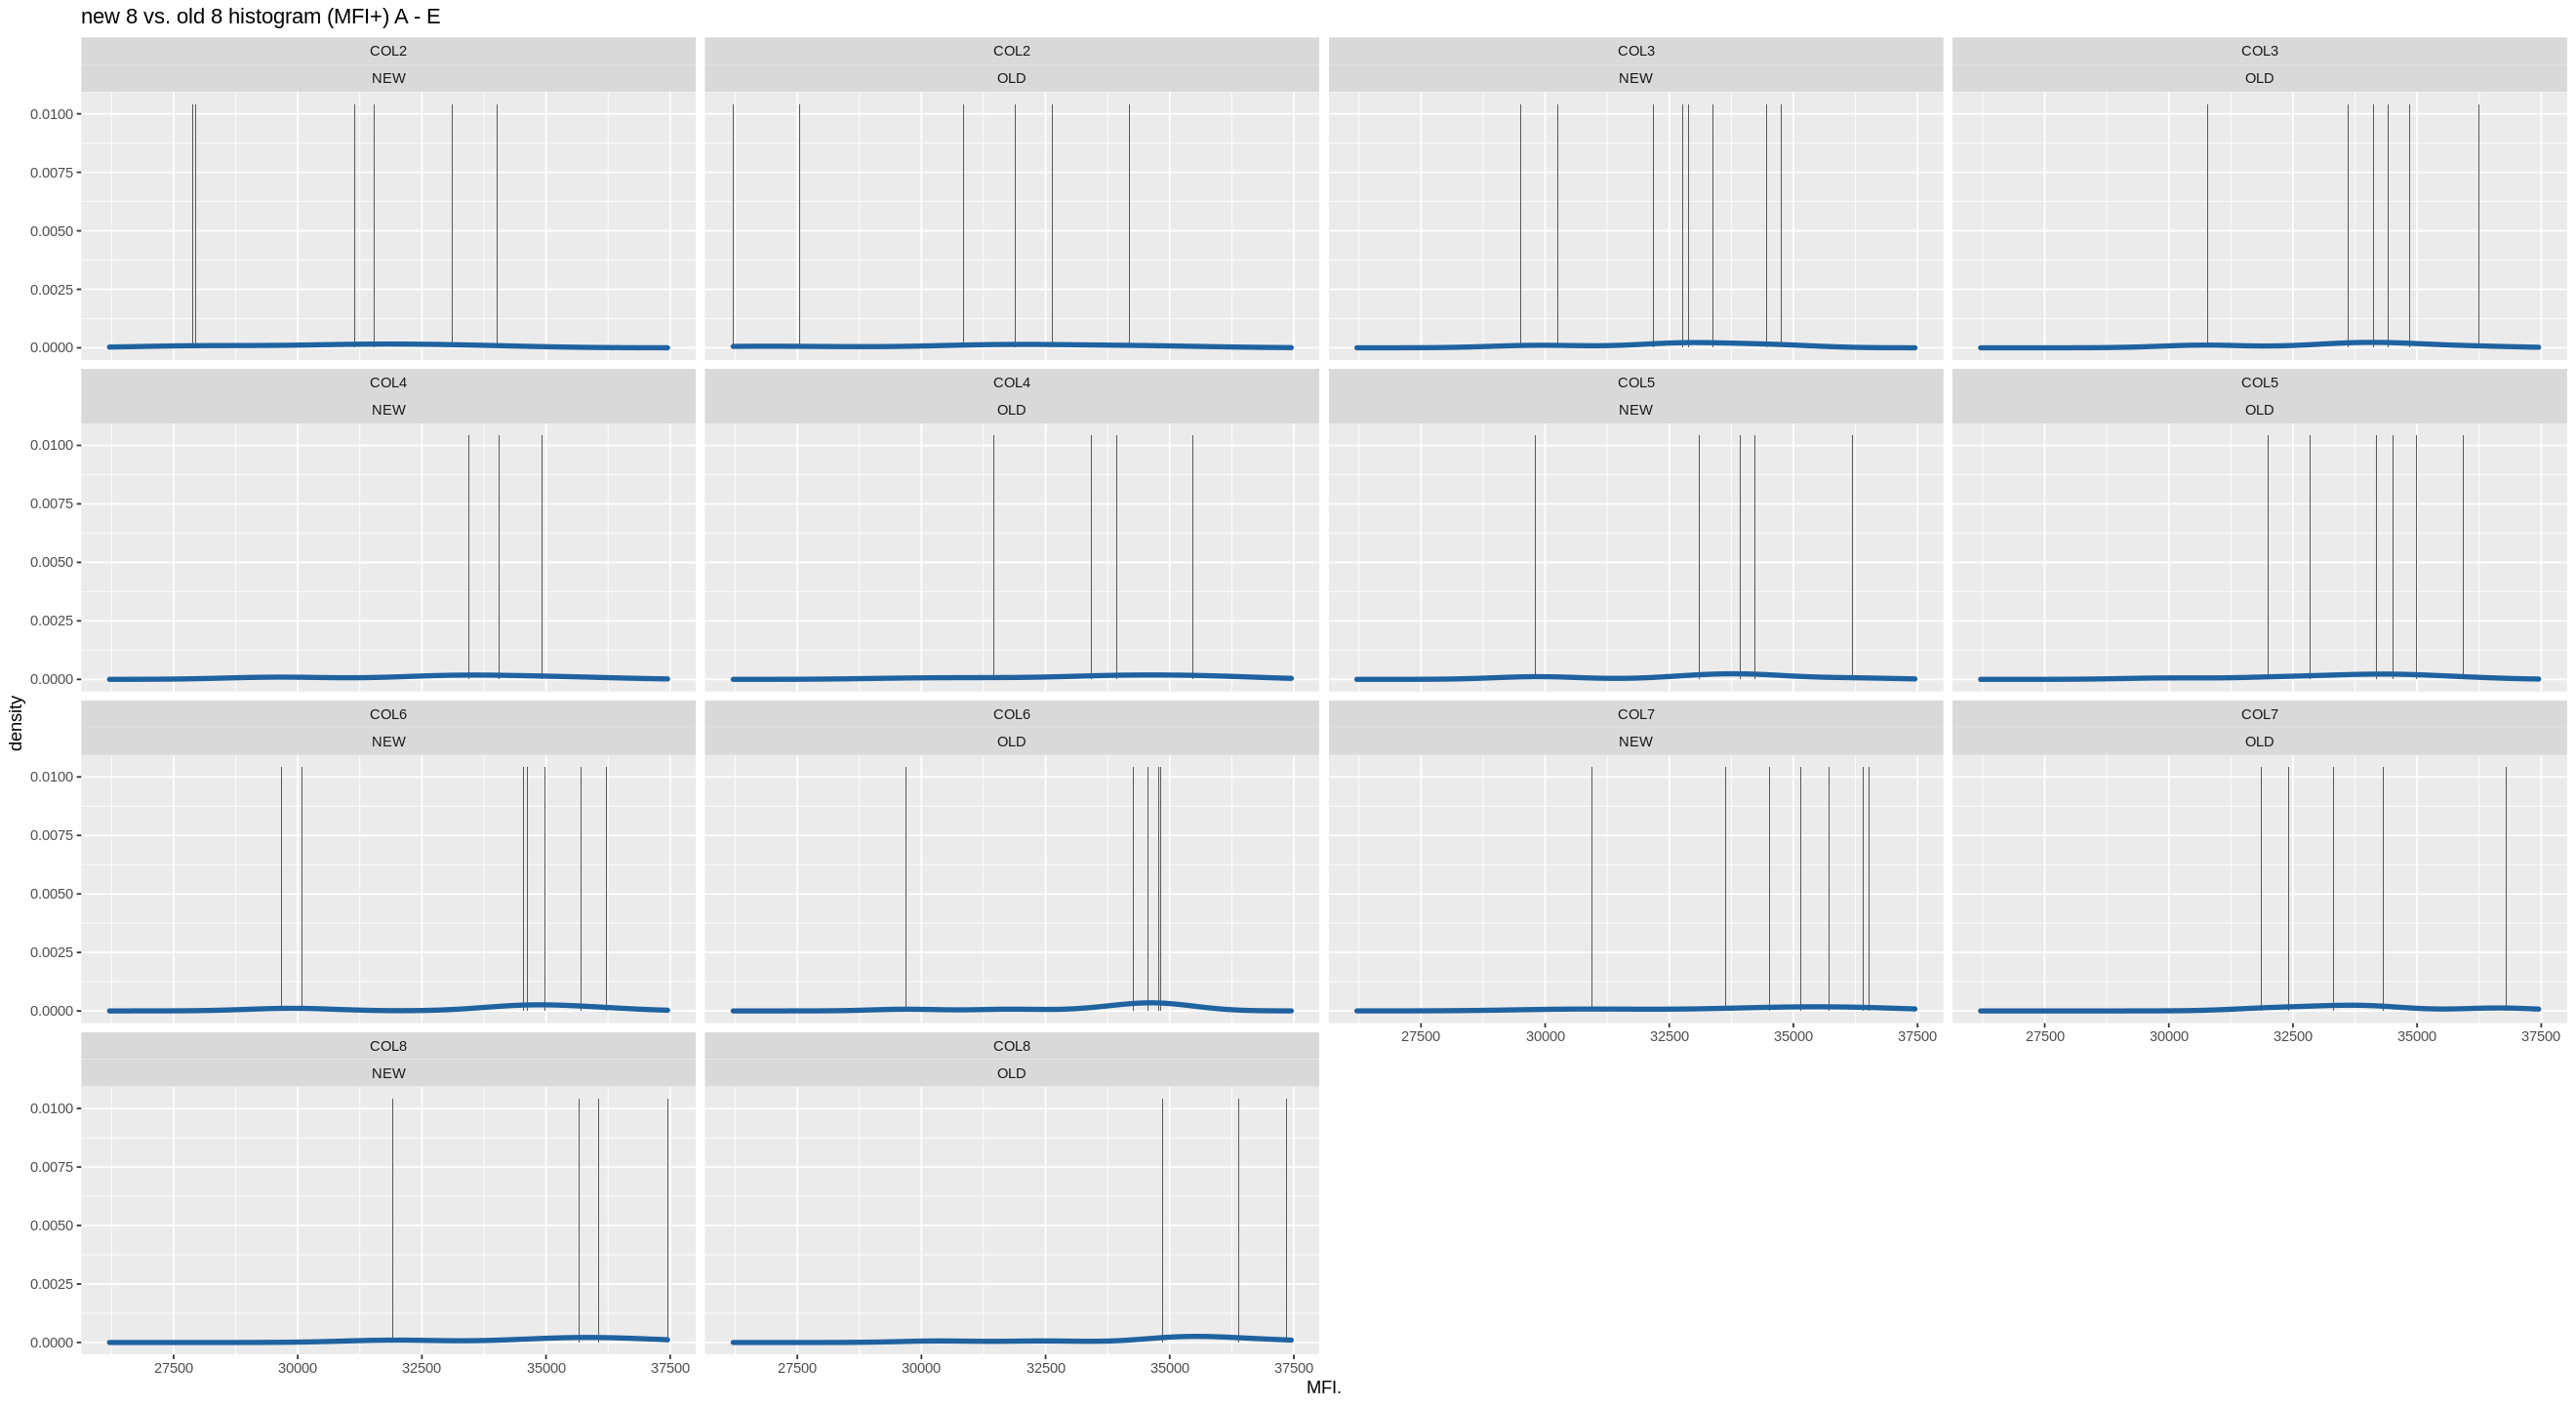

In [22]:
j = 1
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]
df.t <- dfm %>% filter(row == paste0(pat1, "-", pat2))
ggplot(data = df.t, aes(group = group, x = MFI.)) +
    geom_histogram(aes(y = ..density..), binwidth = 12, position = "identity") + 
    geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) + 
    facet_wrap(group~ method) +
    ggtitle(paste("new 8 vs. old 8 histogram (MFI+)", pat1, "-", pat2))

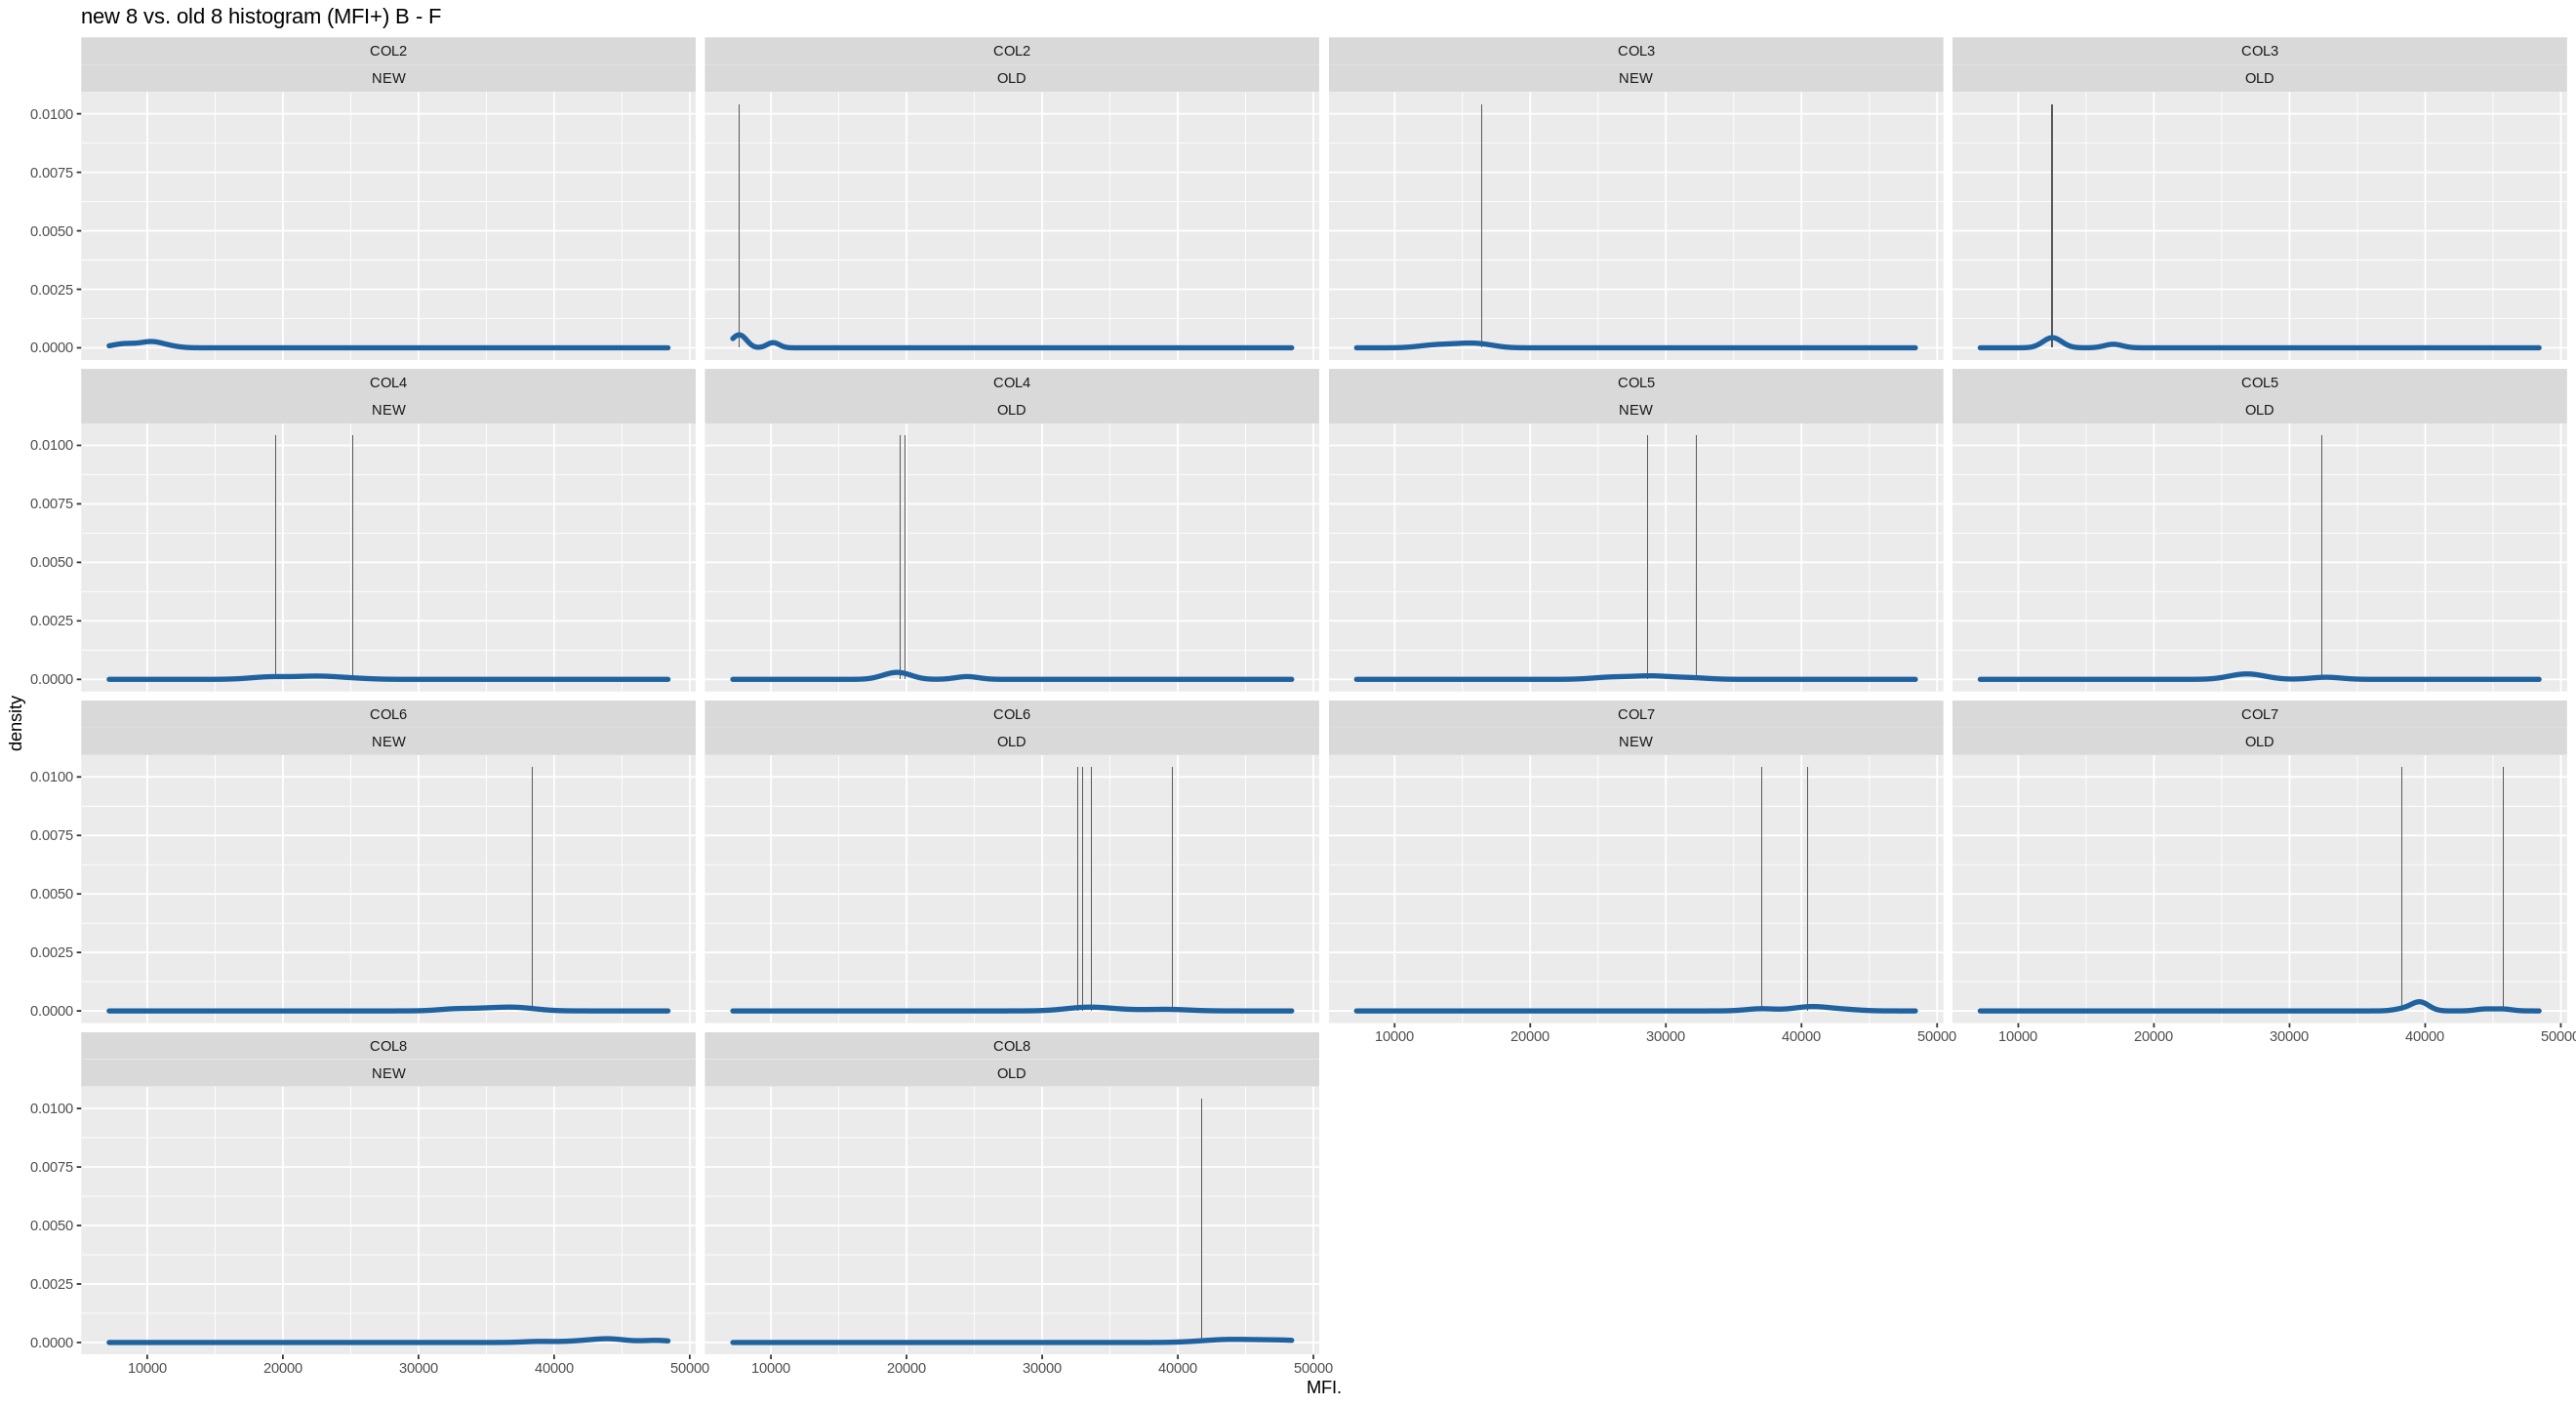

In [23]:
j = 2
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]
df.t <- dfm %>% filter(row == paste0(pat1, "-", pat2))
ggplot(data = df.t, aes(group = group, x = MFI.)) +
    geom_histogram(aes(y = ..density..), binwidth = 12, position = "identity") + 
    geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) + 
    facet_wrap(group~ method) +
    ggtitle(paste("new 8 vs. old 8 histogram (MFI+)", pat1, "-", pat2))

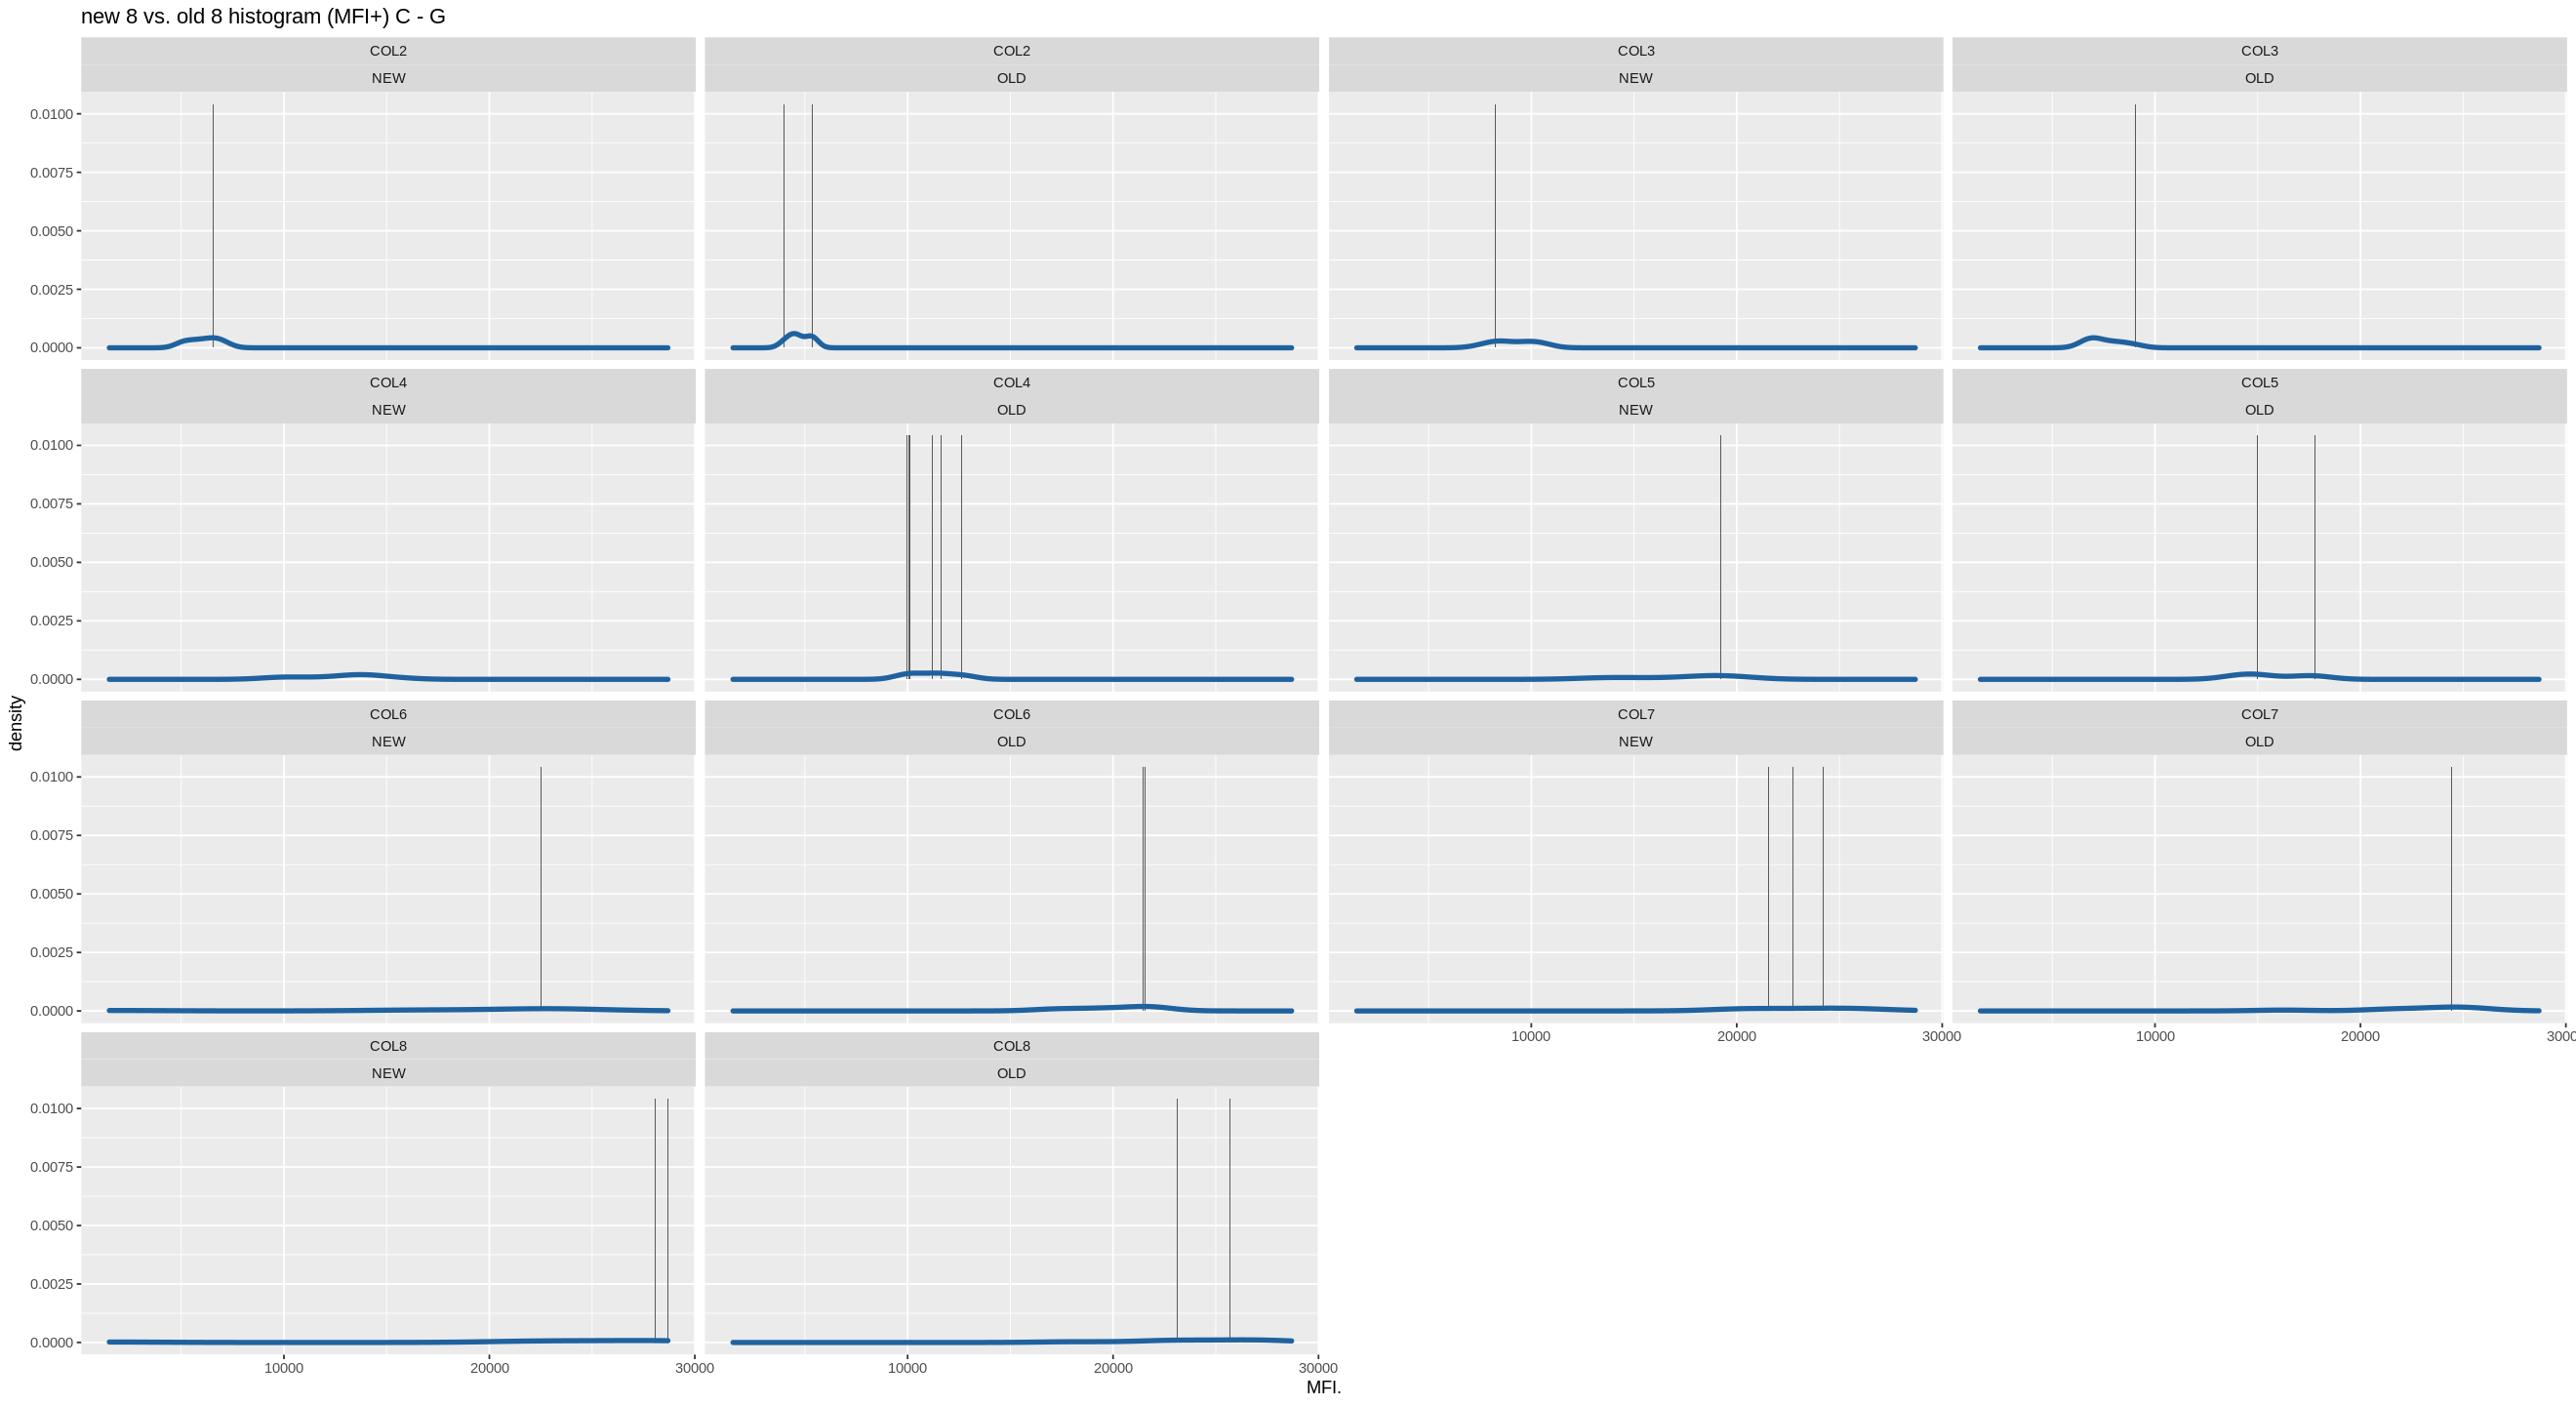

In [24]:
j = 3
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]
df.t <- dfm %>% filter(row == paste0(pat1, "-", pat2))
ggplot(data = df.t, aes(group = group, x = MFI.)) +
    geom_histogram(aes(y = ..density..), binwidth = 12, position = "identity") + 
    geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) + 
    facet_wrap(group~ method) +
    ggtitle(paste("new 8 vs. old 8 histogram (MFI+)", pat1, "-", pat2))

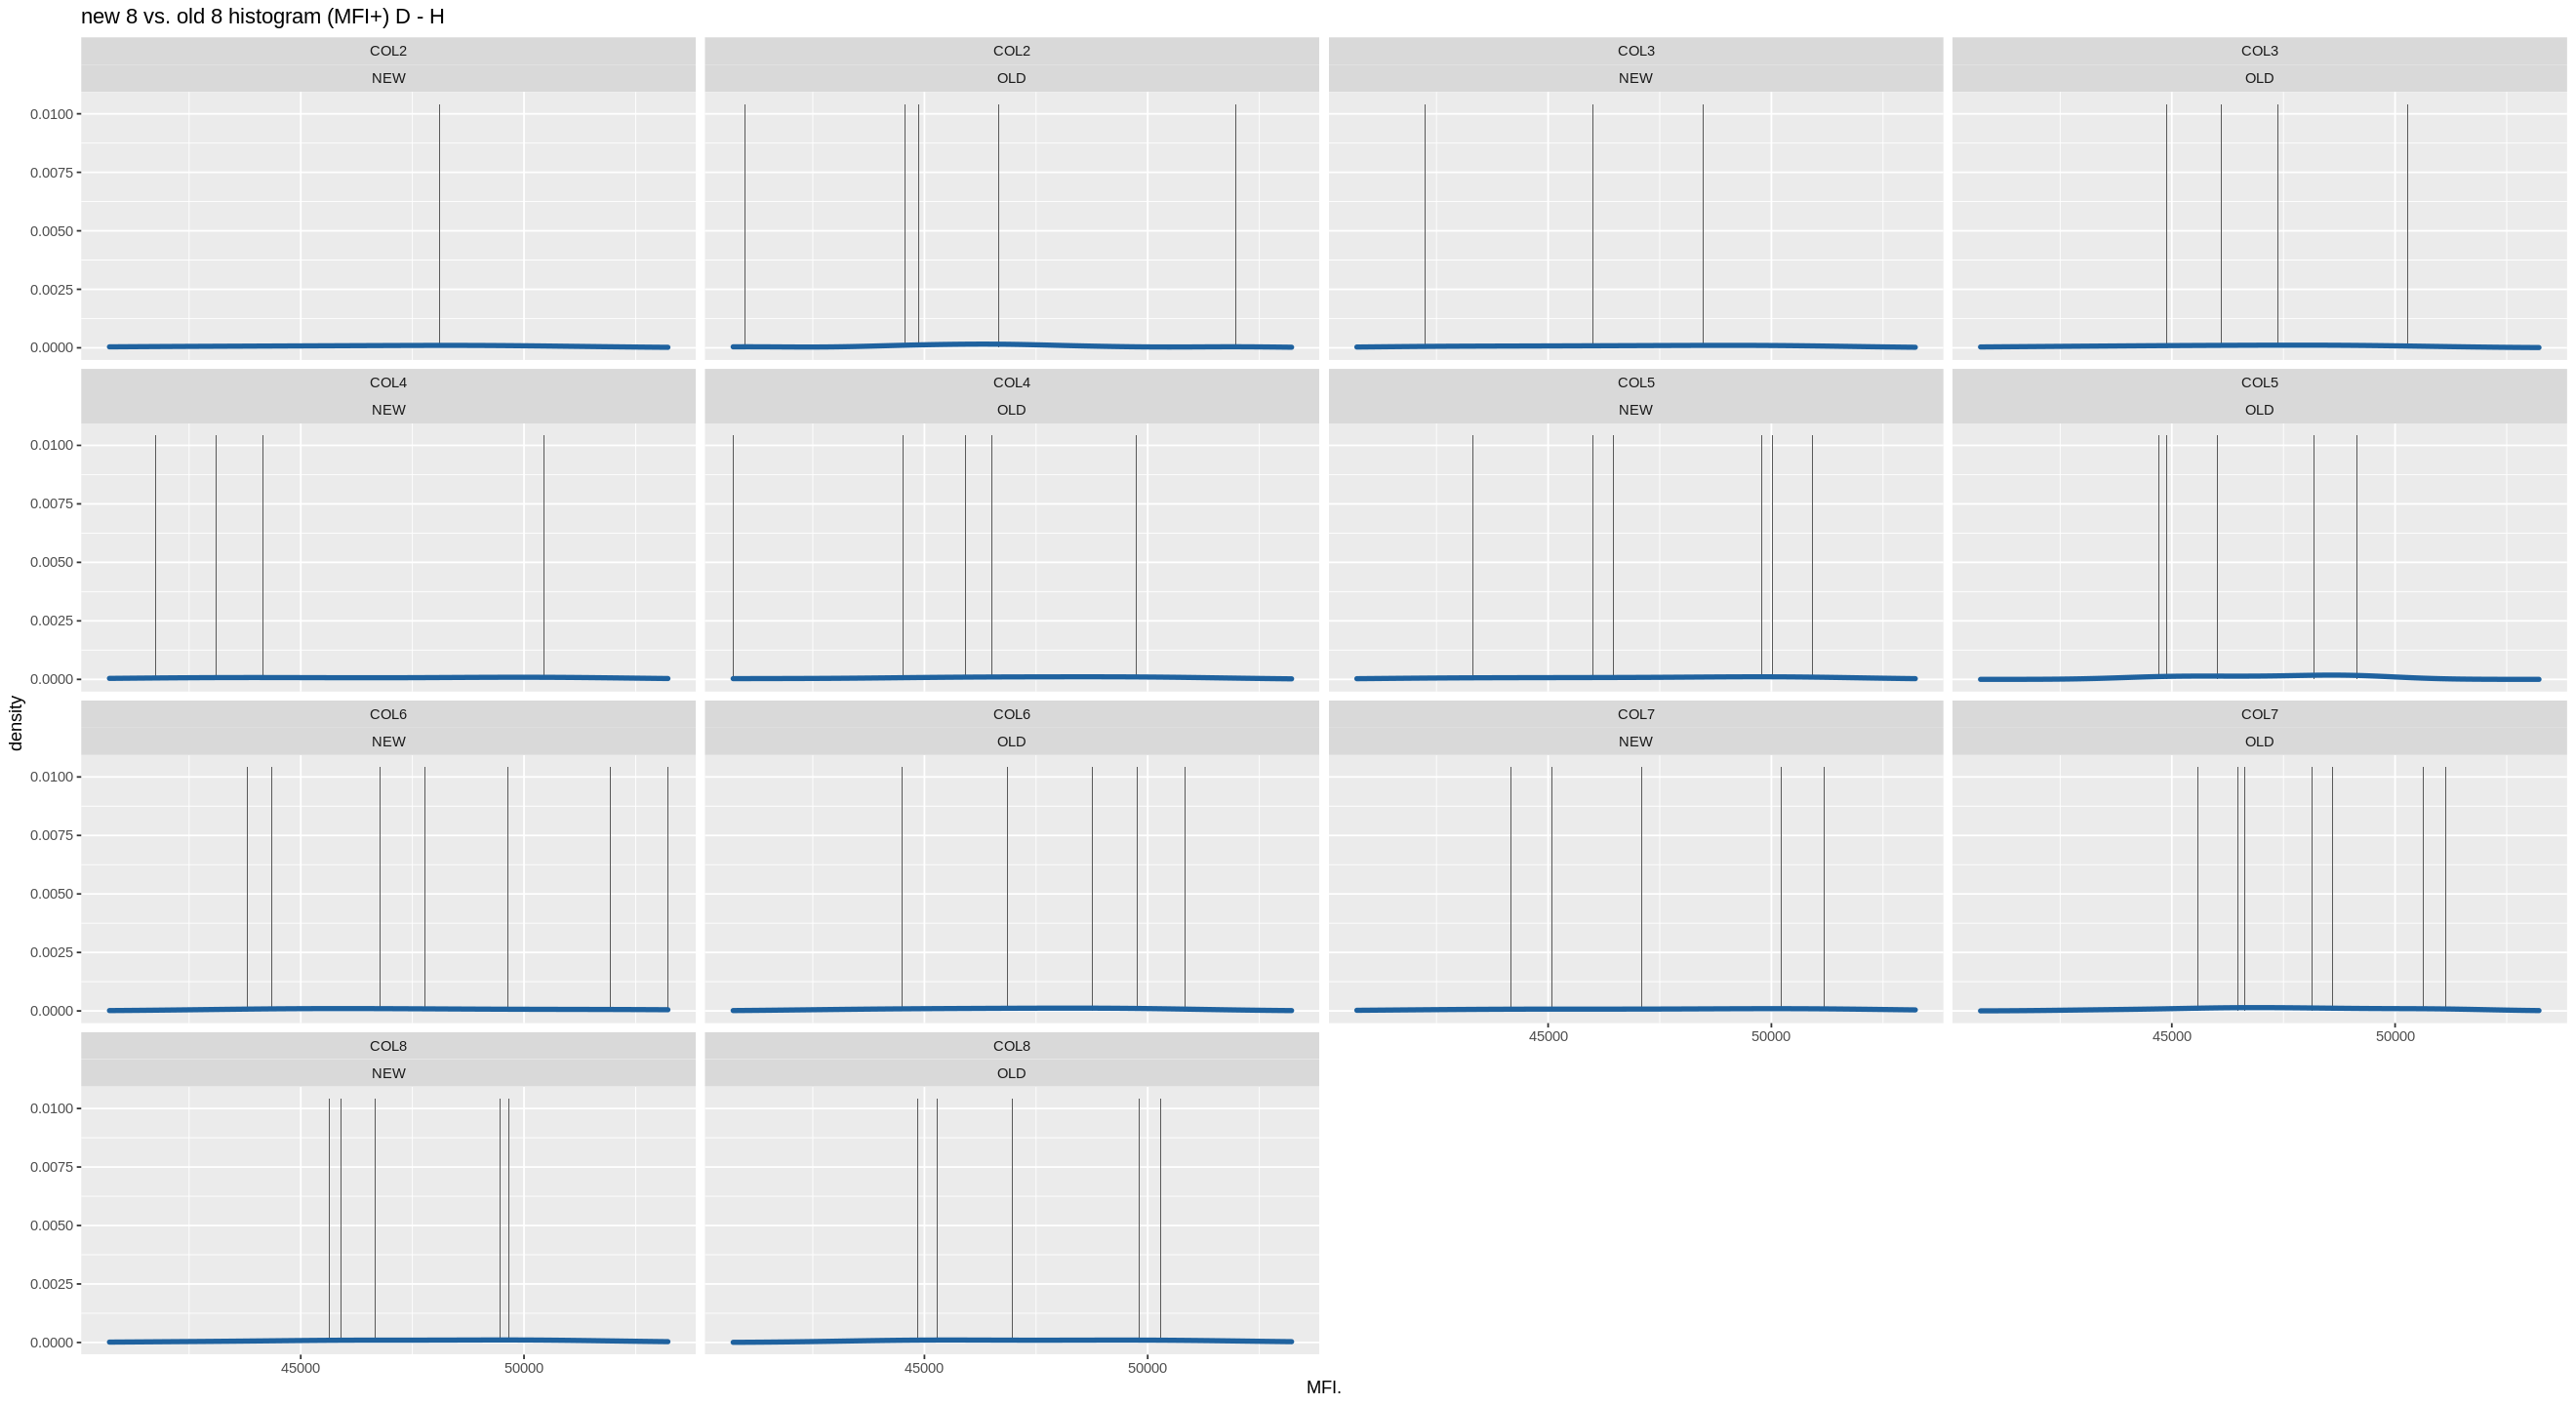

In [25]:
j = 4
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]
df.t <- dfm %>% filter(row == paste0(pat1, "-", pat2))
ggplot(data = df.t, aes(group = group, x = MFI.)) +
    geom_histogram(aes(y = ..density..), binwidth = 12, position = "identity") + 
    geom_density(alpha=0.5, colour = '#1F629F', lwd = 1.5) + 
    facet_wrap(group~ method) +
    ggtitle(paste("new 8 vs. old 8 histogram (MFI+)", pat1, "-", pat2))

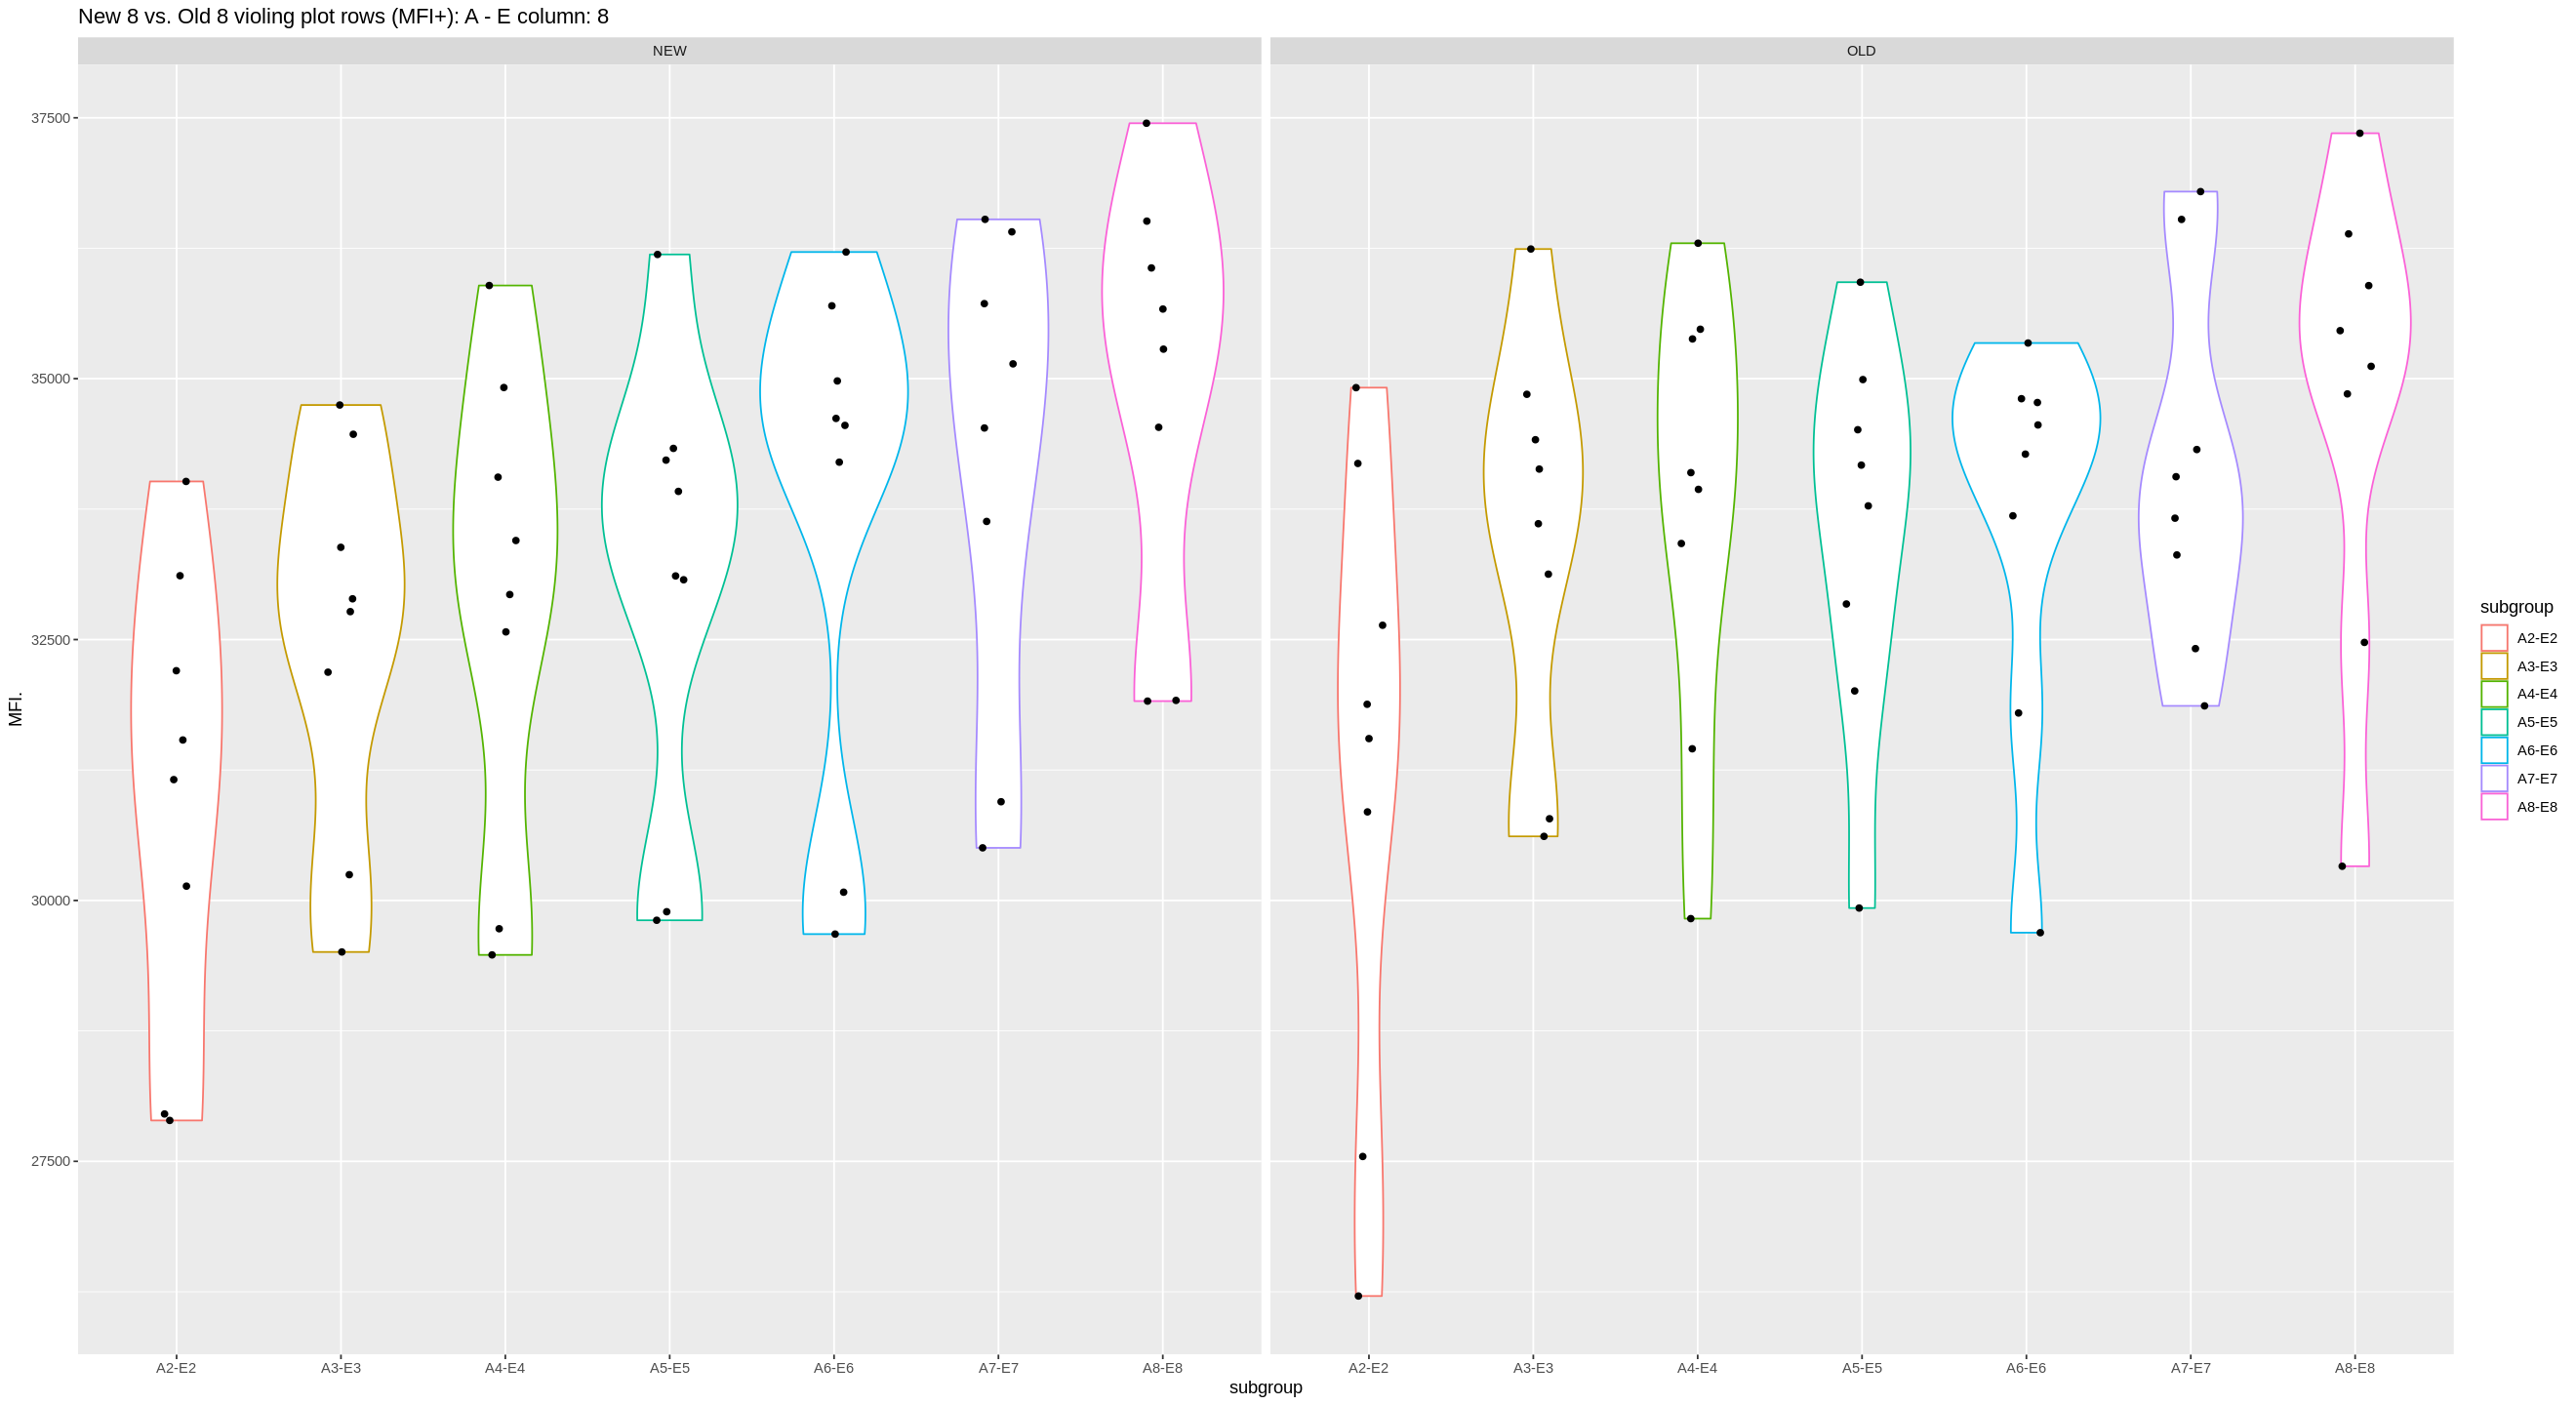

In [26]:
j = 1
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]
df.t <- dfm %>% filter(row == paste0(pat1, "-", pat2))
ggplot(df.t, aes(subgroup, MFI.)) + 
    geom_violin(aes(colour = subgroup)) + 
    geom_jitter(height = 0, width = 0.1) +
    ggtitle(paste("New 8 vs. Old 8 violing plot rows (MFI+):", pat1, "-", pat2, "column:", i) ) +
    facet_wrap(~ method)

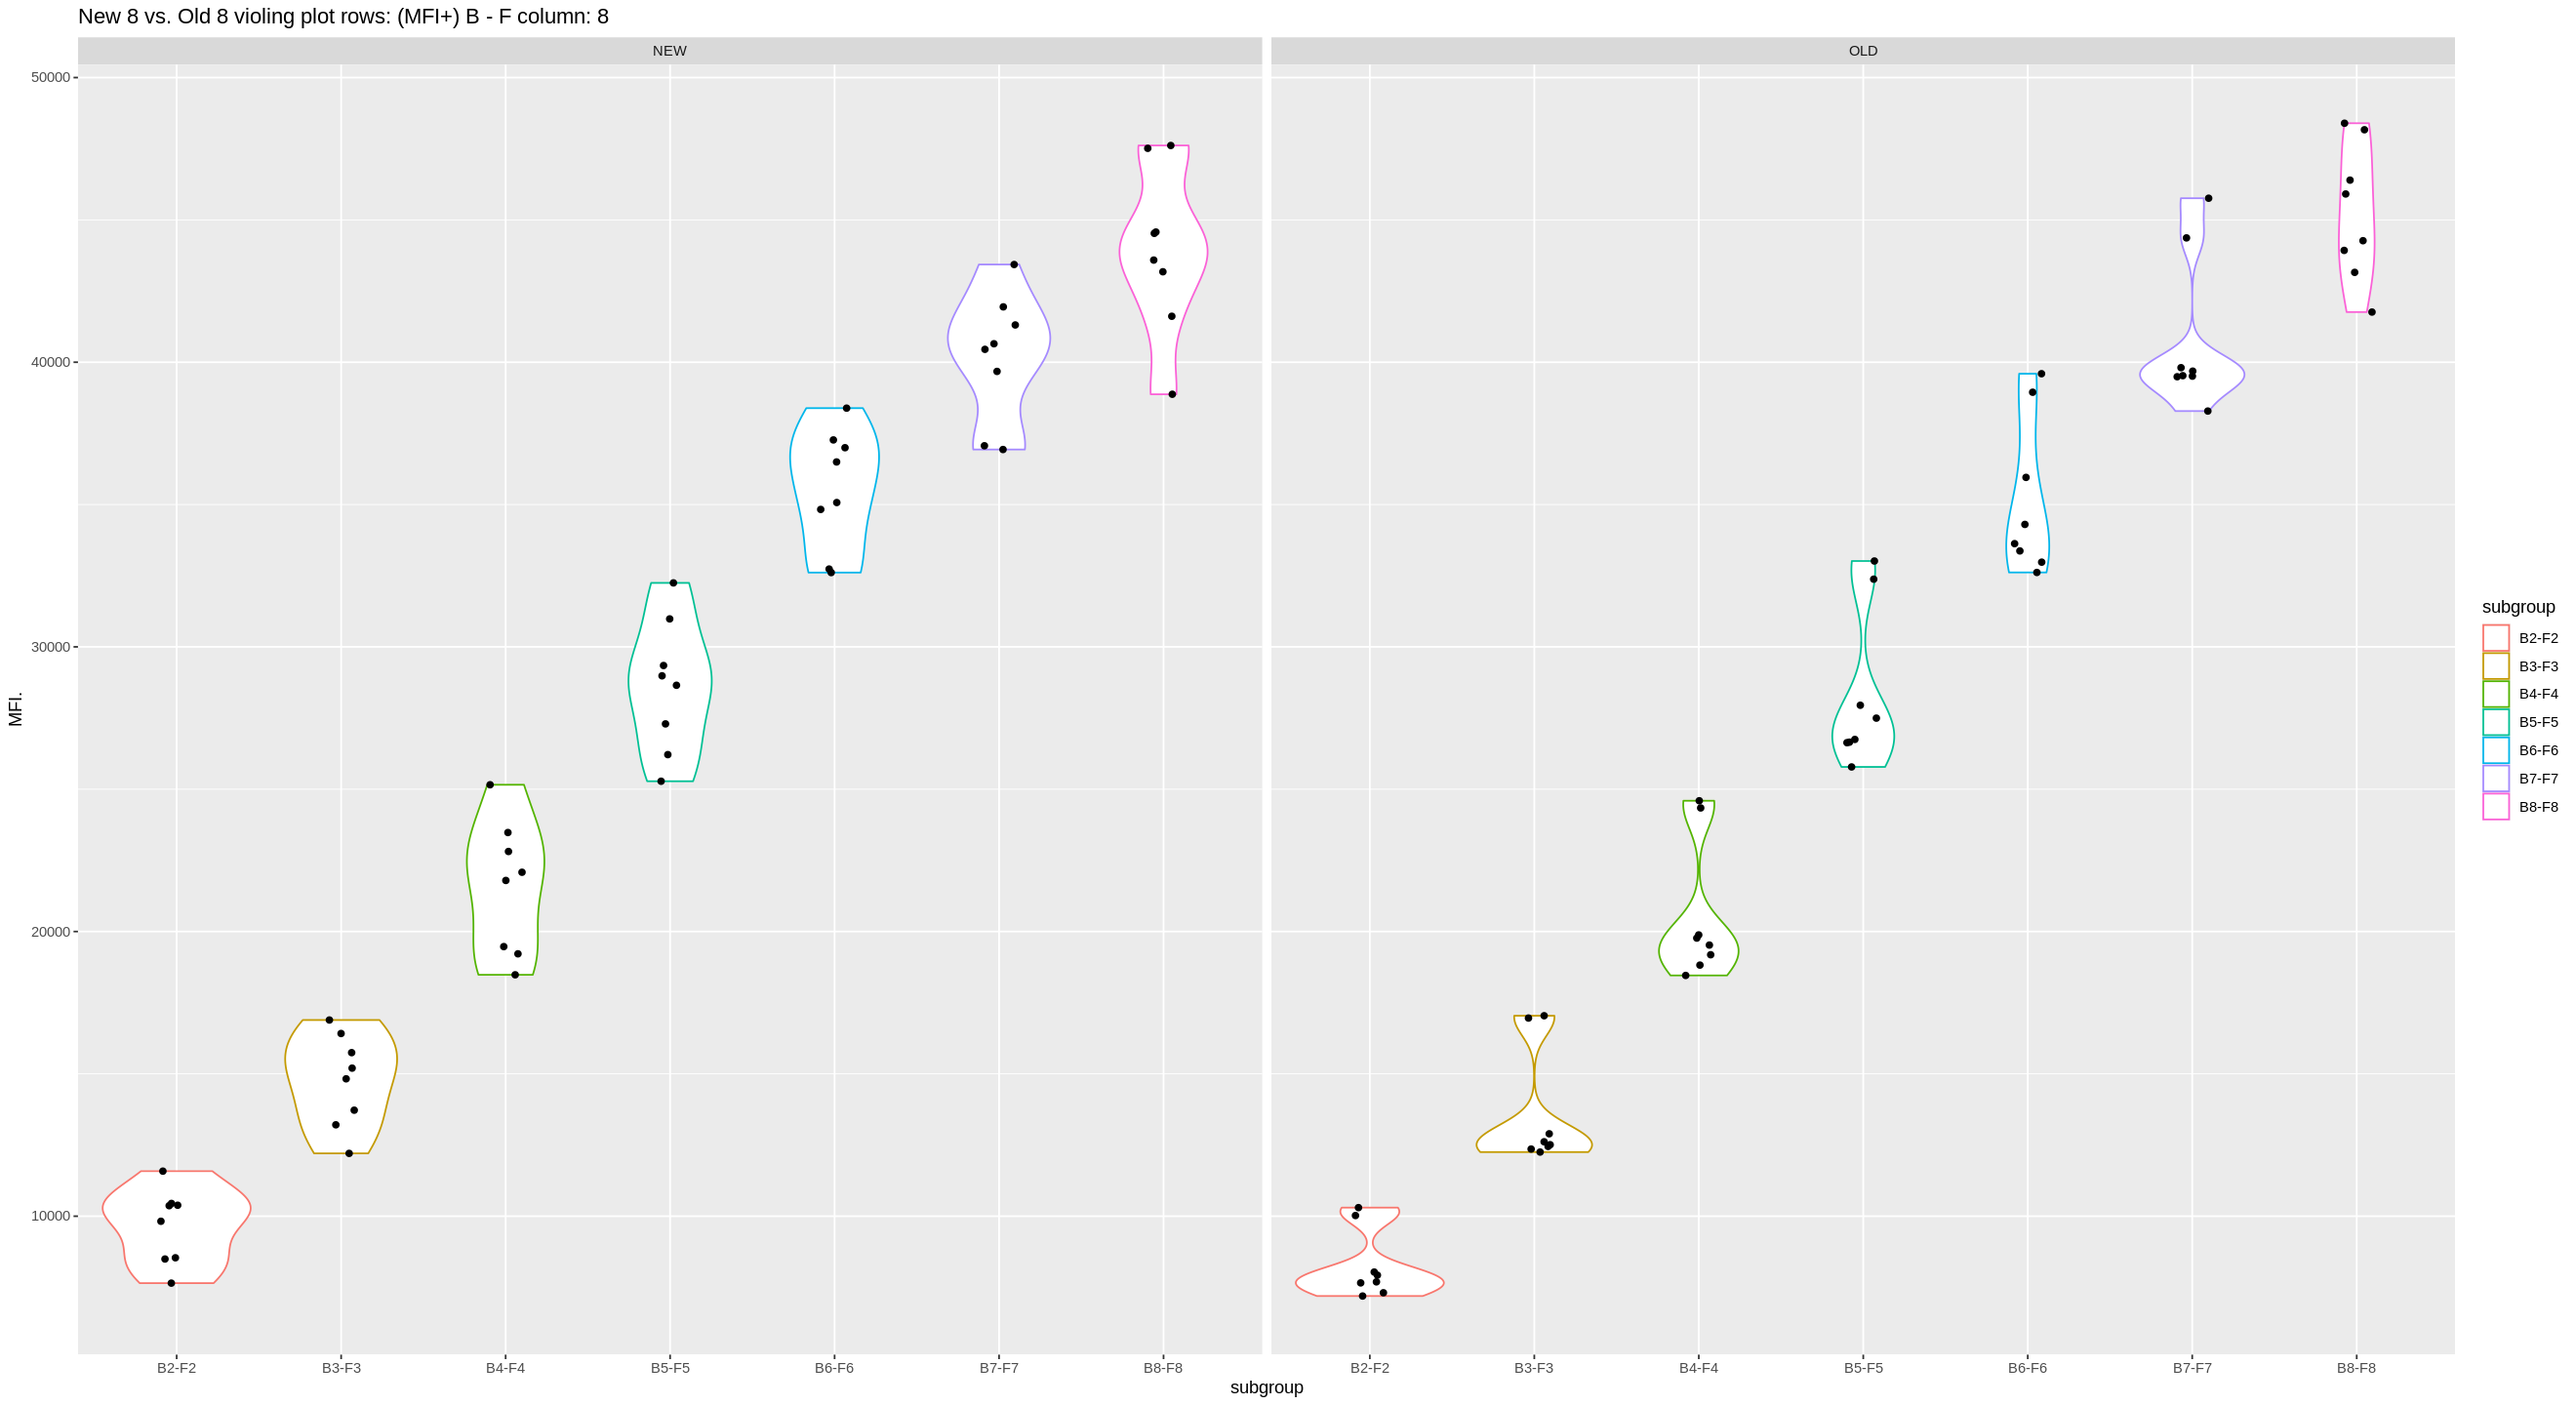

In [27]:
j = 2
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]
df.t <- dfm %>% filter(row == paste0(pat1, "-", pat2))
ggplot(df.t, aes(subgroup, MFI.)) + 
    geom_violin(aes(colour = subgroup)) + 
    geom_jitter(height = 0, width = 0.1) +
    ggtitle(paste("New 8 vs. Old 8 violing plot rows: (MFI+)", pat1, "-", pat2, "column:", i) ) +
    facet_wrap(~ method)

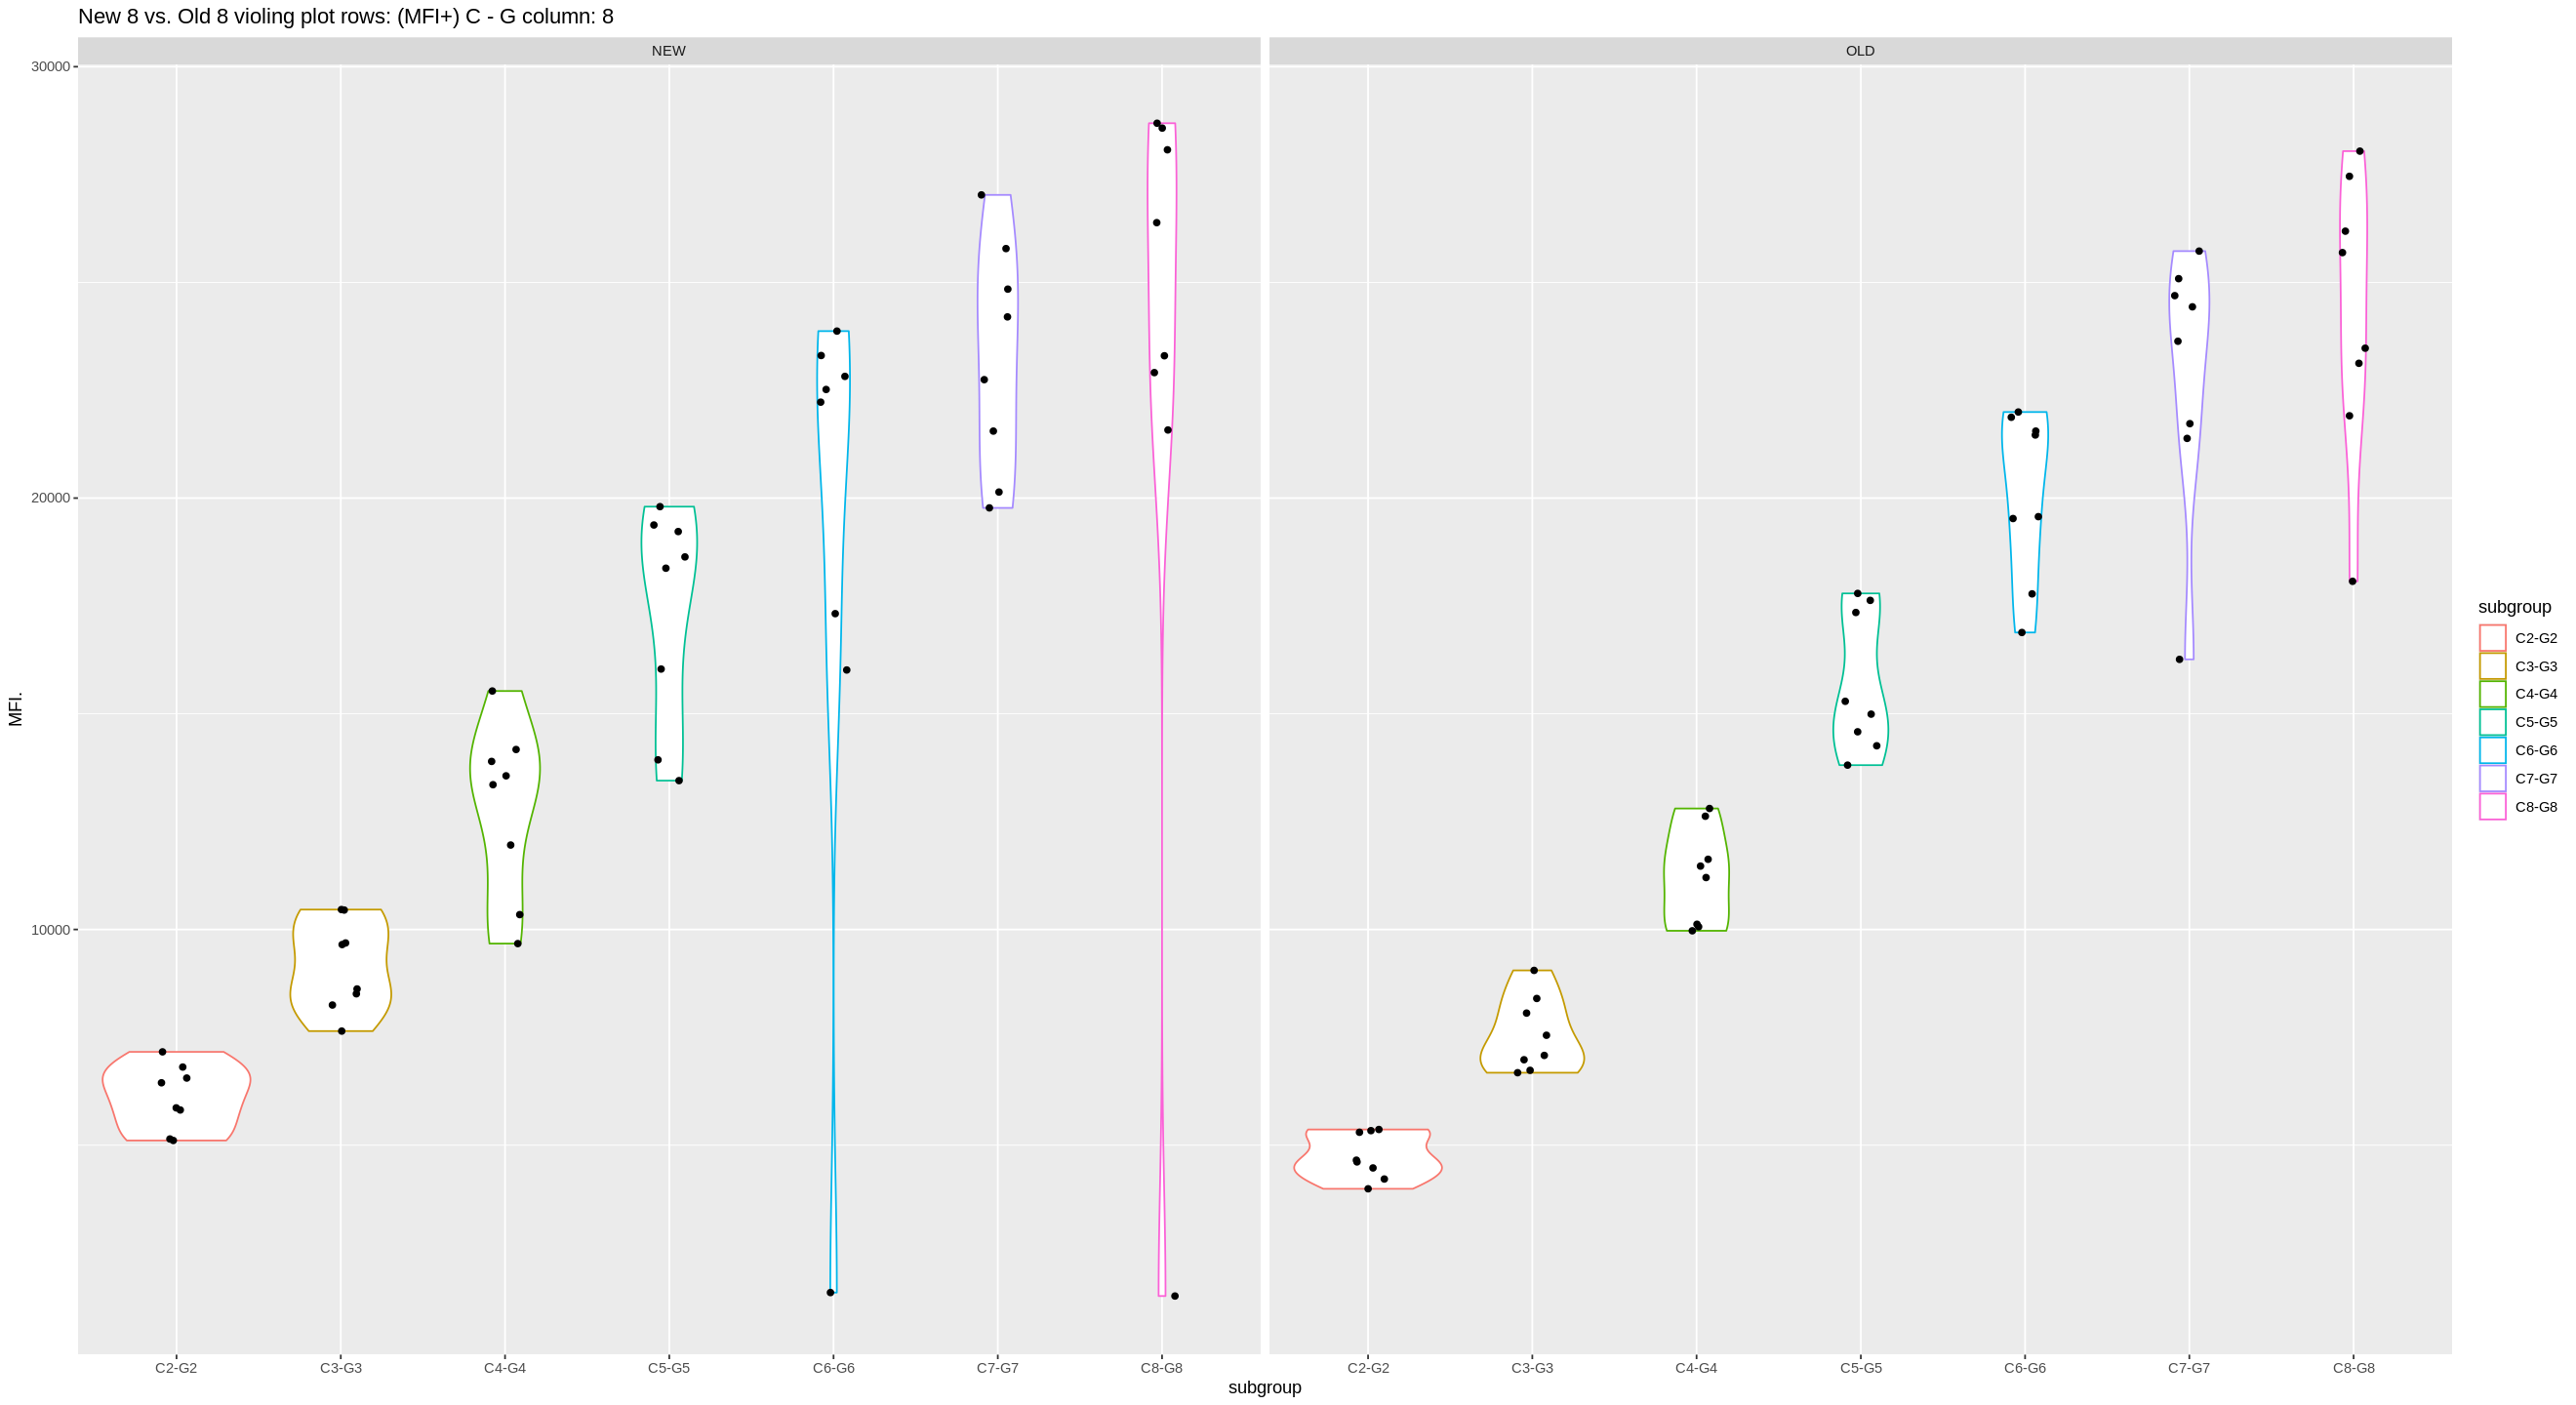

In [28]:
j = 3
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]
df.t <- dfm %>% filter(row == paste0(pat1, "-", pat2))
ggplot(df.t, aes(subgroup, MFI.)) + 
    geom_violin(aes(colour = subgroup)) + 
    geom_jitter(height = 0, width = 0.1) +
    ggtitle(paste("New 8 vs. Old 8 violing plot rows: (MFI+)", pat1, "-", pat2, "column:", i) ) +
    facet_wrap(~ method)

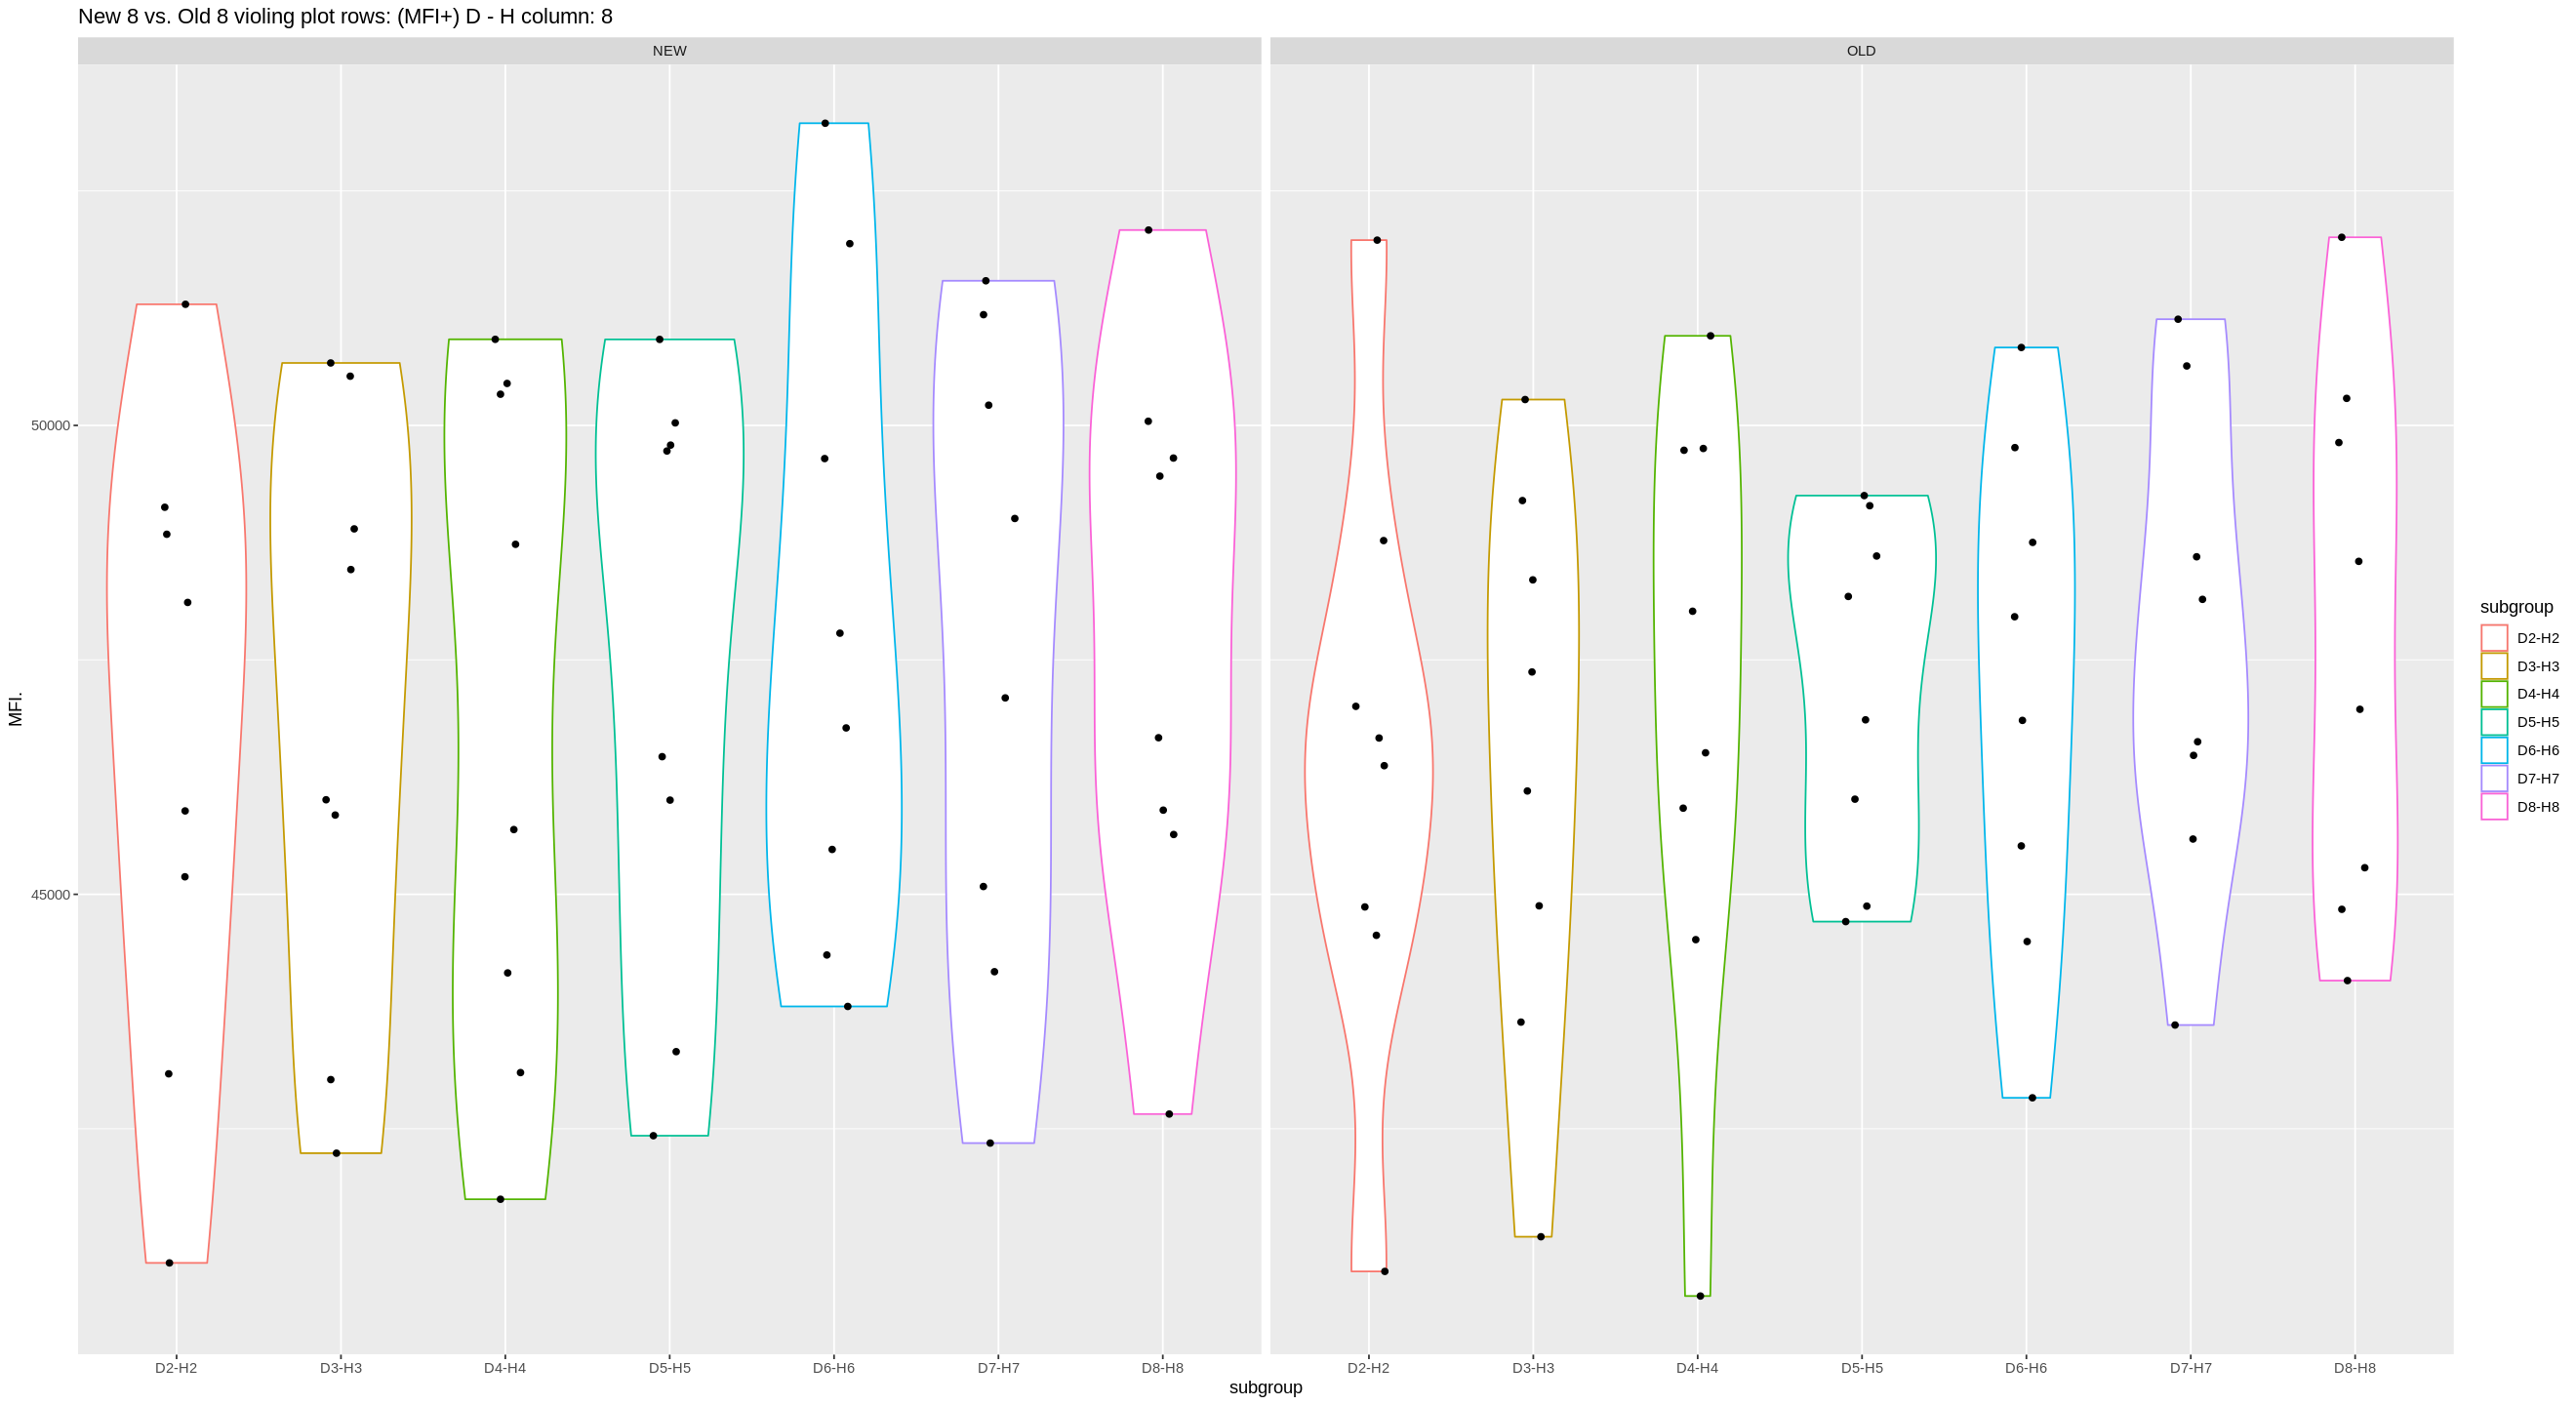

In [30]:
j = 4
pat1 = rows[[j]][1]
pat2 = rows[[j]][2]
df.t <- dfm %>% filter(row == paste0(pat1, "-", pat2))
ggplot(df.t, aes(subgroup, MFI.)) + 
    geom_violin(aes(colour = subgroup)) + 
    geom_jitter(height = 0, width = 0.1) +
    ggtitle(paste("New 8 vs. Old 8 violing plot rows: (MFI+)", pat1, "-", pat2, "column:", i) ) +
    facet_wrap(~ method)

#### Violin plots
-  It is similar to a box plot, with the addition of a rotated kernel density plot on each side

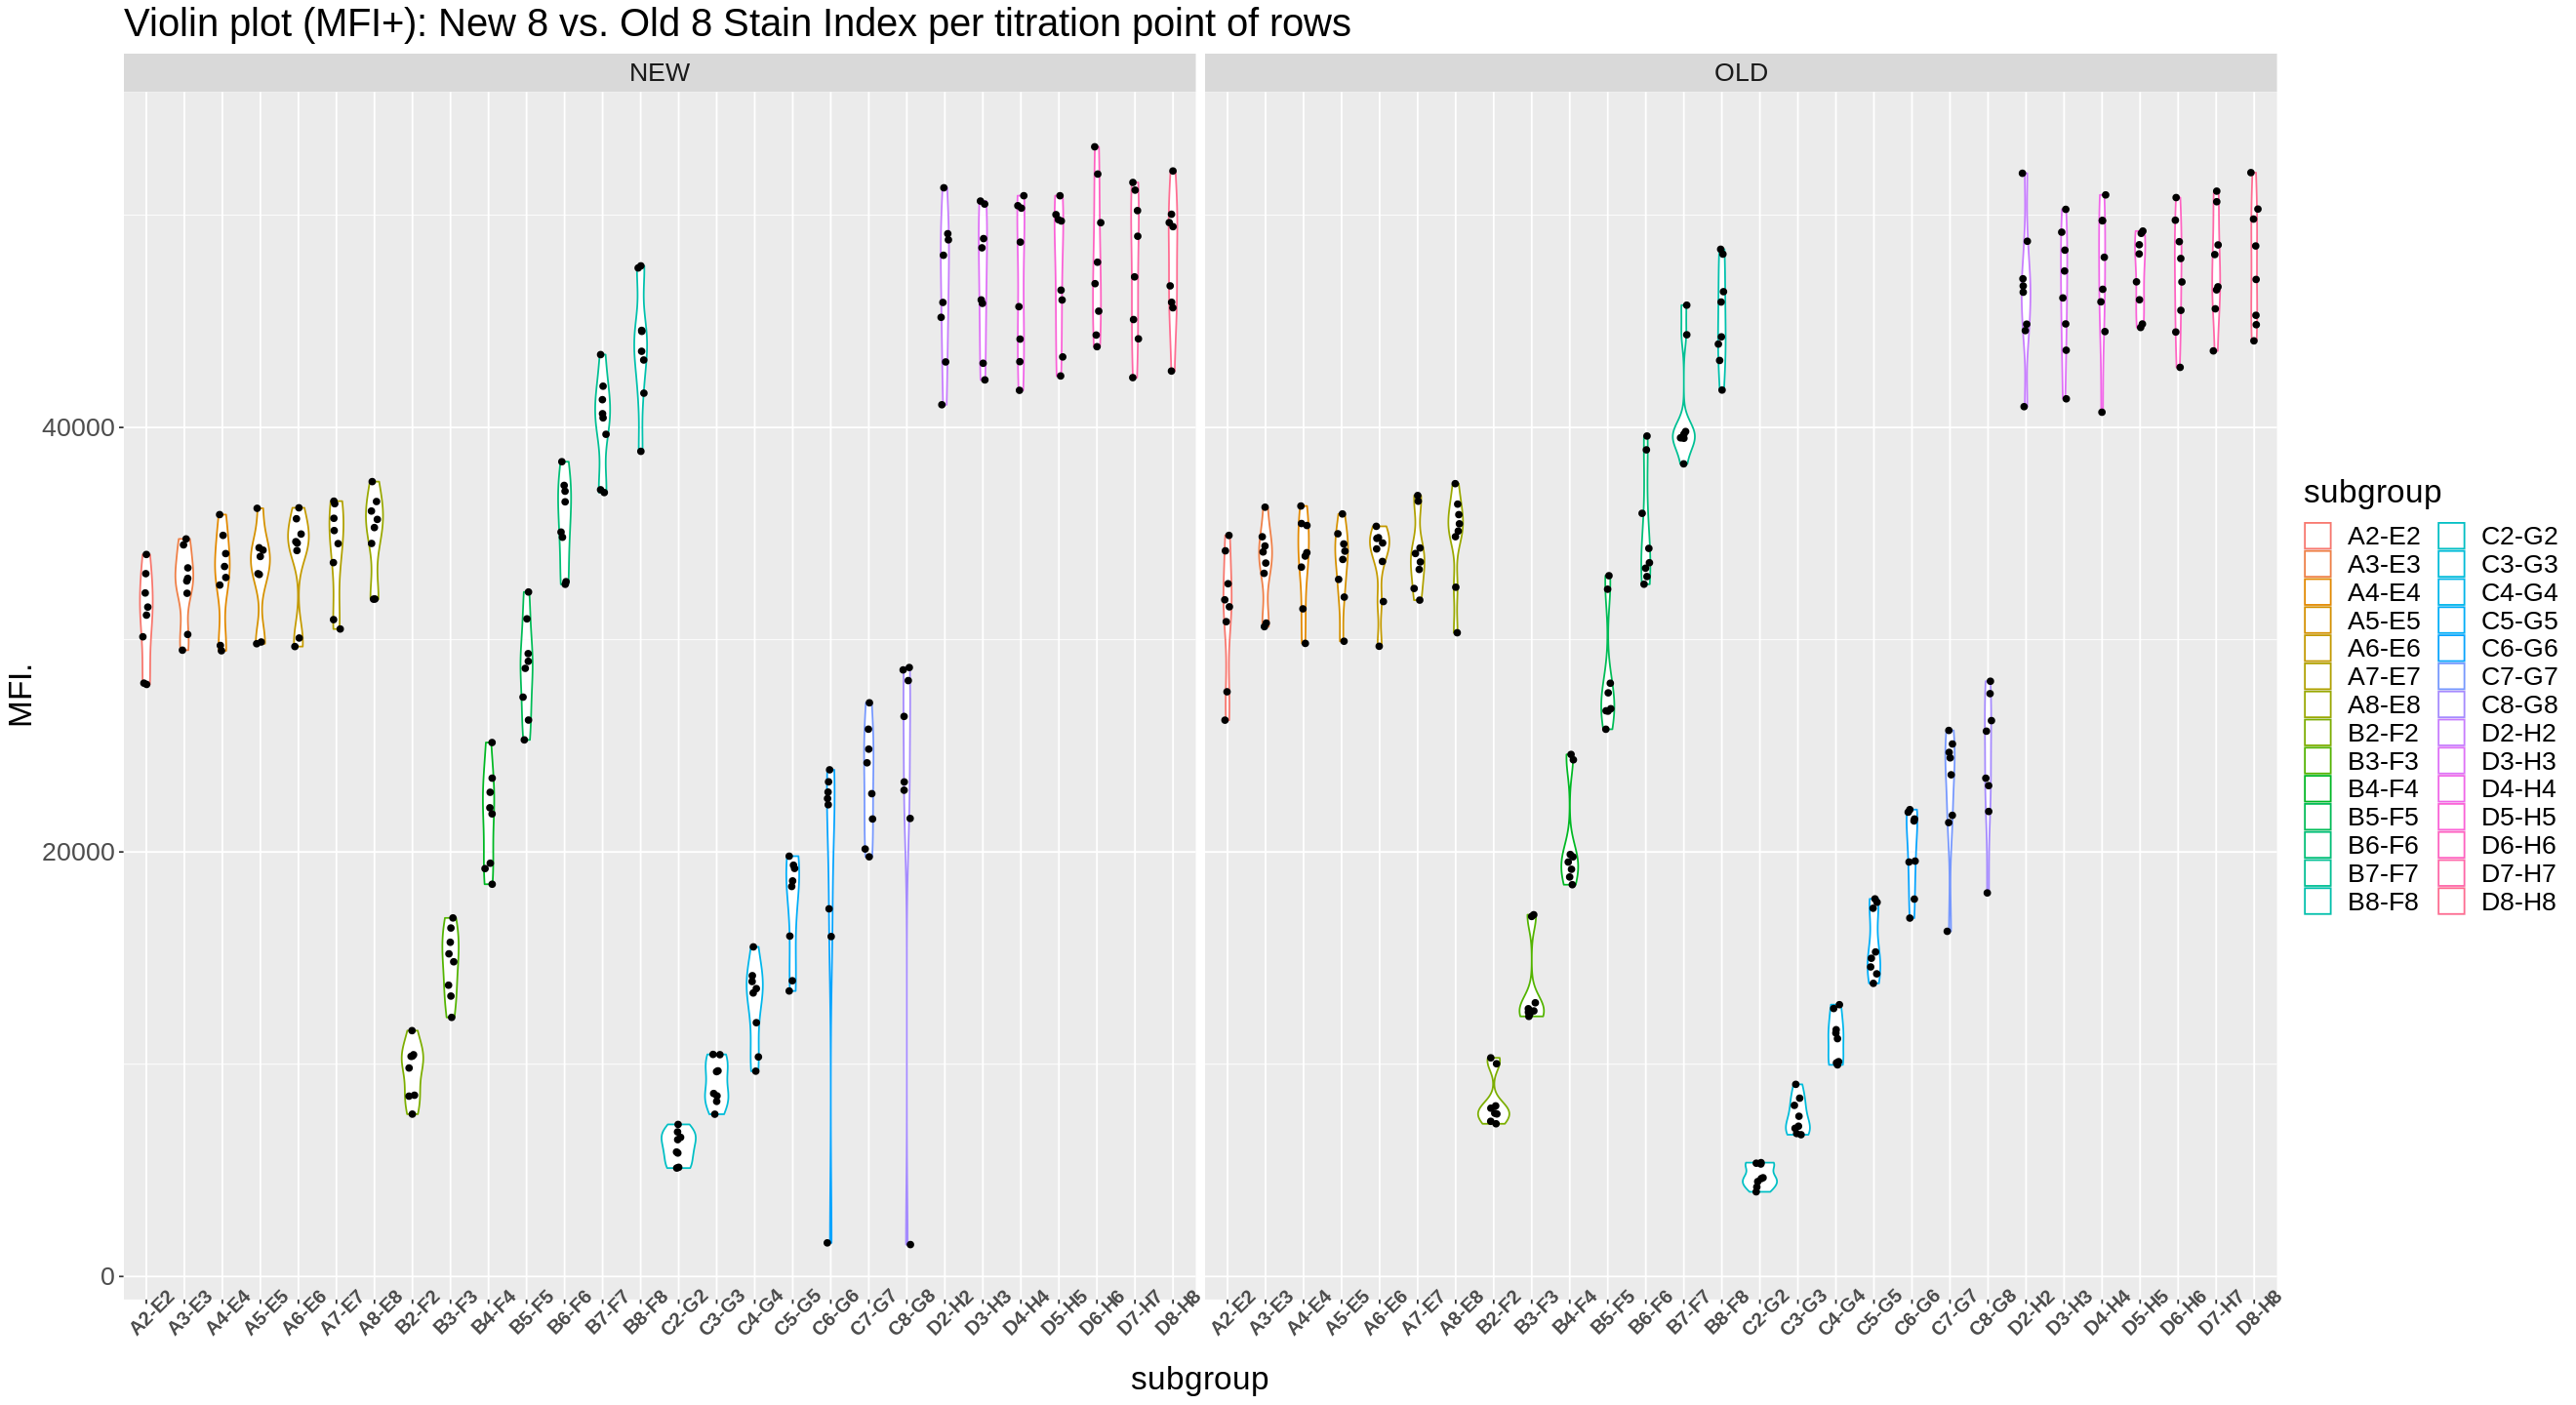

In [31]:
ggplot(dfm, aes(subgroup, MFI.)) + 
    geom_violin(aes(colour = subgroup)) + 
    geom_jitter(height = 0, width = 0.1) +
    ggtitle("Violin plot (MFI+): New 8 vs. Old 8 Stain Index per titration point of rows" ) +
    facet_wrap(~ method) +
    theme(text = element_text(size=20),
        axis.text.x = element_text(face = "bold", 
                           size = 12, angle = 45)) 

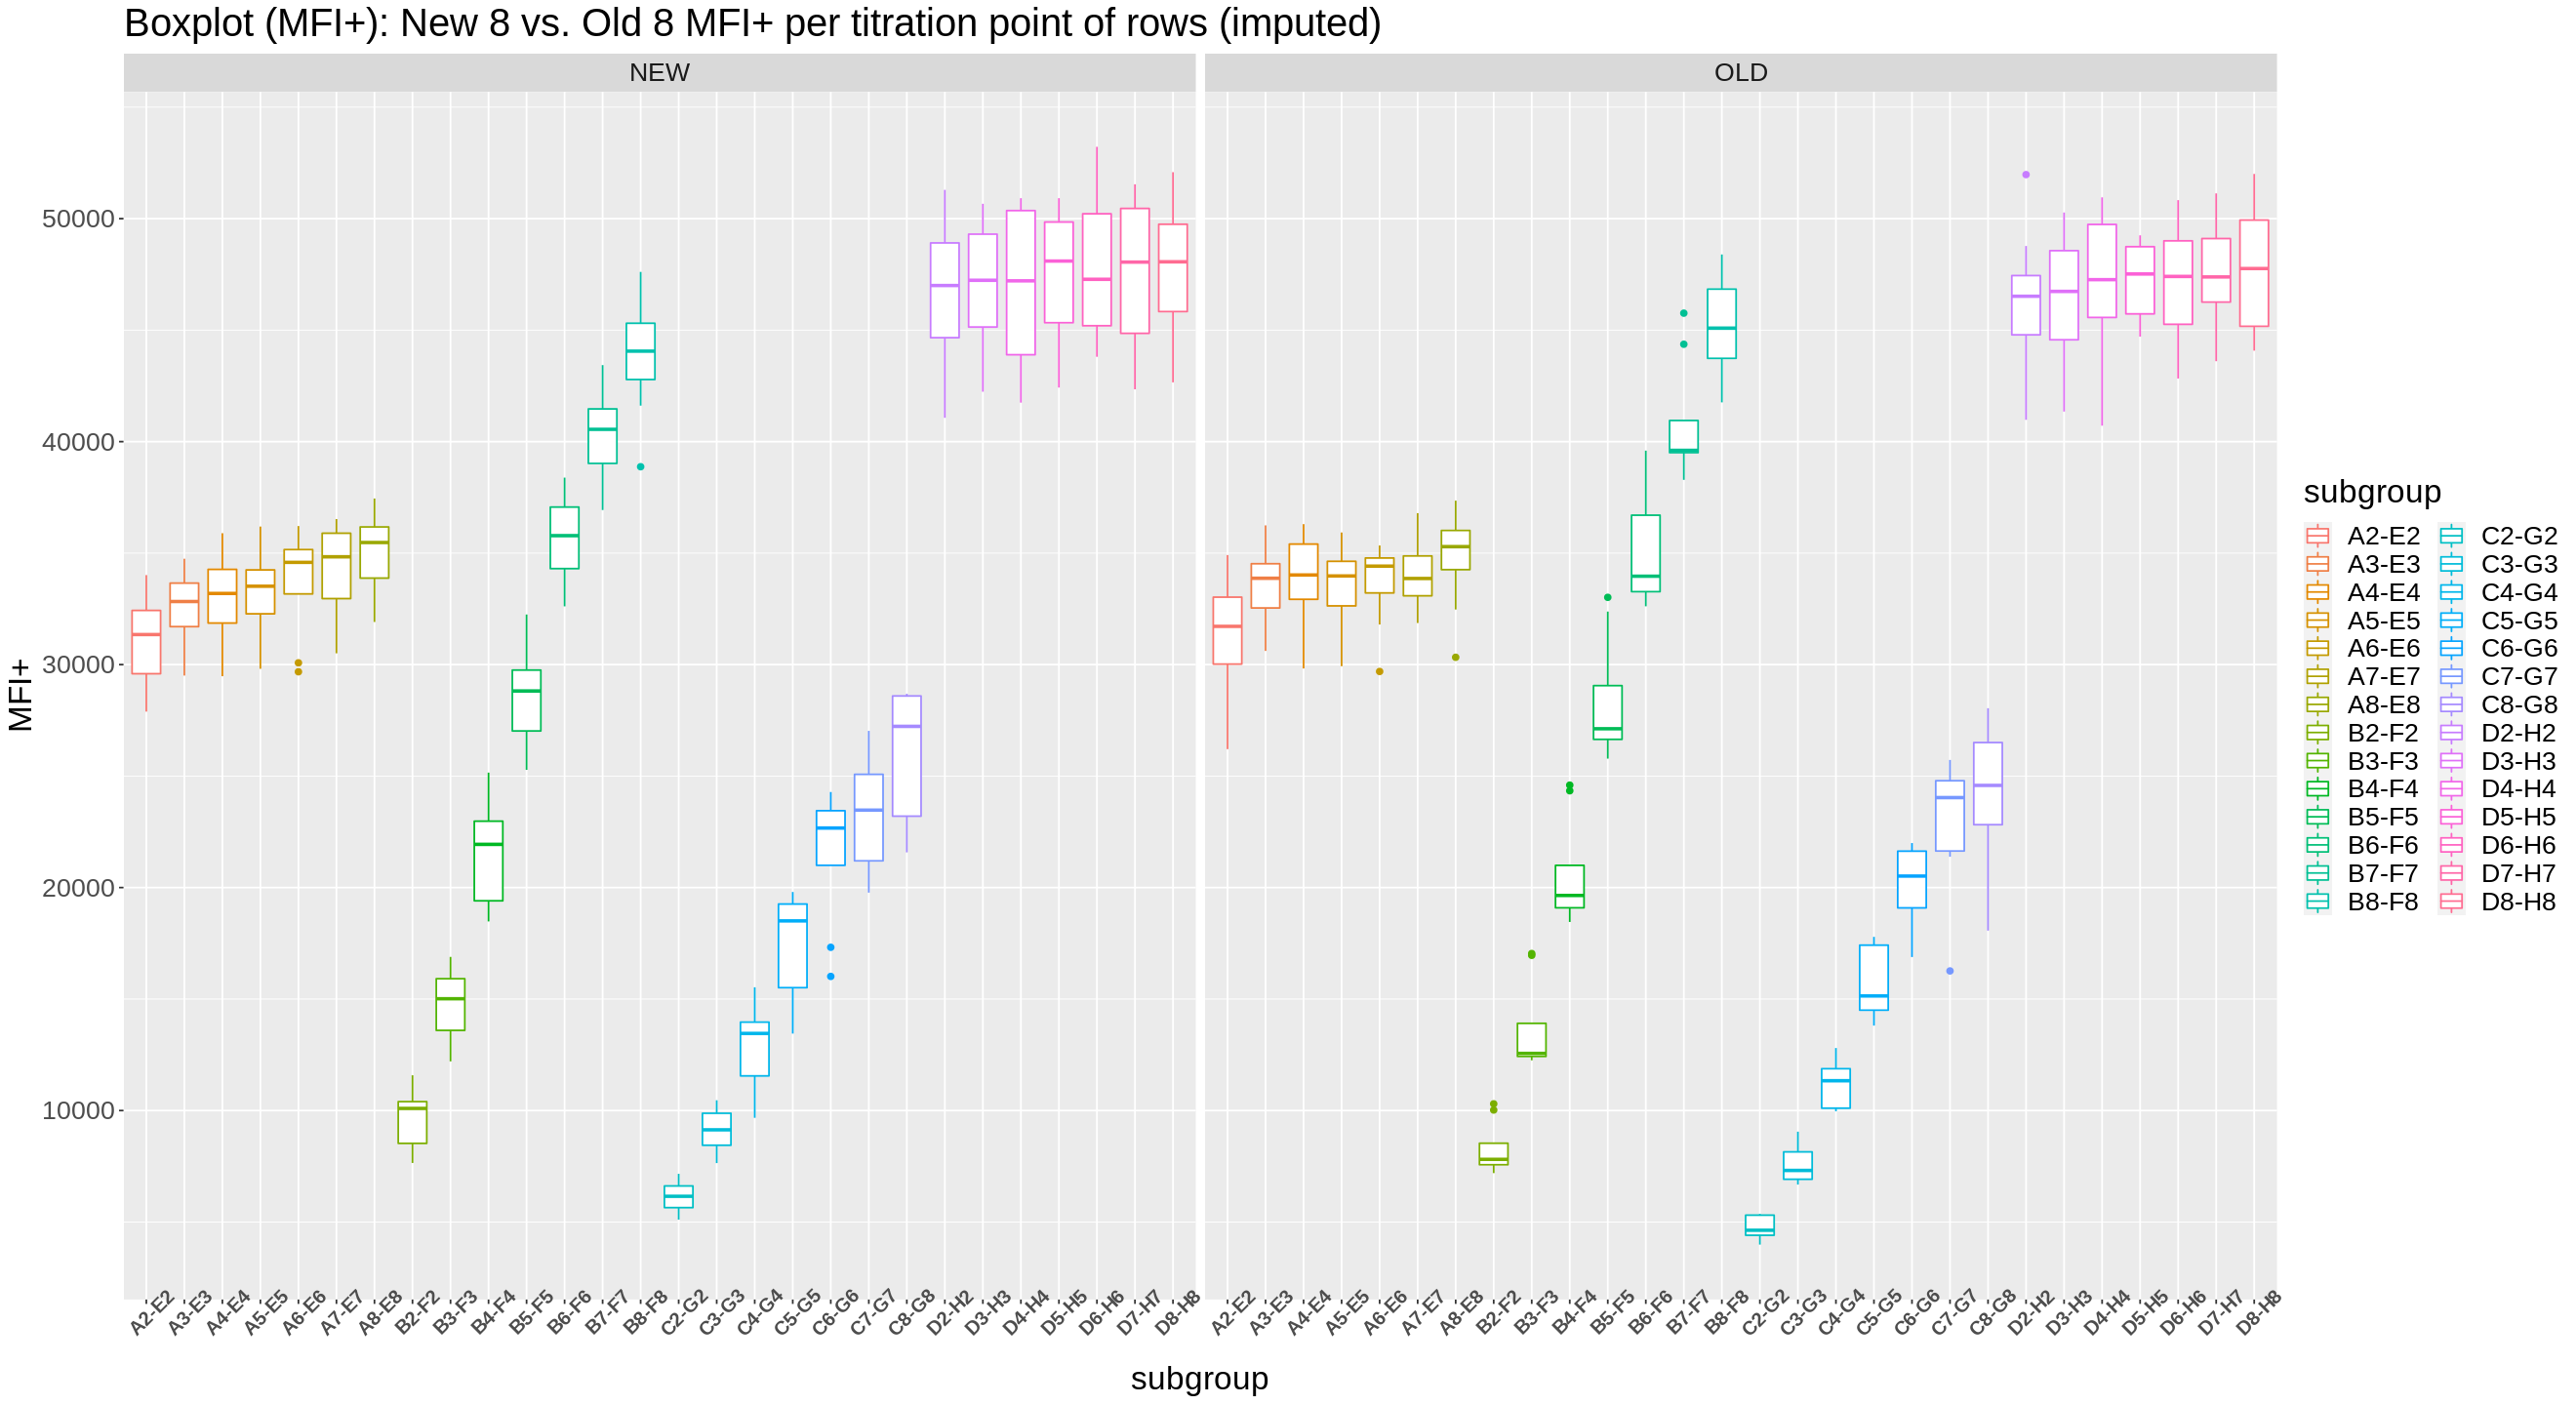

In [14]:
#ggplot(dfm, aes(subgroup, MFI., colour = subgroup)) + 
ggplot(dfm_impute, aes(subgroup, MFI., colour = subgroup)) + 
  geom_boxplot() + 
  #ggtitle("Boxplot (MFI+): New 8 vs. Old 8 MFI+ per titration point of rows (all data)" ) +
  ggtitle("Boxplot (MFI+): New 8 vs. Old 8 MFI+ per titration point of rows (imputed)" ) +
  ylab("MFI+") +
  facet_wrap(~method) + 
  theme(text = element_text(size=20),
        axis.text.x = element_text(face = "bold", 
                           size = 12, angle = 45)) 

### simple stats

In [7]:
dfm <- dfm %>% mutate(row_index = 1:n()) 
head(dfm)

SAMPLE_NAME                 MFI.     MFI..1 SI       SN       group row
1 Specimen_001_A2_A02_003.fcs 33111.86  69.30 308.8967 477.8045 COL2  A-E
2 Specimen_001_A3_A03_004.fcs 34747.65  69.30 309.2416 501.4090 COL3  A-E
3 Specimen_001_A4_A04_005.fcs 34915.23  77.49 260.8396 450.5773 COL4  A-E
4 Specimen_001_A5_A05_006.fcs 36190.35  79.38 243.8216 455.9127 COL5  A-E
5 Specimen_001_A6_A06_007.fcs 36213.66  76.86 185.6048 471.1639 COL6  A-E
6 Specimen_001_A7_A07_008.fcs 36407.07 102.06 139.5327 356.7222 COL7  A-E
  subgroup method plate   row_index
1 A2-E2    NEW    PLATE 1 1        
2 A3-E3    NEW    PLATE 1 2        
3 A4-E4    NEW    PLATE 1 3        
4 A5-E5    NEW    PLATE 1 4        
5 A6-E6    NEW    PLATE 1 5        
6 A7-E7    NEW    PLATE 1 6

In [8]:
#outliers for new method
outlier1 <- dfm %>% filter(subgroup == "C6-G6" & method == "NEW" & MFI. < 10000)
outlier2 <- dfm %>% filter(subgroup == "C8-G8" & method == "NEW" & MFI. < 10000)

In [9]:
print(paste(outlier1$row_index, outlier2$row_index))

[1] "383 245"


In [10]:
dfm_rm_outlier <- dfm %>% filter(!row_index %in% c(outlier1$row_index, outlier2$row_index))
slice(dfm_rm_outlier, 244:384)

SAMPLE_NAME                 MFI.     MFI..1     SI        SN          group
1   Specimen_001_C7_C07_030.fcs 19772.64  271.17001  10.98781   72.91603  COL7 
2   Specimen_001_D2_D02_037.fcs 41069.87   18.48000 295.51791 2222.39578  COL2 
3   Specimen_001_D3_D03_038.fcs 42239.89   22.33000 301.50026 1891.62072  COL3 
4   Specimen_001_D4_D04_039.fcs 41748.63   17.71000 233.56328 2357.34789  COL4 
5   Specimen_001_D5_D05_040.fcs 43322.51   12.70500 182.60504 3409.87864  COL5 
6   Specimen_001_D6_D06_041.fcs 45478.51    4.62000 127.67320 9843.83310  COL6 
7   Specimen_001_D7_D07_042.fcs 42347.69  -45.04500  46.70075 -940.11960  COL7 
8   Specimen_001_D8_D08_043.fcs 42657.23 -428.12000  33.55914  -99.63849  COL8 
9   Specimen_001_E2_E02_049.fcs 27953.86   64.05000 241.25140  436.43810  COL2 
10  Specimen_001_E3_E03_050.fcs 29506.31   70.15000 209.80869  420.61739  COL3 
11  Specimen_001_E4_E04_051.fcs 29728.96   68.32000 251.83371  435.14287  COL4 
12  Specimen_001_E5_E05_052.fcs 29891.83   74.42000 199.51428  401.66395  COL5 
13  Specimen_001_E6_E06_053.fcs 30079.10   89.06001  96.93245  337.73972  COL6 
14  Specimen_001_E7_E07_054.fcs 30945.91   96.38000 117.48802  321.08226  COL7 
15  Specimen_001_E8_E08_055.fcs 31910.32  104.61501  87.10552  305.02623  COL8 
16  Specimen_001_F2_F02_061.fcs  8539.02  125.95500  30.02245   67.79421  COL2 
17  Specimen_001_F3_F03_062.fcs 13209.89  136.89001  39.36869   96.50000  COL3 
18  Specimen_001_F4_F04_063.fcs 19469.97  171.72000  45.69638  113.38207  COL4 
19  Specimen_001_F5_F05_064.fcs 26214.03  164.43001  63.96830  159.42363  COL5 
20  Specimen_001_F6_F06_065.fcs 32733.72  145.80000  70.46785  224.51111  COL6 
21  Specimen_001_F7_F07_066.fcs 37064.79  170.91000  69.20864  216.86730  COL7 
22  Specimen_001_F8_F08_067.fcs 38873.93  206.55000  73.71995  188.20588  COL8 
23  Specimen_001_G2_G02_073.fcs  5108.07  160.08000  10.21166   31.90948  COL2 
24  Specimen_001_G3_G03_074.fcs  8508.39  158.70000  12.41117   53.61304  COL3 
25  Specimen_001_G4_G04_075.fcs 10343.79  182.85000  11.57866   56.56981  COL4 
26  Specimen_001_G5_G05_076.fcs 13932.14  273.58499   9.64420   50.92434  COL5 
27  Specimen_001_G6_G06_077.fcs 17321.07  177.67500  20.50623   97.48738  COL6 
28  Specimen_001_G7_G07_078.fcs 20139.72  227.70000  15.09403   88.44848  COL7 
29  Specimen_001_G8_G08_079.fcs 23299.23  247.02000  15.47860   94.32123  COL8 
30  Specimen_001_H2_H02_085.fcs 43086.12   17.71000 281.07034 2432.86953  COL2 
⋮   ⋮                           ⋮        ⋮          ⋮         ⋮           ⋮    
112 Specimen_001_C7_C07_030.fcs 25783.80  281.75000  16.93129    91.51304 COL7 
113 Specimen_001_C8_C08_031.fcs 28073.85  259.00000  18.33784   108.39324 COL8 
114 Specimen_001_D2_D02_037.fcs 48112.35   18.72000 420.90844  2570.10414 COL2 
115 Specimen_001_D3_D03_038.fcs 48896.64   20.28000 354.02261  2411.07700 COL3 
116 Specimen_001_D4_D04_039.fcs 48732.06   21.06000 262.73099  2313.96295 COL4 
117 Specimen_001_D5_D05_040.fcs 49726.95   33.54000 166.34221  1482.61633 COL5 
118 Specimen_001_D6_D06_041.fcs 49646.22    2.34000 121.69407 21216.33358 COL6 
119 Specimen_001_D7_D07_042.fcs 50215.62  -49.53000 148.00017 -1013.84253 COL7 
120 Specimen_001_D8_D08_043.fcs 50044.02 -311.61000  77.83659  -160.59824 COL8 
121 Specimen_001_E2_E02_049.fcs 30137.05   66.49000 342.33335   453.25691 COL2 
122 Specimen_001_E3_E03_050.fcs 32767.68   67.71000 328.87424   483.94146 COL3 
123 Specimen_001_E4_E04_051.fcs 32931.46   68.32000 291.21080   482.01787 COL4 
124 Specimen_001_E5_E05_052.fcs 33072.98   71.98000 251.39358   459.47456 COL5 
125 Specimen_001_E6_E06_053.fcs 34978.32   89.06001 163.88396   392.74999 COL6 
126 Specimen_001_E7_E07_054.fcs 33632.04  116.51000  91.72537   288.66230 COL7 
127 Specimen_001_E8_E08_055.fcs 35667.31  237.29001  54.54164   150.31105 COL8 
128 Specimen_001_F2_F02_061.fcs  7648.20  153.30000  28.78302    49.89041 COL2 
129 Specimen_001_F3_F03_062.fcs 12206.04  157.08000  39.46653    77.70588 COL3 
130 

In [11]:
dfm_rm_outlier %>% group_by(subgroup) %>% count()

subgroup n 
1  A2-E2    16
2  A3-E3    16
3  A4-E4    16
4  A5-E5    16
5  A6-E6    16
6  A7-E7    16
7  A8-E8    16
8  B2-F2    16
9  B3-F3    16
10 B4-F4    16
11 B5-F5    16
12 B6-F6    16
13 B7-F7    16
14 B8-F8    16
15 C2-G2    16
16 C3-G3    16
17 C4-G4    16
18 C5-G5    16
19 C6-G6    15
20 C7-G7    16
21 C8-G8    15
22 D2-H2    16
23 D3-H3    16
24 D4-H4    16
25 D5-H5    16
26 D6-H6    16
27 D7-H7    16
28 D8-H8    16

In [12]:
dfm_mean_rm_outlier <- dfm_rm_outlier %>% group_by(subgroup, method ) %>% summarise(mean = mean(MFI.), std = sd(MFI.)) %>% filter((subgroup == "C6-G6" | subgroup == "C8-G8") & method == "NEW")
dfm_mean_rm_outlier

`summarise()` regrouping output by 'subgroup' (override with `.groups` argument)



subgroup method mean     std     
1 C6-G6    NEW    21153.42 3132.941
2 C8-G8    NEW    25644.49 2995.550

In [13]:
# IMPUTE THE MEAN VALUES (average + std)
#dfm_impute <- dfm %>% mutate(MFI. = case_when(
        #row_index == outlier1$row_index ~ dfm_mean_rm_outlier$mean[dfm_mean_rm_outlier$subgroup == "C6-G6"] + dfm_mean_rm_outlier$std[dfm_mean_rm_outlier$subgroup == "C6-G6"],
        #row_index == outlier2$row_index ~ dfm_mean_rm_outlier$mean[dfm_mean_rm_outlier$subgroup == "C8-G8"] + dfm_mean_rm_outlier$std[dfm_mean_rm_outlier$subgroup == "C8-G8"]
#)) 
dfm_impute <- data.frame(dfm)
dfm_impute$MFI.[dfm_impute$row_index == outlier1$row_index] <- dfm_mean_rm_outlier$mean[dfm_mean_rm_outlier$subgroup == "C6-G6"] + dfm_mean_rm_outlier$std[dfm_mean_rm_outlier$subgroup == "C6-G6"]
dfm_impute$MFI.[dfm_impute$row_index == outlier2$row_index] <- dfm_mean_rm_outlier$mean[dfm_mean_rm_outlier$subgroup == "C8-G8"] + dfm_mean_rm_outlier$std[dfm_mean_rm_outlier$subgroup == "C8-G8"]

In [169]:
dfm_impute %>% filter(row_index %in% c(outlier1$row_index, outlier2$row_index))

SAMPLE_NAME                 MFI.     MFI..1   SI        SN         group row
1 Specimen_001_C8_C08_031.fcs 28640.04 -6758.55 0.4526031 -0.2222563 COL8  C-G
2 Specimen_001_G6_G06_076.fcs 24286.36 -3698.80 2.1045135 -0.4278955 COL6  C-G
  subgroup method plate   row_index
1 C8-G8    NEW    PLATE 3 245      
2 C6-G6    NEW    PLATE 4 383

In [149]:
dfm %>% filter(row_index %in% c(outlier1$row_index, outlier2$row_index))

SAMPLE_NAME                 MFI.    MFI..1   SI        SN         group row
1 Specimen_001_C8_C08_031.fcs 1502.13 -6758.55 0.4526031 -0.2222563 COL8  C-G
2 Specimen_001_G6_G06_076.fcs 1582.70 -3698.80 2.1045135 -0.4278955 COL6  C-G
  subgroup method plate   row_index
1 C8-G8    NEW    PLATE 3 245      
2 C6-G6    NEW    PLATE 4 383

In [108]:
insertRow <- function(existingDF, newrow, r) {
  existingDF[seq(r+1,nrow(existingDF)+1),] <- existingDF[seq(r,nrow(existingDF)),]
  existingDF[r,] <- newrow
  existingDF
}

In [170]:
head(dfm_impute)

SAMPLE_NAME                 MFI.     MFI..1 SI       SN       group row
1 Specimen_001_A2_A02_003.fcs 33111.86  69.30 308.8967 477.8045 COL2  A-E
2 Specimen_001_A3_A03_004.fcs 34747.65  69.30 309.2416 501.4090 COL3  A-E
3 Specimen_001_A4_A04_005.fcs 34915.23  77.49 260.8396 450.5773 COL4  A-E
4 Specimen_001_A5_A05_006.fcs 36190.35  79.38 243.8216 455.9127 COL5  A-E
5 Specimen_001_A6_A06_007.fcs 36213.66  76.86 185.6048 471.1639 COL6  A-E
6 Specimen_001_A7_A07_008.fcs 36407.07 102.06 139.5327 356.7222 COL7  A-E
  subgroup method plate   row_index
1 A2-E2    NEW    PLATE 1 1        
2 A3-E3    NEW    PLATE 1 2        
3 A4-E4    NEW    PLATE 1 3        
4 A5-E5    NEW    PLATE 1 4        
5 A6-E6    NEW    PLATE 1 5        
6 A7-E7    NEW    PLATE 1 6

In [165]:
dfm_impute %>% group_by(subgroup) %>% count()

subgroup n 
1  A2-E2    16
2  A3-E3    16
3  A4-E4    16
4  A5-E5    16
5  A6-E6    16
6  A7-E7    16
7  A8-E8    16
8  B2-F2    16
9  B3-F3    16
10 B4-F4    16
11 B5-F5    16
12 B6-F6    16
13 B7-F7    16
14 B8-F8    16
15 C2-G2    16
16 C3-G3    16
17 C4-G4    16
18 C5-G5    16
19 C6-G6    16
20 C7-G7    16
21 C8-G8    16
22 D2-H2    16
23 D3-H3    16
24 D4-H4    16
25 D5-H5    16
26 D6-H6    16
27 D7-H7    16
28 D8-H8    16

In [167]:
dfm_impute %>% filter(subgroup == "C6-G6" & method == "NEW")

SAMPLE_NAME                 MFI.     MFI..1    SI        SN          group
1 Specimen_001_C6_C06_031.fcs       NA   282.375 13.611927  82.5312085 COL6 
2 Specimen_001_G6_G06_079.fcs       NA   234.000 14.996740  94.9727564 COL6 
3 Specimen_001_C6_C06_029.fcs       NA   255.000 18.065776  89.4941176 COL6 
4 Specimen_001_G6_G06_077.fcs       NA   228.000 16.958375 104.6973684 COL6 
5 Specimen_001_C6_C06_029.fcs       NA   208.380 12.011785  76.8543047 COL6 
6 Specimen_001_G6_G06_077.fcs       NA   177.675 20.506230  97.4873787 COL6 
7 Specimen_001_C6_C06_029.fcs       NA   219.100 23.150436 102.7731655 COL6 
8 Specimen_001_G6_G06_076.fcs 24286.36 -3698.800  2.104514  -0.4278955 COL6 
  row subgroup method plate   row_index
1 C-G C6-G6    NEW    PLATE 1  19      
2 C-G C6-G6    NEW    PLATE 1  47      
3 C-G C6-G6    NEW    PLATE 2 131      
4 C-G C6-G6    NEW    PLATE 2 159      
5 C-G C6-G6    NEW    PLATE 3 243      
6 C-G C6-G6    NEW    PLATE 3 271      
7 C-G C6-G6    NEW    PLATE 4 355      
8 C-G C6-G6    NEW    PLATE 4 383

In [200]:
reagents <- c("BV-421","BUV-395","BB-515","PE")
df_stats <- data.frame()
row_idx = 1
rgcnt = 1

for (r in rows) {
    for (i in seq(2,8)) {
        sg = paste0(r[1],i,"-",r[2],i)
        df_stats[row_idx, "ROW.GROUP"] = sg 
        
        dfn<- dfm %>% 
        #dfn<- dfm_impute %>% 
            filter((subgroup == sg ) & method == "NEW")
        dfo<- dfm %>% 
        #dfo<- dfm_impute %>% 
            filter((subgroup == sg) & method == "OLD")
        df_stats[row_idx, "MEAN.O"] = formatC(mean(dfo$MFI.), format = "e", digits = 2)
        df_stats[row_idx, "MEAN.N"] = formatC(mean(dfn$MFI.), format = "e", digits = 2)
        df_stats[row_idx, "MIN.O"] = formatC(min(dfo$MFI.), format = "e", digits = 2)
        df_stats[row_idx, "MIN.N"] = formatC(min(dfn$MFI.), format = "e", digits = 2)
        df_stats[row_idx, "MAX.O"] = formatC(max(dfo$MFI.), format = "e", digits = 2)
        df_stats[row_idx, "MAX.N"] = formatC(max(dfn$MFI.), format = "e", digits = 2)
        df_stats[row_idx, "SD.O"] = formatC(sd(dfo$MFI.), format = "e", digits = 2)
        df_stats[row_idx, "SD.N"] = formatC(sd(dfn$MFI.), format = "e", digits = 2)
        pctdiff = abs( mean(dfo$MFI.) - mean(dfn$MFI.)) / (mean( mean(dfo$MFI.), mean(dfn$MFI.))/2)
        #print(pctdiff)
        df_stats[row_idx, "PCT.DIFF"] = paste0(round(pctdiff*100,2), "%")
        df_stats[row_idx, "CV.O"] = formatC(sd(dfo$MFI.)/mean(dfo$MFI.), format = "e", digits = 2)
        df_stats[row_idx, "CV.N"] = formatC(sd(dfn$MFI.)/mean(dfn$MFI.), format = "e", digits = 2)
        df_stats[row_idx, "REAGENT"] = reagents[rgcnt]
        cnt = row_idx %% 7
        if (cnt == 0) {
            rgcnt = rgcnt + 1
        }
        row_idx = row_idx + 1
    }
}
write.csv(df_stats, paste0("8v8_stats_MFI_cmbplts.csv"), row.names = FALSE)

In [201]:
df_stats

ROW.GROUP MEAN.O   MEAN.N   MIN.O    MIN.N    MAX.O    MAX.N    SD.O    
1  A2-E2     3.12e+04 3.10e+04 2.62e+04 2.79e+04 3.49e+04 3.40e+04 3.02e+03
2  A3-E3     3.35e+04 3.25e+04 3.06e+04 2.95e+04 3.62e+04 3.47e+04 1.94e+03
3  A4-E4     3.37e+04 3.29e+04 2.98e+04 2.95e+04 3.63e+04 3.59e+04 2.17e+03
4  A5-E5     3.35e+04 3.31e+04 2.99e+04 2.98e+04 3.59e+04 3.62e+04 1.89e+03
5  A6-E6     3.36e+04 3.38e+04 2.97e+04 2.97e+04 3.53e+04 3.62e+04 1.92e+03
6  A7-E7     3.41e+04 3.42e+04 3.19e+04 3.05e+04 3.68e+04 3.65e+04 1.77e+03
7  A8-E8     3.47e+04 3.49e+04 3.03e+04 3.19e+04 3.74e+04 3.74e+04 2.27e+03
8  B2-F2     8.27e+03 9.66e+03 7.20e+03 7.65e+03 1.03e+04 1.16e+04 1.20e+03
9  B3-F3     1.36e+04 1.48e+04 1.23e+04 1.22e+04 1.70e+04 1.69e+04 2.09e+03
10 B4-F4     2.06e+04 2.16e+04 1.85e+04 1.85e+04 2.46e+04 2.52e+04 2.45e+03
11 B5-F5     2.83e+04 2.86e+04 2.58e+04 2.53e+04 3.30e+04 3.22e+04 2.77e+03
12 B6-F6     3.52e+04 3.55e+04 3.26e+04 3.26e+04 3.96e+04 3.84e+04 2.73e+03
13 B7-F7     4.08e+04 4.02e+04 3.83e+04 3.69e+04 4.58e+04 4.34e+04 2.70e+03
14 B8-F8     4.52e+04 4.39e+04 4.18e+04 3.89e+04 4.84e+04 4.76e+04 2.37e+03
15 C2-G2     4.74e+03 6.11e+03 3.99e+03 5.11e+03 5.36e+03 7.16e+03 5.34e+02
16 C3-G3     7.57e+03 9.16e+03 6.68e+03 7.64e+03 9.05e+03 1.05e+04 8.62e+02
17 C4-G4     1.12e+04 1.28e+04 9.97e+03 9.67e+03 1.28e+04 1.55e+04 1.12e+03
18 C5-G5     1.57e+04 1.74e+04 1.38e+04 1.35e+04 1.78e+04 1.98e+04 1.62e+03
19 C6-G6     2.01e+04 1.87e+04 1.69e+04 1.58e+03 2.20e+04 2.39e+04 1.97e+03
20 C7-G7     2.29e+04 2.33e+04 1.63e+04 1.98e+04 2.57e+04 2.70e+04 3.08e+03
21 C8-G8     2.42e+04 2.26e+04 1.81e+04 1.50e+03 2.80e+04 2.87e+04 3.30e+03
22 D2-H2     4.64e+04 4.66e+04 4.10e+04 4.11e+04 5.20e+04 5.13e+04 3.21e+03
23 D3-H3     4.64e+04 4.70e+04 4.13e+04 4.22e+04 5.03e+04 5.07e+04 3.00e+03
24 D4-H4     4.70e+04 4.69e+04 4.07e+04 4.17e+04 5.10e+04 5.09e+04 3.36e+03
25 D5-H5     4.72e+04 4.73e+04 4.47e+04 4.24e+04 4.93e+04 5.09e+04 1.85e+03
26 D6-H6     4.71e+04 4.79e+04 4.28e+04 4.38e+04 5.08e+04 5.32e+04 2.73e+03
27 D7-H7     4.76e+04 4.76e+04 4.36e+04 4.23e+04 5.11e+04 5.15e+04 2.54e+03
28 D8-H8     4.77e+04 4.78e+04 4.41e+04 4.27e+04 5.20e+04 5.21e+04 2.88e+03
   SD.N     PCT.DIFF CV.O     CV.N     REAGENT
1  2.24e+03 1.41%    9.67e-02 7.21e-02 BV-421 
2  1.85e+03 5.66%    5.81e-02 5.70e-02 BV-421 
3  2.28e+03 5.09%    6.44e-02 6.95e-02 BV-421 
4  2.21e+03 2.69%    5.65e-02 6.67e-02 BV-421 
5  2.48e+03 0.81%    5.71e-02 7.35e-02 BV-421 
6  2.33e+03 0.33%    5.18e-02 6.83e-02 BV-421 
7  2.04e+03 1.06%    6.54e-02 5.84e-02 BV-421 
8  1.31e+03 33.69%   1.46e-01 1.36e-01 BUV-395
9  1.62e+03 16.75%   1.53e-01 1.10e-01 BUV-395
10 2.33e+03 9.62%    1.19e-01 1.08e-01 BUV-395
11 2.33e+03 2.07%    9.79e-02 8.15e-02 BUV-395
12 2.11e+03 2.14%    7.76e-02 5.95e-02 BUV-395
13 2.26e+03 3.05%    6.61e-02 5.62e-02 BUV-395
14 2.90e+03 5.8%     5.24e-02 6.60e-02 BUV-395
15 7.56e+02 57.83%   1.13e-01 1.24e-01 BB-515 
16 1.05e+03 42.08%   1.14e-01 1.15e-01 BB-515 
17 2.00e+03 28.05%   9.99e-02 1.56e-01 BB-515 
18 2.53e+03 20.9%    1.03e-01 1.46e-01 BB-515 
19 7.50e+03 13.68%   9.79e-02 4.01e-01 BB-515 
20 2.65e+03 3.41%    1.35e-01 1.14e-01 BB-515 
21 8.97e+03 13.35%   1.36e-01 3.97e-01 BB-515 
22 3.40e+03 0.76%    6.92e-02 7.31e-02 PE     
23 3.22e+03 2.43%    6.47e-02 6.85e-02 PE     
24 3.66e+03 0.53%    7.14e-02 7.81e-02 PE     
25 3.26e+03 0.55%    3.93e-02 6.89e-02 PE     
26 3.47e+03 3.18%    5.79e-02 7.24e-02 PE     
27 3.45e+03 0.09%    5.34e-02 7.24e-02 PE     
28 3.06e+03 0.14%    6.04e-02 6.41e-02 PE

In [198]:
row_idx = 1
df_stats = data.frame()

for (r in rows) {
    for (i in seq(2,8)){
        rg = paste0(r[1],"-", r[2])
        df_stats[row_idx, "GROUP"] = paste0(r[1], i, "-", r[2], i) 
        df.t <- dfm %>% filter(row ==  rg, group == paste0('COL',i))
        #df.t <- dfm_impute %>% filter(row ==  rg, group == paste0('COL',i))
        stat <- var.test(MFI. ~ method, df.t)
        df_stats[row_idx, "F_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
        print(stat)
        stat <- ad.test(df.t$MFI.)
        df_stats[row_idx, "AD_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
        print(stat)
        stat <- shapiro.test(df.t$MFI.)
        df_stats[row_idx, "SHAPIRO_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
        print(stat)
        stat <- bonett.test(df.t$MFI.)
        df_stats[row_idx, "BONETT_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
        print(stat)
        x = df.t %>% filter(method == "NEW") %>% select(MFI.) %>% pull()
        y = df.t %>% filter(method == "OLD") %>% select(MFI.) %>% pull()
        stat <- t.test(x, y, alternative = "two.sided", paired = TRUE)
        df_stats[row_idx, "T_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
        print(stat)
        print("geary result:")
        stat <- geary(df.t$MFI.)
        df_stats[row_idx, "GEARY"] = formatC(stat, format = "e", digits = 2)
        print(stat)
        row_idx = row_idx + 1
    }
}
write.csv(df_stats, paste0("8v8_cmb_stats_MFI.csv"), row.names = FALSE)


	F test to compare two variances

data:  MFI. by method
F = 0.54894, num df = 7, denom df = 7, p-value = 0.4471
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1099006 2.7419219
sample estimates:
ratio of variances 
         0.5489433 


	Anderson-Darling normality test

data:  df.t$MFI.
A = 0.38189, p-value = 0.3564


	Shapiro-Wilk normality test

data:  df.t$MFI.
W = 0.94518, p-value = 0.4174


	Bonett-Seier test for Geary kurtosis

data:  df.t$MFI.
tau = 2010.09207, z = -0.20675, p-value = 0.8362
alternative hypothesis: kurtosis is not equal to sqrt(2/pi)


	Paired t-test

data:  x and y
t = -0.46746, df = 7, p-value = 0.6544
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1338.0258   896.3232
sample estimates:
mean of the differences 
              -220.8513 

[1] "geary result:"
[1] 0.8083557

	F test to compare two variances

data:  MFI. by method
F = 0.90997, num df = 7, de

### ANOVA

In [227]:
head(dfm)

SAMPLE_NAME                 MFI.     MFI..1 SI       SN       group row
1 Specimen_001_A2_A02_003.fcs 33111.86  69.30 308.8967 477.8045 COL2  A-E
2 Specimen_001_A3_A03_004.fcs 34747.65  69.30 309.2416 501.4090 COL3  A-E
3 Specimen_001_A4_A04_005.fcs 34915.23  77.49 260.8396 450.5773 COL4  A-E
4 Specimen_001_A5_A05_006.fcs 36190.35  79.38 243.8216 455.9127 COL5  A-E
5 Specimen_001_A6_A06_007.fcs 36213.66  76.86 185.6048 471.1639 COL6  A-E
6 Specimen_001_A7_A07_008.fcs 36407.07 102.06 139.5327 356.7222 COL7  A-E
  subgroup method plate  
1 A2-E2    NEW    PLATE 1
2 A3-E3    NEW    PLATE 1
3 A4-E4    NEW    PLATE 1
4 A5-E5    NEW    PLATE 1
5 A6-E6    NEW    PLATE 1
6 A7-E7    NEW    PLATE 1

In [456]:
#sapply(colnames(ls_pair[[1]]), function(x) {paste0(sub("([A-Z])([0-9]).*", "\\2", x), substr(x, 6,20))}, USE.NAMES=F)

[1] "2.PLATE.1.NEW" "2.PLATE.1.OLD" "2.PLATE.2.NEW" "2.PLATE.2.OLD"
[5] "2.PLATE.3.NEW" "2.PLATE.3.OLD" "2.PLATE.4.NEW"

In [186]:
## THIS DOESN'T STATISTICALLY MAKE SENSE, JUST USE TWO GROUPS OLD VS NEW ## 

#dfm.t <- dfm %>% mutate(anova = paste0(subgroup, "-", plate, "-", method))
dfm.t <- dfm_impute %>% mutate(anova = paste0(subgroup, "-", plate, "-", method))
df_stats = data.frame()
ls_tukey = list()
ls_pair = list()
row_idx = 1

for (r in rows) {
    for (i in seq(2,8)) {
        sg = paste0(r[1],i,"-",r[2],i)
        df_stats[row_idx, "ROW.GROUP"] = sg 
        df.t <- dfm.t %>% filter(subgroup == sg)

        res.aov <- aov(MFI. ~ anova, data = df.t)
        stat <- summary(res.aov)
        df_stats[row_idx, "ANOVA"] = formatC(stat[[1]]$`Pr(>F)`[1], format = "e", digits = 2)
        print(stat)
        stat <- TukeyHSD(res.aov)
        ls_tukey[[row_idx]] <- data.frame(stat$anova)
        
        stat <- pairwise.t.test(df.t$MFI., df.t$anova,
                     p.adjust.method = "BH")
        ls_pair[[row_idx]] <- data.frame(stat$p.value)
        ls_pair[[row_idx]] <- rbind(names(ls_pair[[row_idx]]), ls_pair[[row_idx]])
        colnames(ls_pair[[row_idx]]) <- paste0("COL", seq(7))
        rownames(ls_pair[[row_idx]])[1] <- row_idx
        row_idx = row_idx + 1
    }
}
df_tukey <- do.call(rbind, ls_tukey)
# logic to get colnames of each df and put at top and rename colnames for universal dataframe
df_pair <- do.call(rbind, ls_pair)
write.csv(df_pair, paste0("8v8_pair_MFI_cmbplts.csv"))
write.csv(df_tukey, paste0("8v8_tukey_MFI_cmbplts.csv"))
write.csv(df_stats, paste0("8v8_anova_MFI_cmbplts.csv"), row.names = FALSE)

            Df   Sum Sq  Mean Sq F value   Pr(>F)    
anova        7 94719581 13531369   25.68 7.09e-05 ***
Residuals    8  4214712   526839                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
            Df   Sum Sq Mean Sq F value   Pr(>F)    
anova        7 51101101 7300157   19.55 0.000195 ***
Residuals    8  2987531  373441                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
            Df   Sum Sq Mean Sq F value   Pr(>F)    
anova        7 67854325 9693475   16.58 0.000356 ***
Residuals    8  4678146  584768                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
            Df   Sum Sq Mean Sq F value Pr(>F)  
anova        7 50452532 7207505   6.043 0.0107 *
Residuals    8  9541219 1192652                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
            Df   Sum Sq Mean Sq F value   Pr(>F)    
anova        7 65469641 9352806    21.9 0.000128 ***

In [435]:
ls_pair

[[1]]
                   A2.E2.PLATE.1.NEW  A2.E2.PLATE.1.OLD  A2.E2.PLATE.2.NEW
1                  A2.E2.PLATE.1.NEW  A2.E2.PLATE.1.OLD  A2.E2.PLATE.2.NEW
A2-E2-PLATE 1-OLD  0.832169151226191               <NA>               <NA>
A2-E2-PLATE 2-NEW  0.263155404086116  0.344753747089523               <NA>
A2-E2-PLATE 2-OLD  0.788428236497713  0.926560692458683  0.374734025103208
A2-E2-PLATE 3-NEW 0.0322788152902843 0.0448549632603082   0.21517003485073
A2-E2-PLATE 3-OLD 0.0162563336337912  0.018572540407313 0.0510035573194847
A2-E2-PLATE 4-NEW  0.310779178084436  0.233787345302175 0.0470885062768798
A2-E2-PLATE 4-OLD  0.926560692458683  0.788428236497713  0.233787345302175
                   A2.E2.PLATE.2.OLD  A2.E2.PLATE.3.NEW  A2.E2.PLATE.3.OLD
1                  A2.E2.PLATE.2.OLD  A2.E2.PLATE.3.NEW  A2.E2.PLATE.3.OLD
A2-E2-PLATE 1-OLD               <NA>               <NA>               <NA>
A2-E2-PLATE 2-NEW               <NA>               <NA>               <NA>
A2-E2-PLATE 2-OLD               <NA>               <NA>               <NA>
A2-E2-PLATE 3-NEW 0.0466386010325088               <NA>               <NA>
A2-E2-PLATE 3-OLD  0.018572540407313  0.453761095871398               <NA>
A2-E2-PLATE 4-NEW   0.22198997332663 0.0162563336337912 0.0115270708694207
A2-E2-PLATE 4-OLD   0.75664781720123 0.0309471194779025 0.0162563336337912
                  A2.E2.PLATE.4.NEW
1                 A2.E2.PLATE.4.NEW
A2-E2-PLATE 1-OLD              <NA>
A2-E2-PLATE 2-NEW              <NA>
A2-E2-PLATE 2-OLD              <NA>
A2-E2-PLATE 3-NEW              <NA>
A2-E2-PLATE 3-OLD              <NA>
A2-E2-PLATE 4-NEW              <NA>
A2-E2-PLATE 4-OLD 0.344753747089523

[[2]]
                  A3.E3.PLATE.1.NEW A3.E3.PLATE.1.OLD A3.E3.PLATE.2.NEW
2                 A3.E3.PLATE.1.NEW A3.E3.PLATE.1.OLD A3.E3.PLATE.2.NEW
A3-E3-PLATE 1-OLD 0.737307213356555              <NA>              <NA>
A3-E3-PLATE 2-NEW 0.370175664530145 0.624300614657629              <NA>
A3-E3-PLATE 2-OLD 0.737307213356555 0.621174668854397 0.257931670128461
A3-E3-PLATE 3-NEW 0.249657828962723 0.370175664530145 0.737307213356555
A3-E3-PLATE 3-OLD 0.249657828962723 0.370175664530145 0.737307213356555
A3-E3-PLATE 4-NEW 0.737307213356555 0.588729703493125 0.249657828962723
A3-E3-PLATE 4-OLD 0.997185802541853 0.737307213356555 0.370175664530145
                  A3.E3.PLATE.2.OLD A3.E3.PLATE.3.NEW A3.E3.PLATE.3.OLD
2                 A3.E3.PLATE.2.OLD A3.E3.PLATE.3.NEW A3.E3.PLATE.3.OLD
A3-E3-PLATE 1-OLD              <NA>              <NA>              <NA>
A3-E3-PLATE 2-NEW              <NA>              <NA>              <NA>
A3-E3-PLATE 2-OLD              <NA>              <NA>              <NA>
A3-E3-PLATE 3-NEW 0.249657828962723              <NA>              <NA>
A3-E3-PLATE 3-OLD 0.249657828962723 0.973173626524896              <NA>
A3-E3-PLATE 4-NEW 0.973173626524896 0.249657828962723 0.249657828962723
A3-E3-PLATE 4-OLD 0.737307213356555 0.249657828962723 0.249657828962723
                  A3.E3.PLATE.4.NEW
2                 A3.E3.PLATE.4.NEW
A3-E3-PLATE 1-OLD              <NA>
A3-E3-PLATE 2-NEW              <NA>
A3-E3-PLATE 2-OLD              <NA>
A3-E3-PLATE 3-NEW              <NA>
A3-E3-PLATE 3-OLD              <NA>
A3-E3-PLATE 4-NEW              <NA>
A3-E3-PLATE 4-OLD 0.737307213356555

[[3]]
                   A4.E4.PLATE.1.NEW  A4.E4.PLATE.1.OLD  A4.E4.PLATE.2.NEW
3                  A4.E4.PLATE.1.NEW  A4.E4.PLATE.1.OLD  A4.E4.PLATE.2.NEW
A4-E4-PLATE 1-OLD  0.954582736505763               <NA>               <NA>
A4-E4-PLATE 2-NEW  0.084688465618725  0.084688465618725               <NA>
A4-E4-PLATE 2-OLD  0.324131470406439  0.335904218539518 0.0235011251027306
A4-E4-PLATE 3-NEW    0.2572336394989  0.250334584715685  0.403257684828396
A4-E4-PLATE 3-OLD 0.0235011251027306 0.0235011251027306  0.324131470406439
A4-E4-PLATE 4-NEW  0.266024059357489  0.274728249609568 0.0235011251027306
A4-E4-PLATE 4-OLD  0.684106045426829   0.66770602917317  0.154556540381268
           

In [459]:
df_stats

ROW.GROUP ANOVA   
1  A2-E2     5.32e-03
2  A3-E3     1.24e-01
3  A4-E4     7.35e-03
4  A5-E5     4.93e-02
5  A6-E6     2.67e-01
6  A7-E7     1.51e-01
7  A8-E8     8.10e-02
8  B2-F2     4.76e-03
9  B3-F3     3.09e-03
10 B4-F4     8.78e-04
11 B5-F5     2.47e-03
12 B6-F6     1.24e-01
13 B7-F7     4.42e-02
14 B8-F8     4.28e-01
15 C2-G2     3.25e-02
16 C3-G3     6.87e-03
17 C4-G4     2.38e-02
18 C5-G5     2.13e-01
19 C6-G6     9.44e-01
20 C7-G7     4.69e-01
21 C8-G8     6.36e-01
22 D2-H2     1.59e-02
23 D3-H3     1.98e-02
24 D4-H4     3.30e-01
25 D5-H5     2.51e-01
26 D6-H6     4.01e-01
27 D7-H7     5.94e-01
28 D8-H8     1.68e-01

### Find Outliers using Tietjen Moore Test
- detect multiple outliers in a univariate data set that follows an approximately normal distribution
- If there are no outliers in the data, the test statistic is close to 1. If there are outliers in the data, the test statistic will be closer to zero

In [36]:
# not immediately implenmented
for (i in seq(2,8)) {
    df.t <- dff %>% filter(subgroup == paste0("D", i, "-H", i) & method == "Old 8") %>% select(MFI.) %>% pull()
    print(FindOutliersTietjenMooreTest(df.t,2))
    }

ERROR: Error in filter(., subgroup == paste0("D", i, "-H", i) & method == "Old 8"): object 'dff' not found


In [ ]:
#ggplot(dff, aes(subgroup, SI, fill=subgroup)) +
    #geom_boxplot(width = 0.4) + 
#    stat_summary(geom="text", fun=quantile,
#           aes(label=sprintf("%1.1f", ..y..), color=subgroup),
#           position=position_nudge(x=0.4), size=3.25) +
   # ggtitle("New 8 vs. Old 8") + 
   # facet_wrap( ~ method) +
   # theme(axis.text.x = element_text(face = "bold", 
   #                        size = 8.75, angle = 45)) 

In [37]:
head(dfm)

SAMPLE_NAME                 MFI.     MFI..1 SI       SN       group row
1 Specimen_001_A2_A02_003.fcs 33111.86  69.30 308.8967 477.8045 COL2  A-E
2 Specimen_001_A3_A03_004.fcs 34747.65  69.30 309.2416 501.4090 COL3  A-E
3 Specimen_001_A4_A04_005.fcs 34915.23  77.49 260.8396 450.5773 COL4  A-E
4 Specimen_001_A5_A05_006.fcs 36190.35  79.38 243.8216 455.9127 COL5  A-E
5 Specimen_001_A6_A06_007.fcs 36213.66  76.86 185.6048 471.1639 COL6  A-E
6 Specimen_001_A7_A07_008.fcs 36407.07 102.06 139.5327 356.7222 COL7  A-E
  subgroup method plate  
1 A2-E2    NEW    PLATE 1
2 A3-E3    NEW    PLATE 1
3 A4-E4    NEW    PLATE 1
4 A5-E5    NEW    PLATE 1
5 A6-E6    NEW    PLATE 1
6 A7-E7    NEW    PLATE 1

In [78]:
dfm <- dfm %>% mutate(anova = paste0(subgroup, "-", plate, "-", group))
head(dfm)

SAMPLE_NAME                 MFI.     MFI..1 SI       SN       group row
1 Specimen_001_A2_A02_003.fcs 33111.86  69.30 308.8967 477.8045 COL2  A-E
2 Specimen_001_A3_A03_004.fcs 34747.65  69.30 309.2416 501.4090 COL3  A-E
3 Specimen_001_A4_A04_005.fcs 34915.23  77.49 260.8396 450.5773 COL4  A-E
4 Specimen_001_A5_A05_006.fcs 36190.35  79.38 243.8216 455.9127 COL5  A-E
5 Specimen_001_A6_A06_007.fcs 36213.66  76.86 185.6048 471.1639 COL6  A-E
6 Specimen_001_A7_A07_008.fcs 36407.07 102.06 139.5327 356.7222 COL7  A-E
  subgroup method plate   anova              wellid row_index
1 A2-E2    NEW    PLATE 1 A2-E2-PLATE 1-COL2 A2     1        
2 A3-E3    NEW    PLATE 1 A3-E3-PLATE 1-COL3 A3     2        
3 A4-E4    NEW    PLATE 1 A4-E4-PLATE 1-COL4 A4     3        
4 A5-E5    NEW    PLATE 1 A5-E5-PLATE 1-COL5 A5     4        
5 A6-E6    NEW    PLATE 1 A6-E6-PLATE 1-COL6 A6     5        
6 A7-E7    NEW    PLATE 1 A7-E7-PLATE 1-COL7 A7     6

In [79]:
# linear regression (all data)
dfm <- dfm %>% mutate(wellid = substr(SAMPLE_NAME, 14,15), anova = paste0(wellid, "-", plate, "-", group))
dfn <- dfm %>% filter(method == "NEW")
dfo <- dfm %>% filter(method == "OLD")
dfm.t <- inner_join(x = dfn, y = dfo, by = "anova") %>% 
            distinct(MFI..x, MFI..y, .keep_all = T)
reg <- lm(MFI..y~MFI..x,data=dfm.t) 
dfm.t <- dfm.t %>% mutate(regline = reg[[1]][2]*MFI..x + reg[[1]][1])
summary(reg)


Call:
lm(formula = MFI..y ~ MFI..x, data = dfm.t)

Residuals:
    Min      1Q  Median      3Q     Max 
-5144.0 -1070.1    23.6  1018.1  6514.0 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.277e+03  2.916e+02   -4.38 1.84e-05 ***
MFI..x       1.030e+00  8.584e-03  119.98  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1704 on 220 degrees of freedom
Multiple R-squared:  0.9849,	Adjusted R-squared:  0.9849 
F-statistic: 1.439e+04 on 1 and 220 DF,  p-value: < 2.2e-16


In [20]:
# linear regression (imputed data)
#dfm <- dfm %>% mutate(wellid = substr(SAMPLE_NAME, 14,15), anova = paste0(wellid, "-", plate, "-", group))
dfm_impute <- dfm_impute %>% mutate(wellid = substr(SAMPLE_NAME, 14,15), anova = paste0(wellid, "-", plate, "-", group))
dfn <- dfm_impute %>% filter(method == "NEW")
dfo <- dfm_impute %>% filter(method == "OLD")
#dfn <- dfm %>% filter(method == "NEW")
#dfo <- dfm %>% filter(method == "OLD")
dfm.t <- inner_join(x = dfn, y = dfo, by = "anova") %>% 
            distinct(MFI..x, MFI..y, .keep_all = T)
reg <- lm(MFI..y~MFI..x,data=dfm.t) 
dfm.t <- dfm.t %>% mutate(regline = reg[[1]][2]*MFI..x + reg[[1]][1])
summary(reg)


Call:
lm(formula = MFI..y ~ MFI..x, data = dfm.t)

Residuals:
     Min       1Q   Median       3Q      Max 
-10079.7  -1053.1     68.5   1066.7   6591.3 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.385e+03  3.155e+02  -4.389 1.76e-05 ***
MFI..x       1.031e+00  9.302e-03 110.858  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1848 on 222 degrees of freedom
Multiple R-squared:  0.9823,	Adjusted R-squared:  0.9822 
F-statistic: 1.229e+04 on 1 and 222 DF,  p-value: < 2.2e-16


In [16]:
head(dfm.t)

SAMPLE_NAME.x               MFI..x   MFI..1.x SI.x     SN.x     group.x row.x
1 Specimen_001_A2_A02_003.fcs 33111.86  69.30   308.8967 477.8045 COL2    A-E  
2 Specimen_001_A3_A03_004.fcs 34747.65  69.30   309.2416 501.4090 COL3    A-E  
3 Specimen_001_A4_A04_005.fcs 34915.23  77.49   260.8396 450.5773 COL4    A-E  
4 Specimen_001_A5_A05_006.fcs 36190.35  79.38   243.8216 455.9127 COL5    A-E  
5 Specimen_001_A6_A06_007.fcs 36213.66  76.86   185.6048 471.1639 COL6    A-E  
6 Specimen_001_A7_A07_008.fcs 36407.07 102.06   139.5327 356.7222 COL7    A-E  
  subgroup.x method.x plate.x ⋯ SI.y     SN.y     group.y row.y subgroup.y
1 A2-E2      NEW      PLATE 1 ⋯ 333.2169 527.8000 COL2    A-E   A2-E2     
2 A3-E3      NEW      PLATE 1 ⋯ 294.4616 532.6667 COL3    A-E   A3-E3     
3 A4-E4      NEW      PLATE 1 ⋯ 279.1553 523.7818 COL4    A-E   A4-E4     
4 A5-E5      NEW      PLATE 1 ⋯ 204.7023 487.3761 COL5    A-E   A5-E5     
5 A6-E6      NEW      PLATE 1 ⋯ 127.1381 363.1118 COL6    A-E   A6-E6     
6 A7-E7      NEW      PLATE 1 ⋯ 158.3221 445.8092 COL7    A-E   A7-E7     
  method.y plate.y row_index.y wellid.y regline 
1 OLD      PLATE 1 57          A2       32931.76
2 OLD      PLATE 1 58          A3       34573.07
3 OLD      PLATE 1 59          A4       34741.21
4 OLD      PLATE 1 60          A5       36020.62
5 OLD      PLATE 1 61          A6       36044.01
6 OLD      PLATE 1 62          A7       36238.07

In [17]:
dfm.t %>% filter(group.x == 'COL2') %>% select(anova, group.x, plate.x, subgroup.x, regline, MFI..x, MFI..y)

anova           group.x plate.x subgroup.x regline   MFI..x   MFI..y   
1  A2-PLATE 1-COL2 COL2    PLATE 1 A2-E2      32931.765 33111.86 34913.969
2  B2-PLATE 1-COL2 COL2    PLATE 1 B2-F2      10111.690 10368.36 10300.300
3  C2-PLATE 1-COL2 COL2    PLATE 1 C2-G2       6285.491  6555.00  5335.875
4  D2-PLATE 1-COL2 COL2    PLATE 1 D2-H2      51172.359 51291.24 51975.297
5  E2-PLATE 1-COL2 COL2    PLATE 1 A2-E2      33838.227 34015.28 34187.578
6  F2-PLATE 1-COL2 COL2    PLATE 1 B2-F2      11329.236 11581.82 10023.080
7  G2-PLATE 1-COL2 COL2    PLATE 1 C2-G2       6541.350  6810.00  5362.875
8  H2-PLATE 1-COL2 COL2    PLATE 1 D2-H2      48712.171 48839.31 48771.840
9  A2-PLATE 2-COL2 COL2    PLATE 2 A2-E2      32018.349 32201.50 31879.891
10 B2-PLATE 2-COL2 COL2    PLATE 2 B2-F2       9562.879  9821.39  7692.855
11 C2-PLATE 2-COL2 COL2    PLATE 2 C2-G2       6175.623  6445.50  4611.000
12 D2-PLATE 2-COL2 COL2    PLATE 2 D2-H2      45047.526 45186.96 44562.959
13 E2-PLATE 2-COL2 COL2    PLATE 2 A2-E2      30971.241 31157.91 30848.580
14 F2-PLATE 2-COL2 COL2    PLATE 2 B2-F2      10190.806 10447.21  7927.745
15 G2-PLATE 2-COL2 COL2    PLATE 2 C2-G2       6895.037  7162.50  5298.375
16 H2-PLATE 2-COL2 COL2    PLATE 2 D2-H2      45752.279 45889.35 44865.598
17 A2-PLATE 3-COL2 COL2    PLATE 3 A2-E2      27694.280 27891.95 27546.381
18 B2-PLATE 3-COL2 COL2    PLATE 3 B2-F2       8232.305  8495.28  7310.250
19 C2-PLATE 3-COL2 COL2    PLATE 3 C2-G2       4868.305  5142.57  3988.200
20 D2-PLATE 3-COL2 COL2    PLATE 3 D2-H2      40916.577 41069.87 40979.398
21 E2-PLATE 3-COL2 COL2    PLATE 3 A2-E2      27756.404 27953.86 26209.260
22 F2-PLATE 3-COL2 COL2    PLATE 3 B2-F2       8276.192  8539.02  7656.525
23 G2-PLATE 3-COL2 COL2    PLATE 3 C2-G2       4833.689  5108.07  4214.520
24 H2-PLATE 3-COL2 COL2    PLATE 3 D2-H2      42939.610 43086.12 46371.707
25 A2-PLATE 4-COL2 COL2    PLATE 4 A2-E2      31352.220 31537.61 31551.031
26 B2-PLATE 4-COL2 COL2    PLATE 4 B2-F2      10127.464 10384.08  7195.020
27 C2-PLATE 4-COL2 COL2    PLATE 4 C2-G2       5542.899  5814.90  4471.600
28 D2-PLATE 4-COL2 COL2    PLATE 4 D2-H2      47982.764 48112.35 46666.617
29 E2-PLATE 4-COL2 COL2    PLATE 4 A2-E2      29946.944 30137.05 32637.137
30 F2-PLATE 4-COL2 COL2    PLATE 4 B2-F2       7382.372  7648.20  8037.120
31 G2-PLATE 4-COL2 COL2    PLATE 4 C2-G2       5592.064  5863.90  4651.500
32 H2-PLATE 4-COL2 COL2    PLATE 4 D2-H2      49000.962 49127.13 47004.359

In [42]:
head(dfm.t, 20)

SAMPLE_NAME.x               MFI..x    MFI..1.x SI.x       SN.x      group.x
1  Specimen_001_A2_A02_003.fcs 33111.855  69.300  308.896726 477.80453 COL2   
2  Specimen_001_A3_A03_004.fcs 34747.648  69.300  309.241566 501.40905 COL3   
3  Specimen_001_A4_A04_005.fcs 34915.230  77.490  260.839640 450.57725 COL4   
4  Specimen_001_A5_A05_006.fcs 36190.350  79.380  243.821622 455.91271 COL5   
5  Specimen_001_A6_A06_007.fcs 36213.660  76.860  185.604823 471.16393 COL6   
6  Specimen_001_A7_A07_008.fcs 36407.070 102.060  139.532694 356.72223 COL7   
7  Specimen_001_A8_A08_009.fcs 37447.828 151.200   80.240020 247.67083 COL8   
8  Specimen_001_B2_B02_015.fcs 10368.359 136.120   43.561838  76.17073 COL2   
9  Specimen_001_B3_B03_016.fcs 15745.100 137.780   59.085214 114.27711 COL3   
10 Specimen_001_B4_B04_017.fcs 23477.379 147.325   84.712966 159.35774 COL4   
11 Specimen_001_B5_B05_018.fcs 30982.239 160.605   81.276228 192.90955 COL5   
12 Specimen_001_B6_B06_019.fcs 36996.418 175.960   72.411202 210.25472 COL6   
13 Specimen_001_B7_B07_020.fcs 41308.270 200.030   66.227185 206.51037 COL7   
14 Specimen_001_B8_B08_021.fcs 47612.949 202.520   57.044127 235.10247 COL8   
15 Specimen_001_C2_C02_027.fcs  6555.000 142.500   21.007371  46.00000 COL2   
16 Specimen_001_C3_C03_028.fcs  9686.625 139.125   22.316651  69.62534 COL3   
17 Specimen_001_C4_C04_029.fcs 13561.500 150.000   22.091451  90.41000 COL4   
18 Specimen_001_C5_C05_030.fcs 19801.500 167.250   20.193875 118.39462 COL5   
19 Specimen_001_C6_C06_031.fcs 23304.750 282.375   13.611927  82.53121 COL6   
20 Specimen_001_C7_C07_032.fcs 22745.250 381.375    9.090341  59.64012 COL7   
   row.x subgroup.x method.x plate.x ⋯ MFI..1.y SI.y      SN.y      group.y
1  A-E   A2-E2      NEW      PLATE 1 ⋯  66.150  333.21686 527.79997 COL2   
2  A-E   A3-E3      NEW      PLATE 1 ⋯  68.040  294.46156 532.66667 COL3   
3  A-E   A4-E4      NEW      PLATE 1 ⋯  69.300  279.15533 523.78177 COL4   
4  A-E   A5-E5      NEW      PLATE 1 ⋯  73.710  204.70226 487.37605 COL5   
5  A-E   A6-E6      NEW      PLATE 1 ⋯  95.760  127.13808 363.11183 COL6   
6  A-E   A7-E7      NEW      PLATE 1 ⋯  82.530  158.32208 445.80915 COL7   
7  A-E   A8-E8      NEW      PLATE 1 ⋯ 163.170   76.91984 228.91506 COL8   
8  B-F   B2-F2      NEW      PLATE 1 ⋯ 127.820   37.59509  80.58441 COL2   
9  B-F   B3-F3      NEW      PLATE 1 ⋯ 133.630   52.95623 126.91924 COL3   
10 B-F   B4-F4      NEW      PLATE 1 ⋯ 137.780   67.77140 176.66868 COL4   
11 B-F   B5-F5      NEW      PLATE 1 ⋯ 152.720   78.40191 216.18477 COL5   
12 B-F   B6-F6      NEW      PLATE 1 ⋯ 172.640   74.21702 229.35577 COL6   
13 B-F   B7-F7      NEW      PLATE 1 ⋯ 216.215   77.81339 211.64300 COL7   
14 B-F   B8-F8      NEW      PLATE 1 ⋯ 178.865   68.41167 270.56612 COL8   
15 C-G   C2-G2      NEW      PLATE 1 ⋯ 132.750   13.35486  40.19492 COL2   
16 C-G   C3-G3      NEW      PLATE 1 ⋯ 129.750   16.58144  69.75723 COL3   
17 C-G   C4-G4      NEW      PLATE 1 ⋯ 148.500   19.64367  86.22475 COL4   
18 C-G   C5-G5      NEW      PLATE 1 ⋯ 142.500   25.92342 123.70789 COL5   
19 C-G   C6-G6      NEW      PLATE 1 ⋯ 164.250   20.79786 133.91324 COL6   
20 C-G   C7-G7      NEW      PLATE 1 ⋯ 273.750   16.58844  90.20274 COL7   
   row.y subgroup.y method.y plate.y wellid.y regline  
1  A-E   A2-E2      OLD      PLATE 1 A2       32931.765
2  A-E   A3-E3      OLD      PLATE 1 A3       34573.066
3  A-E   A4-E4      OLD      PLATE 1 A4       34741.212
4  A-E   A5-E5      OLD      PLATE 1 A5       36020.624
5  A-E   A6-E6      OLD      PLATE 1 A6       36044.013
6  A-E   A7-E7      OLD      PLATE 1 A7       36238.075
7  A-E   A8-E8      OLD      PLATE 1 A8       37282.337
8  B-F   B2-F2      OLD      PLATE 1 B2       10111.690
9  B-F   B3-F3      OLD      PLATE 1 B3       15506.534
10 B-F   B4-F4      OLD      PLATE 1 B4       23264.849
11 B-F   B5-F5      OLD      PLATE 1 B5       30794.978
12 B-F   B6-F6      OLD      PLATE 1 B6       36829.407
13 B-F   B7-F7      

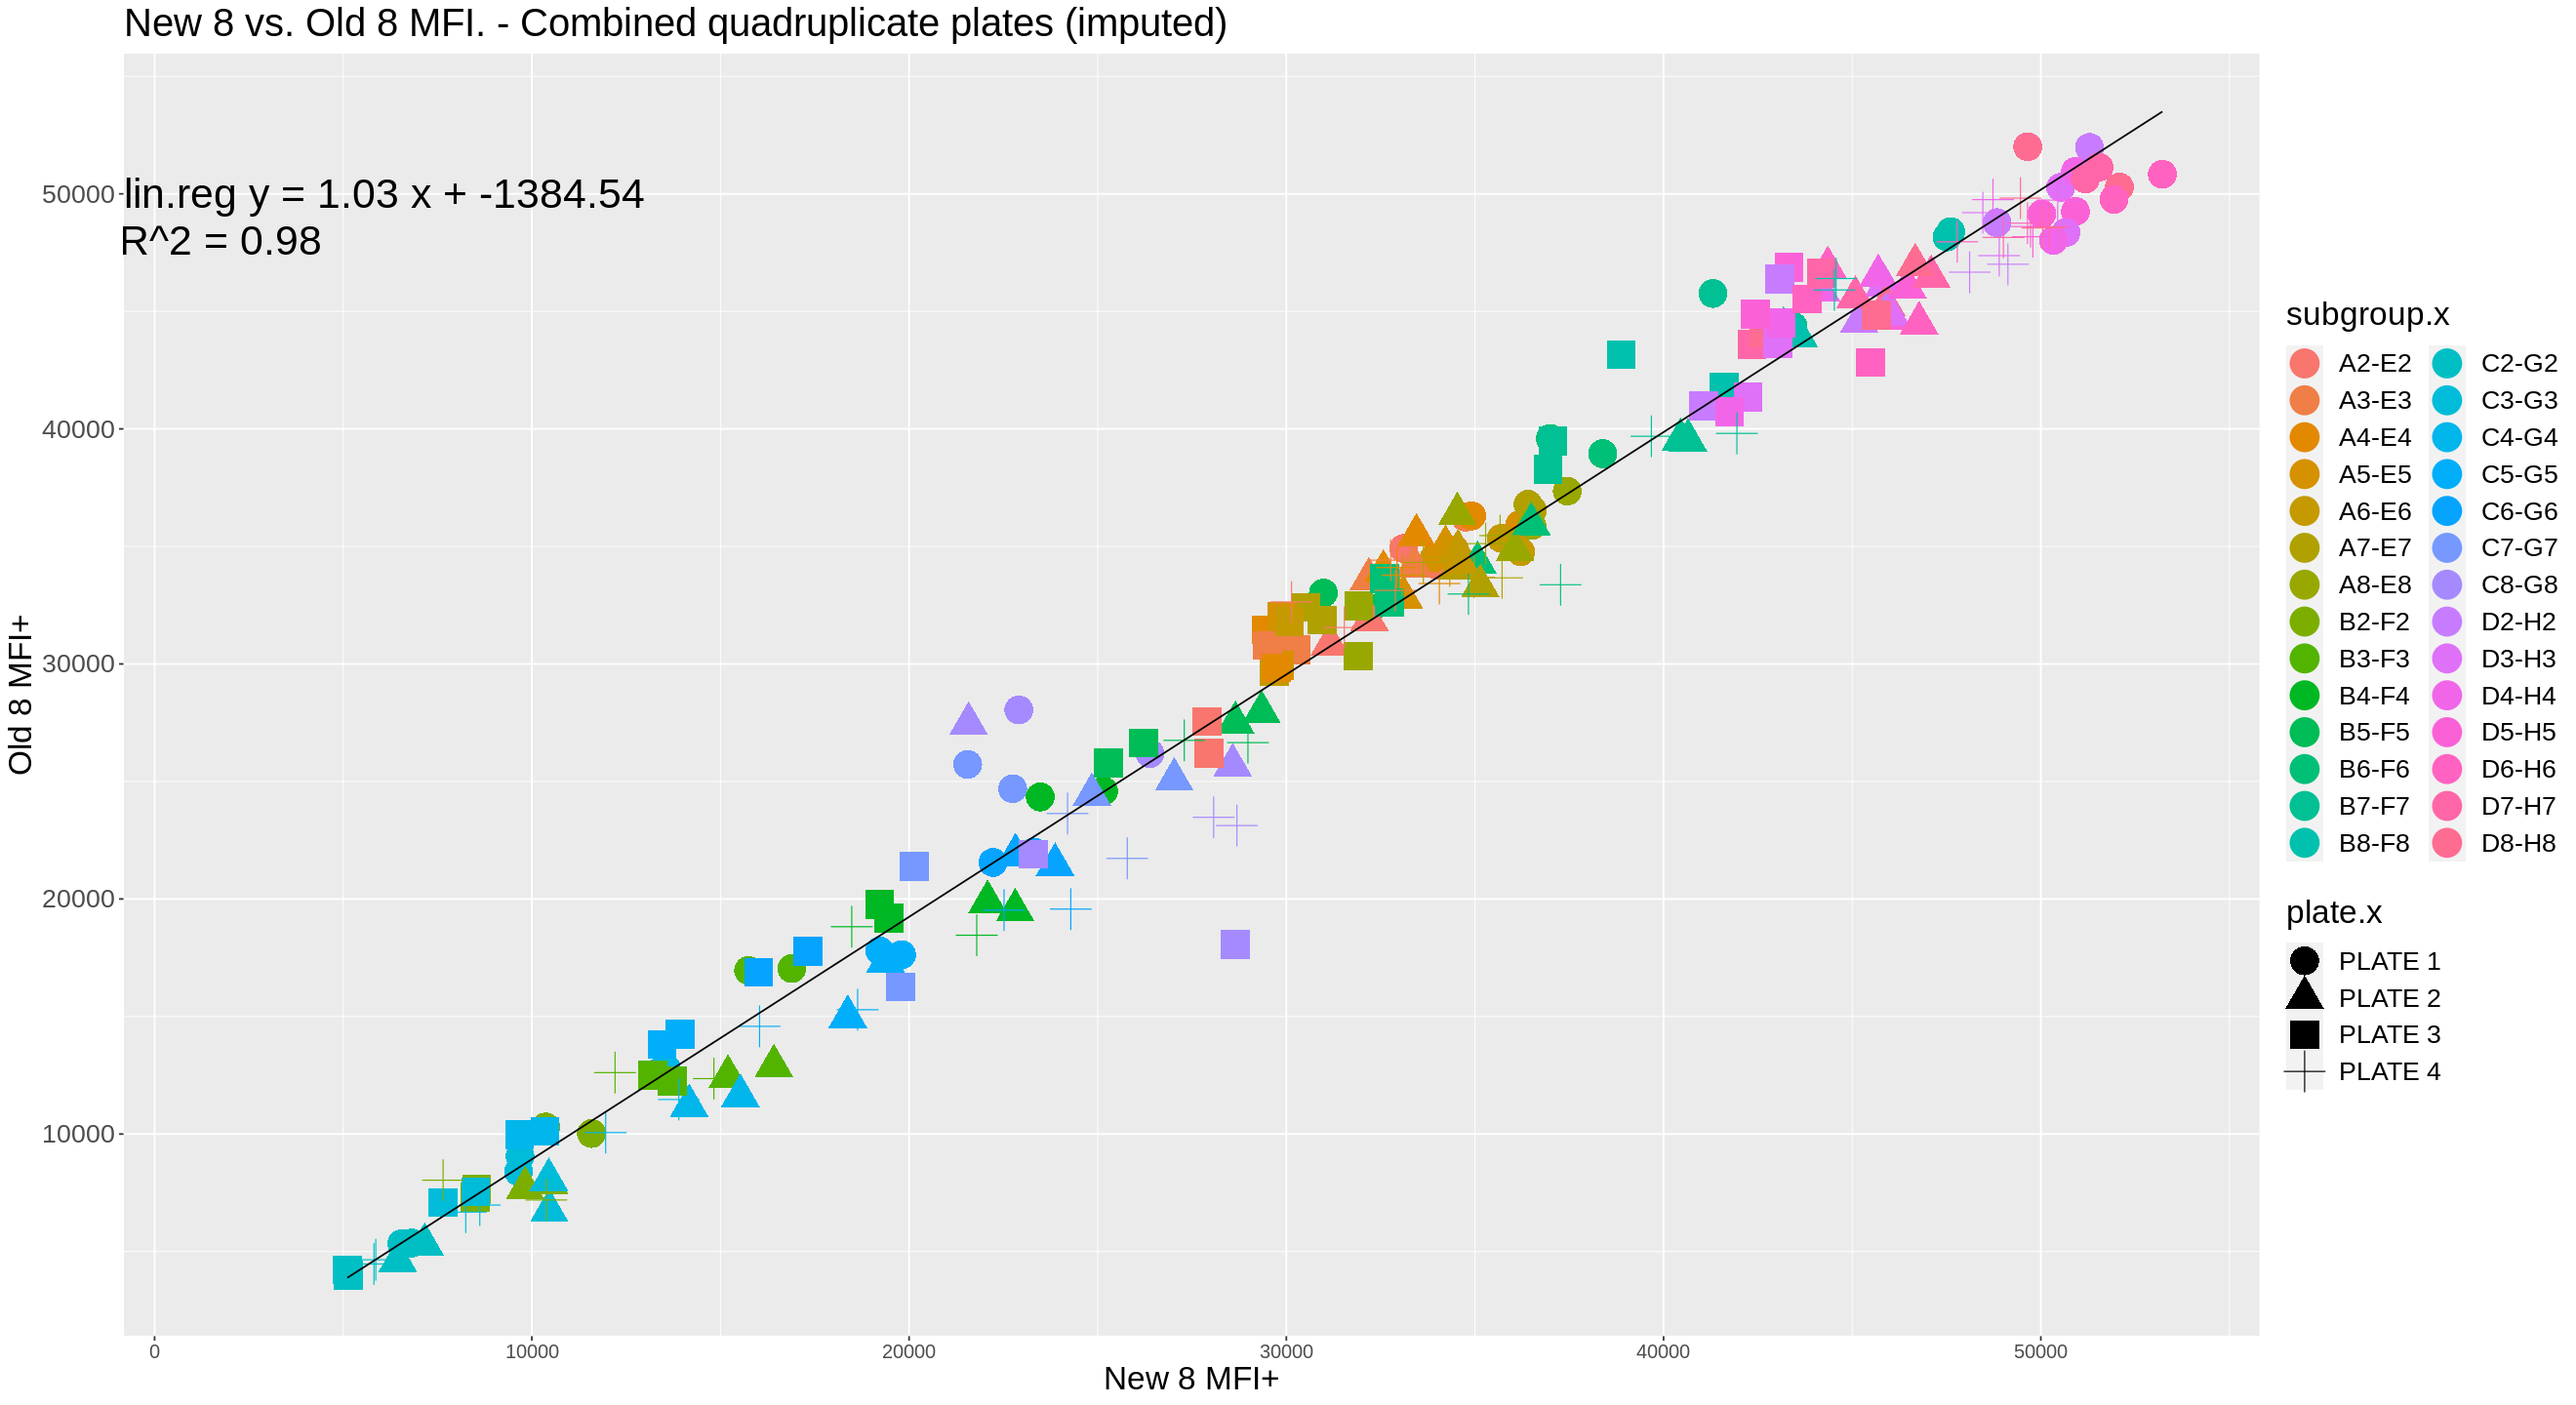

In [28]:
ggplot(dfm.t) + 
    geom_point(size = 8, aes(x = MFI..x, 
                   y = MFI..y, 
                   color=subgroup.x,
                   shape=plate.x)) + 
    geom_line(aes(x = MFI..x, 
                  y = regline)) + 
    #ggtitle("New 8 vs. Old 8 MFI. - Combined quadruplicate plates (all data)") + 
    ggtitle("New 8 vs. Old 8 MFI. - Combined quadruplicate plates (imputed)") + 
    xlab("New 8 MFI+") + 
    ylab("Old 8 MFI+") + 
    theme(text = element_text(size=20),
        axis.text.x = element_text(size = 12)) +
    annotate("text", 
             #x = 4900, 
             x = 6100, 
             y = 50000, 
             size = 9,
             label = paste("lin.reg y =", round(reg[[1]][2],2), "x +", 
                           round(reg[[1]][1],2))) + 
    annotate("text",
             x = 1750,
             y = 48000,
             size = 9,
             label = paste("R^2 =", round(summary(reg)$`r.squared`, 2)))


### XmR charts to show data series

In [51]:
# add the well id
dfm.t2 <- dfm %>% mutate(wellid = substr(SAMPLE_NAME, 14,15))

In [52]:
head(dfm.t2)

SAMPLE_NAME                 MFI.     MFI..1 SI       SN       group row
1 Specimen_001_A2_A02_003.fcs 33111.86  69.30 308.8967 477.8045 COL2  A-E
2 Specimen_001_A3_A03_004.fcs 34747.65  69.30 309.2416 501.4090 COL3  A-E
3 Specimen_001_A4_A04_005.fcs 34915.23  77.49 260.8396 450.5773 COL4  A-E
4 Specimen_001_A5_A05_006.fcs 36190.35  79.38 243.8216 455.9127 COL5  A-E
5 Specimen_001_A6_A06_007.fcs 36213.66  76.86 185.6048 471.1639 COL6  A-E
6 Specimen_001_A7_A07_008.fcs 36407.07 102.06 139.5327 356.7222 COL7  A-E
  subgroup method plate   anova           wellid
1 A2-E2    NEW    PLATE 1 A2-PLATE 1-COL2 A2    
2 A3-E3    NEW    PLATE 1 A3-PLATE 1-COL3 A3    
3 A4-E4    NEW    PLATE 1 A4-PLATE 1-COL4 A4    
4 A5-E5    NEW    PLATE 1 A5-PLATE 1-COL5 A5    
5 A6-E6    NEW    PLATE 1 A6-PLATE 1-COL6 A6    
6 A7-E7    NEW    PLATE 1 A7-PLATE 1-COL7 A7

In [53]:
options(repr.plot.width=25, repr.plot.height=15)

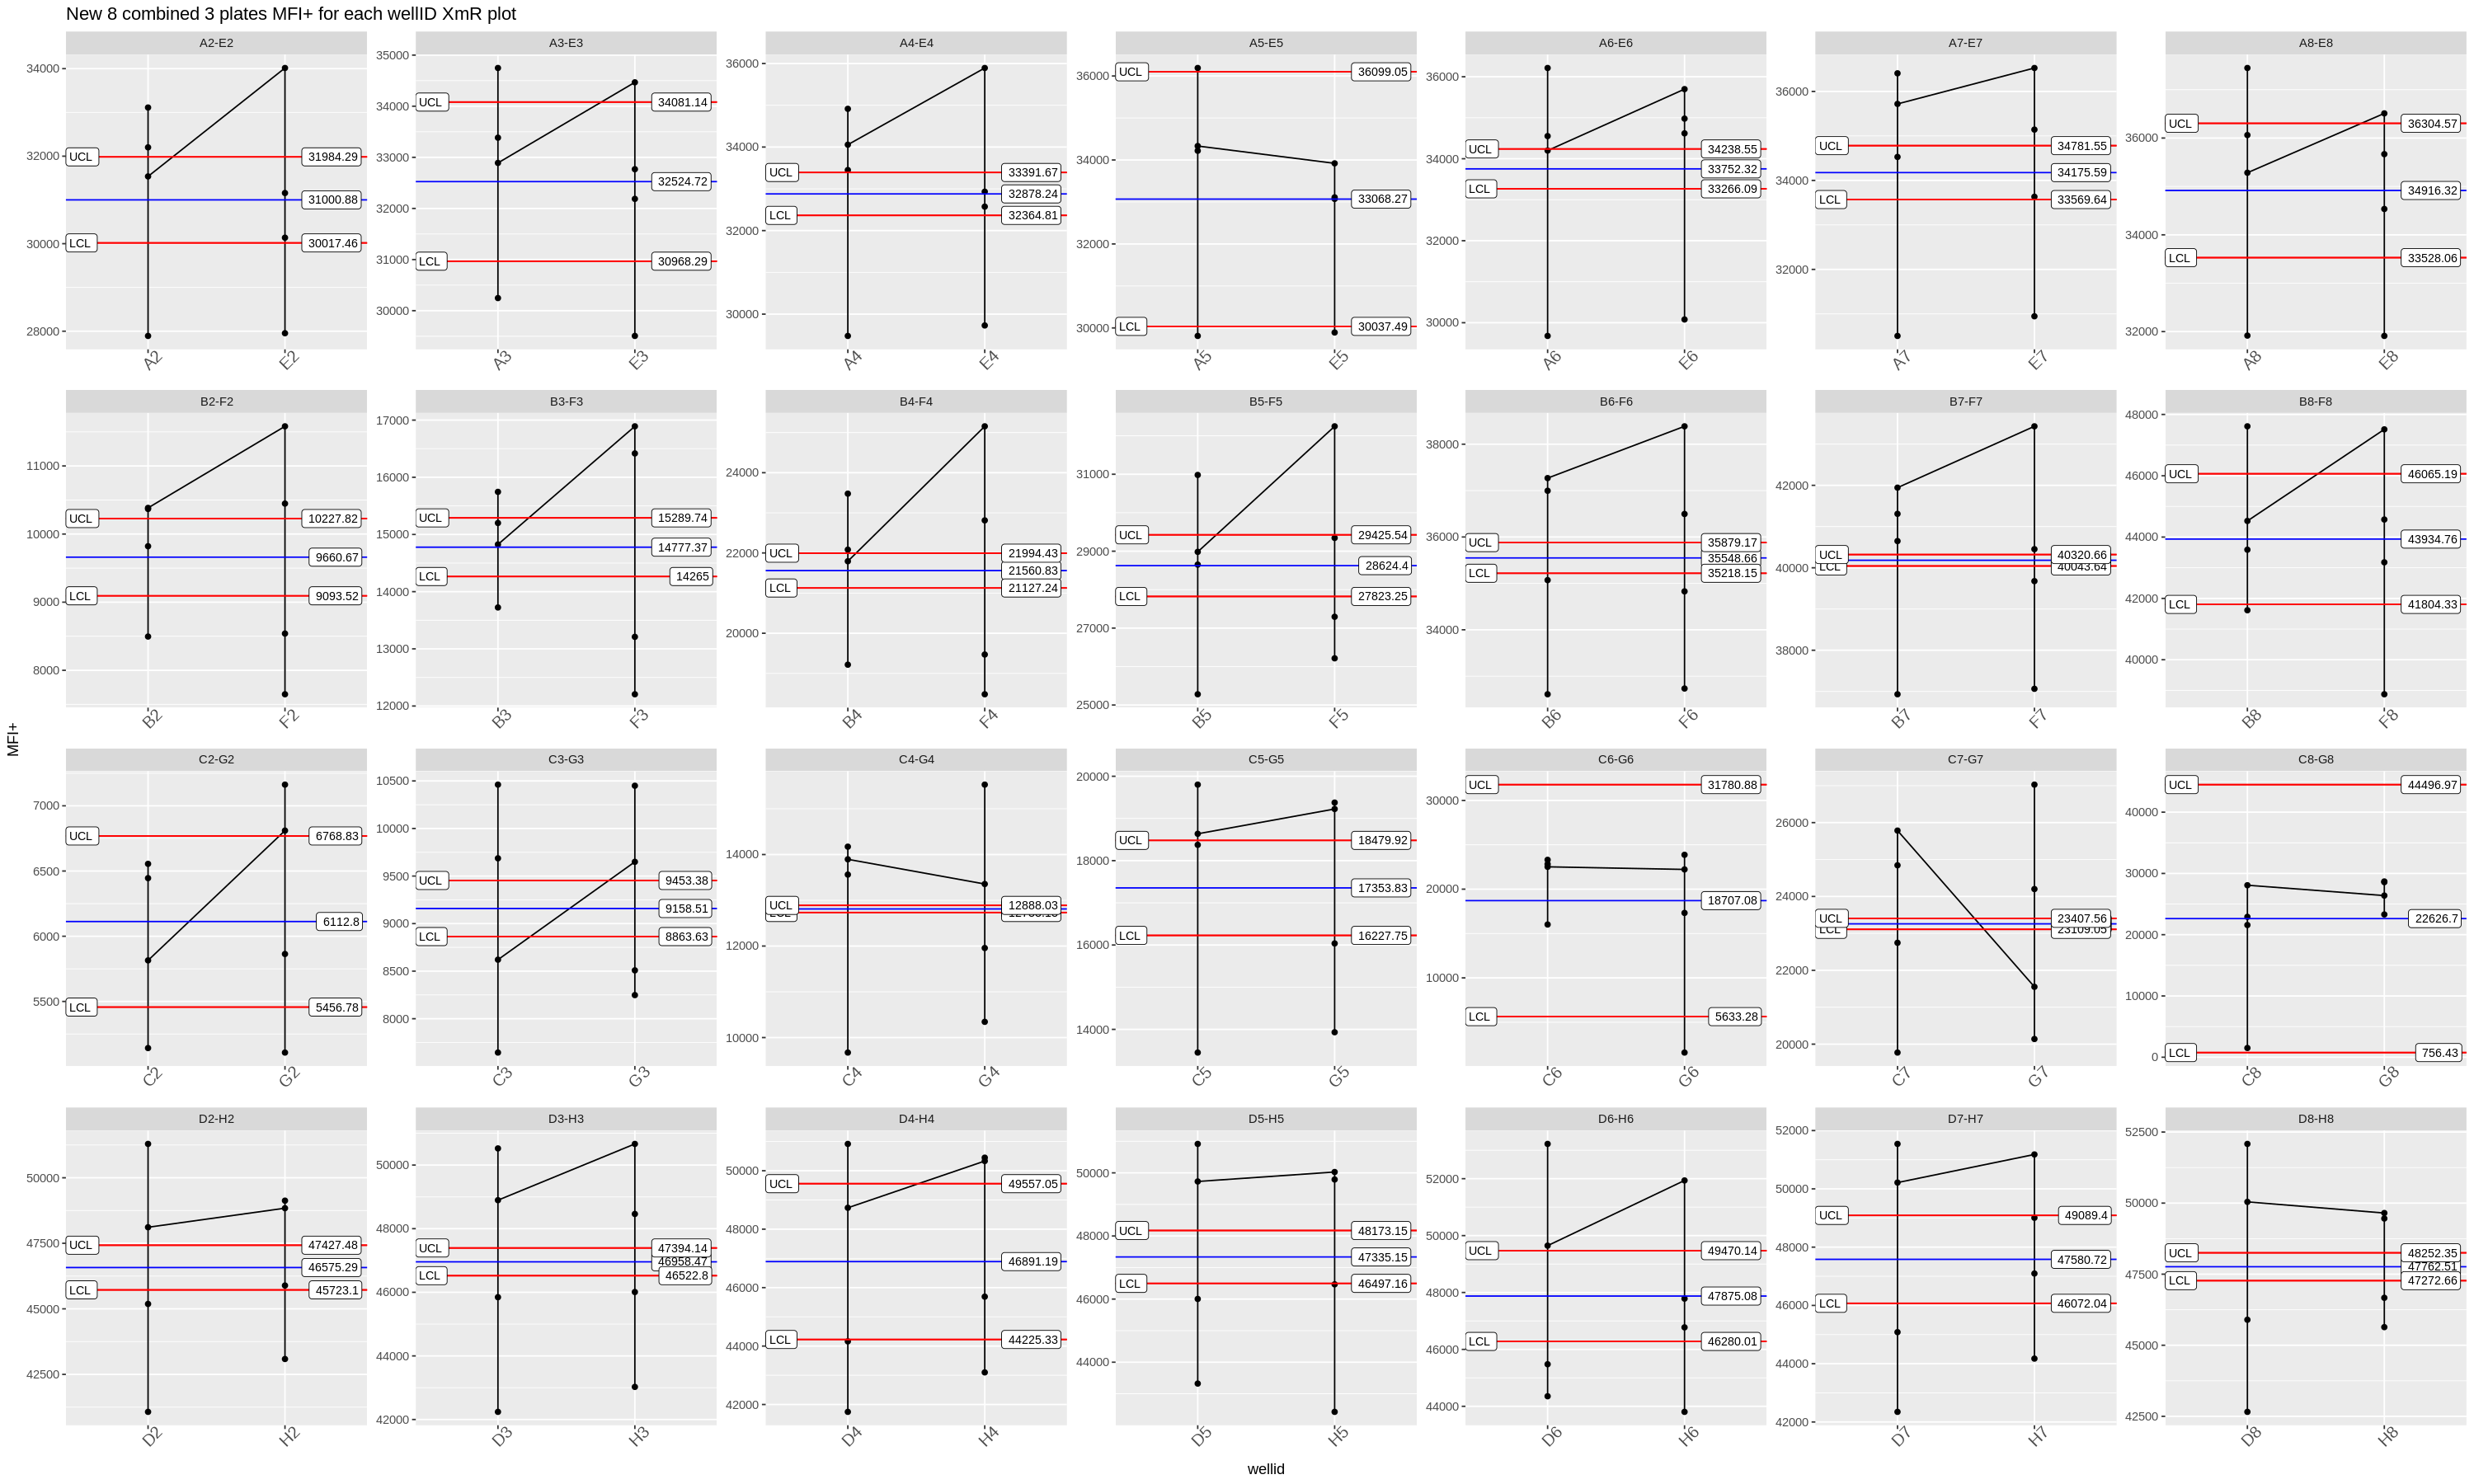

In [56]:
df.t2 <- dfm.t2 %>% filter(method == "NEW")
ggplot(df.t2, aes(x=wellid, y=MFI., group = group)) +
  geom_point() + geom_line() +
  stat_QC(method="XmR", auto.label = T, label.digits = 2) + 
  ylab("MFI+") +
  facet_wrap(~ subgroup, ncol = 7, scales = "free") + 
  ggtitle("New 8 combined 3 plates MFI+ for each wellID XmR plot") +
  theme(axis.text.x = element_text(size = 12, angle = 45))

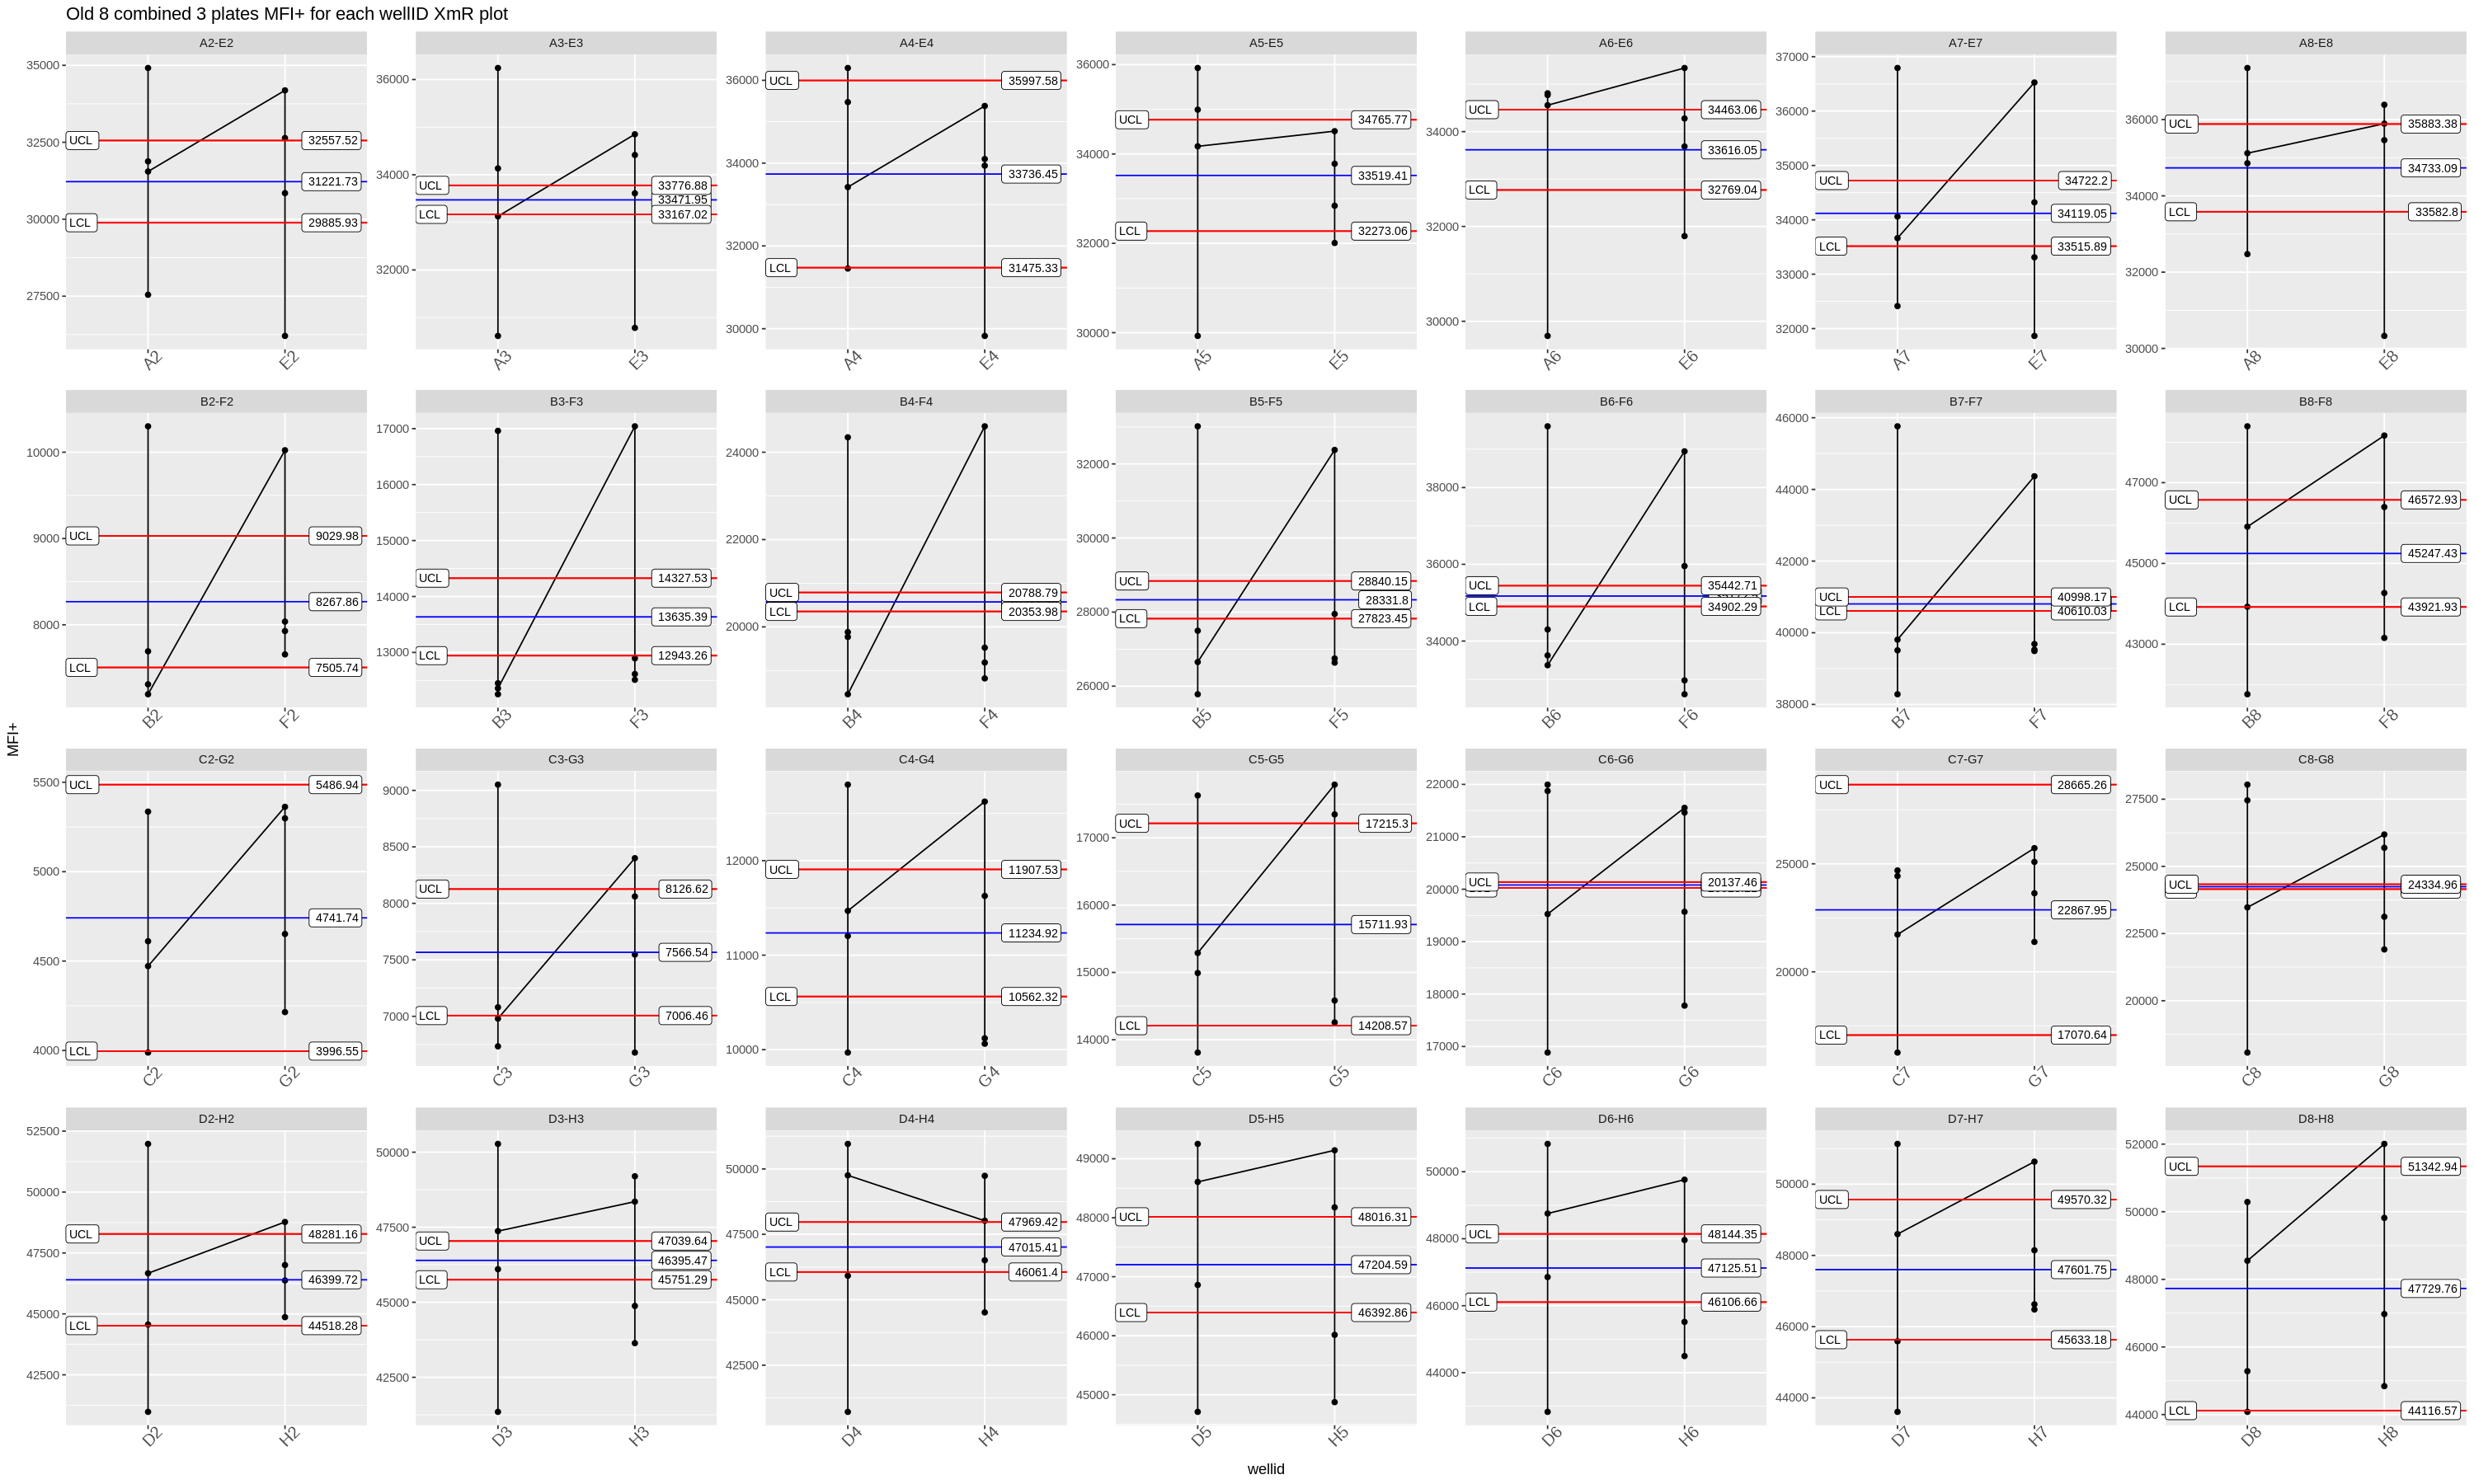

In [58]:
df.t2 <- dfm.t2 %>% filter(method == "OLD")
ggplot(df.t2, aes(x=wellid, y=MFI., group = group)) +
  geom_point() + geom_line() +
  stat_QC(method="XmR", auto.label = T, label.digits = 2) + 
  ylab("MFI+") +
  facet_wrap(~ subgroup, ncol = 7, scales = "free") + 
  ggtitle("Old 8 combined 3 plates MFI+ for each wellID XmR plot") +
  theme(axis.text.x = element_text(size = 12, angle = 45))

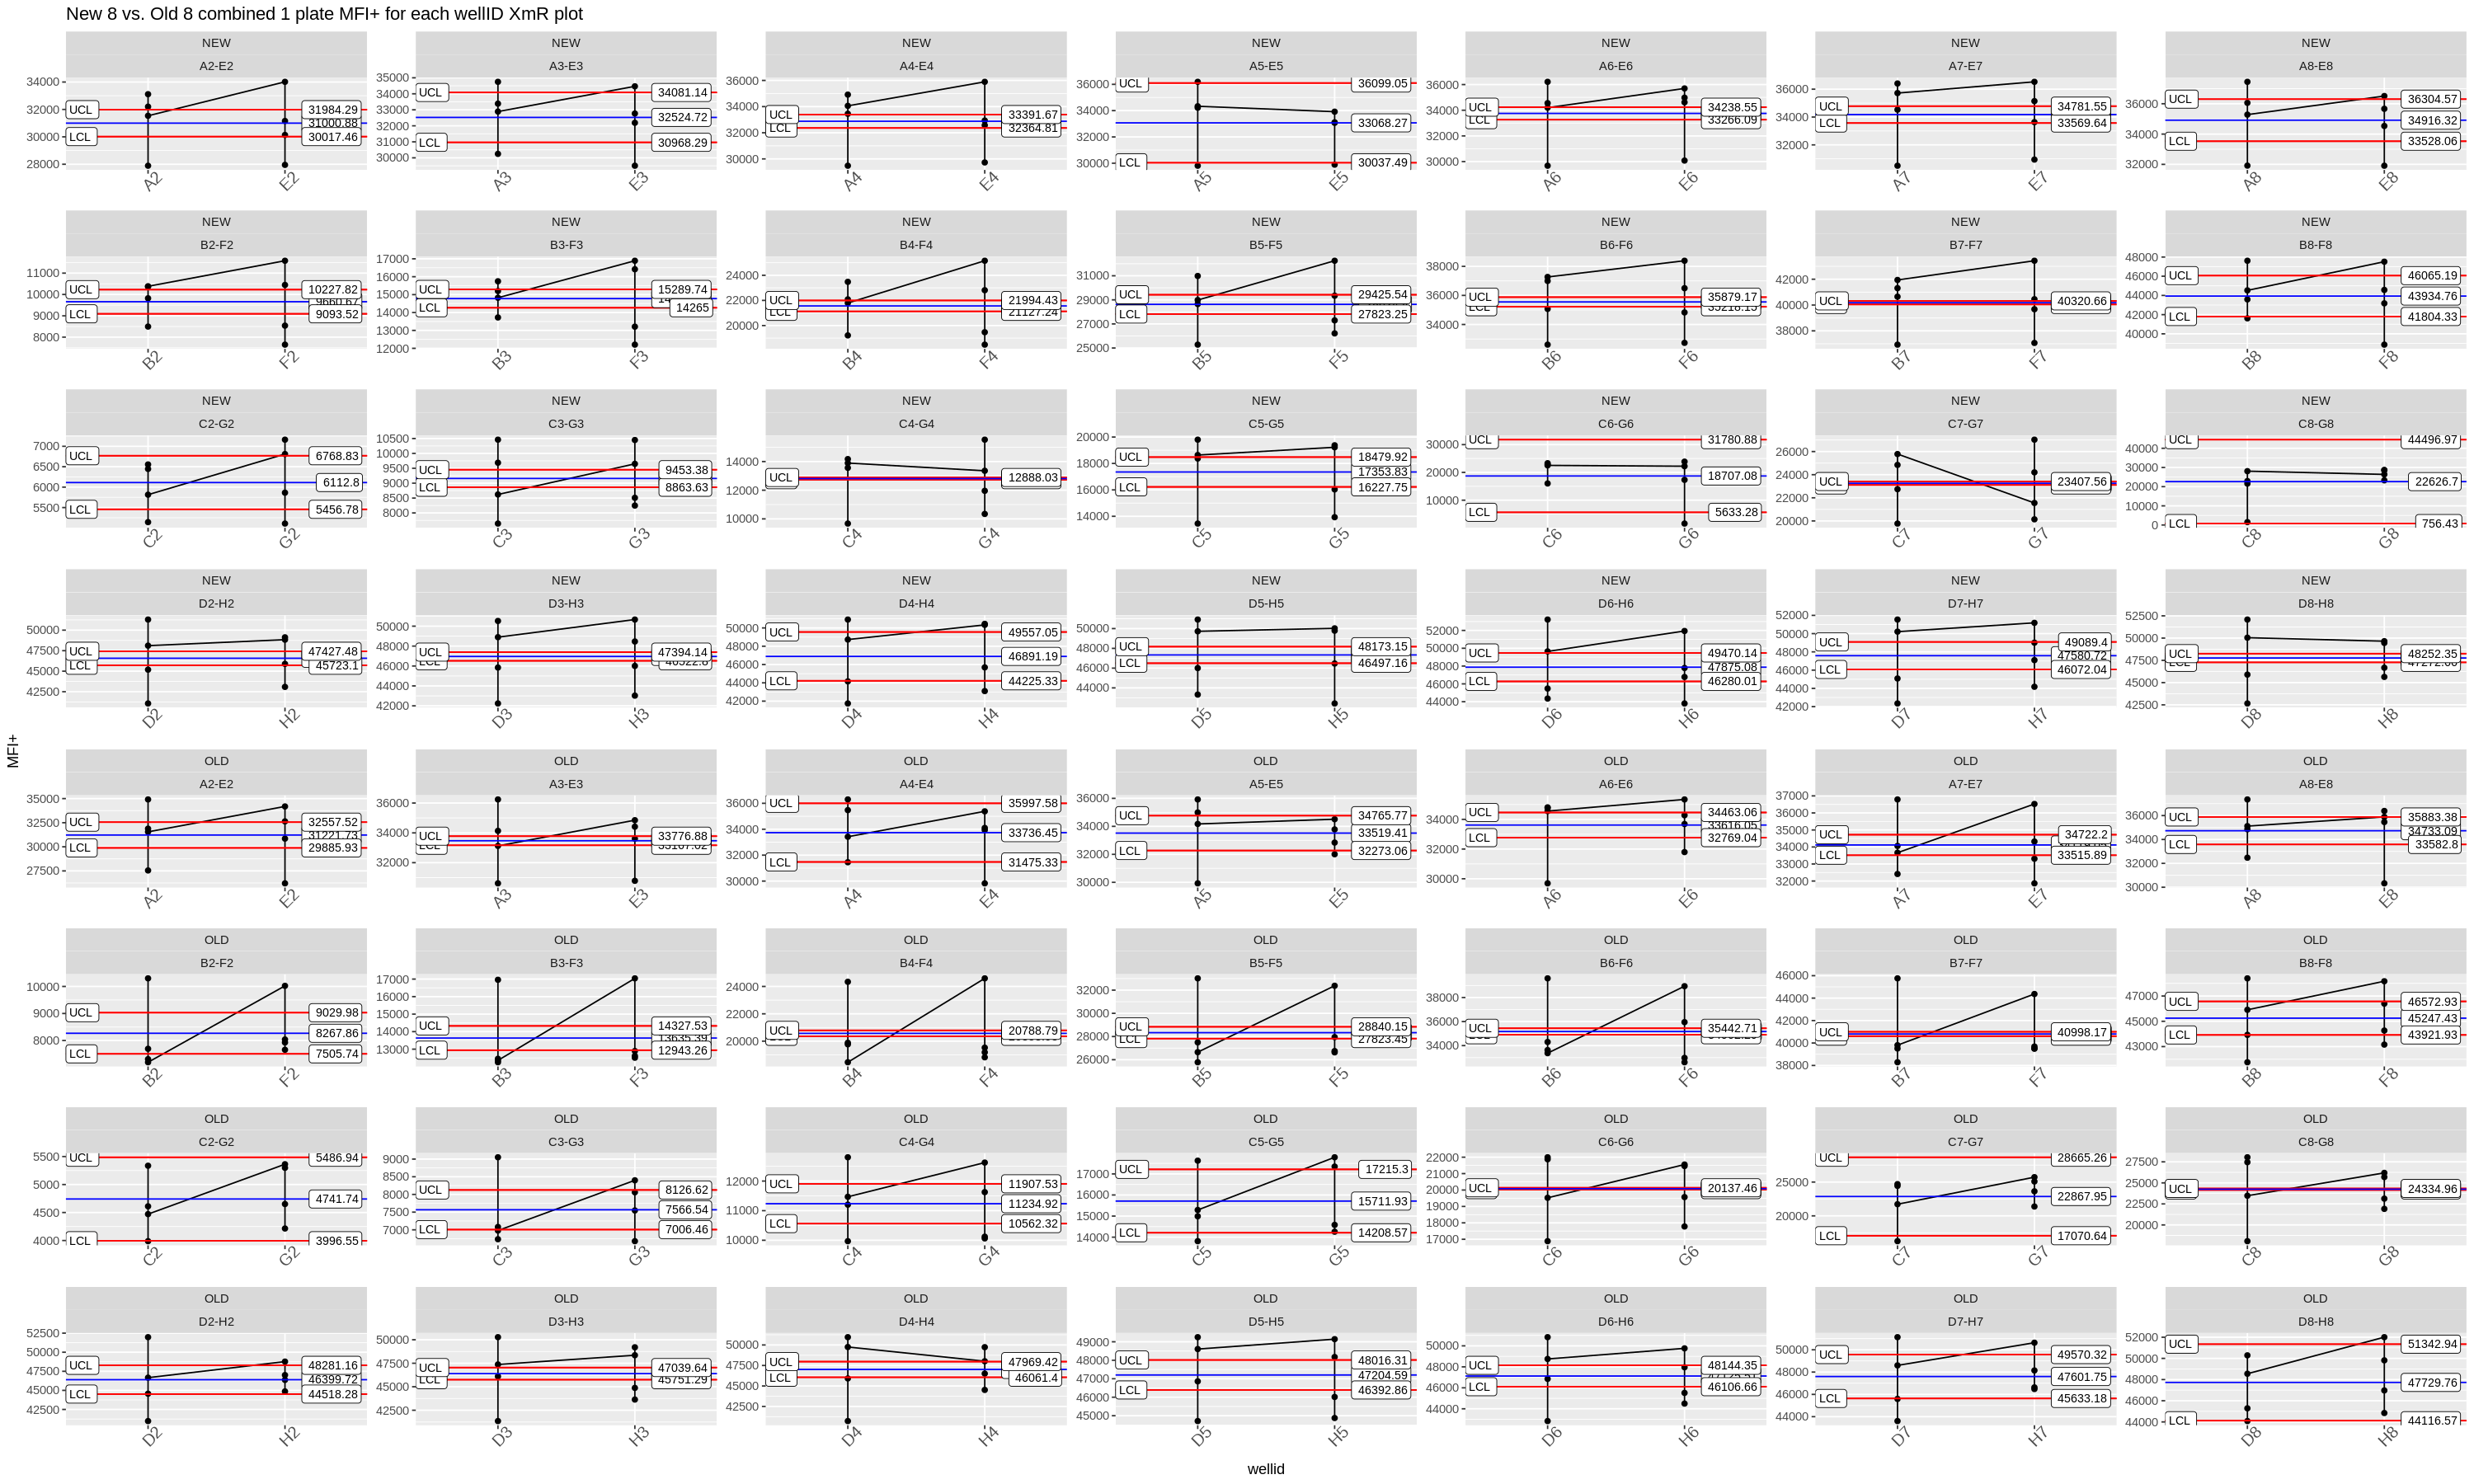

In [59]:
ggplot(dfm.t2, aes(x=wellid, y=MFI., group = subgroup)) +
  geom_point() + geom_line() +
  stat_QC(method="XmR", auto.label = T, label.digits = 2) + 
  ylab("MFI+") +
  facet_wrap(method~ subgroup, ncol = 7, scales = "free") + 
  ggtitle("New 8 vs. Old 8 combined 1 plate MFI+ for each wellID XmR plot") +
  theme(axis.text.x = element_text(size = 12, angle = 45))

# Conclusion

- Seems as though the experiment is statistically more convincing now that we use a raw metrric (MFI+) rather than a computed metric (SI) that inherently already has a calculation in it